In [1]:

%matplotlib inline
%load_ext autoreload

%autoreload 2
import os
import sys
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
from dnc.dnc import DNC
import dnc.utility as uf

# from feedforward_controller import FeedforwardController
from basic_recurrent_controller import BasicRecurrentController
from tqdm import tqdm
import time
import seaborn as sns
plt.rcParams['figure.figsize'] = (5, 10)

sess = None
# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets('/tmp/tensorflow/mnist/input_data', one_hot=True)

# TODO: For the DNC-controlled sliding window, just make the "sequence input" to the DNC be a sequence of images. Then
# make the first step of the controller to be to apply the index window on top of the image

In [ ]:
if not sess is None:
    sess.close()

bsize = 10
num_labels, make_ims = 4, uf.get_lrb_images
im_size = 8
im_splits = 2
sequence_length = im_splits**2
tf.reset_default_graph()
sess = tf.InteractiveSession(config=tf.ConfigProto(allow_soft_placement=True))

# with tf.device("/gpu:0"):
ncomputer = DNC(
    BasicRecurrentController,
    input_size=(im_size/(im_splits))**2,
    output_size=num_labels,
    max_sequence_length=sequence_length,
    memory_words_num=10,
    memory_word_size=10,
    memory_read_heads=1,
    batch_size=bsize
)
assert ncomputer.controller.has_recurrent_nn

raw_outputs, memory_views = ncomputer.get_outputs()
output = tf.argmax(raw_outputs[:, sequence_length - 1, :], 1)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(raw_outputs[:, sequence_length - 1, :], 
                                                              ncomputer.target_output_final))

start = time.time()
updt = uf.get_updt(loss)
print time.time() - start

init = tf.global_variables_initializer()
print "initializing..."
sess.run(init)
print "initialized!"


/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return umr_minimum(a, axis, None, out, keepdims)
100%|██████████| 4/4 [00:12<00:00,  3.07s/it]


computing gradients...


  0%|          | 0/17 [00:00<?, ?it/s]100%|██████████| 17/17 [00:00<00:00, 233.93it/s]


applying gradients...
39.7192158699
initializing...
initialized!


In [ ]:
losses = []
inputs = []
outputs = []
targets = []
views = []

for i in tqdm(range(1000000)):
    Input, _, Target_Output = make_ims(bsize, size=im_size, splits=im_splits)
#     if np.argmax(Target_Output) in [2, 3]:
    l, o, v, _ = sess.run([
        loss,
        output,
        memory_views, 
        updt
    ], feed_dict={
        ncomputer.input_data: Input,
        ncomputer.target_output_final: Target_Output,
        ncomputer.sequence_length: im_splits**2
    })
    losses.append(l)
    inputs.append(Input)
    outputs += list(o)
    views.append(v)
    targets += list(np.argmax(Target_Output, axis=-1))
    if len(targets) % 100 == 0 and len(targets) > 100:
        print "loss", np.mean(losses[-100:])
        print "matches", np.mean(np.array(targets[-100:]) == np.array(outputs[-100:]))


  0%|          | 21/1000000 [00:06<35:33:15,  7.81it/s]   | 1/1000000 [00:04<1170:54:31,  4.22s/it]

loss 1.38629
matches 0.31


  0%|          | 30/1000000 [00:07<38:55:59,  7.13it/s]  0%|          | 23/1000000 [00:06<33:39:23,  8.25it/s]

loss 1.38629
matches 0.27


  0%|          | 41/1000000 [00:09<41:42:11,  6.66it/s]  0%|          | 32/1000000 [00:08<56:20:22,  4.93it/s]

loss 1.38629
matches 0.31


  0%|          | 51/1000000 [00:11<34:40:29,  8.01it/s]  0%|          | 43/1000000 [00:10<43:54:58,  6.32it/s]

loss 1.38629
matches 0.29


  0%|          | 61/1000000 [00:12<34:35:25,  8.03it/s]  0%|          | 53/1000000 [00:11<33:58:16,  8.18it/s]

loss 1.38629
matches 0.29


  0%|          | 71/1000000 [00:13<39:43:53,  6.99it/s]  0%|          | 63/1000000 [00:12<34:42:36,  8.00it/s]

loss 1.38629
matches 0.27


  0%|          | 81/1000000 [00:15<43:16:38,  6.42it/s]  0%|          | 73/1000000 [00:14<57:26:09,  4.84it/s]

loss 1.38629
matches 0.26


  0%|          | 91/1000000 [00:16<35:19:59,  7.86it/s]  0%|          | 83/1000000 [00:15<44:16:39,  6.27it/s]

loss 1.38629
matches 0.3


  0%|          | 101/1000000 [00:18<34:11:13,  8.12it/s] 0%|          | 93/1000000 [00:17<35:42:50,  7.78it/s]

loss 1.38629
matches 0.25


  0%|          | 111/1000000 [00:19<33:24:11,  8.31it/s]  0%|          | 103/1000000 [00:18<33:53:40,  8.19it/s]

loss 1.38629
matches 0.19


  0%|          | 121/1000000 [00:20<45:58:10,  6.04it/s]  0%|          | 113/1000000 [00:19<33:43:19,  8.24it/s]

loss 1.38629
matches 0.17


  0%|          | 131/1000000 [00:22<43:26:21,  6.39it/s]  0%|          | 123/1000000 [00:21<47:31:52,  5.84it/s]

loss 1.38629
matches 0.47


  0%|          | 141/1000000 [00:23<34:27:22,  8.06it/s]  0%|          | 133/1000000 [00:22<38:26:15,  7.23it/s]

loss 1.38629
matches 0.49


  0%|          | 151/1000000 [00:25<34:18:22,  8.10it/s]  0%|          | 143/1000000 [00:24<34:15:22,  8.11it/s]

loss 1.38629
matches 0.47


  0%|          | 160/1000000 [00:26<50:22:06,  5.51it/s]  0%|          | 153/1000000 [00:25<36:18:21,  7.65it/s]

loss 1.38629
matches 0.49


  0%|          | 171/1000000 [00:28<42:14:55,  6.57it/s]  0%|          | 162/1000000 [00:27<49:03:23,  5.66it/s]

loss 1.38629
matches 0.44


  0%|          | 181/1000000 [00:29<34:40:38,  8.01it/s]  0%|          | 173/1000000 [00:28<37:46:03,  7.35it/s]

loss 1.38629
matches 0.49


  0%|          | 191/1000000 [00:30<33:54:16,  8.19it/s]  0%|          | 183/1000000 [00:29<33:38:27,  8.26it/s]

loss 1.38629
matches 0.54


  0%|          | 200/1000000 [00:32<39:13:40,  7.08it/s]  0%|          | 193/1000000 [00:31<32:26:14,  8.56it/s]

loss 1.38629
matches 0.45


  0%|          | 211/1000000 [00:34<45:50:22,  6.06it/s]  0%|          | 202/1000000 [00:32<60:07:34,  4.62it/s]

loss 1.38628
matches 0.46


  0%|          | 221/1000000 [00:35<34:31:48,  8.04it/s]  0%|          | 213/1000000 [00:34<43:00:30,  6.46it/s]

loss 1.38628
matches 0.4


  0%|          | 231/1000000 [00:36<33:55:55,  8.18it/s]  0%|          | 223/1000000 [00:35<36:12:44,  7.67it/s]

loss 1.38628
matches 0.53


  0%|          | 240/1000000 [00:37<40:53:32,  6.79it/s]  0%|          | 233/1000000 [00:36<36:27:28,  7.62it/s]

loss 1.38628
matches 0.57


  0%|          | 251/1000000 [00:39<44:38:03,  6.22it/s]  0%|          | 242/1000000 [00:38<58:43:56,  4.73it/s]

loss 1.38628
matches 0.43


  0%|          | 261/1000000 [00:41<34:43:43,  8.00it/s]  0%|          | 253/1000000 [00:40<46:01:09,  6.03it/s]

loss 1.38628
matches 0.26


  0%|          | 271/1000000 [00:42<33:33:15,  8.28it/s]  0%|          | 263/1000000 [00:41<33:12:55,  8.36it/s]

loss 1.38628
matches 0.23


  0%|          | 281/1000000 [00:43<36:01:52,  7.71it/s]  0%|          | 273/1000000 [00:42<34:32:10,  8.04it/s]

loss 1.38628
matches 0.17


  0%|          | 291/1000000 [00:45<45:41:21,  6.08it/s]  0%|          | 283/1000000 [00:44<40:24:28,  6.87it/s]

loss 1.38628
matches 0.38


  0%|          | 301/1000000 [00:47<38:55:23,  7.13it/s]  0%|          | 293/1000000 [00:45<42:42:01,  6.50it/s]

loss 1.38628
matches 0.48


  0%|          | 311/1000000 [00:48<33:53:38,  8.19it/s]  0%|          | 303/1000000 [00:47<35:56:49,  7.73it/s]

loss 1.38628
matches 0.53


  0%|          | 321/1000000 [00:49<32:15:40,  8.61it/s]  0%|          | 313/1000000 [00:48<33:14:00,  8.36it/s]

loss 1.38628
matches 0.66


  0%|          | 330/1000000 [00:50<38:46:44,  7.16it/s]  0%|          | 323/1000000 [00:49<32:41:50,  8.49it/s]

loss 1.38628
matches 0.65


  0%|          | 341/1000000 [00:52<45:26:55,  6.11it/s]  0%|          | 332/1000000 [00:51<54:45:35,  5.07it/s]

loss 1.38628
matches 0.52


  0%|          | 351/1000000 [00:53<35:35:43,  7.80it/s]  0%|          | 343/1000000 [00:52<44:29:01,  6.24it/s]

loss 1.38628
matches 0.56


  0%|          | 361/1000000 [00:55<34:53:32,  7.96it/s]  0%|          | 353/1000000 [00:54<34:41:16,  8.01it/s]

loss 1.38628
matches 0.47


  0%|          | 371/1000000 [00:56<34:50:10,  7.97it/s]  0%|          | 363/1000000 [00:55<35:11:07,  7.89it/s]

loss 1.38627
matches 0.53


  0%|          | 381/1000000 [00:58<47:04:36,  5.90it/s]  0%|          | 373/1000000 [00:56<33:49:23,  8.21it/s]

loss 1.38627
matches 0.57


  0%|          | 391/1000000 [00:59<43:30:42,  6.38it/s]  0%|          | 383/1000000 [00:58<46:41:38,  5.95it/s]

loss 1.38627
matches 0.52


  0%|          | 401/1000000 [01:01<33:52:45,  8.20it/s]  0%|          | 393/1000000 [01:00<38:43:06,  7.17it/s]

loss 1.38627
matches 0.43


  0%|          | 411/1000000 [01:02<34:50:34,  7.97it/s]  0%|          | 403/1000000 [01:01<35:24:17,  7.84it/s]

loss 1.38627
matches 0.5


  0%|          | 421/1000000 [01:04<54:27:59,  5.10it/s]  0%|          | 413/1000000 [01:02<34:14:10,  8.11it/s]

loss 1.38627
matches 0.58


  0%|          | 431/1000000 [01:05<45:39:19,  6.08it/s]  0%|          | 423/1000000 [01:04<54:22:09,  5.11it/s]

loss 1.38627
matches 0.48


  0%|          | 441/1000000 [01:07<37:42:30,  7.36it/s]  0%|          | 433/1000000 [01:05<42:51:47,  6.48it/s]

loss 1.38627
matches 0.56


  0%|          | 451/1000000 [01:08<36:52:22,  7.53it/s]  0%|          | 443/1000000 [01:07<36:32:13,  7.60it/s]

loss 1.38627
matches 0.48


  0%|          | 460/1000000 [01:09<60:43:13,  4.57it/s]  0%|          | 453/1000000 [01:08<36:10:03,  7.68it/s]

loss 1.38627
matches 0.49


  0%|          | 471/1000000 [01:11<44:17:55,  6.27it/s]  0%|          | 462/1000000 [01:10<53:24:49,  5.20it/s]

loss 1.38627
matches 0.5


  0%|          | 481/1000000 [01:12<34:55:04,  7.95it/s]  0%|          | 473/1000000 [01:11<43:18:19,  6.41it/s]

loss 1.38627
matches 0.44


  0%|          | 491/1000000 [01:14<33:12:01,  8.36it/s]  0%|          | 483/1000000 [01:13<32:52:20,  8.45it/s]

loss 1.38627
matches 0.45


  0%|          | 501/1000000 [01:15<36:32:44,  7.60it/s]  0%|          | 493/1000000 [01:14<33:19:02,  8.33it/s]

loss 1.38627
matches 0.5


  0%|          | 511/1000000 [01:17<45:27:58,  6.11it/s]  0%|          | 503/1000000 [01:15<40:38:20,  6.83it/s]

loss 1.38626
matches 0.48


  0%|          | 521/1000000 [01:18<38:41:46,  7.17it/s]  0%|          | 513/1000000 [01:17<41:45:33,  6.65it/s]

loss 1.38626
matches 0.61


  0%|          | 531/1000000 [01:19<32:39:09,  8.50it/s]  0%|          | 523/1000000 [01:18<36:03:47,  7.70it/s]

loss 1.38626
matches 0.55


  0%|          | 541/1000000 [01:20<33:28:45,  8.29it/s]  0%|          | 533/1000000 [01:20<33:16:44,  8.34it/s]

loss 1.38626
matches 0.52


  0%|          | 550/1000000 [01:22<53:25:57,  5.20it/s]  0%|          | 543/1000000 [01:21<33:01:01,  8.41it/s]

loss 1.38626
matches 0.41


  0%|          | 561/1000000 [01:24<42:53:07,  6.47it/s]  0%|          | 552/1000000 [01:22<51:02:25,  5.44it/s]

loss 1.38626
matches 0.47


  0%|          | 571/1000000 [01:25<33:53:13,  8.19it/s]  0%|          | 563/1000000 [01:24<41:54:05,  6.63it/s]

loss 1.38626
matches 0.5


  0%|          | 581/1000000 [01:26<33:08:28,  8.38it/s]  0%|          | 573/1000000 [01:25<33:26:02,  8.30it/s]

loss 1.38626
matches 0.49


  0%|          | 591/1000000 [01:27<33:39:57,  8.25it/s]  0%|          | 583/1000000 [01:26<33:32:09,  8.28it/s]

loss 1.38626
matches 0.46


  0%|          | 601/1000000 [01:29<47:24:09,  5.86it/s]  0%|          | 593/1000000 [01:28<41:18:06,  6.72it/s]

loss 1.38626
matches 0.58


  0%|          | 611/1000000 [01:31<38:21:04,  7.24it/s]  0%|          | 603/1000000 [01:30<43:09:53,  6.43it/s]

loss 1.38626
matches 0.51


  0%|          | 621/1000000 [01:32<34:02:22,  8.16it/s]  0%|          | 613/1000000 [01:31<36:23:59,  7.63it/s]

loss 1.38625
matches 0.5


  0%|          | 631/1000000 [01:33<33:17:20,  8.34it/s]  0%|          | 623/1000000 [01:32<33:59:21,  8.17it/s]

loss 1.38625
matches 0.51


  0%|          | 640/1000000 [01:34<55:24:08,  5.01it/s]  0%|          | 633/1000000 [01:33<32:42:57,  8.49it/s]

loss 1.38625
matches 0.5


  0%|          | 651/1000000 [01:36<43:59:47,  6.31it/s]  0%|          | 642/1000000 [01:35<53:56:10,  5.15it/s]

loss 1.38625
matches 0.47


  0%|          | 661/1000000 [01:38<37:28:39,  7.41it/s]  0%|          | 653/1000000 [01:37<44:36:10,  6.22it/s]

loss 1.38625
matches 0.39


  0%|          | 671/1000000 [01:39<34:13:10,  8.11it/s]  0%|          | 663/1000000 [01:38<37:53:52,  7.32it/s]

loss 1.38625
matches 0.55


  0%|          | 681/1000000 [01:41<51:39:54,  5.37it/s]  0%|          | 673/1000000 [01:39<34:03:26,  8.15it/s]

loss 1.38625
matches 0.55


  0%|          | 691/1000000 [01:42<44:53:11,  6.18it/s]  0%|          | 683/1000000 [01:41<55:07:31,  5.04it/s]

loss 1.38625
matches 0.56


  0%|          | 701/1000000 [01:44<36:18:31,  7.65it/s]  0%|          | 693/1000000 [01:43<43:43:30,  6.35it/s]

loss 1.38624
matches 0.5


  0%|          | 711/1000000 [01:45<34:59:36,  7.93it/s]  0%|          | 703/1000000 [01:44<35:24:48,  7.84it/s]

loss 1.38624
matches 0.47


  0%|          | 721/1000000 [01:46<40:12:36,  6.90it/s]  0%|          | 713/1000000 [01:45<36:05:05,  7.69it/s]

loss 1.38624
matches 0.53


  0%|          | 731/1000000 [01:48<45:07:17,  6.15it/s]  0%|          | 723/1000000 [01:47<57:38:18,  4.82it/s]

loss 1.38624
matches 0.55


  0%|          | 741/1000000 [01:49<35:38:58,  7.79it/s]  0%|          | 733/1000000 [01:48<44:21:18,  6.26it/s]

loss 1.38624
matches 0.48


  0%|          | 751/1000000 [01:51<33:53:19,  8.19it/s]  0%|          | 743/1000000 [01:50<34:57:25,  7.94it/s]

loss 1.38624
matches 0.58


  0%|          | 761/1000000 [01:52<38:58:59,  7.12it/s]  0%|          | 753/1000000 [01:51<34:31:16,  8.04it/s]

loss 1.38623
matches 0.56


  0%|          | 771/1000000 [01:54<42:37:51,  6.51it/s]  0%|          | 763/1000000 [01:53<54:17:50,  5.11it/s]

loss 1.38623
matches 0.55


  0%|          | 781/1000000 [01:55<36:03:35,  7.70it/s]  0%|          | 773/1000000 [01:54<41:37:21,  6.67it/s]

loss 1.38623
matches 0.5


  0%|          | 791/1000000 [01:56<33:29:08,  8.29it/s]  0%|          | 783/1000000 [01:55<35:00:14,  7.93it/s]

loss 1.38623
matches 0.39


  0%|          | 801/1000000 [01:58<34:26:38,  8.06it/s]  0%|          | 793/1000000 [01:57<34:29:11,  8.05it/s]

loss 1.38623
matches 0.46


  0%|          | 811/1000000 [02:00<48:27:51,  5.73it/s]  0%|          | 803/1000000 [01:58<39:49:04,  6.97it/s]

loss 1.38623
matches 0.56


  0%|          | 821/1000000 [02:01<41:42:55,  6.65it/s]  0%|          | 813/1000000 [02:00<44:43:10,  6.21it/s]

loss 1.38623
matches 0.44


  0%|          | 831/1000000 [02:02<34:45:39,  7.98it/s]  0%|          | 823/1000000 [02:01<37:39:47,  7.37it/s]

loss 1.38623
matches 0.42


  0%|          | 841/1000000 [02:03<34:26:22,  8.06it/s]  0%|          | 833/1000000 [02:02<33:51:38,  8.20it/s]

loss 1.38622
matches 0.6


  0%|          | 851/1000000 [02:05<47:36:52,  5.83it/s]  0%|          | 843/1000000 [02:04<34:19:14,  8.09it/s]

loss 1.38622
matches 0.5


  0%|          | 861/1000000 [02:07<42:01:07,  6.61it/s]  0%|          | 853/1000000 [02:06<47:05:19,  5.89it/s]

loss 1.38622
matches 0.52


  0%|          | 871/1000000 [02:08<34:09:07,  8.13it/s]  0%|          | 863/1000000 [02:07<39:47:46,  6.97it/s]

loss 1.38622
matches 0.45


  0%|          | 881/1000000 [02:09<34:55:39,  7.95it/s]  0%|          | 873/1000000 [02:08<34:31:09,  8.04it/s]

loss 1.38622
matches 0.41


  0%|          | 891/1000000 [02:11<39:22:52,  7.05it/s]  0%|          | 883/1000000 [02:09<34:56:45,  7.94it/s]

loss 1.38622
matches 0.4


  0%|          | 901/1000000 [02:12<45:27:33,  6.10it/s]  0%|          | 893/1000000 [02:11<56:47:45,  4.89it/s]

loss 1.38622
matches 0.49


  0%|          | 911/1000000 [02:14<36:13:15,  7.66it/s]  0%|          | 903/1000000 [02:13<43:23:11,  6.40it/s]

loss 1.38621
matches 0.47


  0%|          | 921/1000000 [02:15<33:41:24,  8.24it/s]  0%|          | 913/1000000 [02:14<35:08:11,  7.90it/s]

loss 1.38621
matches 0.5


  0%|          | 931/1000000 [02:16<41:15:14,  6.73it/s]  0%|          | 923/1000000 [02:15<32:51:01,  8.45it/s]

loss 1.38621
matches 0.42


  0%|          | 941/1000000 [02:18<44:33:54,  6.23it/s]  0%|          | 933/1000000 [02:17<57:50:08,  4.80it/s]

loss 1.38621
matches 0.49


  0%|          | 951/1000000 [02:20<35:10:31,  7.89it/s]  0%|          | 943/1000000 [02:19<42:47:16,  6.49it/s]

loss 1.38621
matches 0.53


  0%|          | 961/1000000 [02:21<35:02:54,  7.92it/s]  0%|          | 953/1000000 [02:20<35:23:02,  7.84it/s]

loss 1.3862
matches 0.56


  0%|          | 971/1000000 [02:22<34:16:10,  8.10it/s]  0%|          | 963/1000000 [02:21<34:45:39,  7.98it/s]

loss 1.3862
matches 0.58


  0%|          | 980/1000000 [02:24<48:44:23,  5.69it/s]  0%|          | 973/1000000 [02:22<37:33:16,  7.39it/s]

loss 1.3862
matches 0.53


  0%|          | 991/1000000 [02:25<42:22:03,  6.55it/s]  0%|          | 982/1000000 [02:24<47:26:19,  5.85it/s]

loss 1.3862
matches 0.43


  0%|          | 1001/1000000 [02:27<34:33:56,  8.03it/s] 0%|          | 993/1000000 [02:26<40:13:48,  6.90it/s]

loss 1.38619
matches 0.51


  0%|          | 1011/1000000 [02:28<33:45:44,  8.22it/s]  0%|          | 1003/1000000 [02:27<34:01:02,  8.16it/s]

loss 1.38619
matches 0.46


  0%|          | 1020/1000000 [02:29<38:33:10,  7.20it/s]  0%|          | 1013/1000000 [02:28<34:02:16,  8.15it/s]

loss 1.38619
matches 0.51


  0%|          | 1031/1000000 [02:31<41:42:17,  6.65it/s]  0%|          | 1022/1000000 [02:30<58:44:53,  4.72it/s]

loss 1.38618
matches 0.52


  0%|          | 1041/1000000 [02:33<34:53:35,  7.95it/s]  0%|          | 1033/1000000 [02:31<45:49:19,  6.06it/s]

loss 1.38618
matches 0.45


  0%|          | 1051/1000000 [02:34<33:27:00,  8.30it/s]  0%|          | 1043/1000000 [02:33<34:45:00,  7.99it/s]

loss 1.38618
matches 0.44


  0%|          | 1061/1000000 [02:35<39:06:56,  7.09it/s]  0%|          | 1053/1000000 [02:34<33:04:35,  8.39it/s]

loss 1.38618
matches 0.48


  0%|          | 1071/1000000 [02:37<43:33:18,  6.37it/s]  0%|          | 1063/1000000 [02:35<55:30:24,  5.00it/s]

loss 1.38617
matches 0.48


  0%|          | 1081/1000000 [02:38<36:19:07,  7.64it/s]  0%|          | 1073/1000000 [02:37<43:29:24,  6.38it/s]

loss 1.38617
matches 0.54


  0%|          | 1091/1000000 [02:39<34:38:49,  8.01it/s]  0%|          | 1083/1000000 [02:38<33:47:19,  8.21it/s]

loss 1.38617
matches 0.57


  0%|          | 1101/1000000 [02:41<34:00:23,  8.16it/s]  0%|          | 1093/1000000 [02:40<34:14:17,  8.10it/s]

loss 1.38617
matches 0.5


  0%|          | 1111/1000000 [02:42<45:42:57,  6.07it/s]  0%|          | 1103/1000000 [02:41<34:14:10,  8.10it/s]

loss 1.38616
matches 0.49


  0%|          | 1121/1000000 [02:44<44:06:26,  6.29it/s]  0%|          | 1113/1000000 [02:43<47:37:59,  5.83it/s]

loss 1.38616
matches 0.49


  0%|          | 1131/1000000 [02:45<33:44:29,  8.22it/s]  0%|          | 1123/1000000 [02:44<38:52:07,  7.14it/s]

loss 1.38616
matches 0.59


  0%|          | 1141/1000000 [02:46<34:19:08,  8.08it/s]  0%|          | 1133/1000000 [02:45<34:06:26,  8.14it/s]

loss 1.38615
matches 0.52


  0%|          | 1150/1000000 [02:48<38:11:33,  7.26it/s]  0%|          | 1143/1000000 [02:47<32:42:13,  8.48it/s]

loss 1.38615
matches 0.49


  0%|          | 1161/1000000 [02:50<44:13:37,  6.27it/s]  0%|          | 1152/1000000 [02:48<50:59:50,  5.44it/s]

loss 1.38615
matches 0.47


  0%|          | 1171/1000000 [02:51<36:31:24,  7.60it/s]  0%|          | 1163/1000000 [02:50<44:13:10,  6.27it/s]

loss 1.38614
matches 0.56


  0%|          | 1181/1000000 [02:52<35:15:59,  7.87it/s]  0%|          | 1173/1000000 [02:51<34:14:49,  8.10it/s]

loss 1.38614
matches 0.51


  0%|          | 1191/1000000 [02:53<34:04:55,  8.14it/s]  0%|          | 1183/1000000 [02:52<35:04:36,  7.91it/s]

loss 1.38614
matches 0.51


  0%|          | 1200/1000000 [02:55<43:26:41,  6.39it/s]  0%|          | 1193/1000000 [02:54<39:52:47,  6.96it/s]

loss 1.38613
matches 0.47


  0%|          | 1211/1000000 [02:57<41:00:47,  6.76it/s]  0%|          | 1202/1000000 [02:55<46:48:05,  5.93it/s]

loss 1.38613
matches 0.52


  0%|          | 1221/1000000 [02:58<34:17:15,  8.09it/s]  0%|          | 1213/1000000 [02:57<36:22:15,  7.63it/s]

loss 1.38613
matches 0.42


  0%|          | 1231/1000000 [02:59<35:47:37,  7.75it/s]  0%|          | 1223/1000000 [02:58<33:15:17,  8.34it/s]

loss 1.38612
matches 0.43


  0%|          | 1241/1000000 [03:01<47:27:17,  5.85it/s]  0%|          | 1233/1000000 [02:59<39:57:10,  6.94it/s]

loss 1.38612
matches 0.45


  0%|          | 1251/1000000 [03:02<37:28:51,  7.40it/s]  0%|          | 1243/1000000 [03:01<44:26:18,  6.24it/s]

loss 1.38612
matches 0.46


  0%|          | 1261/1000000 [03:04<33:22:51,  8.31it/s]  0%|          | 1253/1000000 [03:03<35:58:15,  7.71it/s]

loss 1.38611
matches 0.48


  0%|          | 1271/1000000 [03:05<33:57:41,  8.17it/s]  0%|          | 1263/1000000 [03:04<34:18:31,  8.09it/s]

loss 1.38611
matches 0.49


  0%|          | 1280/1000000 [03:07<49:37:35,  5.59it/s]  0%|          | 1273/1000000 [03:05<39:07:33,  7.09it/s]

loss 1.38611
matches 0.48


  0%|          | 1291/1000000 [03:08<43:33:50,  6.37it/s]  0%|          | 1282/1000000 [03:07<48:42:06,  5.70it/s]

loss 1.3861
matches 0.5


  0%|          | 1301/1000000 [03:09<33:43:47,  8.22it/s]  0%|          | 1293/1000000 [03:08<38:17:00,  7.25it/s]

loss 1.3861
matches 0.51


  0%|          | 1311/1000000 [03:11<33:44:27,  8.22it/s]  0%|          | 1303/1000000 [03:10<33:28:33,  8.29it/s]

loss 1.38609
matches 0.47


  0%|          | 1320/1000000 [03:12<57:49:56,  4.80it/s]  0%|          | 1313/1000000 [03:11<33:22:26,  8.31it/s]

loss 1.38609
matches 0.48


  0%|          | 1331/1000000 [03:14<44:02:29,  6.30it/s]  0%|          | 1322/1000000 [03:12<52:25:04,  5.29it/s]

loss 1.38608
matches 0.55


  0%|          | 1341/1000000 [03:15<35:05:42,  7.90it/s]  0%|          | 1333/1000000 [03:14<41:53:50,  6.62it/s]

loss 1.38608
matches 0.49


  0%|          | 1351/1000000 [03:16<34:27:21,  8.05it/s]  0%|          | 1343/1000000 [03:15<33:33:14,  8.27it/s]

loss 1.38607
matches 0.53


  0%|          | 1361/1000000 [03:18<32:58:26,  8.41it/s]  0%|          | 1353/1000000 [03:17<33:28:55,  8.29it/s]

loss 1.38606
matches 0.5


  0%|          | 1371/1000000 [03:19<47:15:30,  5.87it/s]  0%|          | 1363/1000000 [03:18<38:57:37,  7.12it/s]

loss 1.38606
matches 0.49


  0%|          | 1381/1000000 [03:21<40:24:53,  6.86it/s]  0%|          | 1373/1000000 [03:20<43:29:53,  6.38it/s]

loss 1.38605
matches 0.43


  0%|          | 1391/1000000 [03:22<32:48:02,  8.46it/s]  0%|          | 1383/1000000 [03:21<36:57:46,  7.50it/s]

loss 1.38605
matches 0.5


  0%|          | 1401/1000000 [03:23<33:19:50,  8.32it/s]  0%|          | 1393/1000000 [03:22<33:16:33,  8.34it/s]

loss 1.38604
matches 0.54


  0%|          | 1411/1000000 [03:25<48:05:01,  5.77it/s]  0%|          | 1403/1000000 [03:24<33:12:29,  8.35it/s]

loss 1.38604
matches 0.41


  0%|          | 1421/1000000 [03:27<42:56:27,  6.46it/s]  0%|          | 1413/1000000 [03:25<49:40:44,  5.58it/s]

loss 1.38604
matches 0.54


  0%|          | 1431/1000000 [03:28<34:05:23,  8.14it/s]  0%|          | 1423/1000000 [03:27<40:43:13,  6.81it/s]

loss 1.38604
matches 0.55


  0%|          | 1441/1000000 [03:29<33:16:36,  8.34it/s]  0%|          | 1433/1000000 [03:28<34:39:55,  8.00it/s]

loss 1.38603
matches 0.59


  0%|          | 1451/1000000 [03:30<38:26:37,  7.22it/s]  0%|          | 1443/1000000 [03:29<34:10:29,  8.12it/s]

loss 1.38603
matches 0.45


  0%|          | 1461/1000000 [03:32<46:19:13,  5.99it/s]  0%|          | 1453/1000000 [03:31<39:01:34,  7.11it/s]

loss 1.38602
matches 0.49


  0%|          | 1471/1000000 [03:34<37:18:18,  7.44it/s]  0%|          | 1463/1000000 [03:32<44:03:45,  6.29it/s]

loss 1.38602
matches 0.46


  0%|          | 1481/1000000 [03:35<33:35:35,  8.26it/s]  0%|          | 1473/1000000 [03:34<35:06:00,  7.90it/s]

loss 1.38601
matches 0.52


  0%|          | 1491/1000000 [03:36<34:14:17,  8.10it/s]  0%|          | 1483/1000000 [03:35<33:28:57,  8.28it/s]

loss 1.38601
matches 0.56


  0%|          | 1500/1000000 [03:37<55:27:18,  5.00it/s]  0%|          | 1493/1000000 [03:36<34:04:43,  8.14it/s]

loss 1.386
matches 0.49


  0%|          | 1511/1000000 [03:39<45:24:58,  6.11it/s]  0%|          | 1502/1000000 [03:38<51:12:51,  5.42it/s]

loss 1.38599
matches 0.57


  0%|          | 1521/1000000 [03:41<34:57:20,  7.93it/s]  0%|          | 1513/1000000 [03:40<43:37:39,  6.36it/s]

loss 1.38599
matches 0.46


  0%|          | 1531/1000000 [03:42<33:44:09,  8.22it/s]  0%|          | 1523/1000000 [03:41<34:34:35,  8.02it/s]

loss 1.38598
matches 0.51


  0%|          | 1541/1000000 [03:43<32:50:35,  8.44it/s]  0%|          | 1533/1000000 [03:42<32:52:52,  8.43it/s]

loss 1.38598
matches 0.56


  0%|          | 1550/1000000 [03:45<51:12:13,  5.42it/s]  0%|          | 1543/1000000 [03:43<34:50:48,  7.96it/s]

loss 1.38597
matches 0.45


  0%|          | 1561/1000000 [03:46<42:06:25,  6.59it/s]  0%|          | 1552/1000000 [03:45<49:20:35,  5.62it/s]

loss 1.38596
matches 0.54


  0%|          | 1571/1000000 [03:48<34:40:47,  8.00it/s]  0%|          | 1563/1000000 [03:47<37:26:51,  7.41it/s]

loss 1.38596
matches 0.51


  0%|          | 1581/1000000 [03:49<34:24:12,  8.06it/s]  0%|          | 1573/1000000 [03:48<34:04:32,  8.14it/s]

loss 1.38595
matches 0.48


  0%|          | 1590/1000000 [03:50<57:31:58,  4.82it/s]  0%|          | 1583/1000000 [03:49<34:03:42,  8.14it/s]

loss 1.38594
matches 0.48


  0%|          | 1601/1000000 [03:52<44:54:27,  6.18it/s]  0%|          | 1592/1000000 [03:51<52:21:32,  5.30it/s]

loss 1.38593
matches 0.54


  0%|          | 1611/1000000 [03:54<34:50:08,  7.96it/s]  0%|          | 1603/1000000 [03:53<42:32:51,  6.52it/s]

loss 1.38592
matches 0.61


  0%|          | 1621/1000000 [03:55<34:10:21,  8.12it/s]  0%|          | 1613/1000000 [03:54<34:33:46,  8.02it/s]

loss 1.3859
matches 0.51


  0%|          | 1631/1000000 [03:56<39:26:01,  7.03it/s]  0%|          | 1623/1000000 [03:55<34:01:51,  8.15it/s]

loss 1.3859
matches 0.46


  0%|          | 1641/1000000 [03:58<44:08:18,  6.28it/s]  0%|          | 1633/1000000 [03:56<44:18:36,  6.26it/s]

loss 1.3859
matches 0.52


  0%|          | 1651/1000000 [03:59<37:15:00,  7.44it/s]  0%|          | 1643/1000000 [03:58<44:59:04,  6.16it/s]

loss 1.38589
matches 0.45


  0%|          | 1661/1000000 [04:01<33:21:22,  8.31it/s]  0%|          | 1653/1000000 [04:00<35:06:42,  7.90it/s]

loss 1.38587
matches 0.54


  0%|          | 1671/1000000 [04:02<39:47:32,  6.97it/s]  0%|          | 1663/1000000 [04:01<33:49:48,  8.20it/s]

loss 1.38587
matches 0.49


  0%|          | 1681/1000000 [04:04<45:00:43,  6.16it/s]  0%|          | 1673/1000000 [04:02<39:02:07,  7.10it/s]

loss 1.38585
matches 0.56


  0%|          | 1691/1000000 [04:05<37:31:08,  7.39it/s]  0%|          | 1683/1000000 [04:04<44:45:12,  6.20it/s]

loss 1.38584
matches 0.58


  0%|          | 1701/1000000 [04:06<34:26:56,  8.05it/s]  0%|          | 1693/1000000 [04:05<37:17:58,  7.43it/s]

loss 1.38583
matches 0.53


  0%|          | 1711/1000000 [04:08<33:11:48,  8.35it/s]  0%|          | 1703/1000000 [04:07<36:28:28,  7.60it/s]

loss 1.38583
matches 0.48


  0%|          | 1721/1000000 [04:10<50:01:35,  5.54it/s]  0%|          | 1713/1000000 [04:08<40:20:12,  6.87it/s]

loss 1.38582
matches 0.51


  0%|          | 1731/1000000 [04:11<39:35:46,  7.00it/s]  0%|          | 1723/1000000 [04:10<47:44:11,  5.81it/s]

loss 1.38581
matches 0.58


  0%|          | 1741/1000000 [04:12<33:19:39,  8.32it/s]  0%|          | 1733/1000000 [04:11<37:04:58,  7.48it/s]

loss 1.3858
matches 0.54


  0%|          | 1751/1000000 [04:14<35:02:51,  7.91it/s]  0%|          | 1743/1000000 [04:13<32:56:50,  8.42it/s]

loss 1.38579
matches 0.43


  0%|          | 1761/1000000 [04:15<46:50:43,  5.92it/s]  0%|          | 1753/1000000 [04:14<33:22:29,  8.31it/s]

loss 1.38578
matches 0.57


  0%|          | 1771/1000000 [04:17<43:16:28,  6.41it/s]  0%|          | 1763/1000000 [04:16<49:13:28,  5.63it/s]

loss 1.38577
matches 0.54


  0%|          | 1781/1000000 [04:18<33:59:43,  8.16it/s]  0%|          | 1773/1000000 [04:17<41:38:33,  6.66it/s]

loss 1.38575
matches 0.52


  0%|          | 1791/1000000 [04:19<33:34:58,  8.26it/s]  0%|          | 1783/1000000 [04:18<34:32:42,  8.03it/s]

loss 1.38575
matches 0.48


  0%|          | 1801/1000000 [04:21<39:31:49,  7.01it/s]  0%|          | 1793/1000000 [04:19<33:14:33,  8.34it/s]

loss 1.38575
matches 0.5


  0%|          | 1811/1000000 [04:22<42:52:34,  6.47it/s]  0%|          | 1803/1000000 [04:21<57:02:24,  4.86it/s]

loss 1.38573
matches 0.58


  0%|          | 1821/1000000 [04:24<36:37:59,  7.57it/s]  0%|          | 1813/1000000 [04:23<41:56:58,  6.61it/s]

loss 1.38572
matches 0.37


  0%|          | 1831/1000000 [04:25<33:35:26,  8.25it/s]  0%|          | 1823/1000000 [04:24<37:16:52,  7.44it/s]

loss 1.38572
matches 0.52


  0%|          | 1841/1000000 [04:26<32:50:40,  8.44it/s]  0%|          | 1833/1000000 [04:25<32:57:30,  8.41it/s]

loss 1.38571
matches 0.51


  0%|          | 1851/1000000 [04:28<44:53:04,  6.18it/s]  0%|          | 1843/1000000 [04:26<34:37:34,  8.01it/s]

loss 1.38569
matches 0.5


  0%|          | 1861/1000000 [04:29<43:35:56,  6.36it/s]  0%|          | 1853/1000000 [04:28<47:00:18,  5.90it/s]

loss 1.38568
matches 0.56


  0%|          | 1871/1000000 [04:31<34:21:19,  8.07it/s]  0%|          | 1863/1000000 [04:30<38:42:39,  7.16it/s]

loss 1.38567
matches 0.49


  0%|          | 1881/1000000 [04:32<33:58:35,  8.16it/s]  0%|          | 1873/1000000 [04:31<32:58:02,  8.41it/s]

loss 1.38567
matches 0.54


  0%|          | 1890/1000000 [04:33<37:37:33,  7.37it/s]  0%|          | 1883/1000000 [04:32<33:53:31,  8.18it/s]

loss 1.38564
matches 0.56


  0%|          | 1901/1000000 [04:35<43:36:17,  6.36it/s]  0%|          | 1892/1000000 [04:34<56:04:53,  4.94it/s]

loss 1.38563
matches 0.49


  0%|          | 1911/1000000 [04:36<35:34:33,  7.79it/s]  0%|          | 1903/1000000 [04:35<45:00:08,  6.16it/s]

loss 1.38562
matches 0.56


  0%|          | 1921/1000000 [04:38<34:29:38,  8.04it/s]  0%|          | 1913/1000000 [04:37<33:46:53,  8.21it/s]

loss 1.3856
matches 0.5


  0%|          | 1931/1000000 [04:39<35:23:32,  7.83it/s]  0%|          | 1923/1000000 [04:38<35:04:34,  7.90it/s]

loss 1.38559
matches 0.51


  0%|          | 1941/1000000 [04:41<48:03:23,  5.77it/s]  0%|          | 1933/1000000 [04:39<39:01:09,  7.11it/s]

loss 1.38557
matches 0.49


  0%|          | 1951/1000000 [04:42<40:38:16,  6.82it/s]  0%|          | 1943/1000000 [04:41<44:23:57,  6.24it/s]

loss 1.38556
matches 0.49


  0%|          | 1961/1000000 [04:44<33:27:05,  8.29it/s]  0%|          | 1953/1000000 [04:43<37:13:44,  7.45it/s]

loss 1.38554
matches 0.49


  0%|          | 1971/1000000 [04:45<32:35:28,  8.51it/s]  0%|          | 1963/1000000 [04:44<33:26:21,  8.29it/s]

loss 1.38553
matches 0.48


  0%|          | 1980/1000000 [04:46<50:18:03,  5.51it/s]  0%|          | 1973/1000000 [04:45<32:38:48,  8.49it/s]

loss 1.38552
matches 0.39


  0%|          | 1991/1000000 [04:48<43:30:39,  6.37it/s]  0%|          | 1982/1000000 [04:46<48:46:38,  5.68it/s]

loss 1.38552
matches 0.51


  0%|          | 2001/1000000 [04:49<34:52:34,  7.95it/s]  0%|          | 1993/1000000 [04:48<41:52:20,  6.62it/s]

loss 1.38551
matches 0.5


  0%|          | 2011/1000000 [04:50<34:22:35,  8.06it/s]  0%|          | 2003/1000000 [04:49<33:15:31,  8.34it/s]

loss 1.3855
matches 0.58


  0%|          | 2021/1000000 [04:52<39:51:11,  6.96it/s]  0%|          | 2013/1000000 [04:51<35:01:21,  7.92it/s]

loss 1.38549
matches 0.53


  0%|          | 2031/1000000 [04:53<44:05:32,  6.29it/s]  0%|          | 2023/1000000 [04:52<56:42:58,  4.89it/s]

loss 1.38548
matches 0.43


  0%|          | 2041/1000000 [04:55<37:23:52,  7.41it/s]  0%|          | 2033/1000000 [04:54<44:51:18,  6.18it/s]

loss 1.38546
matches 0.51


  0%|          | 2051/1000000 [04:56<32:58:26,  8.41it/s]  0%|          | 2043/1000000 [04:55<35:42:06,  7.76it/s]

loss 1.38545
matches 0.52


  0%|          | 2061/1000000 [04:57<33:29:34,  8.28it/s]  0%|          | 2053/1000000 [04:56<33:09:35,  8.36it/s]

loss 1.38542
matches 0.56


  0%|          | 2071/1000000 [04:59<47:27:41,  5.84it/s]  0%|          | 2063/1000000 [04:58<33:44:26,  8.22it/s]

loss 1.38542
matches 0.39


  0%|          | 2081/1000000 [05:01<43:29:27,  6.37it/s]  0%|          | 2073/1000000 [04:59<48:31:57,  5.71it/s]

loss 1.3854
matches 0.46


  0%|          | 2091/1000000 [05:02<32:37:03,  8.50it/s]  0%|          | 2083/1000000 [05:01<41:17:00,  6.71it/s]

loss 1.3854
matches 0.48


  0%|          | 2101/1000000 [05:03<33:51:00,  8.19it/s]  0%|          | 2093/1000000 [05:02<33:46:05,  8.21it/s]

loss 1.38538
matches 0.58


  0%|          | 2111/1000000 [05:05<48:14:50,  5.75it/s]  0%|          | 2103/1000000 [05:03<33:00:36,  8.40it/s]

loss 1.38535
matches 0.55


  0%|          | 2121/1000000 [05:06<43:47:58,  6.33it/s]  0%|          | 2113/1000000 [05:05<49:11:06,  5.64it/s]

loss 1.38532
matches 0.53


  0%|          | 2131/1000000 [05:08<36:32:48,  7.58it/s]  0%|          | 2123/1000000 [05:07<41:16:30,  6.72it/s]

loss 1.3853
matches 0.4


  0%|          | 2141/1000000 [05:09<34:27:47,  8.04it/s]  0%|          | 2133/1000000 [05:08<36:13:08,  7.65it/s]

loss 1.38529
matches 0.54


  0%|          | 2150/1000000 [05:10<56:39:55,  4.89it/s]  0%|          | 2143/1000000 [05:09<34:17:55,  8.08it/s]

loss 1.3853
matches 0.49


  0%|          | 2161/1000000 [05:12<43:01:44,  6.44it/s]  0%|          | 2152/1000000 [05:11<51:39:54,  5.36it/s]

loss 1.38531
matches 0.49


  0%|          | 2171/1000000 [05:13<33:55:30,  8.17it/s]  0%|          | 2163/1000000 [05:12<43:33:15,  6.36it/s]

loss 1.38528
matches 0.47


  0%|          | 2181/1000000 [05:15<33:51:09,  8.19it/s]  0%|          | 2173/1000000 [05:14<33:19:05,  8.32it/s]

loss 1.38528
matches 0.38


  0%|          | 2191/1000000 [05:16<34:54:03,  7.94it/s]  0%|          | 2183/1000000 [05:15<33:49:32,  8.19it/s]

loss 1.38527
matches 0.44


  0%|          | 2201/1000000 [05:18<45:59:57,  6.03it/s]  0%|          | 2193/1000000 [05:16<39:41:26,  6.98it/s]

loss 1.38526
matches 0.49


  0%|          | 2211/1000000 [05:19<40:21:25,  6.87it/s]  0%|          | 2203/1000000 [05:18<42:30:10,  6.52it/s]

loss 1.38525
matches 0.54


  0%|          | 2221/1000000 [05:20<33:42:48,  8.22it/s]  0%|          | 2213/1000000 [05:19<37:03:34,  7.48it/s]

loss 1.38524
matches 0.53


  0%|          | 2231/1000000 [05:21<32:24:27,  8.55it/s]  0%|          | 2223/1000000 [05:21<34:18:39,  8.08it/s]

loss 1.38523
matches 0.51


  0%|          | 2240/1000000 [05:23<44:58:04,  6.16it/s]  0%|          | 2233/1000000 [05:22<38:26:17,  7.21it/s]

loss 1.38522
matches 0.43


  0%|          | 2251/1000000 [05:25<40:24:58,  6.86it/s]  0%|          | 2242/1000000 [05:23<46:49:30,  5.92it/s]

loss 1.38516
matches 0.49


  0%|          | 2261/1000000 [05:26<33:25:53,  8.29it/s]  0%|          | 2253/1000000 [05:25<36:06:32,  7.68it/s]

loss 1.38512
matches 0.55


  0%|          | 2271/1000000 [05:27<33:40:53,  8.23it/s]  0%|          | 2263/1000000 [05:26<32:07:57,  8.63it/s]

loss 1.38509
matches 0.54


  0%|          | 2281/1000000 [05:28<40:38:41,  6.82it/s]  0%|          | 2273/1000000 [05:27<32:35:21,  8.50it/s]

loss 1.38505
matches 0.54


  0%|          | 2291/1000000 [05:30<43:46:17,  6.33it/s]  0%|          | 2283/1000000 [05:29<58:33:00,  4.73it/s]

loss 1.385
matches 0.53


  0%|          | 2301/1000000 [05:32<35:16:28,  7.86it/s]  0%|          | 2293/1000000 [05:31<44:27:03,  6.23it/s]

loss 1.38498
matches 0.5


  0%|          | 2311/1000000 [05:33<33:31:27,  8.27it/s]  0%|          | 2303/1000000 [05:32<34:26:29,  8.05it/s]

loss 1.38496
matches 0.53


  0%|          | 2321/1000000 [05:34<37:54:49,  7.31it/s]  0%|          | 2313/1000000 [05:33<32:38:55,  8.49it/s]

loss 1.38491
matches 0.57


  0%|          | 2331/1000000 [05:36<43:40:11,  6.35it/s]  0%|          | 2323/1000000 [05:35<54:31:48,  5.08it/s]

loss 1.38489
matches 0.46


  0%|          | 2341/1000000 [05:37<36:33:37,  7.58it/s]  0%|          | 2333/1000000 [05:36<42:24:11,  6.54it/s]

loss 1.38485
matches 0.54


  0%|          | 2351/1000000 [05:39<34:08:37,  8.12it/s]  0%|          | 2343/1000000 [05:38<34:20:03,  8.07it/s]

loss 1.38484
matches 0.5


  0%|          | 2361/1000000 [05:40<33:22:06,  8.30it/s]  0%|          | 2353/1000000 [05:39<34:28:09,  8.04it/s]

loss 1.38484
matches 0.45


  0%|          | 2370/1000000 [05:41<44:32:35,  6.22it/s]  0%|          | 2363/1000000 [05:40<36:54:30,  7.51it/s]

loss 1.38484
matches 0.41


  0%|          | 2381/1000000 [05:43<40:53:33,  6.78it/s]  0%|          | 2372/1000000 [05:42<46:56:34,  5.90it/s]

loss 1.38482
matches 0.46


  0%|          | 2391/1000000 [05:44<33:51:37,  8.18it/s]  0%|          | 2383/1000000 [05:43<36:24:04,  7.61it/s]

loss 1.38481
matches 0.45


  0%|          | 2401/1000000 [05:46<34:28:05,  8.04it/s]  0%|          | 2393/1000000 [05:45<32:58:55,  8.40it/s]

loss 1.38479
matches 0.5


  0%|          | 2410/1000000 [05:47<40:21:15,  6.87it/s]  0%|          | 2403/1000000 [05:46<33:49:09,  8.19it/s]

loss 1.38475
matches 0.56


  0%|          | 2421/1000000 [05:49<41:14:06,  6.72it/s]  0%|          | 2412/1000000 [05:47<60:59:21,  4.54it/s]

loss 1.38476
matches 0.56


  0%|          | 2431/1000000 [05:50<34:17:52,  8.08it/s]  0%|          | 2423/1000000 [05:49<42:43:51,  6.48it/s]

loss 1.38471
matches 0.48


  0%|          | 2441/1000000 [05:51<34:35:36,  8.01it/s]  0%|          | 2433/1000000 [05:50<33:44:26,  8.21it/s]

loss 1.38471
matches 0.48


  0%|          | 2451/1000000 [05:53<36:04:01,  7.68it/s]  0%|          | 2443/1000000 [05:52<33:48:51,  8.19it/s]

loss 1.38469
matches 0.51


  0%|          | 2461/1000000 [05:54<46:12:05,  6.00it/s]  0%|          | 2453/1000000 [05:53<40:36:25,  6.82it/s]

loss 1.38465
matches 0.5


  0%|          | 2471/1000000 [05:56<38:58:23,  7.11it/s]  0%|          | 2463/1000000 [05:55<43:57:10,  6.30it/s]

loss 1.3846
matches 0.46


  0%|          | 2481/1000000 [05:57<32:54:19,  8.42it/s]  0%|          | 2473/1000000 [05:56<36:17:05,  7.64it/s]

loss 1.38456
matches 0.55


  0%|          | 2491/1000000 [05:58<33:05:59,  8.37it/s]  0%|          | 2483/1000000 [05:57<33:23:34,  8.30it/s]

loss 1.38452
matches 0.56


  0%|          | 2501/1000000 [06:00<46:26:02,  5.97it/s]  0%|          | 2493/1000000 [05:59<33:02:59,  8.38it/s]

loss 1.38446
matches 0.52


  0%|          | 2511/1000000 [06:02<44:26:49,  6.23it/s]  0%|          | 2503/1000000 [06:00<48:05:13,  5.76it/s]

loss 1.38447
matches 0.44


  0%|          | 2521/1000000 [06:03<33:06:58,  8.37it/s]  0%|          | 2513/1000000 [06:02<39:42:57,  6.98it/s]

loss 1.38442
matches 0.59


  0%|          | 2531/1000000 [06:04<33:15:21,  8.33it/s]  0%|          | 2523/1000000 [06:03<32:47:19,  8.45it/s]

loss 1.38442
matches 0.48


  0%|          | 2541/1000000 [06:05<38:40:28,  7.16it/s]  0%|          | 2533/1000000 [06:04<33:14:57,  8.33it/s]

loss 1.38437
matches 0.56


  0%|          | 2551/1000000 [06:07<45:47:26,  6.05it/s]  0%|          | 2543/1000000 [06:06<56:08:39,  4.93it/s]

loss 1.38434
matches 0.51


  0%|          | 2561/1000000 [06:08<35:21:31,  7.84it/s]  0%|          | 2553/1000000 [06:07<42:43:10,  6.49it/s]

loss 1.38431
matches 0.52


  0%|          | 2571/1000000 [06:10<34:07:23,  8.12it/s]  0%|          | 2563/1000000 [06:09<33:46:06,  8.20it/s]

loss 1.38429
matches 0.53


  0%|          | 2581/1000000 [06:11<34:22:44,  8.06it/s]  0%|          | 2573/1000000 [06:10<33:42:27,  8.22it/s]

loss 1.38426
matches 0.51


  0%|          | 2591/1000000 [06:13<48:48:28,  5.68it/s]  0%|          | 2583/1000000 [06:11<32:54:44,  8.42it/s]

loss 1.38429
matches 0.46


  0%|          | 2601/1000000 [06:14<43:20:42,  6.39it/s]  0%|          | 2593/1000000 [06:13<48:41:54,  5.69it/s]

loss 1.38427
matches 0.55


  0%|          | 2611/1000000 [06:15<33:11:50,  8.35it/s]  0%|          | 2603/1000000 [06:14<40:27:51,  6.85it/s]

loss 1.38421
matches 0.53


  0%|          | 2621/1000000 [06:17<33:25:43,  8.29it/s]  0%|          | 2613/1000000 [06:16<33:26:05,  8.29it/s]

loss 1.38418
matches 0.6


  0%|          | 2630/1000000 [06:18<40:07:26,  6.90it/s]  0%|          | 2623/1000000 [06:17<33:11:37,  8.35it/s]

loss 1.38411
matches 0.58


  0%|          | 2641/1000000 [06:20<41:54:53,  6.61it/s]  0%|          | 2632/1000000 [06:18<59:03:35,  4.69it/s]

loss 1.38405
matches 0.48


  0%|          | 2651/1000000 [06:21<34:02:42,  8.14it/s]  0%|          | 2643/1000000 [06:20<43:59:52,  6.30it/s]

loss 1.38402
matches 0.54


  0%|          | 2661/1000000 [06:22<33:15:37,  8.33it/s]  0%|          | 2653/1000000 [06:21<34:40:46,  7.99it/s]

loss 1.38401
matches 0.47


  0%|          | 2671/1000000 [06:24<33:12:48,  8.34it/s]  0%|          | 2663/1000000 [06:23<33:58:01,  8.16it/s]

loss 1.38399
matches 0.44


  0%|          | 2681/1000000 [06:25<51:02:11,  5.43it/s]  0%|          | 2673/1000000 [06:24<37:57:47,  7.30it/s]

loss 1.38398
matches 0.43


  0%|          | 2691/1000000 [06:27<40:01:03,  6.92it/s]  0%|          | 2683/1000000 [06:26<45:15:49,  6.12it/s]

loss 1.38393
matches 0.48


  0%|          | 2701/1000000 [06:28<36:36:48,  7.57it/s]  0%|          | 2693/1000000 [06:27<36:43:47,  7.54it/s]

loss 1.38389
matches 0.54


  0%|          | 2711/1000000 [06:30<34:50:57,  7.95it/s]  0%|          | 2703/1000000 [06:29<35:24:25,  7.82it/s]

loss 1.38381
matches 0.5


  0%|          | 2721/1000000 [06:31<33:41:51,  8.22it/s]  0%|          | 2713/1000000 [06:30<34:17:17,  8.08it/s]

loss 1.38383
matches 0.46


  0%|          | 2731/1000000 [06:32<37:29:51,  7.39it/s]  0%|          | 2723/1000000 [06:31<39:03:25,  7.09it/s]

loss 1.38382
matches 0.5


  0%|          | 2741/1000000 [06:34<34:12:45,  8.10it/s]  0%|          | 2733/1000000 [06:33<36:05:23,  7.68it/s]

loss 1.38383
matches 0.56


  0%|          | 2751/1000000 [06:35<33:35:18,  8.25it/s]  0%|          | 2743/1000000 [06:34<34:26:41,  8.04it/s]

loss 1.38376
matches 0.59


  0%|          | 2761/1000000 [06:36<37:31:14,  7.38it/s]  0%|          | 2753/1000000 [06:35<38:53:50,  7.12it/s]

loss 1.38368
matches 0.55


  0%|          | 2771/1000000 [06:38<34:17:52,  8.08it/s]  0%|          | 2763/1000000 [06:37<34:39:47,  7.99it/s]

loss 1.38361
matches 0.45


  0%|          | 2781/1000000 [06:39<32:11:56,  8.60it/s]  0%|          | 2773/1000000 [06:38<33:50:32,  8.19it/s]

loss 1.38355
matches 0.46


  0%|          | 2791/1000000 [06:40<36:52:48,  7.51it/s]  0%|          | 2783/1000000 [06:39<37:08:42,  7.46it/s]

loss 1.38345
matches 0.52


  0%|          | 2801/1000000 [06:42<32:57:33,  8.40it/s]  0%|          | 2793/1000000 [06:41<35:32:39,  7.79it/s]

loss 1.38345
matches 0.47


  0%|          | 2811/1000000 [06:43<33:08:30,  8.36it/s]  0%|          | 2803/1000000 [06:42<33:26:35,  8.28it/s]

loss 1.38346
matches 0.47


  0%|          | 2821/1000000 [06:44<39:41:47,  6.98it/s]  0%|          | 2813/1000000 [06:43<33:20:13,  8.31it/s]

loss 1.38338
matches 0.54


  0%|          | 2831/1000000 [06:46<33:20:49,  8.31it/s]  0%|          | 2823/1000000 [06:45<35:51:55,  7.72it/s]

loss 1.38327
matches 0.55


  0%|          | 2841/1000000 [06:47<34:40:11,  7.99it/s]  0%|          | 2833/1000000 [06:46<33:45:53,  8.20it/s]

loss 1.38317
matches 0.61


  0%|          | 2851/1000000 [06:48<46:16:17,  5.99it/s]  0%|          | 2843/1000000 [06:47<33:18:05,  8.32it/s]

loss 1.38323
matches 0.46


  0%|          | 2861/1000000 [06:50<34:12:10,  8.10it/s]  0%|          | 2853/1000000 [06:49<40:14:22,  6.88it/s]

loss 1.38325
matches 0.44


  0%|          | 2871/1000000 [06:51<33:15:38,  8.33it/s]  0%|          | 2863/1000000 [06:50<33:27:33,  8.28it/s]

loss 1.38319
matches 0.5


  0%|          | 2881/1000000 [06:52<44:25:37,  6.23it/s]  0%|          | 2873/1000000 [06:51<33:24:35,  8.29it/s]

loss 1.38319
matches 0.47


  0%|          | 2891/1000000 [06:54<34:34:48,  8.01it/s]  0%|          | 2883/1000000 [06:53<41:02:38,  6.75it/s]

loss 1.38319
matches 0.45


  0%|          | 2901/1000000 [06:55<35:04:22,  7.90it/s]  0%|          | 2893/1000000 [06:54<36:26:45,  7.60it/s]

loss 1.38314
matches 0.45


  0%|          | 2910/1000000 [06:56<38:05:44,  7.27it/s]  0%|          | 2903/1000000 [06:55<33:39:05,  8.23it/s]

loss 1.383
matches 0.51


  0%|          | 2921/1000000 [06:58<33:42:21,  8.22it/s]  0%|          | 2912/1000000 [06:57<51:34:58,  5.37it/s]

loss 1.38298
matches 0.5


  0%|          | 2931/1000000 [06:59<32:50:14,  8.43it/s]  0%|          | 2923/1000000 [06:58<33:32:47,  8.26it/s]

loss 1.38297
matches 0.53


  0%|          | 2941/1000000 [07:00<51:10:01,  5.41it/s]  0%|          | 2933/1000000 [06:59<33:16:08,  8.32it/s]

loss 1.38295
matches 0.53


  0%|          | 2951/1000000 [07:02<34:20:34,  8.06it/s]  0%|          | 2943/1000000 [07:01<41:33:06,  6.67it/s]

loss 1.38283
matches 0.53


  0%|          | 2961/1000000 [07:03<33:13:45,  8.33it/s]  0%|          | 2953/1000000 [07:02<33:52:33,  8.18it/s]

loss 1.38276
matches 0.53


  0%|          | 2970/1000000 [07:04<44:41:30,  6.20it/s]  0%|          | 2963/1000000 [07:03<33:05:35,  8.37it/s]

loss 1.38277
matches 0.52


  0%|          | 2981/1000000 [07:06<34:18:01,  8.07it/s]  0%|          | 2972/1000000 [07:05<49:08:36,  5.64it/s]

loss 1.38264
matches 0.52


  0%|          | 2991/1000000 [07:07<34:07:02,  8.12it/s]  0%|          | 2983/1000000 [07:06<33:27:30,  8.28it/s]

loss 1.38256
matches 0.54


  0%|          | 3001/1000000 [07:08<49:44:27,  5.57it/s]  0%|          | 2993/1000000 [07:07<35:38:47,  7.77it/s]

loss 1.38253
matches 0.53


  0%|          | 3011/1000000 [07:10<33:24:31,  8.29it/s]  0%|          | 3003/1000000 [07:09<41:06:45,  6.74it/s]

loss 1.38258
matches 0.55


  0%|          | 3021/1000000 [07:11<34:31:16,  8.02it/s]  0%|          | 3013/1000000 [07:10<32:57:44,  8.40it/s]

loss 1.38252
matches 0.49


  0%|          | 3030/1000000 [07:12<39:45:38,  6.97it/s]  0%|          | 3023/1000000 [07:11<34:16:00,  8.08it/s]

loss 1.38258
matches 0.45


  0%|          | 3041/1000000 [07:14<33:50:20,  8.18it/s]  0%|          | 3032/1000000 [07:13<49:45:14,  5.57it/s]

loss 1.38254
matches 0.48


  0%|          | 3051/1000000 [07:15<34:17:37,  8.08it/s]  0%|          | 3043/1000000 [07:14<33:28:29,  8.27it/s]

loss 1.38253
matches 0.43


  0%|          | 3061/1000000 [07:16<39:15:56,  7.05it/s]  0%|          | 3053/1000000 [07:15<33:55:53,  8.16it/s]

loss 1.38239
matches 0.52


  0%|          | 3071/1000000 [07:18<36:09:03,  7.66it/s]  0%|          | 3063/1000000 [07:16<38:12:51,  7.25it/s]

loss 1.38229
matches 0.53


  0%|          | 3081/1000000 [07:19<33:56:50,  8.16it/s]  0%|          | 3073/1000000 [07:18<33:41:58,  8.22it/s]

loss 1.38222
matches 0.47


  0%|          | 3091/1000000 [07:20<51:17:50,  5.40it/s]  0%|          | 3083/1000000 [07:19<33:56:19,  8.16it/s]

loss 1.38223
matches 0.52


  0%|          | 3101/1000000 [07:22<36:08:13,  7.66it/s]  0%|          | 3093/1000000 [07:21<43:21:51,  6.39it/s]

loss 1.38215
matches 0.48


  0%|          | 3111/1000000 [07:23<35:43:05,  7.75it/s]  0%|          | 3103/1000000 [07:22<35:01:57,  7.90it/s]

loss 1.38209
matches 0.53


  0%|          | 3121/1000000 [07:25<48:03:35,  5.76it/s]  0%|          | 3113/1000000 [07:23<34:12:58,  8.09it/s]

loss 1.3821
matches 0.55


  0%|          | 3131/1000000 [07:26<36:16:49,  7.63it/s]  0%|          | 3123/1000000 [07:25<41:15:38,  6.71it/s]

loss 1.38194
matches 0.47


  0%|          | 3141/1000000 [07:27<38:17:30,  7.23it/s]  0%|          | 3133/1000000 [07:26<35:57:17,  7.70it/s]

loss 1.38188
matches 0.45


  0%|          | 3151/1000000 [07:29<37:08:42,  7.45it/s]  0%|          | 3143/1000000 [07:27<40:05:28,  6.91it/s]

loss 1.38187
matches 0.46


  0%|          | 3161/1000000 [07:30<35:41:53,  7.76it/s]  0%|          | 3153/1000000 [07:29<34:30:04,  8.03it/s]

loss 1.38185
matches 0.54


  0%|          | 3171/1000000 [07:31<51:25:53,  5.38it/s]  0%|          | 3163/1000000 [07:30<35:20:43,  7.83it/s]

loss 1.38189
matches 0.45


  0%|          | 3181/1000000 [07:33<34:06:37,  8.12it/s]  0%|          | 3173/1000000 [07:32<41:53:28,  6.61it/s]

loss 1.3819
matches 0.52


  0%|          | 3191/1000000 [07:34<34:23:40,  8.05it/s]  0%|          | 3183/1000000 [07:33<34:03:06,  8.13it/s]

loss 1.38177
matches 0.5


  0%|          | 3201/1000000 [07:36<51:40:22,  5.36it/s]  0%|          | 3193/1000000 [07:34<34:06:41,  8.12it/s]

loss 1.3817
matches 0.57


  0%|          | 3211/1000000 [07:37<34:08:25,  8.11it/s]  0%|          | 3203/1000000 [07:36<42:39:02,  6.49it/s]

loss 1.3817
matches 0.51


  0%|          | 3221/1000000 [07:38<33:18:06,  8.31it/s]  0%|          | 3213/1000000 [07:37<32:34:42,  8.50it/s]

loss 1.38157
matches 0.53


  0%|          | 3231/1000000 [07:39<41:50:47,  6.62it/s]  0%|          | 3223/1000000 [07:38<33:54:11,  8.17it/s]

loss 1.38148
matches 0.53


  0%|          | 3241/1000000 [07:41<33:08:07,  8.36it/s]  0%|          | 3233/1000000 [07:40<37:26:20,  7.40it/s]

loss 1.38152
matches 0.44


  0%|          | 3251/1000000 [07:42<33:43:44,  8.21it/s]  0%|          | 3243/1000000 [07:41<33:27:38,  8.27it/s]

loss 1.38133
matches 0.44


  0%|          | 3260/1000000 [07:43<39:57:18,  6.93it/s]  0%|          | 3253/1000000 [07:42<33:07:07,  8.36it/s]

loss 1.38129
matches 0.5


  0%|          | 3271/1000000 [07:45<34:15:03,  8.08it/s]  0%|          | 3262/1000000 [07:44<49:36:41,  5.58it/s]

loss 1.38115
matches 0.43


  0%|          | 3281/1000000 [07:46<34:22:24,  8.05it/s]  0%|          | 3273/1000000 [07:45<34:26:47,  8.04it/s]

loss 1.38119
matches 0.5


  0%|          | 3291/1000000 [07:48<50:54:08,  5.44it/s]  0%|          | 3283/1000000 [07:46<34:36:28,  8.00it/s]

loss 1.38118
matches 0.46


  0%|          | 3301/1000000 [07:49<35:34:22,  7.78it/s]  0%|          | 3293/1000000 [07:48<41:42:09,  6.64it/s]

loss 1.38104
matches 0.48


  0%|          | 3311/1000000 [07:50<33:03:38,  8.37it/s]  0%|          | 3303/1000000 [07:49<34:37:42,  8.00it/s]

loss 1.38096
matches 0.44


  0%|          | 3321/1000000 [07:52<45:10:03,  6.13it/s]  0%|          | 3313/1000000 [07:50<33:25:53,  8.28it/s]

loss 1.38084
matches 0.51


  0%|          | 3331/1000000 [07:53<33:31:07,  8.26it/s]  0%|          | 3323/1000000 [07:52<39:11:46,  7.06it/s]

loss 1.3808
matches 0.52


  0%|          | 3341/1000000 [07:54<34:17:26,  8.07it/s]  0%|          | 3333/1000000 [07:53<33:27:32,  8.27it/s]

loss 1.38069
matches 0.41


  0%|          | 3351/1000000 [07:55<45:13:06,  6.12it/s]  0%|          | 3343/1000000 [07:54<32:53:23,  8.42it/s]

loss 1.38079
matches 0.52


  0%|          | 3361/1000000 [07:57<35:03:33,  7.90it/s]  0%|          | 3353/1000000 [07:56<39:44:00,  6.97it/s]

loss 1.38082
matches 0.44


  0%|          | 3371/1000000 [07:58<34:08:59,  8.11it/s]  0%|          | 3363/1000000 [07:57<34:26:30,  8.04it/s]

loss 1.38085
matches 0.51


  0%|          | 3381/1000000 [08:00<51:13:26,  5.40it/s]  0%|          | 3373/1000000 [07:58<32:32:51,  8.51it/s]

loss 1.38077
matches 0.36


  0%|          | 3391/1000000 [08:01<38:01:31,  7.28it/s]  0%|          | 3383/1000000 [08:00<43:53:41,  6.31it/s]

loss 1.3806
matches 0.53


  0%|          | 3401/1000000 [08:02<37:19:30,  7.42it/s]  0%|          | 3393/1000000 [08:01<35:57:01,  7.70it/s]

loss 1.38054
matches 0.52


  0%|          | 3411/1000000 [08:04<48:46:05,  5.68it/s]  0%|          | 3403/1000000 [08:02<36:35:16,  7.57it/s]

loss 1.38041
matches 0.49


  0%|          | 3421/1000000 [08:05<35:48:39,  7.73it/s]  0%|          | 3413/1000000 [08:04<42:15:18,  6.55it/s]

loss 1.38038
matches 0.5


  0%|          | 3431/1000000 [08:06<35:51:20,  7.72it/s]  0%|          | 3423/1000000 [08:05<36:07:48,  7.66it/s]

loss 1.38032
matches 0.58


  0%|          | 3441/1000000 [08:08<48:03:01,  5.76it/s]  0%|          | 3433/1000000 [08:07<35:19:22,  7.84it/s]

loss 1.38017
matches 0.59


  0%|          | 3451/1000000 [08:09<36:23:20,  7.61it/s]  0%|          | 3443/1000000 [08:08<41:31:20,  6.67it/s]

loss 1.38002
matches 0.51


  0%|          | 3461/1000000 [08:10<34:33:18,  8.01it/s]  0%|          | 3453/1000000 [08:09<35:08:34,  7.88it/s]

loss 1.37988
matches 0.54


  0%|          | 3471/1000000 [08:12<50:13:11,  5.51it/s]  0%|          | 3463/1000000 [08:11<33:19:31,  8.31it/s]

loss 1.37968
matches 0.5


  0%|          | 3481/1000000 [08:13<33:59:38,  8.14it/s]  0%|          | 3473/1000000 [08:12<41:52:49,  6.61it/s]

loss 1.37942
matches 0.52


  0%|          | 3491/1000000 [08:14<34:06:13,  8.12it/s]  0%|          | 3483/1000000 [08:13<34:18:21,  8.07it/s]

loss 1.37948
matches 0.5


  0%|          | 3501/1000000 [08:16<50:26:04,  5.49it/s]  0%|          | 3493/1000000 [08:15<33:21:48,  8.30it/s]

loss 1.37955
matches 0.47


  0%|          | 3511/1000000 [08:17<32:54:38,  8.41it/s]  0%|          | 3503/1000000 [08:16<41:30:31,  6.67it/s]

loss 1.37957
matches 0.48


  0%|          | 3521/1000000 [08:18<34:20:01,  8.06it/s]  0%|          | 3513/1000000 [08:17<33:33:59,  8.25it/s]

loss 1.37965
matches 0.48


  0%|          | 3531/1000000 [08:20<38:25:14,  7.20it/s]  0%|          | 3523/1000000 [08:19<36:35:12,  7.57it/s]

loss 1.37963
matches 0.58


  0%|          | 3541/1000000 [08:21<34:16:09,  8.08it/s]  0%|          | 3533/1000000 [08:20<36:13:11,  7.64it/s]

loss 1.37949
matches 0.52


  0%|          | 3551/1000000 [08:22<34:48:04,  7.95it/s]  0%|          | 3543/1000000 [08:21<33:34:33,  8.24it/s]

loss 1.37923
matches 0.53


  0%|          | 3561/1000000 [08:24<40:14:44,  6.88it/s]  0%|          | 3553/1000000 [08:23<34:45:12,  7.96it/s]

loss 1.37917
matches 0.49


  0%|          | 3571/1000000 [08:25<35:40:35,  7.76it/s]  0%|          | 3563/1000000 [08:24<38:11:28,  7.25it/s]

loss 1.37926
matches 0.46


  0%|          | 3581/1000000 [08:27<36:36:34,  7.56it/s]  0%|          | 3573/1000000 [08:26<35:51:15,  7.72it/s]

loss 1.37944
matches 0.41


  0%|          | 3591/1000000 [08:28<38:15:27,  7.23it/s]  0%|          | 3583/1000000 [08:27<37:04:13,  7.47it/s]

loss 1.37918
matches 0.52


  0%|          | 3601/1000000 [08:29<35:42:41,  7.75it/s]  0%|          | 3593/1000000 [08:28<38:41:18,  7.15it/s]

loss 1.37911
matches 0.47


  0%|          | 3611/1000000 [08:31<50:59:46,  5.43it/s]  0%|          | 3603/1000000 [08:30<36:41:11,  7.54it/s]

loss 1.37896
matches 0.49


  0%|          | 3621/1000000 [08:32<34:12:22,  8.09it/s]  0%|          | 3613/1000000 [08:31<43:08:53,  6.41it/s]

loss 1.37888
matches 0.37


  0%|          | 3631/1000000 [08:33<33:20:22,  8.30it/s]  0%|          | 3623/1000000 [08:33<34:00:44,  8.14it/s]

loss 1.37875
matches 0.43


  0%|          | 3641/1000000 [08:35<50:02:11,  5.53it/s]  0%|          | 3633/1000000 [08:34<32:56:28,  8.40it/s]

loss 1.37876
matches 0.48


  0%|          | 3651/1000000 [08:36<35:25:27,  7.81it/s]  0%|          | 3643/1000000 [08:35<41:57:59,  6.59it/s]

loss 1.37878
matches 0.5


  0%|          | 3661/1000000 [08:38<34:44:15,  7.97it/s]  0%|          | 3653/1000000 [08:37<33:55:02,  8.16it/s]

loss 1.37862
matches 0.47


  0%|          | 3671/1000000 [08:39<50:38:17,  5.47it/s]  0%|          | 3663/1000000 [08:38<34:27:34,  8.03it/s]

loss 1.37836
matches 0.53


  0%|          | 3681/1000000 [08:40<34:11:28,  8.09it/s]  0%|          | 3673/1000000 [08:39<42:35:26,  6.50it/s]

loss 1.37798
matches 0.5


  0%|          | 3691/1000000 [08:41<33:06:11,  8.36it/s]  0%|          | 3683/1000000 [08:41<34:26:11,  8.04it/s]

loss 1.37776
matches 0.6


  0%|          | 3701/1000000 [08:43<40:55:43,  6.76it/s]  0%|          | 3693/1000000 [08:42<32:28:00,  8.52it/s]

loss 1.37749
matches 0.48


  0%|          | 3711/1000000 [08:44<36:55:27,  7.49it/s]  0%|          | 3703/1000000 [08:43<52:05:30,  5.31it/s]

loss 1.37742
matches 0.53


  0%|          | 3721/1000000 [08:46<36:56:49,  7.49it/s]  0%|          | 3713/1000000 [08:45<35:19:10,  7.84it/s]

loss 1.37716
matches 0.54


  0%|          | 3731/1000000 [08:47<42:12:02,  6.56it/s]  0%|          | 3723/1000000 [08:46<35:38:46,  7.76it/s]

loss 1.37679
matches 0.53


  0%|          | 3741/1000000 [08:49<37:38:02,  7.35it/s]  0%|          | 3733/1000000 [08:47<51:03:39,  5.42it/s]

loss 1.37669
matches 0.53


  0%|          | 3751/1000000 [08:50<36:11:00,  7.65it/s]  0%|          | 3743/1000000 [08:49<35:26:32,  7.81it/s]

loss 1.37663
matches 0.47


  0%|          | 3761/1000000 [08:51<42:00:10,  6.59it/s]  0%|          | 3753/1000000 [08:50<34:53:46,  7.93it/s]

loss 1.37667
matches 0.45


  0%|          | 3771/1000000 [08:53<34:53:19,  7.93it/s]  0%|          | 3763/1000000 [08:52<38:54:58,  7.11it/s]

loss 1.37676
matches 0.48


  0%|          | 3781/1000000 [08:54<35:27:28,  7.80it/s]  0%|          | 3773/1000000 [08:53<35:03:15,  7.89it/s]

loss 1.37697
matches 0.39


  0%|          | 3791/1000000 [08:56<39:04:45,  7.08it/s]  0%|          | 3783/1000000 [08:54<38:01:37,  7.28it/s]

loss 1.37697
matches 0.51


  0%|          | 3801/1000000 [08:57<34:48:38,  7.95it/s]  0%|          | 3793/1000000 [08:56<36:30:21,  7.58it/s]

loss 1.37692
matches 0.54


  0%|          | 3811/1000000 [08:58<34:58:49,  7.91it/s]  0%|          | 3803/1000000 [08:57<34:41:53,  7.98it/s]

loss 1.37688
matches 0.46


  0%|          | 3821/1000000 [09:00<49:13:47,  5.62it/s]  0%|          | 3813/1000000 [08:58<34:02:02,  8.13it/s]

loss 1.37663
matches 0.52


  0%|          | 3831/1000000 [09:01<33:56:21,  8.15it/s]  0%|          | 3823/1000000 [09:00<41:20:46,  6.69it/s]

loss 1.37679
matches 0.49


  0%|          | 3841/1000000 [09:02<33:42:32,  8.21it/s]  0%|          | 3833/1000000 [09:01<34:13:20,  8.09it/s]

loss 1.37682
matches 0.49


  0%|          | 3851/1000000 [09:04<49:52:19,  5.55it/s]  0%|          | 3843/1000000 [09:02<33:29:57,  8.26it/s]

loss 1.37644
matches 0.57


  0%|          | 3861/1000000 [09:05<35:13:00,  7.86it/s]  0%|          | 3853/1000000 [09:04<42:01:20,  6.58it/s]

loss 1.37636
matches 0.38


  0%|          | 3871/1000000 [09:06<35:13:00,  7.86it/s]  0%|          | 3863/1000000 [09:05<35:35:32,  7.77it/s]

loss 1.37617
matches 0.49


  0%|          | 3880/1000000 [09:07<48:52:08,  5.66it/s]  0%|          | 3873/1000000 [09:06<34:10:05,  8.10it/s]

loss 1.37601
matches 0.47


  0%|          | 3891/1000000 [09:09<35:38:40,  7.76it/s]  0%|          | 3882/1000000 [09:08<46:44:20,  5.92it/s]

loss 1.3758
matches 0.55


  0%|          | 3901/1000000 [09:10<34:01:57,  8.13it/s]  0%|          | 3893/1000000 [09:09<36:25:33,  7.60it/s]

loss 1.37572
matches 0.58


  0%|          | 3911/1000000 [09:12<51:20:48,  5.39it/s]  0%|          | 3903/1000000 [09:10<34:13:39,  8.08it/s]

loss 1.37552
matches 0.44


  0%|          | 3921/1000000 [09:13<34:52:58,  7.93it/s]  0%|          | 3913/1000000 [09:12<42:37:37,  6.49it/s]

loss 1.37572
matches 0.46


  0%|          | 3931/1000000 [09:14<34:29:54,  8.02it/s]  0%|          | 3923/1000000 [09:13<33:51:32,  8.17it/s]

loss 1.37575
matches 0.46


  0%|          | 3941/1000000 [09:16<43:28:59,  6.36it/s]  0%|          | 3933/1000000 [09:15<33:54:36,  8.16it/s]

loss 1.37539
matches 0.59


  0%|          | 3951/1000000 [09:17<33:56:01,  8.15it/s]  0%|          | 3943/1000000 [09:16<38:37:29,  7.16it/s]

loss 1.37571
matches 0.42


  0%|          | 3961/1000000 [09:18<34:06:22,  8.11it/s]  0%|          | 3953/1000000 [09:17<34:38:55,  7.99it/s]

loss 1.37541
matches 0.49


  0%|          | 3971/1000000 [09:20<41:42:03,  6.63it/s]  0%|          | 3963/1000000 [09:19<34:00:51,  8.13it/s]

loss 1.37527
matches 0.51


  0%|          | 3981/1000000 [09:21<34:30:00,  8.02it/s]  0%|          | 3973/1000000 [09:20<38:39:56,  7.16it/s]

loss 1.37495
matches 0.57


  0%|          | 3991/1000000 [09:22<32:34:32,  8.49it/s]  0%|          | 3983/1000000 [09:21<33:23:37,  8.29it/s]

loss 1.37508
matches 0.47


  0%|          | 4001/1000000 [09:24<40:18:00,  6.87it/s]  0%|          | 3993/1000000 [09:23<36:04:59,  7.67it/s]

loss 1.37479
matches 0.51


  0%|          | 4011/1000000 [09:25<36:00:26,  7.68it/s]  0%|          | 4003/1000000 [09:24<38:27:48,  7.19it/s]

loss 1.37463
matches 0.55


  0%|          | 4021/1000000 [09:27<40:58:10,  6.75it/s]  0%|          | 4013/1000000 [09:25<35:57:27,  7.69it/s]

loss 1.37447
matches 0.51


  0%|          | 4031/1000000 [09:28<35:10:37,  7.86it/s]  0%|          | 4023/1000000 [09:27<51:31:02,  5.37it/s]

loss 1.3741
matches 0.55


  0%|          | 4041/1000000 [09:29<34:13:38,  8.08it/s]  0%|          | 4033/1000000 [09:28<35:09:01,  7.87it/s]

loss 1.37403
matches 0.49


  0%|          | 4051/1000000 [09:31<39:18:52,  7.04it/s]  0%|          | 4043/1000000 [09:30<34:19:40,  8.06it/s]

loss 1.37372
matches 0.52


  0%|          | 4061/1000000 [09:32<34:27:28,  8.03it/s]  0%|          | 4053/1000000 [09:31<55:09:57,  5.01it/s]

loss 1.3738
matches 0.52


  0%|          | 4071/1000000 [09:33<34:11:55,  8.09it/s]  0%|          | 4063/1000000 [09:32<34:09:42,  8.10it/s]

loss 1.37369
matches 0.52


  0%|          | 4081/1000000 [09:35<38:53:15,  7.11it/s]  0%|          | 4073/1000000 [09:34<34:28:07,  8.03it/s]

loss 1.37343
matches 0.57


  0%|          | 4091/1000000 [09:36<36:27:48,  7.59it/s]  0%|          | 4083/1000000 [09:35<39:54:32,  6.93it/s]

loss 1.37314
matches 0.58


  0%|          | 4101/1000000 [09:37<33:01:59,  8.37it/s]  0%|          | 4093/1000000 [09:36<35:28:22,  7.80it/s]

loss 1.37336
matches 0.45


  0%|          | 4111/1000000 [09:39<50:51:09,  5.44it/s]  0%|          | 4103/1000000 [09:38<33:54:43,  8.16it/s]

loss 1.37319
matches 0.51


  0%|          | 4121/1000000 [09:40<35:47:40,  7.73it/s]  0%|          | 4113/1000000 [09:39<43:19:38,  6.38it/s]

loss 1.37307
matches 0.48


  0%|          | 4131/1000000 [09:41<34:48:51,  7.95it/s]  0%|          | 4123/1000000 [09:40<35:08:27,  7.87it/s]

loss 1.37281
matches 0.57


  0%|          | 4140/1000000 [09:43<39:39:36,  6.97it/s]  0%|          | 4133/1000000 [09:42<33:37:00,  8.23it/s]

loss 1.37251
matches 0.58


  0%|          | 4151/1000000 [09:44<33:59:30,  8.14it/s]  0%|          | 4142/1000000 [09:43<49:48:29,  5.55it/s]

loss 1.37213
matches 0.47


  0%|          | 4161/1000000 [09:45<33:54:33,  8.16it/s]  0%|          | 4153/1000000 [09:44<34:24:16,  8.04it/s]

loss 1.37188
matches 0.46


  0%|          | 4171/1000000 [09:47<38:53:10,  7.11it/s]  0%|          | 4163/1000000 [09:46<32:33:04,  8.50it/s]

loss 1.37173
matches 0.46


  0%|          | 4181/1000000 [09:48<35:59:07,  7.69it/s]  0%|          | 4173/1000000 [09:47<51:07:50,  5.41it/s]

loss 1.37172
matches 0.52


  0%|          | 4191/1000000 [09:49<33:14:01,  8.32it/s]  0%|          | 4183/1000000 [09:49<34:40:51,  7.98it/s]

loss 1.37162
matches 0.52


  0%|          | 4201/1000000 [09:51<49:55:17,  5.54it/s]  0%|          | 4193/1000000 [09:50<33:28:53,  8.26it/s]

loss 1.3711
matches 0.46


  0%|          | 4211/1000000 [09:52<34:20:59,  8.05it/s]  0%|          | 4203/1000000 [09:51<42:24:32,  6.52it/s]

loss 1.37078
matches 0.53


  0%|          | 4221/1000000 [09:54<34:13:59,  8.08it/s]  0%|          | 4213/1000000 [09:52<33:39:47,  8.22it/s]

loss 1.37084
matches 0.5


  0%|          | 4231/1000000 [09:55<45:19:15,  6.10it/s]  0%|          | 4223/1000000 [09:54<33:16:07,  8.31it/s]

loss 1.37078
matches 0.47


  0%|          | 4241/1000000 [09:56<34:23:00,  8.04it/s]  0%|          | 4233/1000000 [09:55<42:23:15,  6.53it/s]

loss 1.37094
matches 0.45


  0%|          | 4251/1000000 [09:58<35:49:04,  7.72it/s]  0%|          | 4243/1000000 [09:57<33:44:23,  8.20it/s]

loss 1.37093
matches 0.48


  0%|          | 4261/1000000 [09:59<37:09:37,  7.44it/s]  0%|          | 4253/1000000 [09:58<42:19:30,  6.54it/s]

loss 1.37058
matches 0.52


  0%|          | 4271/1000000 [10:01<35:23:19,  7.82it/s]  0%|          | 4263/1000000 [10:00<36:47:44,  7.52it/s]

loss 1.37017
matches 0.54


  0%|          | 4281/1000000 [10:02<36:18:22,  7.62it/s]  0%|          | 4273/1000000 [10:01<37:16:25,  7.42it/s]

loss 1.37036
matches 0.49


  0%|          | 4291/1000000 [10:03<37:34:00,  7.36it/s]  0%|          | 4283/1000000 [10:02<40:16:39,  6.87it/s]

loss 1.37033
matches 0.5


  0%|          | 4301/1000000 [10:05<34:56:06,  7.92it/s]  0%|          | 4293/1000000 [10:04<37:17:22,  7.42it/s]

loss 1.37068
matches 0.42


  0%|          | 4311/1000000 [10:06<40:03:17,  6.91it/s]  0%|          | 4303/1000000 [10:05<36:09:26,  7.65it/s]

loss 1.37077
matches 0.55


  0%|          | 4321/1000000 [10:08<35:21:59,  7.82it/s]  0%|          | 4313/1000000 [10:06<51:10:40,  5.40it/s]

loss 1.37032
matches 0.53


  0%|          | 4331/1000000 [10:09<35:05:30,  7.88it/s]  0%|          | 4323/1000000 [10:08<34:16:27,  8.07it/s]

loss 1.37033
matches 0.42


  0%|          | 4341/1000000 [10:10<42:18:20,  6.54it/s]  0%|          | 4333/1000000 [10:09<35:09:25,  7.87it/s]

loss 1.37054
matches 0.44


  0%|          | 4351/1000000 [10:12<32:46:47,  8.44it/s]  0%|          | 4343/1000000 [10:11<37:48:05,  7.32it/s]

loss 1.37051
matches 0.47


  0%|          | 4361/1000000 [10:13<33:31:31,  8.25it/s]  0%|          | 4353/1000000 [10:12<33:04:30,  8.36it/s]

loss 1.37044
matches 0.45


  0%|          | 4371/1000000 [10:14<41:33:08,  6.66it/s]  0%|          | 4363/1000000 [10:13<32:55:54,  8.40it/s]

loss 1.37058
matches 0.49


  0%|          | 4381/1000000 [10:16<34:03:28,  8.12it/s]  0%|          | 4373/1000000 [10:15<37:38:41,  7.35it/s]

loss 1.36985
matches 0.56


  0%|          | 4391/1000000 [10:17<33:51:15,  8.17it/s]  0%|          | 4383/1000000 [10:16<33:44:16,  8.20it/s]

loss 1.3695
matches 0.45


  0%|          | 4401/1000000 [10:18<42:32:24,  6.50it/s]  0%|          | 4393/1000000 [10:17<33:30:56,  8.25it/s]

loss 1.36919
matches 0.47


  0%|          | 4411/1000000 [10:20<33:09:46,  8.34it/s]  0%|          | 4403/1000000 [10:19<37:58:45,  7.28it/s]

loss 1.36904
matches 0.46


  0%|          | 4421/1000000 [10:21<33:48:13,  8.18it/s]  0%|          | 4413/1000000 [10:20<33:08:22,  8.35it/s]

loss 1.36899
matches 0.56


  0%|          | 4431/1000000 [10:22<45:34:12,  6.07it/s]  0%|          | 4423/1000000 [10:21<33:19:50,  8.30it/s]

loss 1.36882
matches 0.49


  0%|          | 4441/1000000 [10:24<36:00:44,  7.68it/s]  0%|          | 4433/1000000 [10:23<41:40:27,  6.64it/s]

loss 1.36825
matches 0.53


  0%|          | 4451/1000000 [10:25<34:39:05,  7.98it/s]  0%|          | 4443/1000000 [10:24<36:49:34,  7.51it/s]

loss 1.36815
matches 0.52


  0%|          | 4461/1000000 [10:27<41:27:24,  6.67it/s]  0%|          | 4453/1000000 [10:25<33:04:55,  8.36it/s]

loss 1.36813
matches 0.46


  0%|          | 4471/1000000 [10:28<35:34:32,  7.77it/s]  0%|          | 4463/1000000 [10:27<38:25:13,  7.20it/s]

loss 1.36737
matches 0.55


  0%|          | 4481/1000000 [10:29<34:20:50,  8.05it/s]  0%|          | 4473/1000000 [10:28<35:35:08,  7.77it/s]

loss 1.36731
matches 0.53


  0%|          | 4491/1000000 [10:31<38:20:41,  7.21it/s]  0%|          | 4483/1000000 [10:29<38:13:04,  7.24it/s]

loss 1.36749
matches 0.5


  0%|          | 4501/1000000 [10:32<34:37:23,  7.99it/s]  0%|          | 4493/1000000 [10:31<35:54:34,  7.70it/s]

loss 1.36725
matches 0.5


  0%|          | 4511/1000000 [10:33<39:15:19,  7.04it/s]  0%|          | 4503/1000000 [10:32<35:04:07,  7.89it/s]

loss 1.36728
matches 0.39


  0%|          | 4521/1000000 [10:35<36:10:59,  7.64it/s]  0%|          | 4513/1000000 [10:34<49:49:58,  5.55it/s]

loss 1.36718
matches 0.51


  0%|          | 4531/1000000 [10:36<33:57:37,  8.14it/s]  0%|          | 4523/1000000 [10:35<35:14:57,  7.84it/s]

loss 1.36671
matches 0.51


  0%|          | 4541/1000000 [10:37<39:17:51,  7.04it/s]  0%|          | 4533/1000000 [10:36<33:43:58,  8.20it/s]

loss 1.36645
matches 0.51


  0%|          | 4551/1000000 [10:39<34:13:27,  8.08it/s]  0%|          | 4543/1000000 [10:38<50:00:26,  5.53it/s]

loss 1.36563
matches 0.56


  0%|          | 4561/1000000 [10:40<35:24:39,  7.81it/s]  0%|          | 4553/1000000 [10:39<34:09:03,  8.10it/s]

loss 1.36587
matches 0.4


  0%|          | 4571/1000000 [10:41<40:39:26,  6.80it/s]  0%|          | 4563/1000000 [10:40<34:18:34,  8.06it/s]

loss 1.36626
matches 0.41


  0%|          | 4581/1000000 [10:43<37:22:45,  7.40it/s]  0%|          | 4573/1000000 [10:42<54:39:07,  5.06it/s]

loss 1.36605
matches 0.47


  0%|          | 4591/1000000 [10:44<37:45:26,  7.32it/s]  0%|          | 4583/1000000 [10:43<37:21:23,  7.40it/s]

loss 1.36589
matches 0.37


  0%|          | 4601/1000000 [10:46<45:03:55,  6.14it/s]  0%|          | 4593/1000000 [10:44<37:36:04,  7.35it/s]

loss 1.36532
matches 0.57


  0%|          | 4611/1000000 [10:47<34:29:13,  8.02it/s]  0%|          | 4603/1000000 [10:46<40:03:42,  6.90it/s]

loss 1.36539
matches 0.47


  0%|          | 4621/1000000 [10:48<35:17:41,  7.83it/s]  0%|          | 4613/1000000 [10:47<36:28:38,  7.58it/s]

loss 1.36454
matches 0.62


  0%|          | 4631/1000000 [10:50<38:47:51,  7.13it/s]  0%|          | 4623/1000000 [10:49<37:20:00,  7.41it/s]

loss 1.36459
matches 0.51


  0%|          | 4641/1000000 [10:51<35:04:35,  7.88it/s]  0%|          | 4633/1000000 [10:50<39:00:27,  7.09it/s]

loss 1.36393
matches 0.57


  0%|          | 4651/1000000 [10:53<40:55:09,  6.76it/s]  0%|          | 4643/1000000 [10:51<34:07:39,  8.10it/s]

loss 1.36403
matches 0.5


  0%|          | 4661/1000000 [10:54<35:29:50,  7.79it/s]  0%|          | 4653/1000000 [10:53<51:45:02,  5.34it/s]

loss 1.36303
matches 0.56


  0%|          | 4671/1000000 [10:55<33:47:07,  8.18it/s]  0%|          | 4663/1000000 [10:54<35:08:46,  7.87it/s]

loss 1.36279
matches 0.51


  0%|          | 4681/1000000 [10:57<40:44:20,  6.79it/s]  0%|          | 4673/1000000 [10:56<35:05:16,  7.88it/s]

loss 1.36255
matches 0.47


  0%|          | 4691/1000000 [10:58<35:08:10,  7.87it/s]  0%|          | 4683/1000000 [10:57<52:07:53,  5.30it/s]

loss 1.36201
matches 0.57


  0%|          | 4701/1000000 [10:59<34:09:53,  8.09it/s]  0%|          | 4693/1000000 [10:58<33:52:22,  8.16it/s]

loss 1.36149
matches 0.54


  0%|          | 4711/1000000 [11:01<38:33:00,  7.17it/s]  0%|          | 4703/1000000 [11:00<34:07:14,  8.10it/s]

loss 1.36107
matches 0.47


  0%|          | 4721/1000000 [11:02<35:26:20,  7.80it/s]  0%|          | 4713/1000000 [11:01<55:29:50,  4.98it/s]

loss 1.36109
matches 0.49


  0%|          | 4731/1000000 [11:03<35:12:23,  7.85it/s]  0%|          | 4723/1000000 [11:02<34:58:58,  7.90it/s]

loss 1.36114
matches 0.45


  0%|          | 4741/1000000 [11:05<35:34:01,  7.77it/s]  0%|          | 4733/1000000 [11:04<34:27:39,  8.02it/s]

loss 1.36117
matches 0.46


  0%|          | 4751/1000000 [11:06<36:59:09,  7.47it/s]  0%|          | 4743/1000000 [11:05<39:23:15,  7.02it/s]

loss 1.36019
matches 0.62


  0%|          | 4761/1000000 [11:07<35:46:48,  7.73it/s]  0%|          | 4753/1000000 [11:06<37:31:48,  7.37it/s]

loss 1.36028
matches 0.49


  0%|          | 4771/1000000 [11:09<40:48:55,  6.77it/s]  0%|          | 4763/1000000 [11:08<38:24:43,  7.20it/s]

loss 1.35925
matches 0.59


  0%|          | 4781/1000000 [11:10<36:13:39,  7.63it/s]  0%|          | 4773/1000000 [11:09<60:30:50,  4.57it/s]

loss 1.35944
matches 0.47


  0%|          | 4791/1000000 [11:12<33:36:19,  8.23it/s]  0%|          | 4783/1000000 [11:11<35:10:15,  7.86it/s]

loss 1.36001
matches 0.5


  0%|          | 4800/1000000 [11:13<38:34:34,  7.17it/s]  0%|          | 4793/1000000 [11:12<33:26:34,  8.27it/s]

loss 1.36018
matches 0.55


  0%|          | 4811/1000000 [11:14<34:12:01,  8.08it/s]  0%|          | 4802/1000000 [11:13<49:14:35,  5.61it/s]

loss 1.35941
matches 0.6


  0%|          | 4821/1000000 [11:16<33:49:22,  8.17it/s]  0%|          | 4813/1000000 [11:15<33:55:45,  8.15it/s]

loss 1.35948
matches 0.54


  0%|          | 4831/1000000 [11:17<38:29:21,  7.18it/s]  0%|          | 4823/1000000 [11:16<33:54:38,  8.15it/s]

loss 1.35876
matches 0.54


  0%|          | 4841/1000000 [11:18<35:20:08,  7.82it/s]  0%|          | 4833/1000000 [11:17<50:02:39,  5.52it/s]

loss 1.35852
matches 0.55


  0%|          | 4851/1000000 [11:20<33:19:16,  8.30it/s]  0%|          | 4843/1000000 [11:19<34:34:05,  8.00it/s]

loss 1.35939
matches 0.54


  0%|          | 4861/1000000 [11:21<39:34:08,  6.99it/s]  0%|          | 4853/1000000 [11:20<33:49:53,  8.17it/s]

loss 1.35974
matches 0.46


  0%|          | 4871/1000000 [11:22<33:55:15,  8.15it/s]  0%|          | 4863/1000000 [11:21<35:38:07,  7.76it/s]

loss 1.35963
matches 0.49


  0%|          | 4880/1000000 [11:24<43:10:16,  6.40it/s]  0%|          | 4873/1000000 [11:23<36:10:06,  7.64it/s]

loss 1.35959
matches 0.49


  0%|          | 4891/1000000 [11:25<36:43:50,  7.53it/s]  0%|          | 4882/1000000 [11:24<57:09:56,  4.84it/s]

loss 1.3592
matches 0.45


  0%|          | 4901/1000000 [11:27<35:57:09,  7.69it/s]  0%|          | 4893/1000000 [11:26<36:58:11,  7.48it/s]

loss 1.35873
matches 0.48


  0%|          | 4911/1000000 [11:28<47:05:49,  5.87it/s]  0%|          | 4903/1000000 [11:27<36:19:29,  7.61it/s]

loss 1.35851
matches 0.55


  0%|          | 4921/1000000 [11:29<37:47:51,  7.31it/s]  0%|          | 4913/1000000 [11:28<41:39:18,  6.64it/s]

loss 1.35786
matches 0.54


  0%|          | 4931/1000000 [11:31<33:38:32,  8.22it/s]  0%|          | 4923/1000000 [11:30<35:42:21,  7.74it/s]

loss 1.35803
matches 0.46


  0%|          | 4941/1000000 [11:32<41:46:22,  6.62it/s]  0%|          | 4933/1000000 [11:31<34:25:04,  8.03it/s]

loss 1.35777
matches 0.61


  0%|          | 4951/1000000 [11:34<35:41:18,  7.74it/s]  0%|          | 4943/1000000 [11:33<38:41:37,  7.14it/s]

loss 1.3568
matches 0.54


  0%|          | 4961/1000000 [11:35<34:15:34,  8.07it/s]  0%|          | 4953/1000000 [11:34<37:36:15,  7.35it/s]

loss 1.35594
matches 0.46


  0%|          | 4971/1000000 [11:37<41:02:20,  6.73it/s]  0%|          | 4963/1000000 [11:35<36:26:05,  7.59it/s]

loss 1.35628
matches 0.47


  0%|          | 4981/1000000 [11:38<34:00:25,  8.13it/s]  0%|          | 4973/1000000 [11:37<38:47:54,  7.12it/s]

loss 1.35576
matches 0.43


  0%|          | 4991/1000000 [11:39<36:21:46,  7.60it/s]  0%|          | 4983/1000000 [11:38<36:28:54,  7.58it/s]

loss 1.35448
matches 0.55


  1%|          | 5001/1000000 [11:41<36:28:49,  7.58it/s]  0%|          | 4993/1000000 [11:39<41:18:52,  6.69it/s]

loss 1.35438
matches 0.46


  1%|          | 5011/1000000 [11:42<34:53:32,  7.92it/s]  1%|          | 5003/1000000 [11:41<35:33:08,  7.77it/s]

loss 1.35383
matches 0.55


  1%|          | 5021/1000000 [11:43<39:42:49,  6.96it/s]  1%|          | 5013/1000000 [11:42<34:28:42,  8.02it/s]

loss 1.35332
matches 0.44


  1%|          | 5031/1000000 [11:45<35:43:04,  7.74it/s]  1%|          | 5023/1000000 [11:44<50:00:57,  5.53it/s]

loss 1.35197
matches 0.59


  1%|          | 5041/1000000 [11:46<33:43:14,  8.20it/s]  1%|          | 5033/1000000 [11:45<35:19:41,  7.82it/s]

loss 1.35199
matches 0.46


  1%|          | 5051/1000000 [11:48<41:34:50,  6.65it/s]  1%|          | 5043/1000000 [11:46<33:28:05,  8.26it/s]

loss 1.35332
matches 0.47


  1%|          | 5061/1000000 [11:49<33:40:59,  8.21it/s]  1%|          | 5053/1000000 [11:48<36:44:16,  7.52it/s]

loss 1.35313
matches 0.51


  1%|          | 5071/1000000 [11:50<32:29:29,  8.51it/s]  1%|          | 5063/1000000 [11:49<33:36:12,  8.22it/s]

loss 1.35273
matches 0.45


  1%|          | 5081/1000000 [11:51<50:50:24,  5.44it/s]  1%|          | 5073/1000000 [11:50<32:29:12,  8.51it/s]

loss 1.35252
matches 0.45


  1%|          | 5091/1000000 [11:53<34:56:25,  7.91it/s]  1%|          | 5083/1000000 [11:52<42:40:51,  6.48it/s]

loss 1.3525
matches 0.45


  1%|          | 5101/1000000 [11:54<34:31:43,  8.00it/s]  1%|          | 5093/1000000 [11:53<34:03:47,  8.11it/s]

loss 1.35276
matches 0.44


  1%|          | 5111/1000000 [11:56<49:36:09,  5.57it/s]  1%|          | 5103/1000000 [11:54<33:20:26,  8.29it/s]

loss 1.35246
matches 0.48


  1%|          | 5121/1000000 [11:57<33:25:03,  8.27it/s]  1%|          | 5113/1000000 [11:56<41:30:41,  6.66it/s]

loss 1.35289
matches 0.5


  1%|          | 5131/1000000 [11:58<33:24:38,  8.27it/s]  1%|          | 5123/1000000 [11:57<33:30:26,  8.25it/s]

loss 1.3535
matches 0.5


  1%|          | 5141/1000000 [11:59<49:52:18,  5.54it/s]  1%|          | 5133/1000000 [11:58<32:44:24,  8.44it/s]

loss 1.35332
matches 0.51


  1%|          | 5151/1000000 [12:01<34:15:38,  8.07it/s]  1%|          | 5143/1000000 [12:00<41:55:23,  6.59it/s]

loss 1.35211
matches 0.44


  1%|          | 5161/1000000 [12:02<32:18:30,  8.55it/s]  1%|          | 5153/1000000 [12:01<33:55:36,  8.15it/s]

loss 1.35243
matches 0.52


  1%|          | 5171/1000000 [12:03<37:39:37,  7.34it/s]  1%|          | 5163/1000000 [12:02<31:34:28,  8.75it/s]

loss 1.35161
matches 0.5


  1%|          | 5181/1000000 [12:05<36:03:46,  7.66it/s]  1%|          | 5173/1000000 [12:04<50:23:52,  5.48it/s]

loss 1.35018
matches 0.56


  1%|          | 5191/1000000 [12:06<34:48:04,  7.94it/s]  1%|          | 5183/1000000 [12:05<34:24:19,  8.03it/s]

loss 1.3494
matches 0.48


  1%|          | 5201/1000000 [12:08<46:32:12,  5.94it/s]  1%|          | 5193/1000000 [12:06<34:40:17,  7.97it/s]

loss 1.34869
matches 0.42


  1%|          | 5211/1000000 [12:09<34:51:00,  7.93it/s]  1%|          | 5203/1000000 [12:08<40:39:48,  6.80it/s]

loss 1.34863
matches 0.48


  1%|          | 5221/1000000 [12:10<33:02:49,  8.36it/s]  1%|          | 5213/1000000 [12:09<35:06:47,  7.87it/s]

loss 1.34819
matches 0.51


  1%|          | 5231/1000000 [12:12<37:34:24,  7.35it/s]  1%|          | 5223/1000000 [12:10<39:40:15,  6.97it/s]

loss 1.34763
matches 0.59


  1%|          | 5241/1000000 [12:13<34:06:04,  8.10it/s]  1%|          | 5233/1000000 [12:12<36:05:04,  7.66it/s]

loss 1.34752
matches 0.45


  1%|          | 5250/1000000 [12:14<38:57:57,  7.09it/s]  1%|          | 5243/1000000 [12:13<33:36:01,  8.22it/s]

loss 1.34706
matches 0.53


  1%|          | 5261/1000000 [12:16<33:18:15,  8.30it/s]  1%|          | 5252/1000000 [12:14<49:35:56,  5.57it/s]

loss 1.34481
matches 0.54


  1%|          | 5271/1000000 [12:17<34:23:51,  8.03it/s]  1%|          | 5263/1000000 [12:16<33:04:17,  8.36it/s]

loss 1.3448
matches 0.5


  1%|          | 5281/1000000 [12:18<48:02:49,  5.75it/s]  1%|          | 5273/1000000 [12:17<33:31:34,  8.24it/s]

loss 1.34534
matches 0.5


  1%|          | 5291/1000000 [12:20<33:49:28,  8.17it/s]  1%|          | 5283/1000000 [12:19<40:44:15,  6.78it/s]

loss 1.34665
matches 0.4


  1%|          | 5301/1000000 [12:21<42:00:31,  6.58it/s]  1%|          | 5293/1000000 [12:20<33:12:34,  8.32it/s]

loss 1.34641
matches 0.5


  1%|          | 5311/1000000 [12:22<36:34:31,  7.55it/s]  1%|          | 5303/1000000 [12:21<57:38:52,  4.79it/s]

loss 1.34658
matches 0.5


  1%|          | 5321/1000000 [12:24<35:21:06,  7.82it/s]  1%|          | 5313/1000000 [12:23<37:17:16,  7.41it/s]

loss 1.34691
matches 0.49


  1%|          | 5331/1000000 [12:25<43:10:17,  6.40it/s]  1%|          | 5323/1000000 [12:24<37:30:19,  7.37it/s]

loss 1.34589
matches 0.58


  1%|          | 5341/1000000 [12:27<34:53:32,  7.92it/s]  1%|          | 5333/1000000 [12:26<37:35:53,  7.35it/s]

loss 1.3451
matches 0.45


  1%|          | 5351/1000000 [12:28<32:59:34,  8.37it/s]  1%|          | 5343/1000000 [12:27<34:37:47,  7.98it/s]

loss 1.34444
matches 0.54


  1%|          | 5361/1000000 [12:29<36:38:46,  7.54it/s]  1%|          | 5353/1000000 [12:28<40:11:55,  6.87it/s]

loss 1.34606
matches 0.43


  1%|          | 5371/1000000 [12:31<34:36:02,  7.98it/s]  1%|          | 5363/1000000 [12:30<35:34:13,  7.77it/s]

loss 1.34626
matches 0.59


  1%|          | 5381/1000000 [12:32<33:43:46,  8.19it/s]  1%|          | 5373/1000000 [12:31<34:44:31,  7.95it/s]

loss 1.34715
matches 0.38


  1%|          | 5391/1000000 [12:33<37:52:21,  7.30it/s]  1%|          | 5383/1000000 [12:32<38:40:25,  7.14it/s]

loss 1.34496
matches 0.52


  1%|          | 5401/1000000 [12:35<34:25:23,  8.03it/s]  1%|          | 5393/1000000 [12:34<35:18:41,  7.82it/s]

loss 1.34465
matches 0.46


  1%|          | 5411/1000000 [12:36<34:16:35,  8.06it/s]  1%|          | 5403/1000000 [12:35<34:16:43,  8.06it/s]

loss 1.34553
matches 0.39


  1%|          | 5421/1000000 [12:38<41:22:15,  6.68it/s]  1%|          | 5413/1000000 [12:36<36:00:57,  7.67it/s]

loss 1.34506
matches 0.49


  1%|          | 5431/1000000 [12:39<35:53:12,  7.70it/s]  1%|          | 5423/1000000 [12:38<38:00:57,  7.27it/s]

loss 1.34569
matches 0.49


  1%|          | 5441/1000000 [12:40<35:35:23,  7.76it/s]  1%|          | 5433/1000000 [12:39<34:17:44,  8.06it/s]

loss 1.34498
matches 0.48


  1%|          | 5451/1000000 [12:42<41:20:06,  6.68it/s]  1%|          | 5443/1000000 [12:40<34:57:50,  7.90it/s]

loss 1.34524
matches 0.45


  1%|          | 5461/1000000 [12:43<34:41:30,  7.96it/s]  1%|          | 5453/1000000 [12:42<38:23:48,  7.19it/s]

loss 1.34431
matches 0.49


  1%|          | 5471/1000000 [12:44<32:23:48,  8.53it/s]  1%|          | 5463/1000000 [12:43<33:53:20,  8.15it/s]

loss 1.34358
matches 0.45


  1%|          | 5481/1000000 [12:46<40:50:52,  6.76it/s]  1%|          | 5473/1000000 [12:44<32:05:15,  8.61it/s]

loss 1.34271
matches 0.44


  1%|          | 5491/1000000 [12:47<33:23:15,  8.27it/s]  1%|          | 5483/1000000 [12:46<37:01:24,  7.46it/s]

loss 1.34236
matches 0.54


  1%|          | 5501/1000000 [12:48<34:03:04,  8.11it/s]  1%|          | 5493/1000000 [12:47<33:15:26,  8.31it/s]

loss 1.3408
matches 0.57


  1%|          | 5511/1000000 [12:50<48:48:41,  5.66it/s]  1%|          | 5503/1000000 [12:48<33:12:35,  8.32it/s]

loss 1.33895
matches 0.55


  1%|          | 5521/1000000 [12:51<34:53:00,  7.92it/s]  1%|          | 5513/1000000 [12:50<41:50:39,  6.60it/s]

loss 1.33867
matches 0.48


  1%|          | 5531/1000000 [12:52<33:28:38,  8.25it/s]  1%|          | 5523/1000000 [12:51<34:06:44,  8.10it/s]

loss 1.33871
matches 0.5


  1%|          | 5541/1000000 [12:53<48:44:09,  5.67it/s]  1%|          | 5533/1000000 [12:52<33:12:37,  8.32it/s]

loss 1.3387
matches 0.52


  1%|          | 5551/1000000 [12:55<35:59:09,  7.68it/s]  1%|          | 5543/1000000 [12:54<40:59:28,  6.74it/s]

loss 1.33871
matches 0.54


  1%|          | 5561/1000000 [12:56<35:53:41,  7.70it/s]  1%|          | 5553/1000000 [12:55<35:33:07,  7.77it/s]

loss 1.33874
matches 0.57


  1%|          | 5571/1000000 [12:58<41:08:17,  6.71it/s]  1%|          | 5563/1000000 [12:56<36:22:09,  7.60it/s]

loss 1.33939
matches 0.47


  1%|          | 5581/1000000 [12:59<35:57:52,  7.68it/s]  1%|          | 5573/1000000 [12:58<36:46:41,  7.51it/s]

loss 1.33929
matches 0.39


  1%|          | 5591/1000000 [13:00<41:06:44,  6.72it/s]  1%|          | 5583/1000000 [12:59<34:28:01,  8.01it/s]

loss 1.33964
matches 0.47


  1%|          | 5601/1000000 [13:02<37:24:36,  7.38it/s]  1%|          | 5593/1000000 [13:01<55:04:58,  5.01it/s]

loss 1.34119
matches 0.45


  1%|          | 5611/1000000 [13:03<36:34:50,  7.55it/s]  1%|          | 5603/1000000 [13:02<36:26:33,  7.58it/s]

loss 1.33955
matches 0.52


  1%|          | 5621/1000000 [13:05<42:26:49,  6.51it/s]  1%|          | 5613/1000000 [13:03<35:02:46,  7.88it/s]

loss 1.33802
matches 0.49


  1%|          | 5631/1000000 [13:06<35:53:06,  7.70it/s]  1%|          | 5623/1000000 [13:05<51:32:02,  5.36it/s]

loss 1.33833
matches 0.41


  1%|          | 5641/1000000 [13:07<36:31:51,  7.56it/s]  1%|          | 5633/1000000 [13:06<36:16:04,  7.62it/s]

loss 1.34014
matches 0.45


  1%|          | 5650/1000000 [13:09<41:33:05,  6.65it/s]  1%|          | 5643/1000000 [13:08<36:13:21,  7.63it/s]

loss 1.33859
matches 0.5


  1%|          | 5661/1000000 [13:10<35:11:27,  7.85it/s]  1%|          | 5652/1000000 [13:09<53:53:56,  5.12it/s]

loss 1.3381
matches 0.51


  1%|          | 5671/1000000 [13:11<35:14:39,  7.84it/s]  1%|          | 5663/1000000 [13:10<34:54:29,  7.91it/s]

loss 1.33675
matches 0.55


  1%|          | 5681/1000000 [13:13<45:53:48,  6.02it/s]  1%|          | 5673/1000000 [13:12<35:13:01,  7.84it/s]

loss 1.33594
matches 0.4


  1%|          | 5691/1000000 [13:14<33:50:04,  8.16it/s]  1%|          | 5683/1000000 [13:13<40:28:52,  6.82it/s]

loss 1.33519
matches 0.51


  1%|          | 5701/1000000 [13:16<32:47:28,  8.42it/s]  1%|          | 5693/1000000 [13:15<35:02:24,  7.88it/s]

loss 1.33338
matches 0.54


  1%|          | 5711/1000000 [13:17<39:31:39,  6.99it/s]  1%|          | 5703/1000000 [13:16<32:20:11,  8.54it/s]

loss 1.33532
matches 0.54


  1%|          | 5721/1000000 [13:18<34:00:50,  8.12it/s]  1%|          | 5713/1000000 [13:17<37:10:20,  7.43it/s]

loss 1.33491
matches 0.52


  1%|          | 5731/1000000 [13:20<34:10:38,  8.08it/s]  1%|          | 5723/1000000 [13:19<33:00:27,  8.37it/s]

loss 1.33302
matches 0.53


  1%|          | 5741/1000000 [13:21<41:31:09,  6.65it/s]  1%|          | 5733/1000000 [13:20<33:14:08,  8.31it/s]

loss 1.3301
matches 0.5


  1%|          | 5751/1000000 [13:22<34:19:52,  8.04it/s]  1%|          | 5743/1000000 [13:21<38:24:10,  7.19it/s]

loss 1.32944
matches 0.53


  1%|          | 5760/1000000 [13:24<40:32:07,  6.81it/s]  1%|          | 5753/1000000 [13:23<34:27:06,  8.02it/s]

loss 1.32888
matches 0.42


  1%|          | 5771/1000000 [13:25<39:43:49,  6.95it/s]  1%|          | 5762/1000000 [13:24<58:54:47,  4.69it/s]

loss 1.32897
matches 0.48


  1%|          | 5781/1000000 [13:27<35:28:04,  7.79it/s]  1%|          | 5773/1000000 [13:26<36:32:09,  7.56it/s]

loss 1.32792
matches 0.5


  1%|          | 5791/1000000 [13:28<46:38:35,  5.92it/s]  1%|          | 5783/1000000 [13:27<35:11:04,  7.85it/s]

loss 1.32785
matches 0.52


  1%|          | 5801/1000000 [13:30<36:27:56,  7.57it/s]  1%|          | 5793/1000000 [13:28<40:26:53,  6.83it/s]

loss 1.32792
matches 0.5


  1%|          | 5811/1000000 [13:31<34:16:09,  8.06it/s]  1%|          | 5803/1000000 [13:30<34:44:54,  7.95it/s]

loss 1.3262
matches 0.49


  1%|          | 5820/1000000 [13:32<40:47:40,  6.77it/s]  1%|          | 5813/1000000 [13:31<34:42:18,  7.96it/s]

loss 1.32603
matches 0.5


  1%|          | 5831/1000000 [13:34<36:04:43,  7.65it/s]  1%|          | 5822/1000000 [13:32<50:39:38,  5.45it/s]

loss 1.32745
matches 0.33


  1%|          | 5841/1000000 [13:35<35:43:22,  7.73it/s]  1%|          | 5833/1000000 [13:34<34:40:57,  7.96it/s]

loss 1.32653
matches 0.55


  1%|          | 5851/1000000 [13:37<42:58:56,  6.42it/s]  1%|          | 5843/1000000 [13:35<34:54:13,  7.91it/s]

loss 1.32716
matches 0.51


  1%|          | 5861/1000000 [13:38<35:57:32,  7.68it/s]  1%|          | 5853/1000000 [13:37<39:09:49,  7.05it/s]

loss 1.32553
matches 0.56


  1%|          | 5871/1000000 [13:39<34:08:33,  8.09it/s]  1%|          | 5863/1000000 [13:38<35:12:23,  7.84it/s]

loss 1.3243
matches 0.45


  1%|          | 5881/1000000 [13:41<41:32:58,  6.65it/s]  1%|          | 5873/1000000 [13:39<34:57:31,  7.90it/s]

loss 1.32498
matches 0.52


  1%|          | 5891/1000000 [13:42<35:13:35,  7.84it/s]  1%|          | 5883/1000000 [13:41<39:54:12,  6.92it/s]

loss 1.32545
matches 0.46


  1%|          | 5901/1000000 [13:43<33:56:38,  8.14it/s]  1%|          | 5893/1000000 [13:42<37:05:01,  7.45it/s]

loss 1.32376
matches 0.51


  1%|          | 5911/1000000 [13:45<39:56:56,  6.91it/s]  1%|          | 5903/1000000 [13:44<37:44:21,  7.32it/s]

loss 1.32337
matches 0.5


  1%|          | 5921/1000000 [13:46<37:16:59,  7.41it/s]  1%|          | 5913/1000000 [13:45<38:14:55,  7.22it/s]

loss 1.32383
matches 0.53


  1%|          | 5931/1000000 [13:48<41:50:35,  6.60it/s]  1%|          | 5923/1000000 [13:46<36:05:31,  7.65it/s]

loss 1.32218
matches 0.44


  1%|          | 5941/1000000 [13:49<37:28:10,  7.37it/s]  1%|          | 5933/1000000 [13:48<58:22:43,  4.73it/s]

loss 1.32132
matches 0.5


  1%|          | 5951/1000000 [13:50<35:11:11,  7.85it/s]  1%|          | 5943/1000000 [13:49<35:54:36,  7.69it/s]

loss 1.32099
matches 0.54


  1%|          | 5961/1000000 [13:52<38:24:06,  7.19it/s]  1%|          | 5953/1000000 [13:51<35:40:48,  7.74it/s]

loss 1.32076
matches 0.47


  1%|          | 5971/1000000 [13:53<34:19:05,  8.05it/s]  1%|          | 5963/1000000 [13:52<57:31:39,  4.80it/s]

loss 1.31903
matches 0.56


  1%|          | 5981/1000000 [13:54<34:35:53,  7.98it/s]  1%|          | 5973/1000000 [13:53<34:06:07,  8.10it/s]

loss 1.31758
matches 0.42


  1%|          | 5991/1000000 [13:56<39:02:15,  7.07it/s]  1%|          | 5983/1000000 [13:55<34:17:29,  8.05it/s]

loss 1.31479
matches 0.57


  1%|          | 6001/1000000 [13:57<37:15:38,  7.41it/s]  1%|          | 5993/1000000 [13:56<38:08:58,  7.24it/s]

loss 1.31621
matches 0.46


  1%|          | 6011/1000000 [13:59<34:43:09,  7.95it/s]  1%|          | 6003/1000000 [13:58<35:14:01,  7.84it/s]

loss 1.31658
matches 0.42


  1%|          | 6021/1000000 [14:00<38:49:49,  7.11it/s]  1%|          | 6013/1000000 [13:59<34:29:49,  8.00it/s]

loss 1.3133
matches 0.48


  1%|          | 6031/1000000 [14:01<33:53:49,  8.15it/s]  1%|          | 6023/1000000 [14:00<50:23:38,  5.48it/s]

loss 1.31321
matches 0.42


  1%|          | 6041/1000000 [14:02<32:32:20,  8.49it/s]  1%|          | 6033/1000000 [14:02<34:06:36,  8.09it/s]

loss 1.31253
matches 0.57


  1%|          | 6051/1000000 [14:04<39:44:58,  6.95it/s]  1%|          | 6043/1000000 [14:03<33:09:33,  8.33it/s]

loss 1.31217
matches 0.41


  1%|          | 6061/1000000 [14:05<35:04:56,  7.87it/s]  1%|          | 6053/1000000 [14:04<59:30:36,  4.64it/s]

loss 1.3111
matches 0.51


  1%|          | 6071/1000000 [14:07<34:28:27,  8.01it/s]  1%|          | 6063/1000000 [14:06<35:03:50,  7.87it/s]

loss 1.31322
matches 0.53


  1%|          | 6081/1000000 [14:08<39:41:30,  6.96it/s]  1%|          | 6073/1000000 [14:07<33:51:57,  8.15it/s]

loss 1.31143
matches 0.56


  1%|          | 6091/1000000 [14:10<35:43:40,  7.73it/s]  1%|          | 6083/1000000 [14:09<58:15:19,  4.74it/s]

loss 1.31215
matches 0.48


  1%|          | 6101/1000000 [14:11<34:30:04,  8.00it/s]  1%|          | 6093/1000000 [14:10<33:34:22,  8.22it/s]

loss 1.31169
matches 0.42


  1%|          | 6111/1000000 [14:12<37:59:52,  7.27it/s]  1%|          | 6103/1000000 [14:11<34:36:17,  7.98it/s]

loss 1.3103
matches 0.56


  1%|          | 6121/1000000 [14:14<35:51:50,  7.70it/s]  1%|          | 6113/1000000 [14:12<40:22:05,  6.84it/s]

loss 1.31335
matches 0.53


  1%|          | 6131/1000000 [14:15<34:11:48,  8.07it/s]  1%|          | 6123/1000000 [14:14<34:46:18,  7.94it/s]

loss 1.31247
matches 0.53


  1%|          | 6141/1000000 [14:16<41:13:20,  6.70it/s]  1%|          | 6133/1000000 [14:15<34:00:26,  8.12it/s]

loss 1.31224
matches 0.46


  1%|          | 6151/1000000 [14:18<35:37:42,  7.75it/s]  1%|          | 6143/1000000 [14:17<56:11:47,  4.91it/s]

loss 1.31048
matches 0.49


  1%|          | 6161/1000000 [14:19<32:54:00,  8.39it/s]  1%|          | 6153/1000000 [14:18<35:33:34,  7.76it/s]

loss 1.31043
matches 0.52


  1%|          | 6171/1000000 [14:20<38:22:55,  7.19it/s]  1%|          | 6163/1000000 [14:19<32:45:57,  8.43it/s]

loss 1.30859
matches 0.58


  1%|          | 6181/1000000 [14:22<36:21:28,  7.59it/s]  1%|          | 6173/1000000 [14:21<57:03:42,  4.84it/s]

loss 1.30975
matches 0.53


  1%|          | 6191/1000000 [14:23<33:43:10,  8.19it/s]  1%|          | 6183/1000000 [14:22<35:15:05,  7.83it/s]

loss 1.30934
matches 0.51


  1%|          | 6200/1000000 [14:24<39:17:46,  7.02it/s]  1%|          | 6193/1000000 [14:23<35:58:02,  7.68it/s]

loss 1.30819
matches 0.47


  1%|          | 6211/1000000 [14:26<39:11:36,  7.04it/s]  1%|          | 6202/1000000 [14:25<56:27:04,  4.89it/s]

loss 1.30721
matches 0.52


  1%|          | 6221/1000000 [14:27<36:27:34,  7.57it/s]  1%|          | 6213/1000000 [14:26<36:48:11,  7.50it/s]

loss 1.30474
matches 0.44


  1%|          | 6231/1000000 [14:29<46:22:51,  5.95it/s]  1%|          | 6223/1000000 [14:27<36:08:08,  7.64it/s]

loss 1.30538
matches 0.49


  1%|          | 6241/1000000 [14:30<35:58:04,  7.67it/s]  1%|          | 6233/1000000 [14:29<40:38:19,  6.79it/s]

loss 1.30463
matches 0.54


  1%|          | 6251/1000000 [14:31<34:36:40,  7.98it/s]  1%|          | 6243/1000000 [14:30<34:24:13,  8.02it/s]

loss 1.30606
matches 0.44


  1%|          | 6261/1000000 [14:33<49:13:33,  5.61it/s]  1%|          | 6253/1000000 [14:31<34:29:36,  8.00it/s]

loss 1.30731
matches 0.49


  1%|          | 6271/1000000 [14:34<33:51:05,  8.15it/s]  1%|          | 6263/1000000 [14:33<41:33:56,  6.64it/s]

loss 1.30596
matches 0.48


  1%|          | 6281/1000000 [14:35<33:11:25,  8.32it/s]  1%|          | 6273/1000000 [14:34<34:44:31,  7.95it/s]

loss 1.30383
matches 0.49


  1%|          | 6291/1000000 [14:37<42:42:54,  6.46it/s]  1%|          | 6283/1000000 [14:36<33:03:43,  8.35it/s]

loss 1.3045
matches 0.46


  1%|          | 6301/1000000 [14:38<33:26:53,  8.25it/s]  1%|          | 6293/1000000 [14:37<37:42:54,  7.32it/s]

loss 1.30272
matches 0.49


  1%|          | 6311/1000000 [14:39<33:04:47,  8.34it/s]  1%|          | 6303/1000000 [14:38<33:11:56,  8.31it/s]

loss 1.30233
matches 0.52


  1%|          | 6321/1000000 [14:41<49:55:29,  5.53it/s]  1%|          | 6313/1000000 [14:40<33:49:33,  8.16it/s]

loss 1.30474
matches 0.46


  1%|          | 6331/1000000 [14:42<34:43:56,  7.95it/s]  1%|          | 6323/1000000 [14:41<41:34:40,  6.64it/s]

loss 1.3039
matches 0.49


  1%|          | 6341/1000000 [14:43<34:45:29,  7.94it/s]  1%|          | 6333/1000000 [14:42<33:16:12,  8.30it/s]

loss 1.30326
matches 0.5


  1%|          | 6350/1000000 [14:45<40:19:49,  6.84it/s]  1%|          | 6343/1000000 [14:44<34:41:33,  7.96it/s]

loss 1.30128
matches 0.52


  1%|          | 6361/1000000 [14:46<37:12:57,  7.42it/s]  1%|          | 6352/1000000 [14:45<51:06:38,  5.40it/s]

loss 1.29755
matches 0.54


  1%|          | 6371/1000000 [14:47<37:00:33,  7.46it/s]  1%|          | 6363/1000000 [14:46<36:21:37,  7.59it/s]

loss 1.30022
matches 0.46


  1%|          | 6380/1000000 [14:49<39:25:49,  7.00it/s]  1%|          | 6373/1000000 [14:48<35:57:17,  7.68it/s]

loss 1.30145
matches 0.47


  1%|          | 6391/1000000 [14:50<35:34:08,  7.76it/s]  1%|          | 6382/1000000 [14:49<51:33:50,  5.35it/s]

loss 1.30101
matches 0.38


  1%|          | 6401/1000000 [14:52<33:53:26,  8.14it/s]  1%|          | 6393/1000000 [14:51<34:24:25,  8.02it/s]

loss 1.30312
matches 0.44


  1%|          | 6411/1000000 [14:53<52:31:38,  5.25it/s]  1%|          | 6403/1000000 [14:52<33:44:12,  8.18it/s]

loss 1.30492
matches 0.43


  1%|          | 6421/1000000 [14:54<36:49:54,  7.49it/s]  1%|          | 6413/1000000 [14:53<44:20:52,  6.22it/s]

loss 1.30507
matches 0.44


  1%|          | 6431/1000000 [14:56<35:46:55,  7.71it/s]  1%|          | 6423/1000000 [14:55<34:55:27,  7.90it/s]

loss 1.30309
matches 0.47


  1%|          | 6441/1000000 [14:57<41:19:29,  6.68it/s]  1%|          | 6433/1000000 [14:56<35:38:29,  7.74it/s]

loss 1.3025
matches 0.54


  1%|          | 6451/1000000 [14:59<37:07:51,  7.43it/s]  1%|          | 6443/1000000 [14:58<52:11:58,  5.29it/s]

loss 1.30111
matches 0.51


  1%|          | 6461/1000000 [15:00<35:46:13,  7.72it/s]  1%|          | 6453/1000000 [14:59<37:07:28,  7.43it/s]

loss 1.30197
matches 0.54


  1%|          | 6471/1000000 [15:01<40:47:28,  6.77it/s]  1%|          | 6463/1000000 [15:00<35:06:34,  7.86it/s]

loss 1.29879
matches 0.53


  1%|          | 6481/1000000 [15:03<35:09:39,  7.85it/s]  1%|          | 6473/1000000 [15:02<38:01:19,  7.26it/s]

loss 1.29754
matches 0.37


  1%|          | 6491/1000000 [15:04<34:02:10,  8.11it/s]  1%|          | 6483/1000000 [15:03<33:51:52,  8.15it/s]

loss 1.29493
matches 0.5


  1%|          | 6501/1000000 [15:06<38:55:23,  7.09it/s]  1%|          | 6493/1000000 [15:04<37:37:38,  7.33it/s]

loss 1.29259
matches 0.48


  1%|          | 6511/1000000 [15:07<35:02:30,  7.88it/s]  1%|          | 6503/1000000 [15:06<38:26:52,  7.18it/s]

loss 1.28798
matches 0.53


  1%|          | 6521/1000000 [15:08<36:27:34,  7.57it/s]  1%|          | 6513/1000000 [15:07<34:45:32,  7.94it/s]

loss 1.28311
matches 0.53


  1%|          | 6531/1000000 [15:10<36:21:57,  7.59it/s]  1%|          | 6523/1000000 [15:09<40:02:06,  6.89it/s]

loss 1.28214
matches 0.51


  1%|          | 6541/1000000 [15:11<33:18:47,  8.28it/s]  1%|          | 6533/1000000 [15:10<35:25:34,  7.79it/s]

loss 1.28639
matches 0.37


  1%|          | 6551/1000000 [15:12<33:25:36,  8.26it/s]  1%|          | 6543/1000000 [15:11<33:03:01,  8.35it/s]

loss 1.28616
matches 0.5


  1%|          | 6561/1000000 [15:14<40:20:27,  6.84it/s]  1%|          | 6553/1000000 [15:12<34:24:38,  8.02it/s]

loss 1.28813
matches 0.45


  1%|          | 6571/1000000 [15:15<32:14:06,  8.56it/s]  1%|          | 6563/1000000 [15:14<36:52:11,  7.48it/s]

loss 1.2879
matches 0.49


  1%|          | 6581/1000000 [15:16<33:20:10,  8.28it/s]  1%|          | 6573/1000000 [15:15<33:40:59,  8.19it/s]

loss 1.28756
matches 0.51


  1%|          | 6591/1000000 [15:18<41:28:15,  6.65it/s]  1%|          | 6583/1000000 [15:16<32:48:14,  8.41it/s]

loss 1.28443
matches 0.54


  1%|          | 6601/1000000 [15:19<34:53:41,  7.91it/s]  1%|          | 6593/1000000 [15:18<37:17:08,  7.40it/s]

loss 1.28478
matches 0.48


  1%|          | 6611/1000000 [15:20<34:08:40,  8.08it/s]  1%|          | 6603/1000000 [15:19<33:50:04,  8.16it/s]

loss 1.28432
matches 0.55


  1%|          | 6621/1000000 [15:22<47:43:49,  5.78it/s]  1%|          | 6613/1000000 [15:20<36:15:08,  7.61it/s]

loss 1.28569
matches 0.48


  1%|          | 6631/1000000 [15:23<34:25:56,  8.01it/s]  1%|          | 6623/1000000 [15:22<39:55:35,  6.91it/s]

loss 1.28538
matches 0.46


  1%|          | 6641/1000000 [15:24<33:57:46,  8.12it/s]  1%|          | 6633/1000000 [15:23<33:42:23,  8.19it/s]

loss 1.28092
matches 0.46


  1%|          | 6651/1000000 [15:26<41:44:44,  6.61it/s]  1%|          | 6643/1000000 [15:24<33:42:50,  8.18it/s]

loss 1.28142
matches 0.41


  1%|          | 6661/1000000 [15:27<34:01:20,  8.11it/s]  1%|          | 6653/1000000 [15:26<37:46:42,  7.30it/s]

loss 1.27965
matches 0.51


  1%|          | 6671/1000000 [15:28<39:35:30,  6.97it/s]  1%|          | 6663/1000000 [15:27<33:47:48,  8.16it/s]

loss 1.27634
matches 0.56


  1%|          | 6681/1000000 [15:30<35:21:33,  7.80it/s]  1%|          | 6673/1000000 [15:29<59:03:09,  4.67it/s]

loss 1.27214
matches 0.57


  1%|          | 6691/1000000 [15:31<33:53:41,  8.14it/s]  1%|          | 6683/1000000 [15:30<34:44:19,  7.94it/s]

loss 1.27623
matches 0.48


  1%|          | 6701/1000000 [15:32<36:44:08,  7.51it/s]  1%|          | 6693/1000000 [15:31<33:43:32,  8.18it/s]

loss 1.27123
matches 0.52


  1%|          | 6711/1000000 [15:34<37:20:58,  7.39it/s]  1%|          | 6703/1000000 [15:33<38:45:05,  7.12it/s]

loss 1.27305
matches 0.48


  1%|          | 6721/1000000 [15:35<35:59:26,  7.67it/s]  1%|          | 6713/1000000 [15:34<36:05:59,  7.64it/s]

loss 1.27022
matches 0.54


  1%|          | 6731/1000000 [15:36<35:28:24,  7.78it/s]  1%|          | 6723/1000000 [15:35<35:13:34,  7.83it/s]

loss 1.26763
matches 0.57


  1%|          | 6741/1000000 [15:38<39:30:06,  6.98it/s]  1%|          | 6733/1000000 [15:37<42:59:00,  6.42it/s]

loss 1.26808
matches 0.49


  1%|          | 6751/1000000 [15:39<34:32:11,  7.99it/s]  1%|          | 6743/1000000 [15:38<37:01:10,  7.45it/s]

loss 1.26543
matches 0.49


  1%|          | 6761/1000000 [15:41<47:26:26,  5.82it/s]  1%|          | 6753/1000000 [15:40<34:20:31,  8.03it/s]

loss 1.26294
matches 0.51


  1%|          | 6771/1000000 [15:42<35:43:00,  7.72it/s]  1%|          | 6763/1000000 [15:41<40:44:01,  6.77it/s]

loss 1.26429
matches 0.48


  1%|          | 6781/1000000 [15:44<35:33:04,  7.76it/s]  1%|          | 6773/1000000 [15:43<35:43:04,  7.72it/s]

loss 1.26453
matches 0.53


  1%|          | 6791/1000000 [15:45<43:50:53,  6.29it/s]  1%|          | 6783/1000000 [15:44<35:28:56,  7.78it/s]

loss 1.2624
matches 0.57


  1%|          | 6801/1000000 [15:46<34:50:08,  7.92it/s]  1%|          | 6793/1000000 [15:45<39:31:07,  6.98it/s]

loss 1.26343
matches 0.54


  1%|          | 6811/1000000 [15:48<34:18:22,  8.04it/s]  1%|          | 6803/1000000 [15:47<34:27:38,  8.01it/s]

loss 1.26075
matches 0.44


  1%|          | 6821/1000000 [15:49<40:09:44,  6.87it/s]  1%|          | 6813/1000000 [15:48<33:05:01,  8.34it/s]

loss 1.26126
matches 0.47


  1%|          | 6831/1000000 [15:50<33:50:41,  8.15it/s]  1%|          | 6823/1000000 [15:50<37:41:23,  7.32it/s]

loss 1.26671
matches 0.4


  1%|          | 6841/1000000 [15:52<33:47:49,  8.16it/s]  1%|          | 6833/1000000 [15:51<33:00:05,  8.36it/s]

loss 1.26304
matches 0.62


  1%|          | 6851/1000000 [15:53<41:28:28,  6.65it/s]  1%|          | 6843/1000000 [15:52<33:46:03,  8.17it/s]

loss 1.26323
matches 0.52


  1%|          | 6861/1000000 [15:54<34:05:54,  8.09it/s]  1%|          | 6853/1000000 [15:54<38:56:03,  7.09it/s]

loss 1.2659
matches 0.47


  1%|          | 6871/1000000 [15:56<33:18:37,  8.28it/s]  1%|          | 6863/1000000 [15:55<32:48:13,  8.41it/s]

loss 1.26623
matches 0.49


  1%|          | 6881/1000000 [15:57<40:33:54,  6.80it/s]  1%|          | 6873/1000000 [15:56<33:00:16,  8.36it/s]

loss 1.267
matches 0.53


  1%|          | 6891/1000000 [15:58<34:05:38,  8.09it/s]  1%|          | 6883/1000000 [15:57<38:01:24,  7.26it/s]

loss 1.2676
matches 0.45


  1%|          | 6901/1000000 [16:00<35:53:44,  7.69it/s]  1%|          | 6893/1000000 [15:59<34:34:31,  7.98it/s]

loss 1.26908
matches 0.49


  1%|          | 6911/1000000 [16:01<36:14:47,  7.61it/s]  1%|          | 6903/1000000 [16:00<41:02:37,  6.72it/s]

loss 1.26971
matches 0.53


  1%|          | 6921/1000000 [16:03<34:16:00,  8.05it/s]  1%|          | 6913/1000000 [16:02<35:23:02,  7.80it/s]

loss 1.26959
matches 0.5


  1%|          | 6931/1000000 [16:04<33:55:41,  8.13it/s]  1%|          | 6923/1000000 [16:03<33:45:22,  8.17it/s]

loss 1.26048
matches 0.6


  1%|          | 6941/1000000 [16:05<39:34:25,  6.97it/s]  1%|          | 6933/1000000 [16:04<33:03:25,  8.34it/s]

loss 1.26519
matches 0.45


  1%|          | 6951/1000000 [16:06<34:15:06,  8.05it/s]  1%|          | 6943/1000000 [16:06<35:50:47,  7.70it/s]

loss 1.26584
matches 0.52


  1%|          | 6961/1000000 [16:08<32:19:38,  8.53it/s]  1%|          | 6953/1000000 [16:07<33:34:34,  8.22it/s]

loss 1.25928
matches 0.54


  1%|          | 6971/1000000 [16:09<42:43:45,  6.46it/s]  1%|          | 6963/1000000 [16:08<32:41:03,  8.44it/s]

loss 1.25735
matches 0.44


  1%|          | 6981/1000000 [16:11<35:37:30,  7.74it/s]  1%|          | 6973/1000000 [16:10<38:20:10,  7.20it/s]

loss 1.25899
matches 0.5


  1%|          | 6991/1000000 [16:12<32:44:22,  8.43it/s]  1%|          | 6983/1000000 [16:11<34:49:14,  7.92it/s]

loss 1.2575
matches 0.5


  1%|          | 7001/1000000 [16:13<41:28:28,  6.65it/s]  1%|          | 6993/1000000 [16:12<32:14:58,  8.55it/s]

loss 1.25682
matches 0.48


  1%|          | 7011/1000000 [16:15<35:51:05,  7.69it/s]  1%|          | 7003/1000000 [16:14<37:28:44,  7.36it/s]

loss 1.25206
matches 0.58


  1%|          | 7021/1000000 [16:16<39:49:22,  6.93it/s]  1%|          | 7013/1000000 [16:15<36:10:29,  7.62it/s]

loss 1.25423
matches 0.38


  1%|          | 7031/1000000 [16:17<37:19:43,  7.39it/s]  1%|          | 7023/1000000 [16:16<40:50:40,  6.75it/s]

loss 1.25944
matches 0.49


  1%|          | 7041/1000000 [16:19<34:26:19,  8.01it/s]  1%|          | 7033/1000000 [16:18<35:17:16,  7.82it/s]

loss 1.25656
matches 0.44


  1%|          | 7051/1000000 [16:20<41:49:24,  6.59it/s]  1%|          | 7043/1000000 [16:19<34:41:58,  7.95it/s]

loss 1.25363
matches 0.49


  1%|          | 7061/1000000 [16:22<38:20:30,  7.19it/s]  1%|          | 7053/1000000 [16:20<40:36:32,  6.79it/s]

loss 1.25568
matches 0.54


  1%|          | 7071/1000000 [16:23<33:58:12,  8.12it/s]  1%|          | 7063/1000000 [16:22<35:44:06,  7.72it/s]

loss 1.25508
matches 0.46


  1%|          | 7080/1000000 [16:24<47:02:05,  5.86it/s]  1%|          | 7073/1000000 [16:23<34:37:30,  7.97it/s]

loss 1.25062
matches 0.55


  1%|          | 7091/1000000 [16:26<33:31:55,  8.23it/s]  1%|          | 7082/1000000 [16:24<47:09:41,  5.85it/s]

loss 1.2465
matches 0.54


  1%|          | 7101/1000000 [16:27<32:28:31,  8.49it/s]  1%|          | 7093/1000000 [16:26<33:23:57,  8.26it/s]

loss 1.24661
matches 0.51


  1%|          | 7111/1000000 [16:28<39:45:48,  6.94it/s]  1%|          | 7103/1000000 [16:27<32:58:40,  8.36it/s]

loss 1.24646
matches 0.53


  1%|          | 7121/1000000 [16:29<34:10:30,  8.07it/s]  1%|          | 7113/1000000 [16:29<53:20:50,  5.17it/s]

loss 1.23983
matches 0.53


  1%|          | 7131/1000000 [16:31<33:56:45,  8.12it/s]  1%|          | 7123/1000000 [16:30<34:14:34,  8.05it/s]

loss 1.23815
matches 0.51


  1%|          | 7140/1000000 [16:32<49:09:36,  5.61it/s]  1%|          | 7133/1000000 [16:31<33:36:41,  8.21it/s]

loss 1.23692
matches 0.48


  1%|          | 7151/1000000 [16:33<34:22:22,  8.02it/s]  1%|          | 7142/1000000 [16:32<46:28:47,  5.93it/s]

loss 1.23955
matches 0.49


  1%|          | 7161/1000000 [16:35<35:22:27,  7.80it/s]  1%|          | 7153/1000000 [16:34<33:52:54,  8.14it/s]

loss 1.23842
matches 0.46


  1%|          | 7171/1000000 [16:36<46:02:43,  5.99it/s]  1%|          | 7163/1000000 [16:35<35:05:22,  7.86it/s]

loss 1.23675
matches 0.56


  1%|          | 7181/1000000 [16:38<36:01:01,  7.66it/s]  1%|          | 7173/1000000 [16:37<41:04:53,  6.71it/s]

loss 1.23728
matches 0.49


  1%|          | 7191/1000000 [16:39<35:59:19,  7.66it/s]  1%|          | 7183/1000000 [16:38<34:44:20,  7.94it/s]

loss 1.23765
matches 0.57


  1%|          | 7200/1000000 [16:40<42:24:07,  6.50it/s]  1%|          | 7193/1000000 [16:39<36:11:54,  7.62it/s]

loss 1.23387
matches 0.45


  1%|          | 7211/1000000 [16:42<36:39:26,  7.52it/s]  1%|          | 7202/1000000 [16:41<54:39:33,  5.05it/s]

loss 1.23549
matches 0.47


  1%|          | 7221/1000000 [16:43<36:16:36,  7.60it/s]  1%|          | 7213/1000000 [16:42<35:40:39,  7.73it/s]

loss 1.23292
matches 0.58


  1%|          | 7231/1000000 [16:45<50:36:32,  5.45it/s]  1%|          | 7223/1000000 [16:43<34:51:50,  7.91it/s]

loss 1.2264
matches 0.55


  1%|          | 7241/1000000 [16:46<33:25:54,  8.25it/s]  1%|          | 7233/1000000 [16:45<41:22:31,  6.67it/s]

loss 1.22205
matches 0.55


  1%|          | 7251/1000000 [16:47<33:22:58,  8.26it/s]  1%|          | 7243/1000000 [16:46<33:11:14,  8.31it/s]

loss 1.22277
matches 0.47


  1%|          | 7261/1000000 [16:49<41:22:11,  6.67it/s]  1%|          | 7253/1000000 [16:47<32:55:35,  8.38it/s]

loss 1.22341
matches 0.56


  1%|          | 7271/1000000 [16:50<35:06:17,  7.86it/s]  1%|          | 7263/1000000 [16:49<37:58:24,  7.26it/s]

loss 1.22305
matches 0.55


  1%|          | 7281/1000000 [16:51<33:26:37,  8.25it/s]  1%|          | 7273/1000000 [16:50<34:07:56,  8.08it/s]

loss 1.22762
matches 0.48


  1%|          | 7291/1000000 [16:53<50:13:13,  5.49it/s]  1%|          | 7283/1000000 [16:51<34:11:39,  8.06it/s]

loss 1.22904
matches 0.48


  1%|          | 7301/1000000 [16:54<33:18:07,  8.28it/s]  1%|          | 7293/1000000 [16:53<41:13:34,  6.69it/s]

loss 1.23484
matches 0.47


  1%|          | 7311/1000000 [16:55<34:31:42,  7.99it/s]  1%|          | 7303/1000000 [16:54<34:29:37,  7.99it/s]

loss 1.23794
matches 0.51


  1%|          | 7321/1000000 [16:57<51:32:32,  5.35it/s]  1%|          | 7313/1000000 [16:55<34:49:43,  7.92it/s]

loss 1.24083
matches 0.53


  1%|          | 7331/1000000 [16:58<36:01:00,  7.66it/s]  1%|          | 7323/1000000 [16:57<43:20:03,  6.36it/s]

loss 1.24747
matches 0.49


  1%|          | 7341/1000000 [16:59<35:18:11,  7.81it/s]  1%|          | 7333/1000000 [16:58<35:44:04,  7.72it/s]

loss 1.24966
matches 0.47


  1%|          | 7351/1000000 [17:01<43:25:55,  6.35it/s]  1%|          | 7343/1000000 [17:00<33:56:47,  8.12it/s]

loss 1.24206
matches 0.57


  1%|          | 7361/1000000 [17:02<34:14:33,  8.05it/s]  1%|          | 7353/1000000 [17:01<40:45:24,  6.77it/s]

loss 1.24187
matches 0.55


  1%|          | 7371/1000000 [17:03<34:32:29,  7.98it/s]  1%|          | 7363/1000000 [17:02<36:01:00,  7.66it/s]

loss 1.24351
matches 0.45


  1%|          | 7381/1000000 [17:05<41:02:27,  6.72it/s]  1%|          | 7373/1000000 [17:04<35:23:44,  7.79it/s]

loss 1.24128
matches 0.41


  1%|          | 7391/1000000 [17:06<36:04:16,  7.64it/s]  1%|          | 7383/1000000 [17:05<37:11:43,  7.41it/s]

loss 1.24317
matches 0.51


  1%|          | 7401/1000000 [17:08<35:22:20,  7.79it/s]  1%|          | 7393/1000000 [17:07<35:40:33,  7.73it/s]

loss 1.23572
matches 0.52


  1%|          | 7411/1000000 [17:09<39:56:53,  6.90it/s]  1%|          | 7403/1000000 [17:08<35:11:08,  7.84it/s]

loss 1.23513
matches 0.5


  1%|          | 7421/1000000 [17:10<35:22:20,  7.79it/s]  1%|          | 7413/1000000 [17:09<35:35:21,  7.75it/s]

loss 1.23452
matches 0.43


  1%|          | 7431/1000000 [17:12<32:56:57,  8.37it/s]  1%|          | 7423/1000000 [17:11<34:18:41,  8.04it/s]

loss 1.2317
matches 0.45


  1%|          | 7441/1000000 [17:13<38:45:21,  7.11it/s]  1%|          | 7433/1000000 [17:12<39:18:45,  7.01it/s]

loss 1.23084
matches 0.48


  1%|          | 7451/1000000 [17:14<33:39:09,  8.19it/s]  1%|          | 7443/1000000 [17:13<36:18:23,  7.59it/s]

loss 1.23596
matches 0.4


  1%|          | 7461/1000000 [17:16<39:21:06,  7.01it/s]  1%|          | 7453/1000000 [17:15<32:49:14,  8.40it/s]

loss 1.23255
matches 0.44


  1%|          | 7471/1000000 [17:17<35:39:09,  7.73it/s]  1%|          | 7463/1000000 [17:16<50:01:05,  5.51it/s]

loss 1.23029
matches 0.47


  1%|          | 7481/1000000 [17:18<34:46:22,  7.93it/s]  1%|          | 7473/1000000 [17:17<35:11:29,  7.83it/s]

loss 1.22662
matches 0.47


  1%|          | 7491/1000000 [17:20<38:31:31,  7.16it/s]  1%|          | 7483/1000000 [17:19<34:40:56,  7.95it/s]

loss 1.22472
matches 0.49


  1%|          | 7501/1000000 [17:21<34:36:08,  7.97it/s]  1%|          | 7493/1000000 [17:20<49:52:33,  5.53it/s]

loss 1.22813
matches 0.46


  1%|          | 7511/1000000 [17:22<33:10:19,  8.31it/s]  1%|          | 7503/1000000 [17:21<33:52:13,  8.14it/s]

loss 1.22295
matches 0.45


  1%|          | 7521/1000000 [17:24<39:25:08,  6.99it/s]  1%|          | 7513/1000000 [17:23<32:43:23,  8.42it/s]

loss 1.22784
matches 0.43


  1%|          | 7531/1000000 [17:25<36:04:58,  7.64it/s]  1%|          | 7523/1000000 [17:24<39:31:53,  6.97it/s]

loss 1.22652
matches 0.54


  1%|          | 7541/1000000 [17:27<35:29:11,  7.77it/s]  1%|          | 7533/1000000 [17:26<35:11:38,  7.83it/s]

loss 1.22554
matches 0.46


  1%|          | 7551/1000000 [17:28<39:40:43,  6.95it/s]  1%|          | 7543/1000000 [17:27<35:09:55,  7.84it/s]

loss 1.2255
matches 0.48


  1%|          | 7561/1000000 [17:29<36:04:40,  7.64it/s]  1%|          | 7553/1000000 [17:28<47:55:57,  5.75it/s]

loss 1.22736
matches 0.51


  1%|          | 7571/1000000 [17:31<35:13:10,  7.83it/s]  1%|          | 7563/1000000 [17:30<34:22:32,  8.02it/s]

loss 1.22655
matches 0.53


  1%|          | 7581/1000000 [17:32<43:59:53,  6.27it/s]  1%|          | 7573/1000000 [17:31<34:11:48,  8.06it/s]

loss 1.2295
matches 0.39


  1%|          | 7591/1000000 [17:34<34:49:41,  7.92it/s]  1%|          | 7583/1000000 [17:33<38:17:48,  7.20it/s]

loss 1.23136
matches 0.35


  1%|          | 7601/1000000 [17:35<40:07:27,  6.87it/s]  1%|          | 7593/1000000 [17:34<34:22:50,  8.02it/s]

loss 1.22852
matches 0.47


  1%|          | 7611/1000000 [17:36<38:36:45,  7.14it/s]  1%|          | 7603/1000000 [17:35<55:22:00,  4.98it/s]

loss 1.2295
matches 0.5


  1%|          | 7621/1000000 [17:38<37:11:20,  7.41it/s]  1%|          | 7613/1000000 [17:37<36:33:03,  7.54it/s]

loss 1.2228
matches 0.57


  1%|          | 7631/1000000 [17:39<39:33:27,  6.97it/s]  1%|          | 7623/1000000 [17:38<35:40:13,  7.73it/s]

loss 1.22554
matches 0.49


  1%|          | 7641/1000000 [17:41<37:09:15,  7.42it/s]  1%|          | 7633/1000000 [17:40<56:25:18,  4.89it/s]

loss 1.22884
matches 0.43


  1%|          | 7651/1000000 [17:42<35:04:51,  7.86it/s]  1%|          | 7643/1000000 [17:41<35:28:36,  7.77it/s]

loss 1.22046
matches 0.54


  1%|          | 7661/1000000 [17:43<53:15:53,  5.18it/s]  1%|          | 7653/1000000 [17:42<34:38:30,  7.96it/s]

loss 1.21527
matches 0.52


  1%|          | 7671/1000000 [17:45<35:02:46,  7.87it/s]  1%|          | 7663/1000000 [17:44<43:35:52,  6.32it/s]

loss 1.21562
matches 0.45


  1%|          | 7681/1000000 [17:46<33:35:51,  8.20it/s]  1%|          | 7673/1000000 [17:45<34:09:55,  8.07it/s]

loss 1.20851
matches 0.52


  1%|          | 7691/1000000 [17:47<38:52:20,  7.09it/s]  1%|          | 7683/1000000 [17:46<33:05:07,  8.33it/s]

loss 1.20851
matches 0.48


  1%|          | 7701/1000000 [17:49<33:46:13,  8.16it/s]  1%|          | 7693/1000000 [17:48<36:21:52,  7.58it/s]

loss 1.21081
matches 0.43


  1%|          | 7711/1000000 [17:50<34:49:00,  7.92it/s]  1%|          | 7703/1000000 [17:49<33:00:03,  8.35it/s]

loss 1.20033
matches 0.66


  1%|          | 7721/1000000 [17:51<42:57:07,  6.42it/s]  1%|          | 7713/1000000 [17:50<34:11:56,  8.06it/s]

loss 1.20158
matches 0.5


  1%|          | 7731/1000000 [17:53<33:51:37,  8.14it/s]  1%|          | 7723/1000000 [17:52<37:38:07,  7.32it/s]

loss 1.19718
matches 0.52


  1%|          | 7741/1000000 [17:54<32:10:35,  8.57it/s]  1%|          | 7733/1000000 [17:53<34:08:38,  8.07it/s]

loss 1.19028
matches 0.54


  1%|          | 7750/1000000 [17:55<45:05:14,  6.11it/s]  1%|          | 7743/1000000 [17:54<32:39:31,  8.44it/s]

loss 1.1964
matches 0.47


  1%|          | 7761/1000000 [17:57<33:47:22,  8.16it/s]  1%|          | 7752/1000000 [17:56<46:18:03,  5.95it/s]

loss 1.19656
matches 0.49


  1%|          | 7771/1000000 [17:58<33:27:48,  8.24it/s]  1%|          | 7763/1000000 [17:57<33:48:19,  8.15it/s]

loss 1.19422
matches 0.5


  1%|          | 7781/1000000 [17:59<38:59:04,  7.07it/s]  1%|          | 7773/1000000 [17:58<32:19:06,  8.53it/s]

loss 1.19801
matches 0.58


  1%|          | 7791/1000000 [18:01<34:46:49,  7.92it/s]  1%|          | 7783/1000000 [18:00<56:41:33,  4.86it/s]

loss 1.19018
matches 0.53


  1%|          | 7801/1000000 [18:02<32:39:55,  8.44it/s]  1%|          | 7793/1000000 [18:01<34:26:26,  8.00it/s]

loss 1.18117
matches 0.61


  1%|          | 7811/1000000 [18:03<39:51:31,  6.91it/s]  1%|          | 7803/1000000 [18:02<32:28:55,  8.48it/s]

loss 1.19415
matches 0.4


  1%|          | 7821/1000000 [18:05<34:56:24,  7.89it/s]  1%|          | 7813/1000000 [18:04<55:37:16,  4.96it/s]

loss 1.1906
matches 0.48


  1%|          | 7831/1000000 [18:06<34:18:25,  8.03it/s]  1%|          | 7823/1000000 [18:05<34:46:50,  7.92it/s]

loss 1.18672
matches 0.56


  1%|          | 7841/1000000 [18:07<35:09:25,  7.84it/s]  1%|          | 7833/1000000 [18:06<33:29:17,  8.23it/s]

loss 1.19311
matches 0.46


  1%|          | 7851/1000000 [18:09<36:15:31,  7.60it/s]  1%|          | 7843/1000000 [18:07<39:09:07,  7.04it/s]

loss 1.19368
matches 0.48


  1%|          | 7861/1000000 [18:10<33:41:30,  8.18it/s]  1%|          | 7853/1000000 [18:09<35:02:05,  7.87it/s]

loss 1.19742
matches 0.56


  1%|          | 7871/1000000 [18:11<38:00:45,  7.25it/s]  1%|          | 7863/1000000 [18:10<32:56:46,  8.36it/s]

loss 1.19559
matches 0.51


  1%|          | 7881/1000000 [18:13<36:32:50,  7.54it/s]  1%|          | 7873/1000000 [18:11<39:11:53,  7.03it/s]

loss 1.19603
matches 0.49


  1%|          | 7891/1000000 [18:14<35:04:09,  7.86it/s]  1%|          | 7883/1000000 [18:13<34:45:19,  7.93it/s]

loss 1.19991
matches 0.42


  1%|          | 7901/1000000 [18:15<41:32:36,  6.63it/s]  1%|          | 7893/1000000 [18:14<36:46:08,  7.50it/s]

loss 1.2049
matches 0.52


  1%|          | 7911/1000000 [18:17<36:09:47,  7.62it/s]  1%|          | 7903/1000000 [18:16<53:38:40,  5.14it/s]

loss 1.1984
matches 0.5


  1%|          | 7921/1000000 [18:18<34:03:58,  8.09it/s]  1%|          | 7913/1000000 [18:17<34:46:57,  7.92it/s]

loss 1.20063
matches 0.54


  1%|          | 7930/1000000 [18:19<38:45:10,  7.11it/s]  1%|          | 7923/1000000 [18:18<34:23:05,  8.01it/s]

loss 1.19998
matches 0.49


  1%|          | 7941/1000000 [18:21<34:30:09,  7.99it/s]  1%|          | 7932/1000000 [18:20<49:32:49,  5.56it/s]

loss 1.19558
matches 0.49


  1%|          | 7951/1000000 [18:22<32:59:07,  8.35it/s]  1%|          | 7943/1000000 [18:21<34:33:12,  7.98it/s]

loss 1.1915
matches 0.53


  1%|          | 7961/1000000 [18:23<39:40:33,  6.95it/s]  1%|          | 7953/1000000 [18:22<33:24:52,  8.25it/s]

loss 1.19081
matches 0.48


  1%|          | 7971/1000000 [18:25<34:48:57,  7.91it/s]  1%|          | 7963/1000000 [18:24<53:31:33,  5.15it/s]

loss 1.19678
matches 0.49


  1%|          | 7981/1000000 [18:26<32:47:50,  8.40it/s]  1%|          | 7973/1000000 [18:25<33:08:45,  8.31it/s]

loss 1.19174
matches 0.63


  1%|          | 7990/1000000 [18:27<39:45:00,  6.93it/s]  1%|          | 7983/1000000 [18:26<33:07:36,  8.32it/s]

loss 1.19166
matches 0.44


  1%|          | 8001/1000000 [18:29<36:43:22,  7.50it/s]  1%|          | 7992/1000000 [18:28<53:18:54,  5.17it/s]

loss 1.1929
matches 0.43


  1%|          | 8011/1000000 [18:30<36:40:48,  7.51it/s]  1%|          | 8003/1000000 [18:29<36:23:41,  7.57it/s]

loss 1.19495
matches 0.49


  1%|          | 8021/1000000 [18:32<50:21:10,  5.47it/s]  1%|          | 8013/1000000 [18:30<35:16:16,  7.81it/s]

loss 1.19217
matches 0.52


  1%|          | 8031/1000000 [18:33<37:55:07,  7.27it/s]  1%|          | 8023/1000000 [18:32<41:28:34,  6.64it/s]

loss 1.19484
matches 0.52


  1%|          | 8041/1000000 [18:34<36:40:13,  7.51it/s]  1%|          | 8033/1000000 [18:33<35:30:23,  7.76it/s]

loss 1.19516
matches 0.48


  1%|          | 8051/1000000 [18:36<37:03:42,  7.43it/s]  1%|          | 8043/1000000 [18:34<41:57:56,  6.57it/s]

loss 1.18919
matches 0.55


  1%|          | 8061/1000000 [18:37<35:19:33,  7.80it/s]  1%|          | 8053/1000000 [18:36<35:32:37,  7.75it/s]

loss 1.18512
matches 0.52


  1%|          | 8071/1000000 [18:38<39:51:30,  6.91it/s]  1%|          | 8063/1000000 [18:37<34:31:04,  7.98it/s]

loss 1.18543
matches 0.43


  1%|          | 8081/1000000 [18:40<35:38:04,  7.73it/s]  1%|          | 8073/1000000 [18:39<39:25:45,  6.99it/s]

loss 1.18735
matches 0.45


  1%|          | 8091/1000000 [18:41<33:31:34,  8.22it/s]  1%|          | 8083/1000000 [18:40<34:57:19,  7.88it/s]

loss 1.18076
matches 0.56


  1%|          | 8100/1000000 [18:42<39:14:55,  7.02it/s]  1%|          | 8093/1000000 [18:41<34:57:57,  7.88it/s]

loss 1.17659
matches 0.51


  1%|          | 8111/1000000 [18:44<34:24:36,  8.01it/s]  1%|          | 8102/1000000 [18:43<49:52:58,  5.52it/s]

loss 1.17387
matches 0.42


  1%|          | 8121/1000000 [18:45<34:33:13,  7.97it/s]  1%|          | 8113/1000000 [18:44<34:07:03,  8.08it/s]

loss 1.17516
matches 0.43


  1%|          | 8131/1000000 [18:46<38:30:21,  7.16it/s]  1%|          | 8123/1000000 [18:45<34:20:39,  8.02it/s]

loss 1.17054
matches 0.5


  1%|          | 8141/1000000 [18:48<34:53:43,  7.90it/s]  1%|          | 8133/1000000 [18:47<53:57:22,  5.11it/s]

loss 1.1679
matches 0.49


  1%|          | 8151/1000000 [18:49<33:03:28,  8.33it/s]  1%|          | 8143/1000000 [18:48<34:15:57,  8.04it/s]

loss 1.16694
matches 0.62


  1%|          | 8161/1000000 [18:50<34:21:50,  8.02it/s]  1%|          | 8153/1000000 [18:49<34:04:27,  8.09it/s]

loss 1.16354
matches 0.56


  1%|          | 8171/1000000 [18:52<37:13:57,  7.40it/s]  1%|          | 8163/1000000 [18:51<40:39:46,  6.78it/s]

loss 1.15478
matches 0.6


  1%|          | 8181/1000000 [18:53<34:06:48,  8.08it/s]  1%|          | 8173/1000000 [18:52<38:20:51,  7.18it/s]

loss 1.15123
matches 0.56


  1%|          | 8191/1000000 [18:55<38:40:13,  7.12it/s]  1%|          | 8183/1000000 [18:53<33:51:26,  8.14it/s]

loss 1.1467
matches 0.52


  1%|          | 8201/1000000 [18:56<35:36:37,  7.74it/s]  1%|          | 8193/1000000 [18:55<58:21:21,  4.72it/s]

loss 1.14656
matches 0.53


  1%|          | 8211/1000000 [18:57<34:36:21,  7.96it/s]  1%|          | 8203/1000000 [18:56<35:21:02,  7.79it/s]

loss 1.14537
matches 0.51


  1%|          | 8221/1000000 [18:59<43:20:20,  6.36it/s]  1%|          | 8213/1000000 [18:58<34:01:32,  8.10it/s]

loss 1.14288
matches 0.51


  1%|          | 8231/1000000 [19:00<34:18:32,  8.03it/s]  1%|          | 8223/1000000 [18:59<39:49:20,  6.92it/s]

loss 1.1434
matches 0.56


  1%|          | 8241/1000000 [19:02<36:29:23,  7.55it/s]  1%|          | 8233/1000000 [19:01<33:52:47,  8.13it/s]

loss 1.13664
matches 0.56


  1%|          | 8251/1000000 [19:03<37:37:51,  7.32it/s]  1%|          | 8243/1000000 [19:02<41:20:45,  6.66it/s]

loss 1.13722
matches 0.58


  1%|          | 8261/1000000 [19:04<34:21:14,  8.02it/s]  1%|          | 8253/1000000 [19:03<35:27:55,  7.77it/s]

loss 1.14403
matches 0.43


  1%|          | 8271/1000000 [19:06<40:29:17,  6.80it/s]  1%|          | 8263/1000000 [19:05<34:05:36,  8.08it/s]

loss 1.14488
matches 0.49


  1%|          | 8281/1000000 [19:07<34:40:33,  7.94it/s]  1%|          | 8273/1000000 [19:06<57:21:29,  4.80it/s]

loss 1.14194
matches 0.55


  1%|          | 8291/1000000 [19:08<32:21:28,  8.51it/s]  1%|          | 8283/1000000 [19:08<33:38:00,  8.19it/s]

loss 1.14491
matches 0.45


  1%|          | 8301/1000000 [19:10<38:33:21,  7.14it/s]  1%|          | 8293/1000000 [19:09<32:46:39,  8.40it/s]

loss 1.14578
matches 0.56


  1%|          | 8311/1000000 [19:11<35:08:46,  7.84it/s]  1%|          | 8303/1000000 [19:10<39:37:36,  6.95it/s]

loss 1.1565
matches 0.38


  1%|          | 8321/1000000 [19:12<33:34:21,  8.21it/s]  1%|          | 8313/1000000 [19:11<34:22:53,  8.01it/s]

loss 1.15341
matches 0.56


  1%|          | 8331/1000000 [19:14<33:26:53,  8.24it/s]  1%|          | 8323/1000000 [19:13<33:25:44,  8.24it/s]

loss 1.14663
matches 0.54


  1%|          | 8341/1000000 [19:15<37:40:50,  7.31it/s]  1%|          | 8333/1000000 [19:14<41:23:02,  6.66it/s]

loss 1.15932
matches 0.46


  1%|          | 8351/1000000 [19:16<33:17:05,  8.28it/s]  1%|          | 8343/1000000 [19:16<35:55:41,  7.67it/s]

loss 1.16291
matches 0.46


  1%|          | 8361/1000000 [19:18<39:19:26,  7.00it/s]  1%|          | 8353/1000000 [19:17<32:50:09,  8.39it/s]

loss 1.16056
matches 0.53


  1%|          | 8371/1000000 [19:19<34:55:10,  7.89it/s]  1%|          | 8363/1000000 [19:18<55:38:49,  4.95it/s]

loss 1.15765
matches 0.59


  1%|          | 8381/1000000 [19:21<33:30:19,  8.22it/s]  1%|          | 8373/1000000 [19:20<33:24:50,  8.24it/s]

loss 1.15916
matches 0.51


  1%|          | 8391/1000000 [19:22<38:42:47,  7.12it/s]  1%|          | 8383/1000000 [19:21<34:22:55,  8.01it/s]

loss 1.16142
matches 0.48


  1%|          | 8401/1000000 [19:23<36:21:47,  7.57it/s]  1%|          | 8393/1000000 [19:22<38:27:21,  7.16it/s]

loss 1.16459
matches 0.48


  1%|          | 8411/1000000 [19:25<34:03:19,  8.09it/s]  1%|          | 8403/1000000 [19:24<36:15:21,  7.60it/s]

loss 1.14881
matches 0.53


  1%|          | 8421/1000000 [19:26<38:00:16,  7.25it/s]  1%|          | 8413/1000000 [19:25<33:56:21,  8.12it/s]

loss 1.14601
matches 0.53


  1%|          | 8431/1000000 [19:27<33:32:33,  8.21it/s]  1%|          | 8423/1000000 [19:26<49:04:36,  5.61it/s]

loss 1.15081
matches 0.5


  1%|          | 8441/1000000 [19:29<33:49:13,  8.14it/s]  1%|          | 8433/1000000 [19:28<33:34:59,  8.20it/s]

loss 1.14444
matches 0.54


  1%|          | 8451/1000000 [19:30<39:15:27,  7.02it/s]  1%|          | 8443/1000000 [19:29<33:45:17,  8.16it/s]

loss 1.14096
matches 0.51


  1%|          | 8461/1000000 [19:31<37:33:58,  7.33it/s]  1%|          | 8453/1000000 [19:30<50:38:22,  5.44it/s]

loss 1.13917
matches 0.55


  1%|          | 8471/1000000 [19:33<35:21:03,  7.79it/s]  1%|          | 8463/1000000 [19:32<36:01:21,  7.65it/s]

loss 1.14355
matches 0.51


  1%|          | 8481/1000000 [19:34<42:45:58,  6.44it/s]  1%|          | 8473/1000000 [19:33<35:14:21,  7.82it/s]

loss 1.14309
matches 0.55


  1%|          | 8491/1000000 [19:36<36:14:15,  7.60it/s]  1%|          | 8483/1000000 [19:35<38:06:15,  7.23it/s]

loss 1.13874
matches 0.56


  1%|          | 8501/1000000 [19:37<33:15:11,  8.28it/s]  1%|          | 8493/1000000 [19:36<34:44:12,  7.93it/s]

loss 1.13121
matches 0.52


  1%|          | 8511/1000000 [19:38<36:12:28,  7.61it/s]  1%|          | 8503/1000000 [19:37<37:37:07,  7.32it/s]

loss 1.13884
matches 0.48


  1%|          | 8521/1000000 [19:40<33:23:47,  8.25it/s]  1%|          | 8513/1000000 [19:39<35:00:20,  7.87it/s]

loss 1.14846
matches 0.42


  1%|          | 8531/1000000 [19:41<35:08:53,  7.84it/s]  1%|          | 8523/1000000 [19:40<34:13:26,  8.05it/s]

loss 1.15384
matches 0.52


  1%|          | 8541/1000000 [19:42<36:35:35,  7.53it/s]  1%|          | 8533/1000000 [19:41<38:52:50,  7.08it/s]

loss 1.15678
matches 0.51


  1%|          | 8551/1000000 [19:44<33:33:47,  8.21it/s]  1%|          | 8543/1000000 [19:43<35:12:48,  7.82it/s]

loss 1.16944
matches 0.38


  1%|          | 8561/1000000 [19:45<35:31:49,  7.75it/s]  1%|          | 8553/1000000 [19:44<34:07:15,  8.07it/s]

loss 1.16459
matches 0.58


  1%|          | 8571/1000000 [19:46<36:25:26,  7.56it/s]  1%|          | 8563/1000000 [19:45<39:37:52,  6.95it/s]

loss 1.1596
matches 0.53


  1%|          | 8581/1000000 [19:48<33:43:35,  8.17it/s]  1%|          | 8573/1000000 [19:47<35:39:57,  7.72it/s]

loss 1.16245
matches 0.52


  1%|          | 8591/1000000 [19:49<35:39:35,  7.72it/s]  1%|          | 8583/1000000 [19:48<33:50:32,  8.14it/s]

loss 1.16864
matches 0.55


  1%|          | 8601/1000000 [19:51<37:19:12,  7.38it/s]  1%|          | 8593/1000000 [19:49<39:20:54,  7.00it/s]

loss 1.1724
matches 0.51


  1%|          | 8611/1000000 [19:52<33:54:58,  8.12it/s]  1%|          | 8603/1000000 [19:51<34:55:15,  7.89it/s]

loss 1.16905
matches 0.45


  1%|          | 8621/1000000 [19:53<33:07:26,  8.31it/s]  1%|          | 8613/1000000 [19:52<33:57:32,  8.11it/s]

loss 1.1666
matches 0.46


  1%|          | 8631/1000000 [19:55<37:26:23,  7.36it/s]  1%|          | 8623/1000000 [19:53<36:08:32,  7.62it/s]

loss 1.17031
matches 0.45


  1%|          | 8641/1000000 [19:56<34:03:21,  8.09it/s]  1%|          | 8633/1000000 [19:55<36:34:32,  7.53it/s]

loss 1.16123
matches 0.62


  1%|          | 8651/1000000 [19:57<32:49:53,  8.39it/s]  1%|          | 8643/1000000 [19:56<33:23:07,  8.25it/s]

loss 1.15226
matches 0.52


  1%|          | 8661/1000000 [19:59<39:20:19,  7.00it/s]  1%|          | 8653/1000000 [19:57<35:51:58,  7.68it/s]

loss 1.1543
matches 0.51


  1%|          | 8671/1000000 [20:00<34:09:29,  8.06it/s]  1%|          | 8663/1000000 [19:59<36:59:14,  7.45it/s]

loss 1.16411
matches 0.45


  1%|          | 8681/1000000 [20:01<35:33:04,  7.75it/s]  1%|          | 8673/1000000 [20:00<32:50:56,  8.38it/s]

loss 1.15677
matches 0.54


  1%|          | 8691/1000000 [20:03<38:53:26,  7.08it/s]  1%|          | 8683/1000000 [20:01<40:50:17,  6.74it/s]

loss 1.1577
matches 0.51


  1%|          | 8701/1000000 [20:04<36:25:55,  7.56it/s]  1%|          | 8693/1000000 [20:03<36:01:49,  7.64it/s]

loss 1.15962
matches 0.42


  1%|          | 8711/1000000 [20:05<51:17:14,  5.37it/s]  1%|          | 8703/1000000 [20:04<35:16:19,  7.81it/s]

loss 1.15727
matches 0.57


  1%|          | 8721/1000000 [20:07<36:50:04,  7.48it/s]  1%|          | 8713/1000000 [20:06<42:01:53,  6.55it/s]

loss 1.15826
matches 0.46


  1%|          | 8731/1000000 [20:08<34:23:35,  8.01it/s]  1%|          | 8723/1000000 [20:07<35:09:35,  7.83it/s]

loss 1.14714
matches 0.52


  1%|          | 8741/1000000 [20:10<41:51:00,  6.58it/s]  1%|          | 8733/1000000 [20:08<33:58:55,  8.10it/s]

loss 1.14896
matches 0.53


  1%|          | 8751/1000000 [20:11<34:28:44,  7.99it/s]  1%|          | 8743/1000000 [20:10<37:31:10,  7.34it/s]

loss 1.155
matches 0.5


  1%|          | 8761/1000000 [20:12<33:45:04,  8.16it/s]  1%|          | 8753/1000000 [20:11<33:52:07,  8.13it/s]

loss 1.1626
matches 0.44


  1%|          | 8771/1000000 [20:14<40:27:09,  6.81it/s]  1%|          | 8763/1000000 [20:12<32:58:25,  8.35it/s]

loss 1.16041
matches 0.46


  1%|          | 8781/1000000 [20:15<33:31:52,  8.21it/s]  1%|          | 8773/1000000 [20:14<38:13:47,  7.20it/s]

loss 1.16063
matches 0.5


  1%|          | 8791/1000000 [20:16<33:40:57,  8.17it/s]  1%|          | 8783/1000000 [20:15<33:14:29,  8.28it/s]

loss 1.16191
matches 0.49


  1%|          | 8800/1000000 [20:17<36:58:36,  7.45it/s]  1%|          | 8793/1000000 [20:16<33:09:06,  8.31it/s]

loss 1.15884
matches 0.55


  1%|          | 8811/1000000 [20:19<33:58:25,  8.10it/s]  1%|          | 8802/1000000 [20:18<48:02:44,  5.73it/s]

loss 1.16188
matches 0.46


  1%|          | 8821/1000000 [20:20<35:05:34,  7.85it/s]  1%|          | 8813/1000000 [20:19<33:59:43,  8.10it/s]

loss 1.15993
matches 0.54


  1%|          | 8830/1000000 [20:21<42:20:32,  6.50it/s]  1%|          | 8823/1000000 [20:20<33:57:00,  8.11it/s]

loss 1.16685
matches 0.48


  1%|          | 8841/1000000 [20:23<36:39:59,  7.51it/s]  1%|          | 8832/1000000 [20:22<53:17:29,  5.17it/s]

loss 1.16726
matches 0.45


  1%|          | 8851/1000000 [20:24<36:04:31,  7.63it/s]  1%|          | 8843/1000000 [20:23<36:13:17,  7.60it/s]

loss 1.16157
matches 0.51


  1%|          | 8860/1000000 [20:25<40:50:55,  6.74it/s]  1%|          | 8853/1000000 [20:24<35:05:07,  7.85it/s]

loss 1.15334
matches 0.54


  1%|          | 8871/1000000 [20:27<36:42:00,  7.50it/s]  1%|          | 8862/1000000 [20:26<51:59:25,  5.30it/s]

loss 1.15271
matches 0.5


  1%|          | 8881/1000000 [20:28<35:33:28,  7.74it/s]  1%|          | 8873/1000000 [20:27<35:18:22,  7.80it/s]

loss 1.15799
matches 0.55


  1%|          | 8891/1000000 [20:30<46:24:10,  5.93it/s]  1%|          | 8883/1000000 [20:29<36:28:20,  7.55it/s]

loss 1.15642
matches 0.47


  1%|          | 8901/1000000 [20:31<34:52:12,  7.90it/s]  1%|          | 8893/1000000 [20:30<41:35:40,  6.62it/s]

loss 1.16008
matches 0.4


  1%|          | 8911/1000000 [20:32<33:52:53,  8.13it/s]  1%|          | 8903/1000000 [20:31<36:14:49,  7.60it/s]

loss 1.16412
matches 0.52


  1%|          | 8921/1000000 [20:34<42:25:57,  6.49it/s]  1%|          | 8913/1000000 [20:33<33:57:14,  8.11it/s]

loss 1.15938
matches 0.56


  1%|          | 8931/1000000 [20:35<34:32:40,  7.97it/s]  1%|          | 8923/1000000 [20:34<38:27:29,  7.16it/s]

loss 1.1501
matches 0.59


  1%|          | 8941/1000000 [20:37<38:58:02,  7.06it/s]  1%|          | 8933/1000000 [20:36<36:38:18,  7.51it/s]

loss 1.15282
matches 0.53


  1%|          | 8951/1000000 [20:38<37:37:47,  7.32it/s]  1%|          | 8943/1000000 [20:37<39:09:59,  7.03it/s]

loss 1.14521
matches 0.56


  1%|          | 8961/1000000 [20:39<35:32:17,  7.75it/s]  1%|          | 8953/1000000 [20:38<37:38:12,  7.31it/s]

loss 1.15155
matches 0.44


  1%|          | 8971/1000000 [20:41<40:08:26,  6.86it/s]  1%|          | 8963/1000000 [20:40<37:57:21,  7.25it/s]

loss 1.15431
matches 0.43


  1%|          | 8981/1000000 [20:42<35:38:58,  7.72it/s]  1%|          | 8973/1000000 [20:41<56:18:02,  4.89it/s]

loss 1.15559
matches 0.5


  1%|          | 8991/1000000 [20:44<37:18:48,  7.38it/s]  1%|          | 8983/1000000 [20:43<35:22:30,  7.78it/s]

loss 1.1494
matches 0.53


  1%|          | 9001/1000000 [20:45<34:11:23,  8.05it/s]  1%|          | 8993/1000000 [20:44<35:53:56,  7.67it/s]

loss 1.14547
matches 0.55


  1%|          | 9011/1000000 [20:46<38:36:51,  7.13it/s]  1%|          | 9003/1000000 [20:45<41:40:08,  6.61it/s]

loss 1.14492
matches 0.44


  1%|          | 9021/1000000 [20:48<35:03:01,  7.85it/s]  1%|          | 9013/1000000 [20:47<36:39:20,  7.51it/s]

loss 1.1407
matches 0.54


  1%|          | 9031/1000000 [20:49<39:30:10,  6.97it/s]  1%|          | 9023/1000000 [20:48<34:48:15,  7.91it/s]

loss 1.15042
matches 0.52


  1%|          | 9041/1000000 [20:51<36:23:15,  7.56it/s]  1%|          | 9033/1000000 [20:50<59:11:50,  4.65it/s]

loss 1.15283
matches 0.52


  1%|          | 9051/1000000 [20:52<35:57:43,  7.65it/s]  1%|          | 9043/1000000 [20:51<36:42:24,  7.50it/s]

loss 1.15432
matches 0.49


  1%|          | 9060/1000000 [20:53<40:30:58,  6.79it/s]  1%|          | 9053/1000000 [20:52<35:24:14,  7.77it/s]

loss 1.14558
matches 0.55


  1%|          | 9071/1000000 [20:55<36:17:48,  7.58it/s]  1%|          | 9062/1000000 [20:54<56:06:03,  4.91it/s]

loss 1.13741
matches 0.45


  1%|          | 9081/1000000 [20:56<35:07:49,  7.84it/s]  1%|          | 9073/1000000 [20:55<35:48:07,  7.69it/s]

loss 1.13145
matches 0.59


  1%|          | 9090/1000000 [20:57<38:17:04,  7.19it/s]  1%|          | 9083/1000000 [20:56<34:11:16,  8.05it/s]

loss 1.13329
matches 0.55


  1%|          | 9101/1000000 [20:59<35:07:01,  7.84it/s]  1%|          | 9092/1000000 [20:58<49:58:44,  5.51it/s]

loss 1.12961
matches 0.53


  1%|          | 9111/1000000 [21:00<33:39:07,  8.18it/s]  1%|          | 9103/1000000 [20:59<34:44:59,  7.92it/s]

loss 1.12504
matches 0.52


  1%|          | 9121/1000000 [21:01<38:47:51,  7.09it/s]  1%|          | 9113/1000000 [21:00<33:26:33,  8.23it/s]

loss 1.12471
matches 0.48


  1%|          | 9131/1000000 [21:03<34:38:40,  7.94it/s]  1%|          | 9123/1000000 [21:02<48:57:50,  5.62it/s]

loss 1.11509
matches 0.58


  1%|          | 9141/1000000 [21:04<33:09:46,  8.30it/s]  1%|          | 9133/1000000 [21:03<34:24:10,  8.00it/s]

loss 1.11509
matches 0.46


  1%|          | 9151/1000000 [21:05<40:44:58,  6.75it/s]  1%|          | 9143/1000000 [21:04<33:59:40,  8.10it/s]

loss 1.11831
matches 0.47


  1%|          | 9161/1000000 [21:07<36:12:24,  7.60it/s]  1%|          | 9153/1000000 [21:06<59:46:08,  4.60it/s]

loss 1.11937
matches 0.59


  1%|          | 9171/1000000 [21:08<33:09:40,  8.30it/s]  1%|          | 9163/1000000 [21:07<34:42:44,  7.93it/s]

loss 1.12089
matches 0.51


  1%|          | 9181/1000000 [21:10<50:23:50,  5.46it/s]  1%|          | 9173/1000000 [21:08<33:40:05,  8.17it/s]

loss 1.12627
matches 0.44


  1%|          | 9191/1000000 [21:11<34:19:30,  8.02it/s]  1%|          | 9183/1000000 [21:10<41:32:03,  6.63it/s]

loss 1.13118
matches 0.42


  1%|          | 9201/1000000 [21:12<34:28:48,  7.98it/s]  1%|          | 9193/1000000 [21:11<34:58:45,  7.87it/s]

loss 1.1372
matches 0.44


  1%|          | 9211/1000000 [21:14<39:22:33,  6.99it/s]  1%|          | 9203/1000000 [21:12<34:19:53,  8.02it/s]

loss 1.1419
matches 0.42


  1%|          | 9221/1000000 [21:15<33:25:04,  8.24it/s]  1%|          | 9213/1000000 [21:14<49:07:18,  5.60it/s]

loss 1.14161
matches 0.59


  1%|          | 9231/1000000 [21:16<33:59:39,  8.10it/s]  1%|          | 9223/1000000 [21:15<33:16:35,  8.27it/s]

loss 1.15139
matches 0.46


  1%|          | 9241/1000000 [21:17<37:42:55,  7.30it/s]  1%|          | 9233/1000000 [21:16<33:05:00,  8.32it/s]

loss 1.14411
matches 0.57


  1%|          | 9251/1000000 [21:19<36:25:47,  7.55it/s]  1%|          | 9243/1000000 [21:18<38:57:34,  7.06it/s]

loss 1.14315
matches 0.53


  1%|          | 9261/1000000 [21:20<33:14:26,  8.28it/s]  1%|          | 9253/1000000 [21:19<34:45:23,  7.92it/s]

loss 1.15103
matches 0.44


  1%|          | 9271/1000000 [21:21<32:20:48,  8.51it/s]  1%|          | 9263/1000000 [21:20<33:41:45,  8.17it/s]

loss 1.14271
matches 0.58


  1%|          | 9281/1000000 [21:23<36:03:14,  7.63it/s]  1%|          | 9273/1000000 [21:22<38:20:21,  7.18it/s]

loss 1.13283
matches 0.53


  1%|          | 9291/1000000 [21:24<32:39:53,  8.42it/s]  1%|          | 9283/1000000 [21:23<34:50:08,  7.90it/s]

loss 1.12683
matches 0.46


  1%|          | 9301/1000000 [21:25<32:04:12,  8.58it/s]  1%|          | 9293/1000000 [21:24<33:51:46,  8.13it/s]

loss 1.12535
matches 0.49


  1%|          | 9311/1000000 [21:27<39:05:26,  7.04it/s]  1%|          | 9303/1000000 [21:26<38:13:06,  7.20it/s]

loss 1.12961
matches 0.39


  1%|          | 9321/1000000 [21:28<35:49:55,  7.68it/s]  1%|          | 9313/1000000 [21:27<37:10:04,  7.40it/s]

loss 1.13196
matches 0.59


  1%|          | 9331/1000000 [21:29<39:45:31,  6.92it/s]  1%|          | 9323/1000000 [21:28<34:30:04,  7.98it/s]

loss 1.12955
matches 0.49


  1%|          | 9341/1000000 [21:31<38:06:09,  7.22it/s]  1%|          | 9333/1000000 [21:30<42:10:18,  6.53it/s]

loss 1.12757
matches 0.55


  1%|          | 9351/1000000 [21:32<34:51:29,  7.89it/s]  1%|          | 9343/1000000 [21:31<36:50:18,  7.47it/s]

loss 1.11854
matches 0.65


  1%|          | 9360/1000000 [21:34<47:00:04,  5.85it/s]  1%|          | 9353/1000000 [21:33<35:21:22,  7.78it/s]

loss 1.10639
matches 0.64


  1%|          | 9371/1000000 [21:35<34:14:15,  8.04it/s]  1%|          | 9362/1000000 [21:34<48:17:10,  5.70it/s]

loss 1.10958
matches 0.51


  1%|          | 9381/1000000 [21:36<33:22:37,  8.24it/s]  1%|          | 9373/1000000 [21:35<34:04:58,  8.07it/s]

loss 1.12268
matches 0.46


  1%|          | 9390/1000000 [21:38<49:43:23,  5.53it/s]  1%|          | 9383/1000000 [21:37<33:19:57,  8.26it/s]

loss 1.11984
matches 0.58


  1%|          | 9401/1000000 [21:39<34:02:52,  8.08it/s]  1%|          | 9392/1000000 [21:38<46:42:50,  5.89it/s]

loss 1.11109
matches 0.62


  1%|          | 9411/1000000 [21:40<33:23:36,  8.24it/s]  1%|          | 9403/1000000 [21:39<33:21:31,  8.25it/s]

loss 1.10735
matches 0.46


  1%|          | 9420/1000000 [21:42<38:25:06,  7.16it/s]  1%|          | 9413/1000000 [21:41<33:24:50,  8.23it/s]

loss 1.10365
matches 0.5


  1%|          | 9431/1000000 [21:43<35:46:02,  7.69it/s]  1%|          | 9422/1000000 [21:42<49:33:25,  5.55it/s]

loss 1.10071
matches 0.49


  1%|          | 9441/1000000 [21:44<33:57:57,  8.10it/s]  1%|          | 9433/1000000 [21:43<36:35:59,  7.52it/s]

loss 1.10229
matches 0.49


  1%|          | 9450/1000000 [21:46<39:21:59,  6.99it/s]  1%|          | 9443/1000000 [21:45<33:32:04,  8.21it/s]

loss 1.11117
matches 0.54


  1%|          | 9461/1000000 [21:47<35:21:37,  7.78it/s]  1%|          | 9452/1000000 [21:46<50:11:08,  5.48it/s]

loss 1.11539
matches 0.51


  1%|          | 9471/1000000 [21:48<33:29:58,  8.21it/s]  1%|          | 9463/1000000 [21:47<34:06:31,  8.07it/s]

loss 1.12557
matches 0.47


  1%|          | 9480/1000000 [21:50<38:49:19,  7.09it/s]  1%|          | 9473/1000000 [21:49<34:25:54,  7.99it/s]

loss 1.12866
matches 0.41


  1%|          | 9491/1000000 [21:51<35:18:54,  7.79it/s]  1%|          | 9482/1000000 [21:50<49:32:51,  5.55it/s]

loss 1.13564
matches 0.48


  1%|          | 9501/1000000 [21:52<32:47:00,  8.39it/s]  1%|          | 9493/1000000 [21:51<33:26:32,  8.23it/s]

loss 1.13699
matches 0.5


  1%|          | 9511/1000000 [21:54<39:06:25,  7.04it/s]  1%|          | 9503/1000000 [21:53<32:52:57,  8.37it/s]

loss 1.13893
matches 0.43


  1%|          | 9521/1000000 [21:55<38:23:29,  7.17it/s]  1%|          | 9513/1000000 [21:54<52:05:43,  5.28it/s]

loss 1.14702
matches 0.5


  1%|          | 9531/1000000 [21:56<32:51:34,  8.37it/s]  1%|          | 9523/1000000 [21:56<37:10:14,  7.40it/s]

loss 1.13834
matches 0.6


  1%|          | 9541/1000000 [21:58<37:53:57,  7.26it/s]  1%|          | 9533/1000000 [21:57<33:25:59,  8.23it/s]

loss 1.14202
matches 0.49


  1%|          | 9551/1000000 [21:59<34:18:16,  8.02it/s]  1%|          | 9543/1000000 [21:58<49:31:37,  5.56it/s]

loss 1.14182
matches 0.48


  1%|          | 9561/1000000 [22:00<33:01:54,  8.33it/s]  1%|          | 9553/1000000 [21:59<33:28:45,  8.22it/s]

loss 1.14248
matches 0.5


  1%|          | 9571/1000000 [22:02<39:08:16,  7.03it/s]  1%|          | 9563/1000000 [22:01<34:21:34,  8.01it/s]

loss 1.13427
matches 0.52


  1%|          | 9581/1000000 [22:03<34:38:22,  7.94it/s]  1%|          | 9573/1000000 [22:02<56:34:15,  4.86it/s]

loss 1.13198
matches 0.42


  1%|          | 9591/1000000 [22:04<32:55:31,  8.36it/s]  1%|          | 9583/1000000 [22:03<34:19:50,  8.01it/s]

loss 1.13259
matches 0.5


  1%|          | 9601/1000000 [22:06<35:08:42,  7.83it/s]  1%|          | 9593/1000000 [22:05<32:43:26,  8.41it/s]

loss 1.13634
matches 0.53


  1%|          | 9611/1000000 [22:07<38:30:47,  7.14it/s]  1%|          | 9603/1000000 [22:06<39:43:42,  6.92it/s]

loss 1.12509
matches 0.45


  1%|          | 9621/1000000 [22:08<36:36:50,  7.51it/s]  1%|          | 9613/1000000 [22:07<36:33:27,  7.53it/s]

loss 1.12584
matches 0.46


  1%|          | 9630/1000000 [22:10<39:12:07,  7.02it/s]  1%|          | 9623/1000000 [22:09<35:50:04,  7.68it/s]

loss 1.13169
matches 0.52


  1%|          | 9641/1000000 [22:11<34:16:06,  8.03it/s]  1%|          | 9632/1000000 [22:10<50:00:57,  5.50it/s]

loss 1.1264
matches 0.53


  1%|          | 9651/1000000 [22:12<33:31:49,  8.20it/s]  1%|          | 9643/1000000 [22:12<33:47:48,  8.14it/s]

loss 1.11929
matches 0.56


  1%|          | 9661/1000000 [22:14<44:41:31,  6.16it/s]  1%|          | 9653/1000000 [22:13<33:06:37,  8.31it/s]

loss 1.11537
matches 0.5


  1%|          | 9671/1000000 [22:15<33:47:29,  8.14it/s]  1%|          | 9663/1000000 [22:14<39:10:36,  7.02it/s]

loss 1.11665
matches 0.46


  1%|          | 9681/1000000 [22:16<33:34:59,  8.19it/s]  1%|          | 9673/1000000 [22:16<34:22:42,  8.00it/s]

loss 1.1093
matches 0.48


  1%|          | 9691/1000000 [22:18<38:44:16,  7.10it/s]  1%|          | 9683/1000000 [22:17<34:11:08,  8.05it/s]

loss 1.10319
matches 0.52


  1%|          | 9701/1000000 [22:19<38:18:22,  7.18it/s]  1%|          | 9693/1000000 [22:18<56:29:17,  4.87it/s]

loss 1.10837
matches 0.47


  1%|          | 9711/1000000 [22:21<34:44:54,  7.92it/s]  1%|          | 9703/1000000 [22:20<36:54:18,  7.45it/s]

loss 1.1109
matches 0.51


  1%|          | 9721/1000000 [22:22<50:45:33,  5.42it/s]  1%|          | 9713/1000000 [22:21<35:50:18,  7.68it/s]

loss 1.11264
matches 0.5


  1%|          | 9731/1000000 [22:23<35:20:38,  7.78it/s]  1%|          | 9723/1000000 [22:22<41:47:43,  6.58it/s]

loss 1.12297
matches 0.39


  1%|          | 9741/1000000 [22:25<33:11:06,  8.29it/s]  1%|          | 9733/1000000 [22:24<35:13:19,  7.81it/s]

loss 1.12133
matches 0.51


  1%|          | 9750/1000000 [22:26<38:50:44,  7.08it/s]  1%|          | 9743/1000000 [22:25<32:04:50,  8.57it/s]

loss 1.13496
matches 0.52


  1%|          | 9761/1000000 [22:28<34:37:30,  7.94it/s]  1%|          | 9752/1000000 [22:26<49:48:53,  5.52it/s]

loss 1.14284
matches 0.37


  1%|          | 9771/1000000 [22:29<35:24:53,  7.77it/s]  1%|          | 9763/1000000 [22:28<35:27:53,  7.76it/s]

loss 1.13961
matches 0.49


  1%|          | 9781/1000000 [22:30<43:21:17,  6.34it/s]  1%|          | 9773/1000000 [22:29<33:52:25,  8.12it/s]

loss 1.13504
matches 0.53


  1%|          | 9791/1000000 [22:32<33:25:04,  8.23it/s]  1%|          | 9783/1000000 [22:31<37:52:37,  7.26it/s]

loss 1.1352
matches 0.5


  1%|          | 9801/1000000 [22:33<33:14:30,  8.27it/s]  1%|          | 9793/1000000 [22:32<33:14:02,  8.28it/s]

loss 1.12114
matches 0.55


  1%|          | 9811/1000000 [22:34<38:16:59,  7.18it/s]  1%|          | 9803/1000000 [22:33<32:36:03,  8.44it/s]

loss 1.12148
matches 0.4


  1%|          | 9821/1000000 [22:36<36:05:19,  7.62it/s]  1%|          | 9813/1000000 [22:35<57:58:47,  4.74it/s]

loss 1.12122
matches 0.49


  1%|          | 9831/1000000 [22:37<33:49:51,  8.13it/s]  1%|          | 9823/1000000 [22:36<34:21:39,  8.00it/s]

loss 1.12139
matches 0.42


  1%|          | 9841/1000000 [22:38<37:25:10,  7.35it/s]  1%|          | 9833/1000000 [22:37<32:48:58,  8.38it/s]

loss 1.12368
matches 0.57


  1%|          | 9851/1000000 [22:40<37:35:33,  7.32it/s]  1%|          | 9843/1000000 [22:38<38:53:12,  7.07it/s]

loss 1.12052
matches 0.47


  1%|          | 9861/1000000 [22:41<35:38:23,  7.72it/s]  1%|          | 9853/1000000 [22:40<36:04:26,  7.62it/s]

loss 1.11841
matches 0.48


  1%|          | 9871/1000000 [22:42<39:53:20,  6.90it/s]  1%|          | 9863/1000000 [22:41<33:54:47,  8.11it/s]

loss 1.11945
matches 0.47


  1%|          | 9881/1000000 [22:44<35:34:14,  7.73it/s]  1%|          | 9873/1000000 [22:43<41:09:41,  6.68it/s]

loss 1.1185
matches 0.53


  1%|          | 9891/1000000 [22:45<35:20:55,  7.78it/s]  1%|          | 9883/1000000 [22:44<36:01:10,  7.64it/s]

loss 1.12165
matches 0.39


  1%|          | 9901/1000000 [22:47<43:19:24,  6.35it/s]  1%|          | 9893/1000000 [22:45<34:52:42,  7.89it/s]

loss 1.13481
matches 0.42


  1%|          | 9911/1000000 [22:48<33:04:44,  8.31it/s]  1%|          | 9903/1000000 [22:47<38:26:45,  7.15it/s]

loss 1.13208
matches 0.5


  1%|          | 9921/1000000 [22:49<34:18:32,  8.02it/s]  1%|          | 9913/1000000 [22:48<33:15:34,  8.27it/s]

loss 1.13167
matches 0.51


  1%|          | 9930/1000000 [22:50<39:31:34,  6.96it/s]  1%|          | 9923/1000000 [22:49<34:00:54,  8.09it/s]

loss 1.13009
matches 0.38


  1%|          | 9941/1000000 [22:52<33:57:33,  8.10it/s]  1%|          | 9932/1000000 [22:51<53:42:59,  5.12it/s]

loss 1.13901
matches 0.43


  1%|          | 9951/1000000 [22:53<34:29:01,  7.98it/s]  1%|          | 9943/1000000 [22:52<33:10:21,  8.29it/s]

loss 1.1333
matches 0.49


  1%|          | 9961/1000000 [22:54<38:17:52,  7.18it/s]  1%|          | 9953/1000000 [22:53<34:35:29,  7.95it/s]

loss 1.12696
matches 0.53


  1%|          | 9971/1000000 [22:56<38:02:41,  7.23it/s]  1%|          | 9963/1000000 [22:55<51:08:44,  5.38it/s]

loss 1.12779
matches 0.5


  1%|          | 9981/1000000 [22:57<34:05:08,  8.07it/s]  1%|          | 9973/1000000 [22:56<36:47:33,  7.47it/s]

loss 1.13275
matches 0.48


  1%|          | 9991/1000000 [22:58<33:58:51,  8.09it/s]  1%|          | 9983/1000000 [22:57<33:28:47,  8.21it/s]

loss 1.12761
matches 0.51


  1%|          | 10001/1000000 [23:00<36:20:45,  7.57it/s] 1%|          | 9993/1000000 [22:59<39:59:50,  6.88it/s]

loss 1.12041
matches 0.48


  1%|          | 10011/1000000 [23:01<33:49:43,  8.13it/s]  1%|          | 10003/1000000 [23:00<34:44:59,  7.91it/s]

loss 1.12682
matches 0.47


  1%|          | 10021/1000000 [23:02<32:01:07,  8.59it/s]  1%|          | 10013/1000000 [23:01<34:08:58,  8.05it/s]

loss 1.12241
matches 0.53


  1%|          | 10031/1000000 [23:04<35:33:15,  7.73it/s]  1%|          | 10023/1000000 [23:03<38:21:36,  7.17it/s]

loss 1.12112
matches 0.47


  1%|          | 10041/1000000 [23:05<32:50:37,  8.37it/s]  1%|          | 10033/1000000 [23:04<34:47:19,  7.90it/s]

loss 1.11311
matches 0.47


  1%|          | 10051/1000000 [23:06<38:38:33,  7.12it/s]  1%|          | 10043/1000000 [23:05<32:17:06,  8.52it/s]

loss 1.11278
matches 0.5


  1%|          | 10061/1000000 [23:08<36:13:25,  7.59it/s]  1%|          | 10053/1000000 [23:07<49:50:27,  5.52it/s]

loss 1.1158
matches 0.54


  1%|          | 10071/1000000 [23:09<36:23:12,  7.56it/s]  1%|          | 10063/1000000 [23:08<36:18:53,  7.57it/s]

loss 1.11102
matches 0.51


  1%|          | 10081/1000000 [23:10<40:36:32,  6.77it/s]  1%|          | 10073/1000000 [23:09<35:38:16,  7.72it/s]

loss 1.10814
matches 0.52


  1%|          | 10091/1000000 [23:12<34:48:06,  7.90it/s]  1%|          | 10083/1000000 [23:11<54:41:14,  5.03it/s]

loss 1.11859
matches 0.39


  1%|          | 10101/1000000 [23:13<33:25:13,  8.23it/s]  1%|          | 10093/1000000 [23:12<35:22:13,  7.77it/s]

loss 1.11338
matches 0.49


  1%|          | 10111/1000000 [23:15<46:35:12,  5.90it/s]  1%|          | 10103/1000000 [23:13<34:19:59,  8.01it/s]

loss 1.10729
matches 0.55


  1%|          | 10121/1000000 [23:16<35:36:08,  7.72it/s]  1%|          | 10113/1000000 [23:15<39:03:32,  7.04it/s]

loss 1.11589
matches 0.41


  1%|          | 10131/1000000 [23:17<33:45:39,  8.14it/s]  1%|          | 10123/1000000 [23:16<34:37:17,  7.94it/s]

loss 1.10369
matches 0.55


  1%|          | 10141/1000000 [23:19<45:26:36,  6.05it/s]  1%|          | 10133/1000000 [23:18<32:42:54,  8.40it/s]

loss 1.09885
matches 0.53


  1%|          | 10151/1000000 [23:20<33:49:09,  8.13it/s]  1%|          | 10143/1000000 [23:19<38:31:58,  7.14it/s]

loss 1.09877
matches 0.47


  1%|          | 10161/1000000 [23:21<33:24:58,  8.23it/s]  1%|          | 10153/1000000 [23:20<33:36:03,  8.18it/s]

loss 1.09785
matches 0.52


  1%|          | 10171/1000000 [23:23<39:26:18,  6.97it/s]  1%|          | 10163/1000000 [23:22<32:26:25,  8.48it/s]

loss 1.0954
matches 0.58


  1%|          | 10181/1000000 [23:24<33:13:56,  8.27it/s]  1%|          | 10173/1000000 [23:23<37:12:12,  7.39it/s]

loss 1.09429
matches 0.51


  1%|          | 10191/1000000 [23:25<33:15:04,  8.27it/s]  1%|          | 10183/1000000 [23:24<33:29:43,  8.21it/s]

loss 1.08011
matches 0.5


  1%|          | 10201/1000000 [23:27<44:03:19,  6.24it/s]  1%|          | 10193/1000000 [23:25<32:37:32,  8.43it/s]

loss 1.09511
matches 0.42


  1%|          | 10211/1000000 [23:28<34:27:30,  7.98it/s]  1%|          | 10203/1000000 [23:27<38:11:02,  7.20it/s]

loss 1.09111
matches 0.56


  1%|          | 10221/1000000 [23:29<34:21:09,  8.00it/s]  1%|          | 10213/1000000 [23:28<34:29:20,  7.97it/s]

loss 1.08146
matches 0.5


  1%|          | 10231/1000000 [23:31<40:23:50,  6.81it/s]  1%|          | 10223/1000000 [23:30<39:40:12,  6.93it/s]

loss 1.08082
matches 0.5


  1%|          | 10241/1000000 [23:32<35:21:37,  7.78it/s]  1%|          | 10233/1000000 [23:31<38:48:15,  7.09it/s]

loss 1.08406
matches 0.52


  1%|          | 10251/1000000 [23:34<33:18:11,  8.26it/s]  1%|          | 10243/1000000 [23:33<34:14:21,  8.03it/s]

loss 1.07748
matches 0.48


  1%|          | 10261/1000000 [23:35<38:48:09,  7.09it/s]  1%|          | 10253/1000000 [23:34<42:41:07,  6.44it/s]

loss 1.06979
matches 0.54


  1%|          | 10271/1000000 [23:36<35:17:58,  7.79it/s]  1%|          | 10263/1000000 [23:35<36:35:40,  7.51it/s]

loss 1.08317
matches 0.51


  1%|          | 10280/1000000 [23:38<39:33:12,  6.95it/s]  1%|          | 10273/1000000 [23:37<34:28:16,  7.98it/s]

loss 1.08707
matches 0.46


  1%|          | 10291/1000000 [23:39<36:40:57,  7.49it/s]  1%|          | 10282/1000000 [23:38<53:16:56,  5.16it/s]

loss 1.09479
matches 0.49


  1%|          | 10301/1000000 [23:41<35:51:38,  7.67it/s]  1%|          | 10293/1000000 [23:40<35:37:49,  7.72it/s]

loss 1.08981
matches 0.46


  1%|          | 10311/1000000 [23:42<38:34:56,  7.13it/s]  1%|          | 10303/1000000 [23:41<39:31:17,  6.96it/s]

loss 1.08908
matches 0.54


  1%|          | 10321/1000000 [23:44<36:04:25,  7.62it/s]  1%|          | 10313/1000000 [23:43<36:29:35,  7.53it/s]

loss 1.09081
matches 0.5


  1%|          | 10331/1000000 [23:45<41:13:28,  6.67it/s]  1%|          | 10323/1000000 [23:44<37:21:30,  7.36it/s]

loss 1.09959
matches 0.5


  1%|          | 10341/1000000 [23:47<37:26:59,  7.34it/s]  1%|          | 10333/1000000 [23:45<40:55:41,  6.72it/s]

loss 1.09655
matches 0.49


  1%|          | 10351/1000000 [23:48<35:38:46,  7.71it/s]  1%|          | 10343/1000000 [23:47<36:31:17,  7.53it/s]

loss 1.10266
matches 0.53


  1%|          | 10361/1000000 [23:49<41:24:19,  6.64it/s]  1%|          | 10353/1000000 [23:48<36:57:44,  7.44it/s]

loss 1.10974
matches 0.54


  1%|          | 10371/1000000 [23:51<35:39:29,  7.71it/s]  1%|          | 10363/1000000 [23:50<51:26:48,  5.34it/s]

loss 1.09936
matches 0.53


  1%|          | 10381/1000000 [23:52<33:57:34,  8.09it/s]  1%|          | 10373/1000000 [23:51<34:35:05,  7.95it/s]

loss 1.09989
matches 0.53


  1%|          | 10391/1000000 [23:53<39:49:01,  6.90it/s]  1%|          | 10383/1000000 [23:52<32:50:56,  8.37it/s]

loss 1.08831
matches 0.53


  1%|          | 10401/1000000 [23:55<36:54:10,  7.45it/s]  1%|          | 10393/1000000 [23:54<59:23:32,  4.63it/s]

loss 1.07727
matches 0.56


  1%|          | 10411/1000000 [23:56<36:03:13,  7.62it/s]  1%|          | 10403/1000000 [23:55<36:39:44,  7.50it/s]

loss 1.08401
matches 0.42


  1%|          | 10421/1000000 [23:57<38:46:18,  7.09it/s]  1%|          | 10413/1000000 [23:56<35:37:48,  7.71it/s]

loss 1.08292
matches 0.49


  1%|          | 10431/1000000 [23:59<35:33:54,  7.73it/s]  1%|          | 10423/1000000 [23:58<52:42:26,  5.22it/s]

loss 1.0808
matches 0.56


  1%|          | 10441/1000000 [24:00<34:41:33,  7.92it/s]  1%|          | 10433/1000000 [23:59<36:19:53,  7.57it/s]

loss 1.07725
matches 0.57


  1%|          | 10451/1000000 [24:02<44:39:04,  6.16it/s]  1%|          | 10443/1000000 [24:01<33:33:24,  8.19it/s]

loss 1.07993
matches 0.46


  1%|          | 10461/1000000 [24:03<33:56:38,  8.10it/s]  1%|          | 10453/1000000 [24:02<39:16:40,  7.00it/s]

loss 1.07587
matches 0.55


  1%|          | 10471/1000000 [24:04<33:52:47,  8.11it/s]  1%|          | 10463/1000000 [24:03<33:07:33,  8.30it/s]

loss 1.07724
matches 0.47


  1%|          | 10481/1000000 [24:06<49:04:16,  5.60it/s]  1%|          | 10473/1000000 [24:05<33:24:53,  8.23it/s]

loss 1.07638
matches 0.51


  1%|          | 10491/1000000 [24:07<34:32:01,  7.96it/s]  1%|          | 10483/1000000 [24:06<40:34:32,  6.77it/s]

loss 1.08556
matches 0.49


  1%|          | 10501/1000000 [24:08<33:52:00,  8.12it/s]  1%|          | 10493/1000000 [24:07<34:21:51,  8.00it/s]

loss 1.09901
matches 0.48


  1%|          | 10510/1000000 [24:10<49:19:10,  5.57it/s]  1%|          | 10503/1000000 [24:09<33:23:17,  8.23it/s]

loss 1.09588
matches 0.5


  1%|          | 10521/1000000 [24:11<36:00:46,  7.63it/s]  1%|          | 10512/1000000 [24:10<46:16:57,  5.94it/s]

loss 1.0983
matches 0.53


  1%|          | 10531/1000000 [24:12<35:31:36,  7.74it/s]  1%|          | 10523/1000000 [24:11<36:53:06,  7.45it/s]

loss 1.0993
matches 0.47


  1%|          | 10541/1000000 [24:14<39:04:04,  7.04it/s]  1%|          | 10533/1000000 [24:13<36:11:06,  7.60it/s]

loss 1.11234
matches 0.46


  1%|          | 10551/1000000 [24:15<35:47:40,  7.68it/s]  1%|          | 10543/1000000 [24:14<35:45:20,  7.69it/s]

loss 1.10861
matches 0.54


  1%|          | 10561/1000000 [24:16<33:03:46,  8.31it/s]  1%|          | 10553/1000000 [24:15<34:46:47,  7.90it/s]

loss 1.10594
matches 0.53


  1%|          | 10571/1000000 [24:18<44:25:17,  6.19it/s]  1%|          | 10563/1000000 [24:17<32:50:18,  8.37it/s]

loss 1.10443
matches 0.49


  1%|          | 10581/1000000 [24:19<33:16:26,  8.26it/s]  1%|          | 10573/1000000 [24:18<37:57:47,  7.24it/s]

loss 1.11
matches 0.48


  1%|          | 10591/1000000 [24:20<34:50:12,  7.89it/s]  1%|          | 10583/1000000 [24:19<33:26:53,  8.22it/s]

loss 1.10742
matches 0.47


  1%|          | 10601/1000000 [24:22<40:13:58,  6.83it/s]  1%|          | 10593/1000000 [24:21<36:15:38,  7.58it/s]

loss 1.09863
matches 0.45


  1%|          | 10611/1000000 [24:23<32:51:14,  8.37it/s]  1%|          | 10603/1000000 [24:22<36:55:24,  7.44it/s]

loss 1.10239
matches 0.5


  1%|          | 10621/1000000 [24:24<33:07:54,  8.29it/s]  1%|          | 10613/1000000 [24:23<32:05:54,  8.56it/s]

loss 1.10183
matches 0.44


  1%|          | 10631/1000000 [24:26<41:39:50,  6.60it/s]  1%|          | 10623/1000000 [24:25<34:31:33,  7.96it/s]

loss 1.09295
matches 0.56


  1%|          | 10641/1000000 [24:27<34:03:34,  8.07it/s]  1%|          | 10633/1000000 [24:26<36:54:24,  7.45it/s]

loss 1.08704
matches 0.48


  1%|          | 10651/1000000 [24:29<36:44:10,  7.48it/s]  1%|          | 10643/1000000 [24:28<36:23:44,  7.55it/s]

loss 1.08676
matches 0.5


  1%|          | 10661/1000000 [24:30<42:14:11,  6.51it/s]  1%|          | 10653/1000000 [24:29<36:06:43,  7.61it/s]

loss 1.09392
matches 0.49


  1%|          | 10671/1000000 [24:31<35:16:04,  7.79it/s]  1%|          | 10663/1000000 [24:30<37:32:58,  7.32it/s]

loss 1.09336
matches 0.51


  1%|          | 10681/1000000 [24:33<34:52:18,  7.88it/s]  1%|          | 10673/1000000 [24:32<35:44:55,  7.69it/s]

loss 1.08918
matches 0.5


  1%|          | 10691/1000000 [24:34<42:51:04,  6.41it/s]  1%|          | 10683/1000000 [24:33<35:48:03,  7.68it/s]

loss 1.08929
matches 0.44


  1%|          | 10701/1000000 [24:36<35:34:23,  7.73it/s]  1%|          | 10693/1000000 [24:35<39:28:51,  6.96it/s]

loss 1.08583
matches 0.54


  1%|          | 10711/1000000 [24:37<33:57:46,  8.09it/s]  1%|          | 10703/1000000 [24:36<34:11:14,  8.04it/s]

loss 1.08227
matches 0.49


  1%|          | 10721/1000000 [24:38<38:33:55,  7.13it/s]  1%|          | 10713/1000000 [24:37<37:46:39,  7.27it/s]

loss 1.07823
matches 0.45


  1%|          | 10731/1000000 [24:40<34:36:03,  7.94it/s]  1%|          | 10723/1000000 [24:39<36:13:57,  7.58it/s]

loss 1.08566
matches 0.46


  1%|          | 10741/1000000 [24:41<32:58:32,  8.33it/s]  1%|          | 10733/1000000 [24:40<34:28:35,  7.97it/s]

loss 1.08087
matches 0.48


  1%|          | 10751/1000000 [24:43<38:29:31,  7.14it/s]  1%|          | 10743/1000000 [24:41<37:31:40,  7.32it/s]

loss 1.0767
matches 0.52


  1%|          | 10761/1000000 [24:44<33:51:33,  8.12it/s]  1%|          | 10753/1000000 [24:43<37:11:40,  7.39it/s]

loss 1.07865
matches 0.47


  1%|          | 10771/1000000 [24:45<33:26:42,  8.22it/s]  1%|          | 10763/1000000 [24:44<34:06:52,  8.05it/s]

loss 1.07394
matches 0.56


  1%|          | 10781/1000000 [24:47<39:41:58,  6.92it/s]  1%|          | 10773/1000000 [24:45<35:16:12,  7.79it/s]

loss 1.07179
matches 0.5


  1%|          | 10791/1000000 [24:48<35:19:41,  7.78it/s]  1%|          | 10783/1000000 [24:47<37:19:09,  7.36it/s]

loss 1.06976
matches 0.49


  1%|          | 10801/1000000 [24:49<34:45:07,  7.91it/s]  1%|          | 10793/1000000 [24:48<35:30:42,  7.74it/s]

loss 1.06878
matches 0.52


  1%|          | 10811/1000000 [24:51<42:52:42,  6.41it/s]  1%|          | 10803/1000000 [24:49<38:13:51,  7.19it/s]

loss 1.06619
matches 0.47


  1%|          | 10821/1000000 [24:52<33:47:28,  8.13it/s]  1%|          | 10813/1000000 [24:51<38:04:19,  7.22it/s]

loss 1.06992
matches 0.47


  1%|          | 10831/1000000 [24:53<33:35:51,  8.18it/s]  1%|          | 10823/1000000 [24:52<33:13:31,  8.27it/s]

loss 1.06293
matches 0.55


  1%|          | 10841/1000000 [24:55<38:57:09,  7.05it/s]  1%|          | 10833/1000000 [24:54<33:31:04,  8.20it/s]

loss 1.06676
matches 0.49


  1%|          | 10851/1000000 [24:56<32:48:20,  8.38it/s]  1%|          | 10843/1000000 [24:55<36:08:48,  7.60it/s]

loss 1.08146
matches 0.42


  1%|          | 10861/1000000 [24:57<33:34:34,  8.18it/s]  1%|          | 10853/1000000 [24:56<33:47:47,  8.13it/s]

loss 1.07365
matches 0.55


  1%|          | 10871/1000000 [24:59<43:45:10,  6.28it/s]  1%|          | 10863/1000000 [24:57<32:39:46,  8.41it/s]

loss 1.07813
matches 0.54


  1%|          | 10881/1000000 [25:00<33:21:21,  8.24it/s]  1%|          | 10873/1000000 [24:59<38:51:07,  7.07it/s]

loss 1.08514
matches 0.43


  1%|          | 10891/1000000 [25:01<36:24:54,  7.54it/s]  1%|          | 10883/1000000 [25:00<33:15:06,  8.26it/s]

loss 1.08027
matches 0.6


  1%|          | 10901/1000000 [25:03<37:22:10,  7.35it/s]  1%|          | 10893/1000000 [25:02<41:43:57,  6.58it/s]

loss 1.08326
matches 0.53


  1%|          | 10911/1000000 [25:04<37:05:24,  7.41it/s]  1%|          | 10903/1000000 [25:03<36:09:39,  7.60it/s]

loss 1.08436
matches 0.49


  1%|          | 10921/1000000 [25:05<38:50:35,  7.07it/s]  1%|          | 10913/1000000 [25:04<34:56:12,  7.86it/s]

loss 1.08105
matches 0.49


  1%|          | 10931/1000000 [25:07<36:15:59,  7.58it/s]  1%|          | 10923/1000000 [25:06<39:45:50,  6.91it/s]

loss 1.0855
matches 0.48


  1%|          | 10941/1000000 [25:08<34:17:48,  8.01it/s]  1%|          | 10933/1000000 [25:07<38:18:41,  7.17it/s]

loss 1.08556
matches 0.52


  1%|          | 10950/1000000 [25:10<40:58:24,  6.71it/s]  1%|          | 10943/1000000 [25:09<35:18:46,  7.78it/s]

loss 1.06923
matches 0.58


  1%|          | 10961/1000000 [25:11<35:48:52,  7.67it/s]  1%|          | 10952/1000000 [25:10<54:12:12,  5.07it/s]

loss 1.07085
matches 0.53


  1%|          | 10971/1000000 [25:12<34:07:29,  8.05it/s]  1%|          | 10963/1000000 [25:11<34:53:53,  7.87it/s]

loss 1.07411
matches 0.48


  1%|          | 10980/1000000 [25:14<38:23:12,  7.16it/s]  1%|          | 10973/1000000 [25:13<33:58:03,  8.09it/s]

loss 1.06519
matches 0.52


  1%|          | 10991/1000000 [25:15<35:23:26,  7.76it/s]  1%|          | 10982/1000000 [25:14<50:33:00,  5.43it/s]

loss 1.06907
matches 0.46


  1%|          | 11001/1000000 [25:16<34:56:58,  7.86it/s]  1%|          | 10993/1000000 [25:15<33:53:55,  8.10it/s]

loss 1.07169
matches 0.57


  1%|          | 11011/1000000 [25:18<40:40:28,  6.75it/s]  1%|          | 11003/1000000 [25:17<33:32:54,  8.19it/s]

loss 1.07192
matches 0.46


  1%|          | 11021/1000000 [25:19<38:03:23,  7.22it/s]  1%|          | 11013/1000000 [25:18<37:19:04,  7.36it/s]

loss 1.06993
matches 0.49


  1%|          | 11031/1000000 [25:21<36:40:42,  7.49it/s]  1%|          | 11023/1000000 [25:20<36:43:05,  7.48it/s]

loss 1.06315
matches 0.54


  1%|          | 11041/1000000 [25:22<41:21:24,  6.64it/s]  1%|          | 11033/1000000 [25:21<33:53:39,  8.11it/s]

loss 1.05975
matches 0.5


  1%|          | 11051/1000000 [25:23<36:00:29,  7.63it/s]  1%|          | 11043/1000000 [25:22<37:47:54,  7.27it/s]

loss 1.06271
matches 0.49


  1%|          | 11061/1000000 [25:25<32:30:32,  8.45it/s]  1%|          | 11053/1000000 [25:24<34:37:35,  7.93it/s]

loss 1.06615
matches 0.47


  1%|          | 11071/1000000 [25:26<42:07:26,  6.52it/s]  1%|          | 11063/1000000 [25:25<33:08:53,  8.29it/s]

loss 1.06274
matches 0.5


  1%|          | 11081/1000000 [25:27<33:44:22,  8.14it/s]  1%|          | 11073/1000000 [25:26<37:45:58,  7.27it/s]

loss 1.06206
matches 0.54


  1%|          | 11091/1000000 [25:29<33:38:26,  8.17it/s]  1%|          | 11083/1000000 [25:28<34:17:19,  8.01it/s]

loss 1.06453
matches 0.45


  1%|          | 11100/1000000 [25:30<38:26:24,  7.15it/s]  1%|          | 11093/1000000 [25:29<33:10:12,  8.28it/s]

loss 1.06879
matches 0.45


  1%|          | 11111/1000000 [25:31<33:46:56,  8.13it/s]  1%|          | 11102/1000000 [25:30<49:27:46,  5.55it/s]

loss 1.07255
matches 0.43


  1%|          | 11121/1000000 [25:33<33:58:32,  8.08it/s]  1%|          | 11113/1000000 [25:32<32:46:28,  8.38it/s]

loss 1.07044
matches 0.54


  1%|          | 11131/1000000 [25:34<52:13:54,  5.26it/s]  1%|          | 11123/1000000 [25:33<33:30:57,  8.20it/s]

loss 1.08359
matches 0.47


  1%|          | 11141/1000000 [25:35<34:53:09,  7.87it/s]  1%|          | 11133/1000000 [25:34<42:51:50,  6.41it/s]

loss 1.08629
matches 0.53


  1%|          | 11151/1000000 [25:37<33:38:00,  8.17it/s]  1%|          | 11143/1000000 [25:36<33:50:28,  8.12it/s]

loss 1.09401
matches 0.47


  1%|          | 11161/1000000 [25:38<48:12:06,  5.70it/s]  1%|          | 11153/1000000 [25:37<32:18:50,  8.50it/s]

loss 1.10136
matches 0.48


  1%|          | 11171/1000000 [25:39<34:39:54,  7.92it/s]  1%|          | 11163/1000000 [25:38<40:19:06,  6.81it/s]

loss 1.10359
matches 0.51


  1%|          | 11181/1000000 [25:41<32:50:27,  8.36it/s]  1%|          | 11173/1000000 [25:40<35:32:57,  7.73it/s]

loss 1.10721
matches 0.47


  1%|          | 11191/1000000 [25:42<51:18:37,  5.35it/s]  1%|          | 11183/1000000 [25:41<32:29:02,  8.46it/s]

loss 1.10365
matches 0.49


  1%|          | 11201/1000000 [25:43<34:22:45,  7.99it/s]  1%|          | 11193/1000000 [25:43<41:42:29,  6.59it/s]

loss 1.09629
matches 0.46


  1%|          | 11211/1000000 [25:45<33:33:28,  8.18it/s]  1%|          | 11203/1000000 [25:44<34:21:20,  7.99it/s]

loss 1.09969
matches 0.36


  1%|          | 11221/1000000 [25:46<39:42:26,  6.92it/s]  1%|          | 11213/1000000 [25:45<36:40:31,  7.49it/s]

loss 1.09841
matches 0.49


  1%|          | 11231/1000000 [25:48<35:07:28,  7.82it/s]  1%|          | 11223/1000000 [25:47<36:24:35,  7.54it/s]

loss 1.09434
matches 0.44


  1%|          | 11241/1000000 [25:49<40:39:37,  6.75it/s]  1%|          | 11233/1000000 [25:48<34:20:30,  8.00it/s]

loss 1.0973
matches 0.48


  1%|          | 11251/1000000 [25:51<39:07:54,  7.02it/s]  1%|          | 11243/1000000 [25:49<57:41:25,  4.76it/s]

loss 1.08073
matches 0.56


  1%|          | 11261/1000000 [25:52<35:42:01,  7.69it/s]  1%|          | 11253/1000000 [25:51<36:23:19,  7.55it/s]

loss 1.07021
matches 0.52


  1%|          | 11271/1000000 [25:53<42:58:28,  6.39it/s]  1%|          | 11263/1000000 [25:52<34:22:41,  7.99it/s]

loss 1.07446
matches 0.44


  1%|          | 11281/1000000 [25:55<35:47:47,  7.67it/s]  1%|          | 11273/1000000 [25:54<37:38:57,  7.29it/s]

loss 1.0727
matches 0.49


  1%|          | 11290/1000000 [25:56<35:56:33,  7.64it/s]  1%|          | 11283/1000000 [25:55<36:10:51,  7.59it/s]

loss 1.07963
matches 0.52


  1%|          | 11301/1000000 [25:58<34:48:57,  7.89it/s]  1%|          | 11292/1000000 [25:56<42:20:37,  6.49it/s]

loss 1.07266
matches 0.59


  1%|          | 11311/1000000 [25:59<33:36:32,  8.17it/s]  1%|          | 11303/1000000 [25:58<33:44:01,  8.14it/s]

loss 1.06367
matches 0.51


  1%|          | 11320/1000000 [26:00<39:39:19,  6.93it/s]  1%|          | 11313/1000000 [25:59<35:00:54,  7.84it/s]

loss 1.07348
matches 0.41


  1%|          | 11331/1000000 [26:02<33:26:06,  8.21it/s]  1%|          | 11322/1000000 [26:01<49:05:25,  5.59it/s]

loss 1.06773
matches 0.5


  1%|          | 11341/1000000 [26:03<33:32:19,  8.19it/s]  1%|          | 11333/1000000 [26:02<33:14:52,  8.26it/s]

loss 1.07074
matches 0.49


  1%|          | 11350/1000000 [26:04<38:42:32,  7.09it/s]  1%|          | 11343/1000000 [26:03<33:06:03,  8.30it/s]

loss 1.07918
matches 0.6


  1%|          | 11361/1000000 [26:06<34:00:43,  8.07it/s]  1%|          | 11352/1000000 [26:05<48:33:30,  5.66it/s]

loss 1.0878
matches 0.45


  1%|          | 11371/1000000 [26:07<34:23:42,  7.98it/s]  1%|          | 11363/1000000 [26:06<34:13:23,  8.02it/s]

loss 1.07705
matches 0.55


  1%|          | 11381/1000000 [26:08<39:23:39,  6.97it/s]  1%|          | 11373/1000000 [26:07<34:05:48,  8.05it/s]

loss 1.07558
matches 0.41


  1%|          | 11391/1000000 [26:10<36:05:20,  7.61it/s]  1%|          | 11383/1000000 [26:09<57:04:00,  4.81it/s]

loss 1.06549
matches 0.54


  1%|          | 11401/1000000 [26:11<35:17:01,  7.78it/s]  1%|          | 11393/1000000 [26:10<35:50:22,  7.66it/s]

loss 1.06895
matches 0.52


  1%|          | 11411/1000000 [26:12<39:00:34,  7.04it/s]  1%|          | 11403/1000000 [26:11<35:23:07,  7.76it/s]

loss 1.0759
matches 0.43


  1%|          | 11421/1000000 [26:14<34:57:08,  7.86it/s]  1%|          | 11413/1000000 [26:13<57:42:05,  4.76it/s]

loss 1.06641
matches 0.54


  1%|          | 11431/1000000 [26:15<32:41:24,  8.40it/s]  1%|          | 11423/1000000 [26:14<34:04:13,  8.06it/s]

loss 1.06619
matches 0.54


  1%|          | 11441/1000000 [26:16<40:12:01,  6.83it/s]  1%|          | 11433/1000000 [26:15<33:45:50,  8.13it/s]

loss 1.06176
matches 0.48


  1%|          | 11451/1000000 [26:18<33:34:59,  8.18it/s]  1%|          | 11443/1000000 [26:17<36:25:50,  7.54it/s]

loss 1.0634
matches 0.44


  1%|          | 11461/1000000 [26:19<39:57:35,  6.87it/s]  1%|          | 11453/1000000 [26:18<33:07:44,  8.29it/s]

loss 1.04594
matches 0.64


  1%|          | 11471/1000000 [26:20<35:39:58,  7.70it/s]  1%|          | 11463/1000000 [26:19<57:06:47,  4.81it/s]

loss 1.04102
matches 0.56


  1%|          | 11481/1000000 [26:22<34:57:55,  7.85it/s]  1%|          | 11473/1000000 [26:21<35:08:20,  7.81it/s]

loss 1.04155
matches 0.46


  1%|          | 11490/1000000 [26:23<47:30:38,  5.78it/s]  1%|          | 11483/1000000 [26:22<37:41:10,  7.29it/s]

loss 1.04767
matches 0.51


  1%|          | 11501/1000000 [26:25<35:29:14,  7.74it/s]  1%|          | 11492/1000000 [26:23<47:02:29,  5.84it/s]

loss 1.05571
matches 0.53


  1%|          | 11511/1000000 [26:26<33:47:58,  8.12it/s]  1%|          | 11503/1000000 [26:25<34:43:36,  7.91it/s]

loss 1.04679
matches 0.48


  1%|          | 11521/1000000 [26:27<39:11:21,  7.01it/s]  1%|          | 11513/1000000 [26:26<38:05:34,  7.21it/s]

loss 1.0553
matches 0.47


  1%|          | 11531/1000000 [26:29<35:01:35,  7.84it/s]  1%|          | 11523/1000000 [26:28<37:19:10,  7.36it/s]

loss 1.05595
matches 0.53


  1%|          | 11541/1000000 [26:30<40:31:38,  6.77it/s]  1%|          | 11533/1000000 [26:29<34:28:24,  7.96it/s]

loss 1.05129
matches 0.48


  1%|          | 11551/1000000 [26:32<36:09:53,  7.59it/s]  1%|          | 11543/1000000 [26:30<39:15:11,  6.99it/s]

loss 1.04935
matches 0.53


  1%|          | 11561/1000000 [26:33<33:17:03,  8.25it/s]  1%|          | 11553/1000000 [26:32<35:48:05,  7.67it/s]

loss 1.0571
matches 0.52


  1%|          | 11571/1000000 [26:34<38:50:17,  7.07it/s]  1%|          | 11563/1000000 [26:33<32:43:43,  8.39it/s]

loss 1.06728
matches 0.45


  1%|          | 11581/1000000 [26:36<34:26:59,  7.97it/s]  1%|          | 11573/1000000 [26:35<50:15:04,  5.46it/s]

loss 1.06493
matches 0.43


  1%|          | 11591/1000000 [26:37<33:56:09,  8.09it/s]  1%|          | 11583/1000000 [26:36<33:51:30,  8.11it/s]

loss 1.06187
matches 0.56


  1%|          | 11601/1000000 [26:38<37:32:30,  7.31it/s]  1%|          | 11593/1000000 [26:37<33:17:53,  8.25it/s]

loss 1.06379
matches 0.41


  1%|          | 11611/1000000 [26:40<34:44:20,  7.90it/s]  1%|          | 11603/1000000 [26:38<39:15:32,  6.99it/s]

loss 1.06261
matches 0.53


  1%|          | 11621/1000000 [26:41<32:40:59,  8.40it/s]  1%|          | 11613/1000000 [26:40<33:32:42,  8.18it/s]

loss 1.04954
matches 0.56


  1%|          | 11631/1000000 [26:42<36:43:11,  7.48it/s]  1%|          | 11623/1000000 [26:41<33:57:46,  8.08it/s]

loss 1.05146
matches 0.46


  1%|          | 11641/1000000 [26:44<37:21:33,  7.35it/s]  1%|          | 11633/1000000 [26:42<38:56:48,  7.05it/s]

loss 1.05547
matches 0.52


  1%|          | 11651/1000000 [26:45<35:24:23,  7.75it/s]  1%|          | 11643/1000000 [26:44<37:07:10,  7.40it/s]

loss 1.05939
matches 0.44


  1%|          | 11661/1000000 [26:47<51:47:23,  5.30it/s]  1%|          | 11653/1000000 [26:45<36:19:28,  7.56it/s]

loss 1.05478
matches 0.52


  1%|          | 11671/1000000 [26:48<35:09:04,  7.81it/s]  1%|          | 11663/1000000 [26:47<41:57:08,  6.54it/s]

loss 1.05663
matches 0.47


  1%|          | 11681/1000000 [26:49<32:43:54,  8.39it/s]  1%|          | 11673/1000000 [26:48<35:12:10,  7.80it/s]

loss 1.05508
matches 0.54


  1%|          | 11691/1000000 [26:51<40:10:42,  6.83it/s]  1%|          | 11683/1000000 [26:49<32:34:17,  8.43it/s]

loss 1.05383
matches 0.52


  1%|          | 11701/1000000 [26:52<36:18:23,  7.56it/s]  1%|          | 11693/1000000 [26:51<37:11:12,  7.38it/s]

loss 1.05274
matches 0.4


  1%|          | 11711/1000000 [26:53<34:44:47,  7.90it/s]  1%|          | 11703/1000000 [26:52<35:05:41,  7.82it/s]

loss 1.05433
matches 0.56


  1%|          | 11721/1000000 [26:55<35:52:08,  7.65it/s]  1%|          | 11713/1000000 [26:53<37:24:58,  7.34it/s]

loss 1.05916
matches 0.51


  1%|          | 11731/1000000 [26:56<34:06:21,  8.05it/s]  1%|          | 11723/1000000 [26:55<33:52:32,  8.10it/s]

loss 1.05341
matches 0.56


  1%|          | 11741/1000000 [26:57<32:29:16,  8.45it/s]  1%|          | 11733/1000000 [26:56<34:02:05,  8.07it/s]

loss 1.04802
matches 0.52


  1%|          | 11751/1000000 [26:59<36:26:29,  7.53it/s]  1%|          | 11743/1000000 [26:57<38:49:16,  7.07it/s]

loss 1.04944
matches 0.39


  1%|          | 11761/1000000 [27:00<32:47:10,  8.37it/s]  1%|          | 11753/1000000 [26:59<34:15:02,  8.01it/s]

loss 1.04606
matches 0.59


  1%|          | 11771/1000000 [27:01<34:18:37,  8.00it/s]  1%|          | 11763/1000000 [27:00<32:54:42,  8.34it/s]

loss 1.04682
matches 0.46


  1%|          | 11781/1000000 [27:03<39:18:45,  6.98it/s]  1%|          | 11773/1000000 [27:01<38:02:44,  7.22it/s]

loss 1.03844
matches 0.56


  1%|          | 11791/1000000 [27:04<34:57:55,  7.85it/s]  1%|          | 11783/1000000 [27:03<36:42:31,  7.48it/s]

loss 1.03236
matches 0.51


  1%|          | 11801/1000000 [27:05<38:09:40,  7.19it/s]  1%|          | 11793/1000000 [27:04<33:34:56,  8.17it/s]

loss 1.02999
matches 0.46


  1%|          | 11811/1000000 [27:07<36:36:16,  7.50it/s]  1%|          | 11803/1000000 [27:05<38:55:23,  7.05it/s]

loss 1.02521
matches 0.48


  1%|          | 11821/1000000 [27:08<36:27:09,  7.53it/s]  1%|          | 11813/1000000 [27:07<36:37:46,  7.49it/s]

loss 1.02677
matches 0.5


  1%|          | 11831/1000000 [27:09<39:54:45,  6.88it/s]  1%|          | 11823/1000000 [27:08<35:54:13,  7.65it/s]

loss 1.03029
matches 0.53


  1%|          | 11841/1000000 [27:11<36:53:50,  7.44it/s]  1%|          | 11833/1000000 [27:10<49:28:05,  5.55it/s]

loss 1.0289
matches 0.53


  1%|          | 11851/1000000 [27:12<34:54:02,  7.86it/s]  1%|          | 11843/1000000 [27:11<36:51:25,  7.45it/s]

loss 1.02602
matches 0.39


  1%|          | 11861/1000000 [27:14<46:10:53,  5.94it/s]  1%|          | 11853/1000000 [27:12<35:01:59,  7.83it/s]

loss 1.03566
matches 0.55


  1%|          | 11871/1000000 [27:15<33:54:05,  8.10it/s]  1%|          | 11863/1000000 [27:14<39:39:04,  6.92it/s]

loss 1.03094
matches 0.51


  1%|          | 11881/1000000 [27:16<33:27:13,  8.20it/s]  1%|          | 11873/1000000 [27:15<33:59:47,  8.07it/s]

loss 1.03555
matches 0.48


  1%|          | 11891/1000000 [27:18<41:16:01,  6.65it/s]  1%|          | 11883/1000000 [27:16<33:17:32,  8.24it/s]

loss 1.03812
matches 0.49


  1%|          | 11901/1000000 [27:19<35:23:56,  7.75it/s]  1%|          | 11893/1000000 [27:18<38:16:56,  7.17it/s]

loss 1.03117
matches 0.5


  1%|          | 11911/1000000 [27:20<36:58:46,  7.42it/s]  1%|          | 11903/1000000 [27:19<36:24:05,  7.54it/s]

loss 1.03322
matches 0.53


  1%|          | 11921/1000000 [27:22<35:15:26,  7.78it/s]  1%|          | 11913/1000000 [27:21<40:28:56,  6.78it/s]

loss 1.03509
matches 0.43


  1%|          | 11931/1000000 [27:23<33:18:54,  8.24it/s]  1%|          | 11923/1000000 [27:22<34:43:01,  7.91it/s]

loss 1.03711
matches 0.54


  1%|          | 11941/1000000 [27:25<51:23:11,  5.34it/s]  1%|          | 11933/1000000 [27:23<34:47:31,  7.89it/s]

loss 1.03866
matches 0.56


  1%|          | 11951/1000000 [27:26<35:18:21,  7.77it/s]  1%|          | 11943/1000000 [27:25<42:31:26,  6.45it/s]

loss 1.03568
matches 0.44


  1%|          | 11961/1000000 [27:27<34:17:00,  8.01it/s]  1%|          | 11953/1000000 [27:26<34:31:19,  7.95it/s]

loss 1.03795
matches 0.46


  1%|          | 11971/1000000 [27:29<38:37:40,  7.11it/s]  1%|          | 11963/1000000 [27:28<41:08:02,  6.67it/s]

loss 1.04023
matches 0.5


  1%|          | 11981/1000000 [27:30<33:50:01,  8.11it/s]  1%|          | 11973/1000000 [27:29<35:55:45,  7.64it/s]

loss 1.03751
matches 0.6


  1%|          | 11991/1000000 [27:31<31:58:45,  8.58it/s]  1%|          | 11983/1000000 [27:30<33:06:56,  8.29it/s]

loss 1.04863
matches 0.42


  1%|          | 12001/1000000 [27:33<38:41:56,  7.09it/s]  1%|          | 11993/1000000 [27:32<33:38:30,  8.16it/s]

loss 1.04868
matches 0.52


  1%|          | 12011/1000000 [27:34<33:15:56,  8.25it/s]  1%|          | 12003/1000000 [27:33<36:12:17,  7.58it/s]

loss 1.04665
matches 0.53


  1%|          | 12021/1000000 [27:35<33:01:23,  8.31it/s]  1%|          | 12013/1000000 [27:34<32:59:59,  8.32it/s]

loss 1.04026
matches 0.48


  1%|          | 12031/1000000 [27:37<37:15:46,  7.36it/s]  1%|          | 12023/1000000 [27:36<37:45:38,  7.27it/s]

loss 1.04148
matches 0.5


  1%|          | 12041/1000000 [27:38<33:57:46,  8.08it/s]  1%|          | 12033/1000000 [27:37<35:19:24,  7.77it/s]

loss 1.04269
matches 0.48


  1%|          | 12051/1000000 [27:39<36:30:02,  7.52it/s]  1%|          | 12043/1000000 [27:38<34:11:14,  8.03it/s]

loss 1.04195
matches 0.5


  1%|          | 12061/1000000 [27:41<36:50:27,  7.45it/s]  1%|          | 12053/1000000 [27:40<38:51:21,  7.06it/s]

loss 1.04031
matches 0.48


  1%|          | 12071/1000000 [27:42<35:15:51,  7.78it/s]  1%|          | 12063/1000000 [27:41<35:49:06,  7.66it/s]

loss 1.04035
matches 0.48


  1%|          | 12081/1000000 [27:43<39:26:38,  6.96it/s]  1%|          | 12073/1000000 [27:42<34:32:09,  7.95it/s]

loss 1.04714
matches 0.53


  1%|          | 12091/1000000 [27:45<35:20:31,  7.76it/s]  1%|          | 12083/1000000 [27:44<54:13:58,  5.06it/s]

loss 1.04299
matches 0.48


  1%|          | 12101/1000000 [27:46<33:32:02,  8.18it/s]  1%|          | 12093/1000000 [27:45<35:09:56,  7.80it/s]

loss 1.04329
matches 0.49


  1%|          | 12111/1000000 [27:48<41:02:28,  6.69it/s]  1%|          | 12103/1000000 [27:47<36:27:17,  7.53it/s]

loss 1.04828
matches 0.47


  1%|          | 12121/1000000 [27:49<34:51:03,  7.87it/s]  1%|          | 12113/1000000 [27:48<37:00:32,  7.41it/s]

loss 1.0428
matches 0.53


  1%|          | 12131/1000000 [27:50<32:45:01,  8.38it/s]  1%|          | 12123/1000000 [27:49<35:16:58,  7.78it/s]

loss 1.03829
matches 0.54


  1%|          | 12141/1000000 [27:52<39:06:35,  7.02it/s]  1%|          | 12133/1000000 [27:51<33:49:24,  8.11it/s]

loss 1.02764
matches 0.58


  1%|          | 12151/1000000 [27:53<33:14:53,  8.25it/s]  1%|          | 12143/1000000 [27:52<36:35:36,  7.50it/s]

loss 1.03325
matches 0.41


  1%|          | 12161/1000000 [27:54<34:22:17,  7.98it/s]  1%|          | 12153/1000000 [27:53<32:56:57,  8.33it/s]

loss 1.02857
matches 0.49


  1%|          | 12171/1000000 [27:56<40:25:12,  6.79it/s]  1%|          | 12163/1000000 [27:55<34:10:15,  8.03it/s]

loss 1.02897
matches 0.48


  1%|          | 12181/1000000 [27:57<34:58:03,  7.85it/s]  1%|          | 12173/1000000 [27:56<36:24:35,  7.54it/s]

loss 1.03229
matches 0.47


  1%|          | 12191/1000000 [27:58<33:16:28,  8.25it/s]  1%|          | 12183/1000000 [27:57<33:20:14,  8.23it/s]

loss 1.03295
matches 0.43


  1%|          | 12201/1000000 [28:00<38:50:41,  7.06it/s]  1%|          | 12193/1000000 [27:59<38:24:11,  7.15it/s]

loss 1.03088
matches 0.53


  1%|          | 12211/1000000 [28:01<35:42:35,  7.68it/s]  1%|          | 12203/1000000 [28:00<35:17:28,  7.77it/s]

loss 1.02659
matches 0.54


  1%|          | 12221/1000000 [28:03<40:53:22,  6.71it/s]  1%|          | 12213/1000000 [28:02<34:46:25,  7.89it/s]

loss 1.03729
matches 0.51


  1%|          | 12231/1000000 [28:04<35:34:17,  7.71it/s]  1%|          | 12223/1000000 [28:03<50:38:33,  5.42it/s]

loss 1.03979
matches 0.48


  1%|          | 12241/1000000 [28:05<35:43:53,  7.68it/s]  1%|          | 12233/1000000 [28:04<36:02:48,  7.61it/s]

loss 1.04331
matches 0.59


  1%|          | 12251/1000000 [28:07<49:17:21,  5.57it/s]  1%|          | 12243/1000000 [28:06<35:02:05,  7.83it/s]

loss 1.04022
matches 0.46


  1%|          | 12261/1000000 [28:08<33:53:13,  8.10it/s]  1%|          | 12253/1000000 [28:07<41:35:43,  6.60it/s]

loss 1.04946
matches 0.46


  1%|          | 12271/1000000 [28:10<35:00:46,  7.84it/s]  1%|          | 12263/1000000 [28:08<32:41:16,  8.39it/s]

loss 1.047
matches 0.46


  1%|          | 12281/1000000 [28:11<45:44:00,  6.00it/s]  1%|          | 12273/1000000 [28:10<33:23:10,  8.22it/s]

loss 1.04454
matches 0.49


  1%|          | 12291/1000000 [28:12<36:18:04,  7.56it/s]  1%|          | 12283/1000000 [28:11<39:57:05,  6.87it/s]

loss 1.04328
matches 0.51


  1%|          | 12301/1000000 [28:14<34:22:55,  7.98it/s]  1%|          | 12293/1000000 [28:13<35:11:29,  7.80it/s]

loss 1.04455
matches 0.49


  1%|          | 12311/1000000 [28:15<38:51:00,  7.06it/s]  1%|          | 12303/1000000 [28:14<34:32:52,  7.94it/s]

loss 1.04885
matches 0.51


  1%|          | 12321/1000000 [28:16<32:06:57,  8.54it/s]  1%|          | 12313/1000000 [28:15<35:58:35,  7.63it/s]

loss 1.03987
matches 0.57


  1%|          | 12331/1000000 [28:18<33:03:20,  8.30it/s]  1%|          | 12323/1000000 [28:17<32:23:49,  8.47it/s]

loss 1.03596
matches 0.53


  1%|          | 12341/1000000 [28:19<45:29:31,  6.03it/s]  1%|          | 12333/1000000 [28:18<33:11:15,  8.27it/s]

loss 1.03868
matches 0.52


  1%|          | 12351/1000000 [28:20<34:02:10,  8.06it/s]  1%|          | 12343/1000000 [28:19<39:55:31,  6.87it/s]

loss 1.03523
matches 0.49


  1%|          | 12361/1000000 [28:22<32:37:35,  8.41it/s]  1%|          | 12353/1000000 [28:21<32:49:12,  8.36it/s]

loss 1.02989
matches 0.5


  1%|          | 12371/1000000 [28:23<37:28:09,  7.32it/s]  1%|          | 12363/1000000 [28:22<39:58:04,  6.86it/s]

loss 1.03087
matches 0.51


  1%|          | 12381/1000000 [28:24<34:30:35,  7.95it/s]  1%|          | 12373/1000000 [28:23<35:49:13,  7.66it/s]

loss 1.03034
matches 0.57


  1%|          | 12391/1000000 [28:26<36:24:21,  7.54it/s]  1%|          | 12383/1000000 [28:25<33:25:29,  8.21it/s]

loss 1.02749
matches 0.51


  1%|          | 12401/1000000 [28:27<37:49:19,  7.25it/s]  1%|          | 12393/1000000 [28:26<39:42:14,  6.91it/s]

loss 1.02877
matches 0.45


  1%|          | 12411/1000000 [28:29<35:11:12,  7.80it/s]  1%|          | 12403/1000000 [28:28<34:39:39,  7.91it/s]

loss 1.0239
matches 0.53


  1%|          | 12421/1000000 [28:30<38:52:56,  7.06it/s]  1%|          | 12413/1000000 [28:29<33:45:36,  8.13it/s]

loss 1.03136
matches 0.54


  1%|          | 12431/1000000 [28:31<35:50:46,  7.65it/s]  1%|          | 12423/1000000 [28:30<39:49:29,  6.89it/s]

loss 1.03359
matches 0.52


  1%|          | 12441/1000000 [28:33<34:04:24,  8.05it/s]  1%|          | 12433/1000000 [28:32<33:56:14,  8.08it/s]

loss 1.04206
matches 0.48


  1%|          | 12450/1000000 [28:34<38:29:04,  7.13it/s]  1%|          | 12443/1000000 [28:33<34:33:04,  7.94it/s]

loss 1.04117
matches 0.55


  1%|          | 12461/1000000 [28:35<34:06:23,  8.04it/s]  1%|          | 12452/1000000 [28:34<50:18:37,  5.45it/s]

loss 1.03689
matches 0.53


  1%|          | 12471/1000000 [28:37<33:50:40,  8.11it/s]  1%|          | 12463/1000000 [28:36<33:51:21,  8.10it/s]

loss 1.02699
matches 0.54


  1%|          | 12481/1000000 [28:38<38:18:19,  7.16it/s]  1%|          | 12473/1000000 [28:37<34:08:13,  8.04it/s]

loss 1.0212
matches 0.52


  1%|          | 12491/1000000 [28:39<34:29:21,  7.95it/s]  1%|          | 12483/1000000 [28:38<49:49:37,  5.51it/s]

loss 1.01255
matches 0.63


  1%|▏         | 12501/1000000 [28:41<33:08:16,  8.28it/s]  1%|          | 12493/1000000 [28:40<34:13:04,  8.02it/s]

loss 1.00937
matches 0.54


  1%|▏         | 12511/1000000 [28:42<41:41:43,  6.58it/s]  1%|▏         | 12503/1000000 [28:41<33:28:07,  8.20it/s]

loss 1.018
matches 0.52


  1%|▏         | 12521/1000000 [28:44<33:39:54,  8.15it/s]  1%|▏         | 12513/1000000 [28:43<37:27:36,  7.32it/s]

loss 1.01597
matches 0.54


  1%|▏         | 12531/1000000 [28:45<32:30:04,  8.44it/s]  1%|▏         | 12523/1000000 [28:44<33:43:22,  8.13it/s]

loss 1.01081
matches 0.48


  1%|▏         | 12541/1000000 [28:46<37:50:01,  7.25it/s]  1%|▏         | 12533/1000000 [28:45<37:08:12,  7.39it/s]

loss 1.00995
matches 0.5


  1%|▏         | 12551/1000000 [28:47<32:13:37,  8.51it/s]  1%|▏         | 12543/1000000 [28:46<35:07:17,  7.81it/s]

loss 1.00631
matches 0.55


  1%|▏         | 12561/1000000 [28:49<38:13:48,  7.17it/s]  1%|▏         | 12553/1000000 [28:48<32:54:18,  8.34it/s]

loss 1.01165
matches 0.45


  1%|▏         | 12571/1000000 [28:50<33:41:37,  8.14it/s]  1%|▏         | 12563/1000000 [28:49<49:34:29,  5.53it/s]

loss 1.01667
matches 0.51


  1%|▏         | 12581/1000000 [28:51<33:19:19,  8.23it/s]  1%|▏         | 12573/1000000 [28:50<33:26:11,  8.20it/s]

loss 1.01479
matches 0.55


  1%|▏         | 12591/1000000 [28:53<39:49:06,  6.89it/s]  1%|▏         | 12583/1000000 [28:52<33:23:23,  8.21it/s]

loss 1.02486
matches 0.48


  1%|▏         | 12601/1000000 [28:54<36:19:43,  7.55it/s]  1%|▏         | 12593/1000000 [28:53<36:09:10,  7.59it/s]

loss 1.03252
matches 0.43


  1%|▏         | 12611/1000000 [28:56<34:59:44,  7.84it/s]  1%|▏         | 12603/1000000 [28:54<34:57:45,  7.84it/s]

loss 1.03084
matches 0.43


  1%|▏         | 12621/1000000 [28:57<39:33:05,  6.93it/s]  1%|▏         | 12613/1000000 [28:56<32:43:38,  8.38it/s]

loss 1.02735
matches 0.5


  1%|▏         | 12631/1000000 [28:58<35:59:36,  7.62it/s]  1%|▏         | 12623/1000000 [28:57<38:45:17,  7.08it/s]

loss 1.03569
matches 0.41


  1%|▏         | 12641/1000000 [29:00<34:54:41,  7.86it/s]  1%|▏         | 12633/1000000 [28:59<34:05:11,  8.05it/s]

loss 1.03062
matches 0.53


  1%|▏         | 12651/1000000 [29:01<37:21:38,  7.34it/s]  1%|▏         | 12643/1000000 [29:00<39:42:41,  6.91it/s]

loss 1.04677
matches 0.34


  1%|▏         | 12661/1000000 [29:02<34:59:21,  7.84it/s]  1%|▏         | 12653/1000000 [29:01<36:53:19,  7.43it/s]

loss 1.04554
matches 0.52


  1%|▏         | 12671/1000000 [29:04<34:05:08,  8.05it/s]  1%|▏         | 12663/1000000 [29:03<34:35:48,  7.93it/s]

loss 1.05541
matches 0.4


  1%|▏         | 12681/1000000 [29:05<41:46:41,  6.56it/s]  1%|▏         | 12673/1000000 [29:04<34:03:08,  8.05it/s]

loss 1.06078
matches 0.47


  1%|▏         | 12691/1000000 [29:06<33:45:33,  8.12it/s]  1%|▏         | 12683/1000000 [29:05<37:21:13,  7.34it/s]

loss 1.06177
matches 0.52


  1%|▏         | 12701/1000000 [29:08<31:55:28,  8.59it/s]  1%|▏         | 12693/1000000 [29:07<32:42:07,  8.39it/s]

loss 1.05457
matches 0.52


  1%|▏         | 12711/1000000 [29:09<41:17:16,  6.64it/s]  1%|▏         | 12703/1000000 [29:08<31:56:39,  8.59it/s]

loss 1.04597
matches 0.55


  1%|▏         | 12721/1000000 [29:10<34:24:55,  7.97it/s]  1%|▏         | 12713/1000000 [29:09<37:05:11,  7.39it/s]

loss 1.04581
matches 0.49


  1%|▏         | 12731/1000000 [29:12<32:22:10,  8.47it/s]  1%|▏         | 12723/1000000 [29:11<33:26:14,  8.20it/s]

loss 1.04074
matches 0.58


  1%|▏         | 12741/1000000 [29:13<41:52:49,  6.55it/s]  1%|▏         | 12733/1000000 [29:12<32:22:32,  8.47it/s]

loss 1.04107
matches 0.53


  1%|▏         | 12751/1000000 [29:14<34:23:38,  7.97it/s]  1%|▏         | 12743/1000000 [29:13<36:41:37,  7.47it/s]

loss 1.02739
matches 0.51


  1%|▏         | 12761/1000000 [29:16<34:13:07,  8.01it/s]  1%|▏         | 12753/1000000 [29:15<35:19:02,  7.76it/s]

loss 1.02271
matches 0.5


  1%|▏         | 12771/1000000 [29:17<40:28:26,  6.78it/s]  1%|▏         | 12763/1000000 [29:16<34:54:05,  7.86it/s]

loss 1.01525
matches 0.47


  1%|▏         | 12781/1000000 [29:19<34:20:18,  7.99it/s]  1%|▏         | 12773/1000000 [29:18<36:44:51,  7.46it/s]

loss 1.01472
matches 0.44


  1%|▏         | 12791/1000000 [29:20<34:04:46,  8.05it/s]  1%|▏         | 12783/1000000 [29:19<33:25:15,  8.21it/s]

loss 1.01244
matches 0.43


  1%|▏         | 12801/1000000 [29:21<38:30:38,  7.12it/s]  1%|▏         | 12793/1000000 [29:20<41:54:00,  6.54it/s]

loss 1.01665
matches 0.52


  1%|▏         | 12811/1000000 [29:23<34:57:28,  7.84it/s]  1%|▏         | 12803/1000000 [29:22<36:15:54,  7.56it/s]

loss 1.02413
matches 0.44


  1%|▏         | 12821/1000000 [29:24<40:56:33,  6.70it/s]  1%|▏         | 12813/1000000 [29:23<34:26:20,  7.96it/s]

loss 1.0235
matches 0.5


  1%|▏         | 12831/1000000 [29:26<36:18:54,  7.55it/s]  1%|▏         | 12823/1000000 [29:25<54:51:21,  5.00it/s]

loss 1.01992
matches 0.48


  1%|▏         | 12841/1000000 [29:27<36:10:14,  7.58it/s]  1%|▏         | 12833/1000000 [29:26<36:08:46,  7.59it/s]

loss 1.01954
matches 0.46


  1%|▏         | 12850/1000000 [29:28<40:56:23,  6.70it/s]  1%|▏         | 12843/1000000 [29:27<36:11:30,  7.58it/s]

loss 1.01736
matches 0.52


  1%|▏         | 12861/1000000 [29:30<34:17:57,  7.99it/s]  1%|▏         | 12852/1000000 [29:29<50:34:03,  5.42it/s]

loss 1.02695
matches 0.4


  1%|▏         | 12871/1000000 [29:31<34:03:05,  8.05it/s]  1%|▏         | 12863/1000000 [29:30<35:34:46,  7.71it/s]

loss 1.02606
matches 0.49


  1%|▏         | 12881/1000000 [29:33<37:10:22,  7.38it/s]  1%|▏         | 12873/1000000 [29:31<40:28:45,  6.77it/s]

loss 1.02667
matches 0.43


  1%|▏         | 12891/1000000 [29:34<34:06:09,  8.04it/s]  1%|▏         | 12883/1000000 [29:33<34:45:26,  7.89it/s]

loss 1.02688
matches 0.47


  1%|▏         | 12901/1000000 [29:35<40:13:37,  6.82it/s]  1%|▏         | 12893/1000000 [29:34<33:26:37,  8.20it/s]

loss 1.01824
matches 0.51


  1%|▏         | 12911/1000000 [29:37<34:01:39,  8.06it/s]  1%|▏         | 12903/1000000 [29:36<52:15:27,  5.25it/s]

loss 1.01497
matches 0.53


  1%|▏         | 12921/1000000 [29:38<34:03:19,  8.05it/s]  1%|▏         | 12913/1000000 [29:37<32:39:33,  8.40it/s]

loss 1.01764
matches 0.5


  1%|▏         | 12931/1000000 [29:39<44:46:39,  6.12it/s]  1%|▏         | 12923/1000000 [29:38<34:30:40,  7.94it/s]

loss 1.01786
matches 0.52


  1%|▏         | 12941/1000000 [29:41<33:22:14,  8.22it/s]  1%|▏         | 12933/1000000 [29:40<38:45:05,  7.08it/s]

loss 1.01146
matches 0.52


  1%|▏         | 12951/1000000 [29:42<33:01:09,  8.30it/s]  1%|▏         | 12943/1000000 [29:41<32:40:30,  8.39it/s]

loss 1.01135
matches 0.54


  1%|▏         | 12961/1000000 [29:43<49:31:47,  5.54it/s]  1%|▏         | 12953/1000000 [29:42<32:47:45,  8.36it/s]

loss 1.00088
matches 0.47


  1%|▏         | 12971/1000000 [29:45<33:52:31,  8.09it/s]  1%|▏         | 12963/1000000 [29:44<41:30:33,  6.61it/s]

loss 0.994162
matches 0.53


  1%|▏         | 12981/1000000 [29:46<33:33:55,  8.17it/s]  1%|▏         | 12973/1000000 [29:45<34:14:44,  8.01it/s]

loss 0.989064
matches 0.5


  1%|▏         | 12991/1000000 [29:47<47:14:24,  5.80it/s]  1%|▏         | 12983/1000000 [29:46<33:18:52,  8.23it/s]

loss 0.98893
matches 0.49


  1%|▏         | 13001/1000000 [29:48<33:18:41,  8.23it/s]  1%|▏         | 12993/1000000 [29:48<39:37:27,  6.92it/s]

loss 0.994253
matches 0.46


  1%|▏         | 13011/1000000 [29:50<33:03:39,  8.29it/s]  1%|▏         | 13003/1000000 [29:49<33:17:49,  8.23it/s]

loss 0.997979
matches 0.45


  1%|▏         | 13021/1000000 [29:51<47:47:07,  5.74it/s]  1%|▏         | 13013/1000000 [29:50<32:10:27,  8.52it/s]

loss 0.99788
matches 0.55


  1%|▏         | 13031/1000000 [29:53<34:04:08,  8.05it/s]  1%|▏         | 13023/1000000 [29:52<40:22:26,  6.79it/s]

loss 1.006
matches 0.48


  1%|▏         | 13041/1000000 [29:54<35:26:03,  7.74it/s]  1%|▏         | 13033/1000000 [29:53<35:58:28,  7.62it/s]

loss 1.01245
matches 0.55


  1%|▏         | 13051/1000000 [29:55<47:34:43,  5.76it/s]  1%|▏         | 13043/1000000 [29:54<35:04:11,  7.82it/s]

loss 1.01826
matches 0.5


  1%|▏         | 13061/1000000 [29:57<35:13:52,  7.78it/s]  1%|▏         | 13053/1000000 [29:56<41:03:11,  6.68it/s]

loss 1.02333
matches 0.43


  1%|▏         | 13071/1000000 [29:58<33:13:46,  8.25it/s]  1%|▏         | 13063/1000000 [29:57<33:45:28,  8.12it/s]

loss 1.02195
matches 0.57


  1%|▏         | 13081/1000000 [29:59<41:50:22,  6.55it/s]  1%|▏         | 13073/1000000 [29:58<32:44:00,  8.38it/s]

loss 1.02388
matches 0.56


  1%|▏         | 13091/1000000 [30:01<34:18:58,  7.99it/s]  1%|▏         | 13083/1000000 [30:00<36:52:04,  7.44it/s]

loss 1.01199
matches 0.62


  1%|▏         | 13101/1000000 [30:02<34:11:35,  8.02it/s]  1%|▏         | 13093/1000000 [30:01<34:34:09,  7.93it/s]

loss 1.00439
matches 0.57


  1%|▏         | 13111/1000000 [30:03<41:09:11,  6.66it/s]  1%|▏         | 13103/1000000 [30:02<33:52:30,  8.09it/s]

loss 0.993633
matches 0.5


  1%|▏         | 13121/1000000 [30:05<33:07:27,  8.28it/s]  1%|▏         | 13113/1000000 [30:04<36:39:59,  7.48it/s]

loss 0.995504
matches 0.39


  1%|▏         | 13131/1000000 [30:06<33:20:02,  8.22it/s]  1%|▏         | 13123/1000000 [30:05<32:32:19,  8.42it/s]

loss 0.992707
matches 0.45


  1%|▏         | 13141/1000000 [30:07<50:15:43,  5.45it/s]  1%|▏         | 13133/1000000 [30:06<33:33:03,  8.17it/s]

loss 0.979933
matches 0.59


  1%|▏         | 13151/1000000 [30:09<34:17:47,  7.99it/s]  1%|▏         | 13143/1000000 [30:08<42:06:48,  6.51it/s]

loss 0.977926
matches 0.47


  1%|▏         | 13161/1000000 [30:10<36:15:57,  7.56it/s]  1%|▏         | 13153/1000000 [30:09<35:43:58,  7.67it/s]

loss 0.972296
matches 0.49


  1%|▏         | 13171/1000000 [30:12<44:28:35,  6.16it/s]  1%|▏         | 13163/1000000 [30:10<35:33:10,  7.71it/s]

loss 0.972106
matches 0.56


  1%|▏         | 13181/1000000 [30:13<36:03:55,  7.60it/s]  1%|▏         | 13173/1000000 [30:12<38:00:14,  7.21it/s]

loss 0.972566
matches 0.43


  1%|▏         | 13191/1000000 [30:14<36:03:48,  7.60it/s]  1%|▏         | 13183/1000000 [30:13<35:12:18,  7.79it/s]

loss 0.97854
matches 0.48


  1%|▏         | 13201/1000000 [30:16<35:38:30,  7.69it/s]  1%|▏         | 13193/1000000 [30:15<40:03:20,  6.84it/s]

loss 0.980293
matches 0.48


  1%|▏         | 13211/1000000 [30:17<32:52:00,  8.34it/s]  1%|▏         | 13203/1000000 [30:16<34:24:02,  7.97it/s]

loss 0.98765
matches 0.43


  1%|▏         | 13221/1000000 [30:18<35:14:18,  7.78it/s]  1%|▏         | 13213/1000000 [30:17<32:59:17,  8.31it/s]

loss 0.987802
matches 0.43


  1%|▏         | 13231/1000000 [30:20<36:28:29,  7.51it/s]  1%|▏         | 13223/1000000 [30:18<39:00:28,  7.03it/s]

loss 0.983402
matches 0.46


  1%|▏         | 13241/1000000 [30:21<34:20:00,  7.98it/s]  1%|▏         | 13233/1000000 [30:20<35:03:17,  7.82it/s]

loss 0.996189
matches 0.45


  1%|▏         | 13251/1000000 [30:22<40:53:17,  6.70it/s]  1%|▏         | 13243/1000000 [30:21<34:24:13,  7.97it/s]

loss 0.990059
matches 0.55


  1%|▏         | 13261/1000000 [30:24<34:08:32,  8.03it/s]  1%|▏         | 13253/1000000 [30:23<49:21:30,  5.55it/s]

loss 0.988655
matches 0.47


  1%|▏         | 13271/1000000 [30:25<35:38:41,  7.69it/s]  1%|▏         | 13263/1000000 [30:24<32:49:07,  8.35it/s]

loss 0.994921
matches 0.47


  1%|▏         | 13281/1000000 [30:26<40:47:16,  6.72it/s]  1%|▏         | 13273/1000000 [30:25<36:04:15,  7.60it/s]

loss 0.993266
matches 0.54


  1%|▏         | 13291/1000000 [30:28<36:31:13,  7.50it/s]  1%|▏         | 13283/1000000 [30:27<57:49:13,  4.74it/s]

loss 0.996576
matches 0.51


  1%|▏         | 13301/1000000 [30:29<34:23:44,  7.97it/s]  1%|▏         | 13293/1000000 [30:28<35:17:49,  7.77it/s]

loss 1.00736
matches 0.45


  1%|▏         | 13310/1000000 [30:30<39:36:46,  6.92it/s]  1%|▏         | 13303/1000000 [30:29<33:47:40,  8.11it/s]

loss 0.994749
matches 0.56


  1%|▏         | 13321/1000000 [30:32<36:10:53,  7.58it/s]  1%|▏         | 13312/1000000 [30:31<52:08:58,  5.26it/s]

loss 1.00072
matches 0.44


  1%|▏         | 13331/1000000 [30:33<35:40:58,  7.68it/s]  1%|▏         | 13323/1000000 [30:32<34:45:29,  7.89it/s]

loss 0.998792
matches 0.52


  1%|▏         | 13341/1000000 [30:35<38:38:44,  7.09it/s]  1%|▏         | 13333/1000000 [30:33<34:43:15,  7.89it/s]

loss 0.998555
matches 0.5


  1%|▏         | 13351/1000000 [30:36<34:31:09,  7.94it/s]  1%|▏         | 13343/1000000 [30:35<53:08:12,  5.16it/s]

loss 1.00183
matches 0.49


  1%|▏         | 13361/1000000 [30:37<33:28:47,  8.19it/s]  1%|▏         | 13353/1000000 [30:36<34:04:47,  8.04it/s]

loss 1.00211
matches 0.5


  1%|▏         | 13370/1000000 [30:38<39:15:22,  6.98it/s]  1%|▏         | 13363/1000000 [30:37<32:47:06,  8.36it/s]

loss 1.00014
matches 0.5


  1%|▏         | 13381/1000000 [30:40<34:53:22,  7.86it/s]  1%|▏         | 13372/1000000 [30:39<51:39:29,  5.31it/s]

loss 0.994
matches 0.56


  1%|▏         | 13391/1000000 [30:41<33:38:12,  8.15it/s]  1%|▏         | 13383/1000000 [30:40<33:31:46,  8.17it/s]

loss 0.995068
matches 0.39


  1%|▏         | 13401/1000000 [30:42<33:34:15,  8.16it/s]  1%|▏         | 13393/1000000 [30:41<32:36:48,  8.40it/s]

loss 0.98937
matches 0.51


  1%|▏         | 13411/1000000 [30:44<41:57:25,  6.53it/s]  1%|▏         | 13403/1000000 [30:43<34:53:50,  7.85it/s]

loss 0.998582
matches 0.47


  1%|▏         | 13421/1000000 [30:45<36:02:07,  7.61it/s]  1%|▏         | 13413/1000000 [30:44<38:05:19,  7.20it/s]

loss 0.989682
matches 0.48


  1%|▏         | 13431/1000000 [30:47<35:37:57,  7.69it/s]  1%|▏         | 13423/1000000 [30:46<34:43:01,  7.89it/s]

loss 0.989538
matches 0.45


  1%|▏         | 13441/1000000 [30:48<37:27:32,  7.32it/s]  1%|▏         | 13433/1000000 [30:47<41:02:58,  6.68it/s]

loss 0.992095
matches 0.38


  1%|▏         | 13451/1000000 [30:50<35:21:19,  7.75it/s]  1%|▏         | 13443/1000000 [30:49<37:23:57,  7.33it/s]

loss 0.983787
matches 0.57


  1%|▏         | 13461/1000000 [30:51<39:48:23,  6.88it/s]  1%|▏         | 13453/1000000 [30:50<33:59:02,  8.06it/s]

loss 0.984397
matches 0.43


  1%|▏         | 13471/1000000 [30:52<36:05:07,  7.59it/s]  1%|▏         | 13463/1000000 [30:51<50:26:05,  5.43it/s]

loss 0.988141
matches 0.45


  1%|▏         | 13481/1000000 [30:54<35:25:03,  7.74it/s]  1%|▏         | 13473/1000000 [30:53<36:58:47,  7.41it/s]

loss 1.00197
matches 0.43


  1%|▏         | 13490/1000000 [30:55<41:21:18,  6.63it/s]  1%|▏         | 13483/1000000 [30:54<35:08:04,  7.80it/s]

loss 0.994288
matches 0.56


  1%|▏         | 13501/1000000 [30:57<35:06:53,  7.80it/s]  1%|▏         | 13492/1000000 [30:55<53:51:05,  5.09it/s]

loss 0.988938
matches 0.53


  1%|▏         | 13511/1000000 [30:58<34:10:32,  8.02it/s]  1%|▏         | 13503/1000000 [30:57<35:39:27,  7.68it/s]

loss 0.986308
matches 0.47


  1%|▏         | 13521/1000000 [30:59<37:02:03,  7.40it/s]  1%|▏         | 13513/1000000 [30:58<40:14:50,  6.81it/s]

loss 0.985371
matches 0.47


  1%|▏         | 13531/1000000 [31:01<33:14:59,  8.24it/s]  1%|▏         | 13523/1000000 [31:00<35:42:20,  7.67it/s]

loss 0.979174
matches 0.59


  1%|▏         | 13541/1000000 [31:02<33:02:25,  8.29it/s]  1%|▏         | 13533/1000000 [31:01<32:27:32,  8.44it/s]

loss 0.97398
matches 0.48


  1%|▏         | 13551/1000000 [31:03<38:04:07,  7.20it/s]  1%|▏         | 13543/1000000 [31:02<36:19:51,  7.54it/s]

loss 0.985653
matches 0.55


  1%|▏         | 13561/1000000 [31:05<33:54:53,  8.08it/s]  1%|▏         | 13553/1000000 [31:04<36:07:23,  7.59it/s]

loss 0.981655
matches 0.54


  1%|▏         | 13571/1000000 [31:06<32:17:17,  8.49it/s]  1%|▏         | 13563/1000000 [31:05<33:21:47,  8.21it/s]

loss 0.978018
matches 0.46


  1%|▏         | 13581/1000000 [31:07<38:37:06,  7.10it/s]  1%|▏         | 13573/1000000 [31:06<32:49:51,  8.35it/s]

loss 0.9673
matches 0.49


  1%|▏         | 13591/1000000 [31:09<35:13:10,  7.78it/s]  1%|▏         | 13583/1000000 [31:08<36:36:43,  7.48it/s]

loss 0.973217
matches 0.48


  1%|▏         | 13601/1000000 [31:10<33:24:15,  8.20it/s]  1%|▏         | 13593/1000000 [31:09<35:56:45,  7.62it/s]

loss 0.975743
matches 0.47


  1%|▏         | 13611/1000000 [31:11<41:03:06,  6.67it/s]  1%|▏         | 13603/1000000 [31:10<33:30:46,  8.18it/s]

loss 0.967804
matches 0.59


  1%|▏         | 13621/1000000 [31:13<34:12:25,  8.01it/s]  1%|▏         | 13613/1000000 [31:12<36:51:59,  7.43it/s]

loss 0.955734
matches 0.61


  1%|▏         | 13631/1000000 [31:14<34:03:42,  8.04it/s]  1%|▏         | 13623/1000000 [31:13<33:36:26,  8.15it/s]

loss 0.960212
matches 0.54


  1%|▏         | 13641/1000000 [31:15<44:19:22,  6.18it/s]  1%|▏         | 13633/1000000 [31:14<33:41:34,  8.13it/s]

loss 0.963246
matches 0.43


  1%|▏         | 13651/1000000 [31:17<33:41:57,  8.13it/s]  1%|▏         | 13643/1000000 [31:16<39:18:07,  6.97it/s]

loss 0.954007
matches 0.55


  1%|▏         | 13661/1000000 [31:18<33:23:00,  8.21it/s]  1%|▏         | 13653/1000000 [31:17<33:28:51,  8.18it/s]

loss 0.962481
matches 0.5


  1%|▏         | 13671/1000000 [31:19<42:18:23,  6.48it/s]  1%|▏         | 13663/1000000 [31:18<32:29:54,  8.43it/s]

loss 0.963394
matches 0.49


  1%|▏         | 13681/1000000 [31:21<34:18:22,  7.99it/s]  1%|▏         | 13673/1000000 [31:20<38:30:24,  7.12it/s]

loss 0.965818
matches 0.49


  1%|▏         | 13691/1000000 [31:22<35:53:29,  7.63it/s]  1%|▏         | 13683/1000000 [31:21<35:28:41,  7.72it/s]

loss 0.955678
matches 0.6


  1%|▏         | 13701/1000000 [31:23<40:00:27,  6.85it/s]  1%|▏         | 13693/1000000 [31:22<35:41:26,  7.68it/s]

loss 0.95893
matches 0.44


  1%|▏         | 13711/1000000 [31:25<34:00:02,  8.06it/s]  1%|▏         | 13703/1000000 [31:24<35:46:20,  7.66it/s]

loss 0.965558
matches 0.59


  1%|▏         | 13721/1000000 [31:26<39:29:37,  6.94it/s]  1%|▏         | 13713/1000000 [31:25<34:32:42,  7.93it/s]

loss 0.97058
matches 0.59


  1%|▏         | 13731/1000000 [31:28<33:31:03,  8.17it/s]  1%|▏         | 13723/1000000 [31:27<50:02:52,  5.47it/s]

loss 0.977112
matches 0.41


  1%|▏         | 13741/1000000 [31:29<33:30:07,  8.18it/s]  1%|▏         | 13733/1000000 [31:28<32:14:44,  8.50it/s]

loss 0.970549
matches 0.47


  1%|▏         | 13751/1000000 [31:30<47:42:25,  5.74it/s]  1%|▏         | 13743/1000000 [31:29<33:03:42,  8.29it/s]

loss 0.968396
matches 0.56


  1%|▏         | 13761/1000000 [31:31<34:29:10,  7.94it/s]  1%|▏         | 13753/1000000 [31:31<40:46:36,  6.72it/s]

loss 0.963224
matches 0.49


  1%|▏         | 13771/1000000 [31:33<33:08:46,  8.26it/s]  1%|▏         | 13763/1000000 [31:32<33:52:03,  8.09it/s]

loss 0.969205
matches 0.38


  1%|▏         | 13781/1000000 [31:34<44:00:19,  6.23it/s]  1%|▏         | 13773/1000000 [31:33<32:56:47,  8.32it/s]

loss 0.963919
matches 0.51


  1%|▏         | 13791/1000000 [31:36<35:46:05,  7.66it/s]  1%|▏         | 13783/1000000 [31:35<38:45:49,  7.07it/s]

loss 0.980779
matches 0.38


  1%|▏         | 13801/1000000 [31:37<39:16:49,  6.97it/s]  1%|▏         | 13793/1000000 [31:36<34:20:21,  7.98it/s]

loss 0.969598
matches 0.52


  1%|▏         | 13811/1000000 [31:38<36:22:30,  7.53it/s]  1%|▏         | 13803/1000000 [31:37<43:07:22,  6.35it/s]

loss 0.970065
matches 0.48


  1%|▏         | 13821/1000000 [31:40<33:45:37,  8.11it/s]  1%|▏         | 13813/1000000 [31:39<34:50:38,  7.86it/s]

loss 0.971678
matches 0.49


  1%|▏         | 13831/1000000 [31:41<41:53:15,  6.54it/s]  1%|▏         | 13823/1000000 [31:40<33:11:22,  8.25it/s]

loss 0.965536
matches 0.54


  1%|▏         | 13841/1000000 [31:43<35:53:36,  7.63it/s]  1%|▏         | 13833/1000000 [31:42<56:25:29,  4.85it/s]

loss 0.959795
matches 0.56


  1%|▏         | 13851/1000000 [31:44<35:23:24,  7.74it/s]  1%|▏         | 13843/1000000 [31:43<36:52:24,  7.43it/s]

loss 0.965923
matches 0.5


  1%|▏         | 13861/1000000 [31:45<48:43:29,  5.62it/s]  1%|▏         | 13853/1000000 [31:44<35:06:03,  7.80it/s]

loss 0.968768
matches 0.52


  1%|▏         | 13871/1000000 [31:47<35:10:05,  7.79it/s]  1%|▏         | 13863/1000000 [31:46<40:21:03,  6.79it/s]

loss 0.957377
matches 0.47


  1%|▏         | 13881/1000000 [31:48<35:23:02,  7.74it/s]  1%|▏         | 13873/1000000 [31:47<33:42:27,  8.13it/s]

loss 0.959468
matches 0.52


  1%|▏         | 13891/1000000 [31:50<51:01:57,  5.37it/s]  1%|▏         | 13883/1000000 [31:48<34:07:09,  8.03it/s]

loss 0.946539
matches 0.55


  1%|▏         | 13901/1000000 [31:51<36:09:41,  7.57it/s]  1%|▏         | 13893/1000000 [31:50<42:33:29,  6.44it/s]

loss 0.956029
matches 0.49


  1%|▏         | 13911/1000000 [31:52<35:36:58,  7.69it/s]  1%|▏         | 13903/1000000 [31:51<34:33:21,  7.93it/s]

loss 0.955939
matches 0.49


  1%|▏         | 13921/1000000 [31:54<37:08:41,  7.37it/s]  1%|▏         | 13913/1000000 [31:52<39:20:09,  6.96it/s]

loss 0.962122
matches 0.45


  1%|▏         | 13931/1000000 [31:55<33:05:11,  8.28it/s]  1%|▏         | 13923/1000000 [31:54<35:26:55,  7.73it/s]

loss 0.960065
matches 0.52


  1%|▏         | 13941/1000000 [31:56<32:22:57,  8.46it/s]  1%|▏         | 13933/1000000 [31:55<32:48:27,  8.35it/s]

loss 0.958048
matches 0.54


  1%|▏         | 13951/1000000 [31:58<38:29:13,  7.12it/s]  1%|▏         | 13943/1000000 [31:56<33:37:14,  8.15it/s]

loss 0.96665
matches 0.45


  1%|▏         | 13961/1000000 [31:59<33:49:45,  8.10it/s]  1%|▏         | 13953/1000000 [31:58<36:08:08,  7.58it/s]

loss 0.961785
matches 0.5


  1%|▏         | 13971/1000000 [32:00<37:55:36,  7.22it/s]  1%|▏         | 13963/1000000 [31:59<33:33:09,  8.16it/s]

loss 0.9587
matches 0.54


  1%|▏         | 13981/1000000 [32:02<35:35:37,  7.70it/s]  1%|▏         | 13973/1000000 [32:01<49:13:53,  5.56it/s]

loss 0.961259
matches 0.46


  1%|▏         | 13991/1000000 [32:03<35:26:34,  7.73it/s]  1%|▏         | 13983/1000000 [32:02<33:31:55,  8.17it/s]

loss 0.963445
matches 0.53


  1%|▏         | 14001/1000000 [32:04<40:38:44,  6.74it/s]  1%|▏         | 13993/1000000 [32:03<32:44:22,  8.37it/s]

loss 0.961102
matches 0.53


  1%|▏         | 14011/1000000 [32:06<35:01:35,  7.82it/s]  1%|▏         | 14003/1000000 [32:05<54:17:41,  5.04it/s]

loss 0.959914
matches 0.49


  1%|▏         | 14021/1000000 [32:07<33:57:51,  8.06it/s]  1%|▏         | 14013/1000000 [32:06<34:54:05,  7.85it/s]

loss 0.95955
matches 0.52


  1%|▏         | 14031/1000000 [32:09<49:30:09,  5.53it/s]  1%|▏         | 14023/1000000 [32:07<34:29:35,  7.94it/s]

loss 0.961663
matches 0.5


  1%|▏         | 14041/1000000 [32:10<35:37:30,  7.69it/s]  1%|▏         | 14033/1000000 [32:09<41:30:31,  6.60it/s]

loss 0.96694
matches 0.58


  1%|▏         | 14051/1000000 [32:11<35:03:58,  7.81it/s]  1%|▏         | 14043/1000000 [32:10<33:38:06,  8.14it/s]

loss 0.957787
matches 0.46


  1%|▏         | 14061/1000000 [32:13<44:32:21,  6.15it/s]  1%|▏         | 14053/1000000 [32:11<33:29:13,  8.18it/s]

loss 0.956452
matches 0.53


  1%|▏         | 14071/1000000 [32:14<34:14:10,  8.00it/s]  1%|▏         | 14063/1000000 [32:13<39:04:01,  7.01it/s]

loss 0.956197
matches 0.58


  1%|▏         | 14081/1000000 [32:15<34:18:03,  7.98it/s]  1%|▏         | 14073/1000000 [32:14<33:53:26,  8.08it/s]

loss 0.955648
matches 0.51


  1%|▏         | 14091/1000000 [32:17<44:56:27,  6.09it/s]  1%|▏         | 14083/1000000 [32:15<33:03:30,  8.28it/s]

loss 0.951949
matches 0.52


  1%|▏         | 14101/1000000 [32:18<32:57:38,  8.31it/s]  1%|▏         | 14093/1000000 [32:17<38:39:34,  7.08it/s]

loss 0.949157
matches 0.56


  1%|▏         | 14111/1000000 [32:19<33:00:02,  8.30it/s]  1%|▏         | 14103/1000000 [32:18<33:05:49,  8.27it/s]

loss 0.947729
matches 0.52


  1%|▏         | 14121/1000000 [32:21<49:48:04,  5.50it/s]  1%|▏         | 14113/1000000 [32:19<33:15:29,  8.23it/s]

loss 0.93997
matches 0.53


  1%|▏         | 14131/1000000 [32:22<34:13:55,  8.00it/s]  1%|▏         | 14123/1000000 [32:21<41:35:24,  6.58it/s]

loss 0.934539
matches 0.55


  1%|▏         | 14141/1000000 [32:23<33:07:28,  8.27it/s]  1%|▏         | 14133/1000000 [32:22<34:09:13,  8.02it/s]

loss 0.929674
matches 0.52


  1%|▏         | 14151/1000000 [32:25<51:30:40,  5.32it/s]  1%|▏         | 14143/1000000 [32:23<32:20:33,  8.47it/s]

loss 0.923154
matches 0.55


  1%|▏         | 14161/1000000 [32:26<33:58:45,  8.06it/s]  1%|▏         | 14153/1000000 [32:25<41:55:15,  6.53it/s]

loss 0.91839
matches 0.58


  1%|▏         | 14171/1000000 [32:27<33:20:50,  8.21it/s]  1%|▏         | 14163/1000000 [32:26<34:16:43,  7.99it/s]

loss 0.915334
matches 0.5


  1%|▏         | 14181/1000000 [32:28<38:22:03,  7.14it/s]  1%|▏         | 14173/1000000 [32:27<33:03:27,  8.28it/s]

loss 0.913565
matches 0.51


  1%|▏         | 14191/1000000 [32:30<34:27:54,  7.95it/s]  1%|▏         | 14183/1000000 [32:29<50:20:40,  5.44it/s]

loss 0.915777
matches 0.45


  1%|▏         | 14201/1000000 [32:31<33:18:53,  8.22it/s]  1%|▏         | 14193/1000000 [32:30<33:17:23,  8.23it/s]

loss 0.918608
matches 0.47


  1%|▏         | 14211/1000000 [32:32<40:19:44,  6.79it/s]  1%|▏         | 14203/1000000 [32:31<32:57:52,  8.31it/s]

loss 0.921338
matches 0.48


  1%|▏         | 14221/1000000 [32:34<36:02:50,  7.60it/s]  1%|▏         | 14213/1000000 [32:33<50:12:55,  5.45it/s]

loss 0.920909
matches 0.53


  1%|▏         | 14231/1000000 [32:35<35:38:08,  7.68it/s]  1%|▏         | 14223/1000000 [32:34<34:49:11,  7.86it/s]

loss 0.916737
matches 0.54


  1%|▏         | 14240/1000000 [32:36<38:29:41,  7.11it/s]  1%|▏         | 14233/1000000 [32:35<36:19:46,  7.54it/s]

loss 0.918127
matches 0.57


  1%|▏         | 14251/1000000 [32:38<34:19:04,  7.98it/s]  1%|▏         | 14242/1000000 [32:37<48:42:01,  5.62it/s]

loss 0.916393
matches 0.57


  1%|▏         | 14261/1000000 [32:39<33:57:56,  8.06it/s]  1%|▏         | 14253/1000000 [32:38<33:26:24,  8.19it/s]

loss 0.919168
matches 0.54


  1%|▏         | 14271/1000000 [32:41<38:12:05,  7.17it/s]  1%|▏         | 14263/1000000 [32:39<32:36:52,  8.40it/s]

loss 0.928658
matches 0.44


  1%|▏         | 14281/1000000 [32:42<33:27:19,  8.18it/s]  1%|▏         | 14273/1000000 [32:41<48:55:51,  5.60it/s]

loss 0.926577
matches 0.49


  1%|▏         | 14291/1000000 [32:43<33:17:28,  8.22it/s]  1%|▏         | 14283/1000000 [32:42<33:04:17,  8.28it/s]

loss 0.923003
matches 0.51


  1%|▏         | 14301/1000000 [32:44<40:28:29,  6.76it/s]  1%|▏         | 14293/1000000 [32:43<32:49:32,  8.34it/s]

loss 0.922015
matches 0.44


  1%|▏         | 14311/1000000 [32:46<34:51:07,  7.86it/s]  1%|▏         | 14303/1000000 [32:45<49:43:16,  5.51it/s]

loss 0.921392
matches 0.53


  1%|▏         | 14321/1000000 [32:47<33:03:08,  8.28it/s]  1%|▏         | 14313/1000000 [32:46<34:34:26,  7.92it/s]

loss 0.917435
matches 0.6


  1%|▏         | 14331/1000000 [32:49<39:23:57,  6.95it/s]  1%|▏         | 14323/1000000 [32:47<35:25:03,  7.73it/s]

loss 0.929193
matches 0.4


  1%|▏         | 14341/1000000 [32:50<35:37:50,  7.68it/s]  1%|▏         | 14333/1000000 [32:49<50:00:08,  5.48it/s]

loss 0.935869
matches 0.53


  1%|▏         | 14351/1000000 [32:51<33:24:25,  8.20it/s]  1%|▏         | 14343/1000000 [32:50<34:58:12,  7.83it/s]

loss 0.942376
matches 0.47


  1%|▏         | 14361/1000000 [32:53<40:57:03,  6.69it/s]  1%|▏         | 14353/1000000 [32:51<33:25:10,  8.19it/s]

loss 0.950695
matches 0.4


  1%|▏         | 14371/1000000 [32:54<35:36:16,  7.69it/s]  1%|▏         | 14363/1000000 [32:53<51:58:25,  5.27it/s]

loss 0.947335
matches 0.49


  1%|▏         | 14381/1000000 [32:55<34:22:24,  7.96it/s]  1%|▏         | 14373/1000000 [32:54<34:34:33,  7.92it/s]

loss 0.941514
matches 0.58


  1%|▏         | 14390/1000000 [32:57<52:15:39,  5.24it/s]  1%|▏         | 14383/1000000 [32:56<34:43:00,  7.89it/s]

loss 0.945686
matches 0.42


  1%|▏         | 14401/1000000 [32:58<36:35:06,  7.48it/s]  1%|▏         | 14392/1000000 [32:57<48:41:58,  5.62it/s]

loss 0.935771
matches 0.62


  1%|▏         | 14411/1000000 [33:00<35:26:15,  7.73it/s]  1%|▏         | 14403/1000000 [32:59<35:04:29,  7.81it/s]

loss 0.931907
matches 0.53


  1%|▏         | 14421/1000000 [33:01<44:12:56,  6.19it/s]  1%|▏         | 14413/1000000 [33:00<33:42:44,  8.12it/s]

loss 0.94147
matches 0.42


  1%|▏         | 14431/1000000 [33:02<34:02:27,  8.04it/s]  1%|▏         | 14423/1000000 [33:01<38:24:44,  7.13it/s]

loss 0.934616
matches 0.5


  1%|▏         | 14441/1000000 [33:04<32:59:03,  8.30it/s]  1%|▏         | 14433/1000000 [33:03<33:37:49,  8.14it/s]

loss 0.931426
matches 0.53


  1%|▏         | 14451/1000000 [33:05<46:52:34,  5.84it/s]  1%|▏         | 14443/1000000 [33:04<33:08:02,  8.26it/s]

loss 0.930035
matches 0.52


  1%|▏         | 14461/1000000 [33:06<33:51:12,  8.09it/s]  1%|▏         | 14453/1000000 [33:05<40:34:33,  6.75it/s]

loss 0.922524
matches 0.52


  1%|▏         | 14471/1000000 [33:08<34:06:51,  8.02it/s]  1%|▏         | 14463/1000000 [33:07<32:43:49,  8.36it/s]

loss 0.915045
matches 0.61


  1%|▏         | 14481/1000000 [33:09<38:00:49,  7.20it/s]  1%|▏         | 14473/1000000 [33:08<33:41:58,  8.12it/s]

loss 0.923423
matches 0.46


  1%|▏         | 14491/1000000 [33:10<34:05:01,  8.03it/s]  1%|▏         | 14483/1000000 [33:09<35:42:09,  7.67it/s]

loss 0.920582
matches 0.54


  1%|▏         | 14501/1000000 [33:12<34:55:09,  7.84it/s]  1%|▏         | 14493/1000000 [33:11<34:37:49,  7.90it/s]

loss 0.933181
matches 0.47


  1%|▏         | 14511/1000000 [33:13<41:44:13,  6.56it/s]  1%|▏         | 14503/1000000 [33:12<33:40:21,  8.13it/s]

loss 0.939327
matches 0.46


  1%|▏         | 14521/1000000 [33:14<33:53:28,  8.08it/s]  1%|▏         | 14513/1000000 [33:14<38:07:31,  7.18it/s]

loss 0.935947
matches 0.49


  1%|▏         | 14531/1000000 [33:16<33:41:46,  8.12it/s]  1%|▏         | 14523/1000000 [33:15<33:13:37,  8.24it/s]

loss 0.940015
matches 0.52


  1%|▏         | 14540/1000000 [33:17<37:17:31,  7.34it/s]  1%|▏         | 14533/1000000 [33:16<33:27:18,  8.18it/s]

loss 0.941494
matches 0.46


  1%|▏         | 14551/1000000 [33:18<33:58:18,  8.06it/s]  1%|▏         | 14542/1000000 [33:17<48:28:56,  5.65it/s]

loss 0.939672
matches 0.56


  1%|▏         | 14561/1000000 [33:20<34:05:39,  8.03it/s]  1%|▏         | 14553/1000000 [33:19<33:33:10,  8.16it/s]

loss 0.940243
matches 0.46


  1%|▏         | 14571/1000000 [33:21<43:57:18,  6.23it/s]  1%|▏         | 14563/1000000 [33:20<33:57:06,  8.06it/s]

loss 0.951694
matches 0.43


  1%|▏         | 14581/1000000 [33:23<36:05:15,  7.59it/s]  1%|▏         | 14573/1000000 [33:21<48:05:46,  5.69it/s]

loss 0.949424
matches 0.45


  1%|▏         | 14591/1000000 [33:24<34:24:17,  7.96it/s]  1%|▏         | 14583/1000000 [33:23<34:20:59,  7.97it/s]

loss 0.951701
matches 0.51


  1%|▏         | 14600/1000000 [33:25<38:52:57,  7.04it/s]  1%|▏         | 14593/1000000 [33:24<34:21:45,  7.97it/s]

loss 0.949473
matches 0.46


  1%|▏         | 14611/1000000 [33:27<35:12:41,  7.77it/s]  1%|▏         | 14602/1000000 [33:26<54:30:43,  5.02it/s]

loss 0.939609
matches 0.55


  1%|▏         | 14621/1000000 [33:28<32:46:15,  8.35it/s]  1%|▏         | 14613/1000000 [33:27<35:46:08,  7.65it/s]

loss 0.940951
matches 0.43


  1%|▏         | 14630/1000000 [33:29<37:00:23,  7.40it/s]  1%|▏         | 14623/1000000 [33:28<32:19:53,  8.47it/s]

loss 0.939328
matches 0.47


  1%|▏         | 14641/1000000 [33:31<34:43:29,  7.88it/s]  1%|▏         | 14632/1000000 [33:29<52:35:59,  5.20it/s]

loss 0.933113
matches 0.52


  1%|▏         | 14651/1000000 [33:32<33:34:21,  8.15it/s]  1%|▏         | 14643/1000000 [33:31<33:18:28,  8.22it/s]

loss 0.936049
matches 0.49


  1%|▏         | 14661/1000000 [33:33<39:08:14,  6.99it/s]  1%|▏         | 14653/1000000 [33:32<33:03:24,  8.28it/s]

loss 0.936507
matches 0.47


  1%|▏         | 14671/1000000 [33:35<36:44:08,  7.45it/s]  1%|▏         | 14663/1000000 [33:34<55:46:20,  4.91it/s]

loss 0.923589
matches 0.6


  1%|▏         | 14681/1000000 [33:36<34:26:06,  7.95it/s]  1%|▏         | 14673/1000000 [33:35<34:30:58,  7.93it/s]

loss 0.923789
matches 0.43


  1%|▏         | 14691/1000000 [33:37<44:59:39,  6.08it/s]  1%|▏         | 14683/1000000 [33:36<33:41:40,  8.12it/s]

loss 0.919656
matches 0.54


  1%|▏         | 14701/1000000 [33:39<34:41:10,  7.89it/s]  1%|▏         | 14693/1000000 [33:38<39:13:35,  6.98it/s]

loss 0.915573
matches 0.49


  1%|▏         | 14711/1000000 [33:40<33:05:18,  8.27it/s]  1%|▏         | 14703/1000000 [33:39<34:18:34,  7.98it/s]

loss 0.919196
matches 0.54


  1%|▏         | 14721/1000000 [33:42<48:26:39,  5.65it/s]  1%|▏         | 14713/1000000 [33:40<33:34:14,  8.15it/s]

loss 0.926559
matches 0.42


  1%|▏         | 14731/1000000 [33:43<32:58:12,  8.30it/s]  1%|▏         | 14723/1000000 [33:42<39:57:04,  6.85it/s]

loss 0.922238
matches 0.49


  1%|▏         | 14741/1000000 [33:44<33:25:53,  8.19it/s]  1%|▏         | 14733/1000000 [33:43<33:52:11,  8.08it/s]

loss 0.914097
matches 0.64


  1%|▏         | 14751/1000000 [33:46<45:45:59,  5.98it/s]  1%|▏         | 14743/1000000 [33:44<33:32:29,  8.16it/s]

loss 0.914717
matches 0.45


  1%|▏         | 14761/1000000 [33:47<34:10:53,  8.01it/s]  1%|▏         | 14753/1000000 [33:46<39:56:55,  6.85it/s]

loss 0.910681
matches 0.52


  1%|▏         | 14771/1000000 [33:48<34:00:11,  8.05it/s]  1%|▏         | 14763/1000000 [33:47<34:08:55,  8.01it/s]

loss 0.913652
matches 0.49


  1%|▏         | 14781/1000000 [33:50<45:09:23,  6.06it/s]  1%|▏         | 14773/1000000 [33:48<33:59:48,  8.05it/s]

loss 0.912485
matches 0.51


  1%|▏         | 14791/1000000 [33:51<32:22:33,  8.45it/s]  1%|▏         | 14783/1000000 [33:50<39:48:06,  6.88it/s]

loss 0.912329
matches 0.51


  1%|▏         | 14801/1000000 [33:52<33:38:16,  8.14it/s]  1%|▏         | 14793/1000000 [33:51<33:01:57,  8.28it/s]

loss 0.908613
matches 0.53


  1%|▏         | 14811/1000000 [33:54<35:16:41,  7.76it/s]  1%|▏         | 14803/1000000 [33:52<37:28:57,  7.30it/s]

loss 0.908863
matches 0.51


  1%|▏         | 14821/1000000 [33:55<32:47:50,  8.34it/s]  1%|▏         | 14813/1000000 [33:54<33:57:46,  8.06it/s]

loss 0.899708
matches 0.49


  1%|▏         | 14831/1000000 [33:56<33:05:02,  8.27it/s]  1%|▏         | 14823/1000000 [33:55<32:46:29,  8.35it/s]

loss 0.900948
matches 0.55


  1%|▏         | 14841/1000000 [33:58<41:02:48,  6.67it/s]  1%|▏         | 14833/1000000 [33:56<32:22:27,  8.45it/s]

loss 0.912312
matches 0.43


  1%|▏         | 14851/1000000 [33:59<33:53:34,  8.07it/s]  1%|▏         | 14843/1000000 [33:58<37:17:10,  7.34it/s]

loss 0.908722
matches 0.49


  1%|▏         | 14861/1000000 [34:00<34:57:40,  7.83it/s]  1%|▏         | 14853/1000000 [33:59<33:58:16,  8.06it/s]

loss 0.905388
matches 0.55


  1%|▏         | 14871/1000000 [34:02<40:47:37,  6.71it/s]  1%|▏         | 14863/1000000 [34:00<41:42:14,  6.56it/s]

loss 0.9064
matches 0.52


  1%|▏         | 14881/1000000 [34:03<35:24:10,  7.73it/s]  1%|▏         | 14873/1000000 [34:02<37:12:01,  7.36it/s]

loss 0.904212
matches 0.52


  1%|▏         | 14891/1000000 [34:04<38:50:54,  7.04it/s]  1%|▏         | 14883/1000000 [34:03<34:54:23,  7.84it/s]

loss 0.90523
matches 0.52


  1%|▏         | 14901/1000000 [34:06<36:22:45,  7.52it/s]  1%|▏         | 14893/1000000 [34:05<40:20:53,  6.78it/s]

loss 0.909761
matches 0.45


  1%|▏         | 14911/1000000 [34:07<35:27:19,  7.72it/s]  1%|▏         | 14903/1000000 [34:06<36:38:40,  7.47it/s]

loss 0.907773
matches 0.5


  1%|▏         | 14920/1000000 [34:08<40:41:50,  6.72it/s]  1%|▏         | 14913/1000000 [34:07<34:45:53,  7.87it/s]

loss 0.902281
matches 0.53


  1%|▏         | 14931/1000000 [34:10<33:26:36,  8.18it/s]  1%|▏         | 14922/1000000 [34:09<50:13:25,  5.45it/s]

loss 0.904337
matches 0.49


  1%|▏         | 14941/1000000 [34:11<33:07:49,  8.26it/s]  1%|▏         | 14933/1000000 [34:10<33:10:46,  8.25it/s]

loss 0.903183
matches 0.5


  1%|▏         | 14950/1000000 [34:12<37:38:08,  7.27it/s]  1%|▏         | 14943/1000000 [34:12<32:47:09,  8.35it/s]

loss 0.901294
matches 0.49


  1%|▏         | 14961/1000000 [34:14<33:11:58,  8.24it/s]  1%|▏         | 14952/1000000 [34:13<49:27:58,  5.53it/s]

loss 0.910251
matches 0.43


  1%|▏         | 14971/1000000 [34:15<32:54:39,  8.31it/s]  1%|▏         | 14963/1000000 [34:14<33:51:35,  8.08it/s]

loss 0.913522
matches 0.46


  1%|▏         | 14981/1000000 [34:17<38:22:35,  7.13it/s]  1%|▏         | 14973/1000000 [34:15<33:38:14,  8.13it/s]

loss 0.915378
matches 0.41


  1%|▏         | 14991/1000000 [34:18<34:50:52,  7.85it/s]  1%|▏         | 14983/1000000 [34:17<53:22:19,  5.13it/s]

loss 0.911564
matches 0.49


  2%|▏         | 15001/1000000 [34:19<33:39:32,  8.13it/s]  1%|▏         | 14993/1000000 [34:18<33:25:50,  8.18it/s]

loss 0.912135
matches 0.47


  2%|▏         | 15011/1000000 [34:21<39:06:43,  7.00it/s]  2%|▏         | 15003/1000000 [34:19<33:14:38,  8.23it/s]

loss 0.909519
matches 0.58


  2%|▏         | 15021/1000000 [34:22<35:41:21,  7.67it/s]  2%|▏         | 15013/1000000 [34:21<55:18:13,  4.95it/s]

loss 0.91222
matches 0.47


  2%|▏         | 15031/1000000 [34:23<32:45:18,  8.35it/s]  2%|▏         | 15023/1000000 [34:22<35:08:03,  7.79it/s]

loss 0.908271
matches 0.5


  2%|▏         | 15041/1000000 [34:24<37:25:18,  7.31it/s]  2%|▏         | 15033/1000000 [34:23<33:27:58,  8.18it/s]

loss 0.910983
matches 0.51


  2%|▏         | 15051/1000000 [34:26<35:11:06,  7.78it/s]  2%|▏         | 15043/1000000 [34:25<46:57:06,  5.83it/s]

loss 0.915007
matches 0.44


  2%|▏         | 15061/1000000 [34:27<33:34:17,  8.15it/s]  2%|▏         | 15053/1000000 [34:26<33:56:07,  8.06it/s]

loss 0.907638
matches 0.54


  2%|▏         | 15071/1000000 [34:28<32:25:55,  8.44it/s]  2%|▏         | 15063/1000000 [34:27<32:53:10,  8.32it/s]

loss 0.911579
matches 0.45


  2%|▏         | 15081/1000000 [34:30<38:33:44,  7.09it/s]  2%|▏         | 15073/1000000 [34:29<36:57:41,  7.40it/s]

loss 0.911894
matches 0.49


  2%|▏         | 15091/1000000 [34:31<35:45:12,  7.65it/s]  2%|▏         | 15083/1000000 [34:30<36:43:26,  7.45it/s]

loss 0.910765
matches 0.56


  2%|▏         | 15101/1000000 [34:33<41:16:51,  6.63it/s]  2%|▏         | 15093/1000000 [34:31<35:40:23,  7.67it/s]

loss 0.907372
matches 0.5


  2%|▏         | 15111/1000000 [34:34<36:01:08,  7.60it/s]  2%|▏         | 15103/1000000 [34:33<52:30:40,  5.21it/s]

loss 0.911748
matches 0.45


  2%|▏         | 15121/1000000 [34:35<35:26:50,  7.72it/s]  2%|▏         | 15113/1000000 [34:34<35:42:15,  7.66it/s]

loss 0.911737
matches 0.49


  2%|▏         | 15131/1000000 [34:37<42:01:20,  6.51it/s]  2%|▏         | 15123/1000000 [34:36<33:46:55,  8.10it/s]

loss 0.907477
matches 0.52


  2%|▏         | 15141/1000000 [34:38<34:51:36,  7.85it/s]  2%|▏         | 15133/1000000 [34:37<37:09:15,  7.36it/s]

loss 0.906449
matches 0.52


  2%|▏         | 15151/1000000 [34:39<33:31:02,  8.16it/s]  2%|▏         | 15143/1000000 [34:38<34:23:02,  7.96it/s]

loss 0.900167
matches 0.49


  2%|▏         | 15161/1000000 [34:41<37:49:10,  7.23it/s]  2%|▏         | 15153/1000000 [34:40<41:44:10,  6.55it/s]

loss 0.898039
matches 0.5


  2%|▏         | 15171/1000000 [34:42<35:26:07,  7.72it/s]  2%|▏         | 15163/1000000 [34:41<35:29:32,  7.71it/s]

loss 0.893932
matches 0.43


  2%|▏         | 15181/1000000 [34:44<36:44:17,  7.45it/s]  2%|▏         | 15173/1000000 [34:43<34:47:47,  7.86it/s]

loss 0.885859
matches 0.54


  2%|▏         | 15191/1000000 [34:45<38:18:32,  7.14it/s]  2%|▏         | 15183/1000000 [34:44<39:59:01,  6.84it/s]

loss 0.885992
matches 0.54


  2%|▏         | 15201/1000000 [34:46<35:30:36,  7.70it/s]  2%|▏         | 15193/1000000 [34:45<37:33:14,  7.28it/s]

loss 0.884921
matches 0.48


  2%|▏         | 15211/1000000 [34:48<40:53:43,  6.69it/s]  2%|▏         | 15203/1000000 [34:47<34:35:55,  7.91it/s]

loss 0.880758
matches 0.52


  2%|▏         | 15221/1000000 [34:49<34:53:01,  7.84it/s]  2%|▏         | 15213/1000000 [34:48<51:01:13,  5.36it/s]

loss 0.875564
matches 0.57


  2%|▏         | 15231/1000000 [34:51<36:55:36,  7.41it/s]  2%|▏         | 15223/1000000 [34:50<38:00:17,  7.20it/s]

loss 0.880529
matches 0.46


  2%|▏         | 15241/1000000 [34:52<40:25:38,  6.77it/s]  2%|▏         | 15233/1000000 [34:51<35:07:18,  7.79it/s]

loss 0.881021
matches 0.42


  2%|▏         | 15251/1000000 [34:54<34:31:37,  7.92it/s]  2%|▏         | 15243/1000000 [34:53<37:22:15,  7.32it/s]

loss 0.881153
matches 0.52


  2%|▏         | 15261/1000000 [34:55<34:41:55,  7.88it/s]  2%|▏         | 15253/1000000 [34:54<35:20:09,  7.74it/s]

loss 0.876179
matches 0.56


  2%|▏         | 15271/1000000 [34:56<40:02:38,  6.83it/s]  2%|▏         | 15263/1000000 [34:55<34:48:36,  7.86it/s]

loss 0.874119
matches 0.46


  2%|▏         | 15281/1000000 [34:58<35:12:32,  7.77it/s]  2%|▏         | 15273/1000000 [34:57<37:20:28,  7.33it/s]

loss 0.878055
matches 0.49


  2%|▏         | 15291/1000000 [34:59<40:07:17,  6.82it/s]  2%|▏         | 15283/1000000 [34:58<33:29:22,  8.17it/s]

loss 0.880831
matches 0.54


  2%|▏         | 15301/1000000 [35:00<34:01:22,  8.04it/s]  2%|▏         | 15293/1000000 [34:59<51:14:08,  5.34it/s]

loss 0.880258
matches 0.48


  2%|▏         | 15311/1000000 [35:02<35:27:35,  7.71it/s]  2%|▏         | 15303/1000000 [35:01<35:49:31,  7.63it/s]

loss 0.883286
matches 0.48


  2%|▏         | 15321/1000000 [35:03<48:56:23,  5.59it/s]  2%|▏         | 15313/1000000 [35:02<34:58:29,  7.82it/s]

loss 0.884821
matches 0.51


  2%|▏         | 15331/1000000 [35:05<33:40:13,  8.12it/s]  2%|▏         | 15323/1000000 [35:04<41:56:09,  6.52it/s]

loss 0.886952
matches 0.45


  2%|▏         | 15341/1000000 [35:06<33:54:46,  8.07it/s]  2%|▏         | 15333/1000000 [35:05<34:04:54,  8.03it/s]

loss 0.886132
matches 0.44


  2%|▏         | 15351/1000000 [35:07<38:02:14,  7.19it/s]  2%|▏         | 15343/1000000 [35:06<33:07:49,  8.26it/s]

loss 0.878584
matches 0.57


  2%|▏         | 15361/1000000 [35:09<34:30:18,  7.93it/s]  2%|▏         | 15353/1000000 [35:08<49:19:40,  5.54it/s]

loss 0.884845
matches 0.45


  2%|▏         | 15371/1000000 [35:10<32:24:22,  8.44it/s]  2%|▏         | 15363/1000000 [35:09<33:45:43,  8.10it/s]

loss 0.88513
matches 0.48


  2%|▏         | 15381/1000000 [35:11<38:32:12,  7.10it/s]  2%|▏         | 15373/1000000 [35:10<32:13:46,  8.49it/s]

loss 0.889885
matches 0.47


  2%|▏         | 15391/1000000 [35:12<35:56:18,  7.61it/s]  2%|▏         | 15383/1000000 [35:11<48:37:01,  5.63it/s]

loss 0.885628
matches 0.51


  2%|▏         | 15401/1000000 [35:14<35:47:37,  7.64it/s]  2%|▏         | 15393/1000000 [35:13<37:19:03,  7.33it/s]

loss 0.887528
matches 0.44


  2%|▏         | 15411/1000000 [35:15<46:25:10,  5.89it/s]  2%|▏         | 15403/1000000 [35:14<34:24:32,  7.95it/s]

loss 0.885045
matches 0.55


  2%|▏         | 15421/1000000 [35:17<35:13:39,  7.76it/s]  2%|▏         | 15413/1000000 [35:16<40:02:27,  6.83it/s]

loss 0.887823
matches 0.46


  2%|▏         | 15431/1000000 [35:18<36:31:43,  7.49it/s]  2%|▏         | 15423/1000000 [35:17<35:52:26,  7.62it/s]

loss 0.879484
matches 0.51


  2%|▏         | 15441/1000000 [35:20<42:20:37,  6.46it/s]  2%|▏         | 15433/1000000 [35:18<36:33:22,  7.48it/s]

loss 0.870904
matches 0.54


  2%|▏         | 15451/1000000 [35:21<34:07:24,  8.01it/s]  2%|▏         | 15443/1000000 [35:20<38:59:06,  7.02it/s]

loss 0.87845
matches 0.5


  2%|▏         | 15461/1000000 [35:22<33:56:28,  8.06it/s]  2%|▏         | 15453/1000000 [35:21<34:28:29,  7.93it/s]

loss 0.872519
matches 0.55


  2%|▏         | 15471/1000000 [35:24<38:53:56,  7.03it/s]  2%|▏         | 15463/1000000 [35:22<34:33:07,  7.92it/s]

loss 0.86248
matches 0.57


  2%|▏         | 15481/1000000 [35:25<35:29:27,  7.71it/s]  2%|▏         | 15473/1000000 [35:24<36:45:37,  7.44it/s]

loss 0.858994
matches 0.47


  2%|▏         | 15491/1000000 [35:26<33:12:33,  8.23it/s]  2%|▏         | 15483/1000000 [35:25<34:08:30,  8.01it/s]

loss 0.856101
matches 0.56


  2%|▏         | 15501/1000000 [35:28<37:44:25,  7.25it/s]  2%|▏         | 15493/1000000 [35:27<39:23:45,  6.94it/s]

loss 0.854518
matches 0.47


  2%|▏         | 15511/1000000 [35:29<34:04:26,  8.03it/s]  2%|▏         | 15503/1000000 [35:28<35:28:42,  7.71it/s]

loss 0.8627
matches 0.38


  2%|▏         | 15521/1000000 [35:30<32:38:48,  8.38it/s]  2%|▏         | 15513/1000000 [35:29<33:22:06,  8.20it/s]

loss 0.859965
matches 0.47


  2%|▏         | 15531/1000000 [35:32<44:10:11,  6.19it/s]  2%|▏         | 15523/1000000 [35:30<32:51:40,  8.32it/s]

loss 0.869009
matches 0.44


  2%|▏         | 15541/1000000 [35:33<36:23:43,  7.51it/s]  2%|▏         | 15533/1000000 [35:32<38:32:07,  7.10it/s]

loss 0.868122
matches 0.52


  2%|▏         | 15551/1000000 [35:34<33:37:47,  8.13it/s]  2%|▏         | 15543/1000000 [35:33<34:46:07,  7.87it/s]

loss 0.87119
matches 0.46


  2%|▏         | 15561/1000000 [35:36<40:41:18,  6.72it/s]  2%|▏         | 15553/1000000 [35:35<33:16:58,  8.22it/s]

loss 0.871993
matches 0.54


  2%|▏         | 15571/1000000 [35:37<32:59:56,  8.29it/s]  2%|▏         | 15563/1000000 [35:36<36:26:35,  7.50it/s]

loss 0.877399
matches 0.51


  2%|▏         | 15581/1000000 [35:38<33:14:18,  8.23it/s]  2%|▏         | 15573/1000000 [35:37<33:37:03,  8.13it/s]

loss 0.865567
matches 0.58


  2%|▏         | 15591/1000000 [35:40<42:34:24,  6.42it/s]  2%|▏         | 15583/1000000 [35:39<33:07:14,  8.26it/s]

loss 0.872051
matches 0.5


  2%|▏         | 15601/1000000 [35:41<34:17:08,  7.98it/s]  2%|▏         | 15593/1000000 [35:40<37:58:30,  7.20it/s]

loss 0.867155
matches 0.5


  2%|▏         | 15611/1000000 [35:42<33:33:59,  8.15it/s]  2%|▏         | 15603/1000000 [35:41<33:15:42,  8.22it/s]

loss 0.858739
matches 0.47


  2%|▏         | 15620/1000000 [35:44<46:19:25,  5.90it/s]  2%|▏         | 15613/1000000 [35:43<33:09:27,  8.25it/s]

loss 0.857751
matches 0.45


  2%|▏         | 15631/1000000 [35:45<36:28:44,  7.50it/s]  2%|▏         | 15622/1000000 [35:44<46:31:27,  5.88it/s]

loss 0.851352
matches 0.48


  2%|▏         | 15641/1000000 [35:46<35:02:58,  7.80it/s]  2%|▏         | 15633/1000000 [35:45<34:55:07,  7.83it/s]

loss 0.849457
matches 0.51


  2%|▏         | 15651/1000000 [35:48<37:37:22,  7.27it/s]  2%|▏         | 15643/1000000 [35:47<34:25:09,  7.94it/s]

loss 0.841582
matches 0.54


  2%|▏         | 15661/1000000 [35:49<34:22:34,  7.95it/s]  2%|▏         | 15653/1000000 [35:48<49:49:08,  5.49it/s]

loss 0.846375
matches 0.5


  2%|▏         | 15671/1000000 [35:50<32:40:47,  8.37it/s]  2%|▏         | 15663/1000000 [35:49<34:06:36,  8.02it/s]

loss 0.849541
matches 0.48


  2%|▏         | 15681/1000000 [35:52<38:22:23,  7.13it/s]  2%|▏         | 15673/1000000 [35:51<33:03:37,  8.27it/s]

loss 0.8593
matches 0.52


  2%|▏         | 15691/1000000 [35:53<34:39:17,  7.89it/s]  2%|▏         | 15683/1000000 [35:52<42:55:54,  6.37it/s]

loss 0.855421
matches 0.52


  2%|▏         | 15701/1000000 [35:54<33:37:09,  8.13it/s]  2%|▏         | 15693/1000000 [35:53<33:08:44,  8.25it/s]

loss 0.857381
matches 0.5


  2%|▏         | 15711/1000000 [35:56<32:37:17,  8.38it/s]  2%|▏         | 15703/1000000 [35:55<33:03:32,  8.27it/s]

loss 0.857427
matches 0.46


  2%|▏         | 15721/1000000 [35:57<39:09:42,  6.98it/s]  2%|▏         | 15713/1000000 [35:56<38:38:52,  7.07it/s]

loss 0.851633
matches 0.52


  2%|▏         | 15731/1000000 [35:58<33:47:25,  8.09it/s]  2%|▏         | 15723/1000000 [35:57<36:25:21,  7.51it/s]

loss 0.852044
matches 0.54


  2%|▏         | 15741/1000000 [36:00<50:40:39,  5.39it/s]  2%|▏         | 15733/1000000 [35:59<33:01:02,  8.28it/s]

loss 0.858889
matches 0.48


  2%|▏         | 15751/1000000 [36:01<36:49:19,  7.42it/s]  2%|▏         | 15743/1000000 [36:00<43:30:27,  6.28it/s]

loss 0.871646
matches 0.38


  2%|▏         | 15761/1000000 [36:03<34:10:20,  8.00it/s]  2%|▏         | 15753/1000000 [36:02<34:34:42,  7.91it/s]

loss 0.878546
matches 0.41


  2%|▏         | 15770/1000000 [36:04<50:21:51,  5.43it/s]  2%|▏         | 15763/1000000 [36:03<33:44:29,  8.10it/s]

loss 0.874325
matches 0.52


  2%|▏         | 15781/1000000 [36:05<33:49:33,  8.08it/s]  2%|▏         | 15772/1000000 [36:04<46:38:35,  5.86it/s]

loss 0.873155
matches 0.49


  2%|▏         | 15791/1000000 [36:07<33:09:35,  8.24it/s]  2%|▏         | 15783/1000000 [36:06<32:33:56,  8.40it/s]

loss 0.874819
matches 0.44


  2%|▏         | 15801/1000000 [36:08<44:44:40,  6.11it/s]  2%|▏         | 15793/1000000 [36:07<32:59:03,  8.29it/s]

loss 0.870886
matches 0.53


  2%|▏         | 15811/1000000 [36:09<33:28:51,  8.17it/s]  2%|▏         | 15803/1000000 [36:08<37:54:57,  7.21it/s]

loss 0.863052
matches 0.55


  2%|▏         | 15821/1000000 [36:10<32:34:43,  8.39it/s]  2%|▏         | 15813/1000000 [36:10<33:20:30,  8.20it/s]

loss 0.869814
matches 0.47


  2%|▏         | 15830/1000000 [36:12<38:12:39,  7.15it/s]  2%|▏         | 15823/1000000 [36:11<31:33:33,  8.66it/s]

loss 0.863307
matches 0.56


  2%|▏         | 15841/1000000 [36:13<36:29:02,  7.49it/s]  2%|▏         | 15832/1000000 [36:12<51:12:38,  5.34it/s]

loss 0.856328
matches 0.54


  2%|▏         | 15851/1000000 [36:15<34:37:12,  7.90it/s]  2%|▏         | 15843/1000000 [36:14<34:18:47,  7.97it/s]

loss 0.837935
matches 0.6


  2%|▏         | 15860/1000000 [36:16<39:12:00,  6.97it/s]  2%|▏         | 15853/1000000 [36:15<33:00:40,  8.28it/s]

loss 0.827752
matches 0.51


  2%|▏         | 15871/1000000 [36:17<33:14:05,  8.23it/s]  2%|▏         | 15862/1000000 [36:16<49:23:52,  5.53it/s]

loss 0.824355
matches 0.49


  2%|▏         | 15881/1000000 [36:18<33:03:01,  8.27it/s]  2%|▏         | 15873/1000000 [36:18<32:44:26,  8.35it/s]

loss 0.816502
matches 0.6


  2%|▏         | 15891/1000000 [36:20<39:34:50,  6.91it/s]  2%|▏         | 15883/1000000 [36:19<33:08:26,  8.25it/s]

loss 0.814735
matches 0.51


  2%|▏         | 15901/1000000 [36:21<33:38:52,  8.12it/s]  2%|▏         | 15893/1000000 [36:20<49:03:37,  5.57it/s]

loss 0.816783
matches 0.56


  2%|▏         | 15911/1000000 [36:22<32:58:44,  8.29it/s]  2%|▏         | 15903/1000000 [36:22<33:32:15,  8.15it/s]

loss 0.816739
matches 0.59


  2%|▏         | 15921/1000000 [36:24<37:38:56,  7.26it/s]  2%|▏         | 15913/1000000 [36:23<33:19:52,  8.20it/s]

loss 0.808874
matches 0.56


  2%|▏         | 15931/1000000 [36:25<36:16:12,  7.54it/s]  2%|▏         | 15923/1000000 [36:24<51:06:24,  5.35it/s]

loss 0.807091
matches 0.58


  2%|▏         | 15941/1000000 [36:26<32:57:16,  8.29it/s]  2%|▏         | 15933/1000000 [36:25<34:48:23,  7.85it/s]

loss 0.80989
matches 0.51


  2%|▏         | 15950/1000000 [36:28<34:14:30,  7.98it/s]  2%|▏         | 15943/1000000 [36:27<33:07:39,  8.25it/s]

loss 0.81888
matches 0.51


  2%|▏         | 15961/1000000 [36:29<34:53:40,  7.83it/s]  2%|▏         | 15952/1000000 [36:28<40:33:56,  6.74it/s]

loss 0.817798
matches 0.49


  2%|▏         | 15971/1000000 [36:31<32:55:38,  8.30it/s]  2%|▏         | 15963/1000000 [36:30<33:51:20,  8.07it/s]

loss 0.816195
matches 0.52


  2%|▏         | 15981/1000000 [36:32<38:50:04,  7.04it/s]  2%|▏         | 15973/1000000 [36:31<33:21:17,  8.19it/s]

loss 0.818896
matches 0.53


  2%|▏         | 15991/1000000 [36:33<34:04:26,  8.02it/s]  2%|▏         | 15983/1000000 [36:32<50:13:03,  5.44it/s]

loss 0.816483
matches 0.53


  2%|▏         | 16001/1000000 [36:35<33:47:06,  8.09it/s]  2%|▏         | 15993/1000000 [36:34<33:54:00,  8.06it/s]

loss 0.811506
matches 0.52


  2%|▏         | 16011/1000000 [36:36<46:02:07,  5.94it/s]  2%|▏         | 16003/1000000 [36:35<33:19:55,  8.20it/s]

loss 0.813681
matches 0.5


  2%|▏         | 16021/1000000 [36:37<35:39:40,  7.66it/s]  2%|▏         | 16013/1000000 [36:36<39:20:56,  6.95it/s]

loss 0.816777
matches 0.51


  2%|▏         | 16031/1000000 [36:39<35:20:56,  7.73it/s]  2%|▏         | 16023/1000000 [36:38<34:33:49,  7.91it/s]

loss 0.82776
matches 0.44


  2%|▏         | 16041/1000000 [36:40<38:50:28,  7.04it/s]  2%|▏         | 16033/1000000 [36:39<34:41:56,  7.88it/s]

loss 0.831633
matches 0.43


  2%|▏         | 16051/1000000 [36:42<35:57:00,  7.60it/s]  2%|▏         | 16043/1000000 [36:40<37:32:24,  7.28it/s]

loss 0.835613
matches 0.41


  2%|▏         | 16061/1000000 [36:43<39:54:14,  6.85it/s]  2%|▏         | 16053/1000000 [36:42<35:54:39,  7.61it/s]

loss 0.826669
matches 0.61


  2%|▏         | 16071/1000000 [36:44<36:36:21,  7.47it/s]  2%|▏         | 16063/1000000 [36:43<55:46:25,  4.90it/s]

loss 0.828629
matches 0.49


  2%|▏         | 16081/1000000 [36:46<33:53:03,  8.07it/s]  2%|▏         | 16073/1000000 [36:45<34:41:06,  7.88it/s]

loss 0.83152
matches 0.46


  2%|▏         | 16091/1000000 [36:47<48:04:32,  5.68it/s]  2%|▏         | 16083/1000000 [36:46<33:27:30,  8.17it/s]

loss 0.831787
matches 0.56


  2%|▏         | 16101/1000000 [36:48<35:26:08,  7.71it/s]  2%|▏         | 16093/1000000 [36:47<41:54:16,  6.52it/s]

loss 0.844476
matches 0.39


  2%|▏         | 16111/1000000 [36:50<32:54:02,  8.31it/s]  2%|▏         | 16103/1000000 [36:49<35:30:23,  7.70it/s]

loss 0.840673
matches 0.5


  2%|▏         | 16121/1000000 [36:51<45:52:25,  5.96it/s]  2%|▏         | 16113/1000000 [36:50<32:52:36,  8.31it/s]

loss 0.843032
matches 0.48


  2%|▏         | 16131/1000000 [36:52<33:32:25,  8.15it/s]  2%|▏         | 16123/1000000 [36:51<38:18:44,  7.13it/s]

loss 0.839386
matches 0.48


  2%|▏         | 16141/1000000 [36:54<33:40:25,  8.12it/s]  2%|▏         | 16133/1000000 [36:53<33:24:33,  8.18it/s]

loss 0.835997
matches 0.48


  2%|▏         | 16151/1000000 [36:55<43:42:47,  6.25it/s]  2%|▏         | 16143/1000000 [36:54<33:38:07,  8.13it/s]

loss 0.830485
matches 0.49


  2%|▏         | 16161/1000000 [36:56<33:28:54,  8.16it/s]  2%|▏         | 16153/1000000 [36:56<38:03:04,  7.18it/s]

loss 0.839517
matches 0.49


  2%|▏         | 16171/1000000 [36:58<34:26:01,  7.94it/s]  2%|▏         | 16163/1000000 [36:57<32:45:56,  8.34it/s]

loss 0.837758
matches 0.55


  2%|▏         | 16180/1000000 [36:59<39:27:18,  6.93it/s]  2%|▏         | 16173/1000000 [36:58<33:09:40,  8.24it/s]

loss 0.833366
matches 0.49


  2%|▏         | 16191/1000000 [37:01<33:36:20,  8.13it/s]  2%|▏         | 16182/1000000 [36:59<51:01:11,  5.36it/s]

loss 0.841264
matches 0.43


  2%|▏         | 16201/1000000 [37:02<35:19:08,  7.74it/s]  2%|▏         | 16193/1000000 [37:01<33:48:19,  8.08it/s]

loss 0.832237
matches 0.53


  2%|▏         | 16211/1000000 [37:03<39:44:10,  6.88it/s]  2%|▏         | 16203/1000000 [37:02<34:58:02,  7.82it/s]

loss 0.834297
matches 0.48


  2%|▏         | 16221/1000000 [37:05<37:41:58,  7.25it/s]  2%|▏         | 16213/1000000 [37:03<40:09:15,  6.81it/s]

loss 0.831352
matches 0.5


  2%|▏         | 16231/1000000 [37:06<35:31:17,  7.69it/s]  2%|▏         | 16223/1000000 [37:05<35:02:33,  7.80it/s]

loss 0.826352
matches 0.5


  2%|▏         | 16241/1000000 [37:07<40:10:26,  6.80it/s]  2%|▏         | 16233/1000000 [37:06<34:07:13,  8.01it/s]

loss 0.824486
matches 0.55


  2%|▏         | 16251/1000000 [37:09<34:28:01,  7.93it/s]  2%|▏         | 16243/1000000 [37:08<56:28:43,  4.84it/s]

loss 0.823904
matches 0.54


  2%|▏         | 16261/1000000 [37:10<32:30:16,  8.41it/s]  2%|▏         | 16253/1000000 [37:09<34:00:07,  8.04it/s]

loss 0.824604
matches 0.49


  2%|▏         | 16271/1000000 [37:11<39:00:52,  7.00it/s]  2%|▏         | 16263/1000000 [37:10<32:24:04,  8.43it/s]

loss 0.824431
matches 0.51


  2%|▏         | 16281/1000000 [37:13<34:33:31,  7.91it/s]  2%|▏         | 16273/1000000 [37:12<50:27:18,  5.42it/s]

loss 0.824976
matches 0.5


  2%|▏         | 16291/1000000 [37:14<33:13:25,  8.22it/s]  2%|▏         | 16283/1000000 [37:13<34:53:49,  7.83it/s]

loss 0.818006
matches 0.46


  2%|▏         | 16301/1000000 [37:16<44:48:39,  6.10it/s]  2%|▏         | 16293/1000000 [37:14<33:13:27,  8.22it/s]

loss 0.813704
matches 0.56


  2%|▏         | 16311/1000000 [37:17<33:20:37,  8.19it/s]  2%|▏         | 16303/1000000 [37:16<39:28:18,  6.92it/s]

loss 0.820535
matches 0.46


  2%|▏         | 16321/1000000 [37:18<35:25:17,  7.71it/s]  2%|▏         | 16313/1000000 [37:17<33:24:03,  8.18it/s]

loss 0.82602
matches 0.41


  2%|▏         | 16331/1000000 [37:20<50:49:56,  5.38it/s]  2%|▏         | 16323/1000000 [37:18<34:27:42,  7.93it/s]

loss 0.829762
matches 0.48


  2%|▏         | 16341/1000000 [37:21<35:53:35,  7.61it/s]  2%|▏         | 16333/1000000 [37:20<43:39:07,  6.26it/s]

loss 0.828775
matches 0.51


  2%|▏         | 16351/1000000 [37:22<34:47:29,  7.85it/s]  2%|▏         | 16343/1000000 [37:21<36:40:14,  7.45it/s]

loss 0.831177
matches 0.43


  2%|▏         | 16361/1000000 [37:24<37:45:04,  7.24it/s]  2%|▏         | 16353/1000000 [37:23<35:56:37,  7.60it/s]

loss 0.83051
matches 0.5


  2%|▏         | 16371/1000000 [37:25<33:38:21,  8.12it/s]  2%|▏         | 16363/1000000 [37:24<36:46:50,  7.43it/s]

loss 0.833871
matches 0.49


  2%|▏         | 16381/1000000 [37:26<34:14:10,  7.98it/s]  2%|▏         | 16373/1000000 [37:25<33:20:15,  8.20it/s]

loss 0.824573
matches 0.66


  2%|▏         | 16391/1000000 [37:28<41:07:32,  6.64it/s]  2%|▏         | 16383/1000000 [37:27<33:09:17,  8.24it/s]

loss 0.816166
matches 0.59


  2%|▏         | 16401/1000000 [37:29<33:49:30,  8.08it/s]  2%|▏         | 16393/1000000 [37:28<37:02:38,  7.38it/s]

loss 0.81374
matches 0.55


  2%|▏         | 16411/1000000 [37:30<33:19:51,  8.20it/s]  2%|▏         | 16403/1000000 [37:29<33:18:56,  8.20it/s]

loss 0.806979
matches 0.5


  2%|▏         | 16420/1000000 [37:31<39:45:43,  6.87it/s]  2%|▏         | 16413/1000000 [37:31<34:03:02,  8.02it/s]

loss 0.794916
matches 0.57


  2%|▏         | 16431/1000000 [37:33<33:06:56,  8.25it/s]  2%|▏         | 16422/1000000 [37:32<49:39:06,  5.50it/s]

loss 0.791557
matches 0.49


  2%|▏         | 16441/1000000 [37:34<34:55:55,  7.82it/s]  2%|▏         | 16433/1000000 [37:33<32:29:58,  8.41it/s]

loss 0.795984
matches 0.48


  2%|▏         | 16451/1000000 [37:36<50:13:07,  5.44it/s]  2%|▏         | 16443/1000000 [37:35<34:02:05,  8.03it/s]

loss 0.787364
matches 0.58


  2%|▏         | 16461/1000000 [37:37<33:43:37,  8.10it/s]  2%|▏         | 16453/1000000 [37:36<41:35:57,  6.57it/s]

loss 0.782155
matches 0.53


  2%|▏         | 16471/1000000 [37:38<33:41:40,  8.11it/s]  2%|▏         | 16463/1000000 [37:37<33:58:03,  8.04it/s]

loss 0.774742
matches 0.57


  2%|▏         | 16481/1000000 [37:40<42:46:30,  6.39it/s]  2%|▏         | 16473/1000000 [37:39<32:29:46,  8.41it/s]

loss 0.782858
matches 0.53


  2%|▏         | 16491/1000000 [37:41<33:31:32,  8.15it/s]  2%|▏         | 16483/1000000 [37:40<36:48:27,  7.42it/s]

loss 0.785092
matches 0.6


  2%|▏         | 16501/1000000 [37:42<33:09:05,  8.24it/s]  2%|▏         | 16493/1000000 [37:41<33:25:08,  8.17it/s]

loss 0.79444
matches 0.44


  2%|▏         | 16511/1000000 [37:44<48:32:09,  5.63it/s]  2%|▏         | 16503/1000000 [37:43<31:59:59,  8.54it/s]

loss 0.791261
matches 0.5


  2%|▏         | 16521/1000000 [37:45<32:14:49,  8.47it/s]  2%|▏         | 16513/1000000 [37:44<40:39:31,  6.72it/s]

loss 0.789557
matches 0.59


  2%|▏         | 16531/1000000 [37:46<32:20:56,  8.44it/s]  2%|▏         | 16523/1000000 [37:45<32:34:18,  8.39it/s]

loss 0.790365
matches 0.48


  2%|▏         | 16540/1000000 [37:47<41:15:31,  6.62it/s]  2%|▏         | 16533/1000000 [37:46<32:53:48,  8.30it/s]

loss 0.780981
matches 0.54


  2%|▏         | 16551/1000000 [37:49<34:35:21,  7.90it/s]  2%|▏         | 16542/1000000 [37:48<51:13:40,  5.33it/s]

loss 0.776072
matches 0.58


  2%|▏         | 16561/1000000 [37:50<35:23:11,  7.72it/s]  2%|▏         | 16553/1000000 [37:49<35:33:01,  7.68it/s]

loss 0.780598
matches 0.48


  2%|▏         | 16571/1000000 [37:52<41:21:25,  6.61it/s]  2%|▏         | 16563/1000000 [37:51<35:44:14,  7.64it/s]

loss 0.782741
matches 0.55


  2%|▏         | 16581/1000000 [37:53<35:07:07,  7.78it/s]  2%|▏         | 16573/1000000 [37:52<48:04:14,  5.68it/s]

loss 0.781579
matches 0.54


  2%|▏         | 16591/1000000 [37:55<33:23:14,  8.18it/s]  2%|▏         | 16583/1000000 [37:54<33:52:32,  8.06it/s]

loss 0.786108
matches 0.45


  2%|▏         | 16601/1000000 [37:56<40:55:46,  6.67it/s]  2%|▏         | 16593/1000000 [37:55<33:02:02,  8.27it/s]

loss 0.780105
matches 0.51


  2%|▏         | 16611/1000000 [37:57<34:45:34,  7.86it/s]  2%|▏         | 16603/1000000 [37:56<36:41:21,  7.45it/s]

loss 0.788003
matches 0.38


  2%|▏         | 16621/1000000 [37:59<33:28:11,  8.16it/s]  2%|▏         | 16613/1000000 [37:58<33:55:58,  8.05it/s]

loss 0.797969
matches 0.42


  2%|▏         | 16630/1000000 [38:00<39:53:37,  6.85it/s]  2%|▏         | 16623/1000000 [37:59<32:19:18,  8.45it/s]

loss 0.795259
matches 0.52


  2%|▏         | 16641/1000000 [38:01<34:30:21,  7.92it/s]  2%|▏         | 16632/1000000 [38:00<50:09:25,  5.45it/s]

loss 0.800059
matches 0.49


  2%|▏         | 16651/1000000 [38:02<33:09:11,  8.24it/s]  2%|▏         | 16643/1000000 [38:02<34:02:16,  8.02it/s]

loss 0.80283
matches 0.56


  2%|▏         | 16660/1000000 [38:04<39:21:02,  6.94it/s]  2%|▏         | 16653/1000000 [38:03<33:04:10,  8.26it/s]

loss 0.798521
matches 0.53


  2%|▏         | 16671/1000000 [38:05<34:54:20,  7.83it/s]  2%|▏         | 16662/1000000 [38:04<49:05:51,  5.56it/s]

loss 0.805271
matches 0.47


  2%|▏         | 16681/1000000 [38:07<35:23:06,  7.72it/s]  2%|▏         | 16673/1000000 [38:06<35:05:23,  7.78it/s]

loss 0.807474
matches 0.51


  2%|▏         | 16691/1000000 [38:08<41:23:57,  6.60it/s]  2%|▏         | 16683/1000000 [38:07<35:15:13,  7.75it/s]

loss 0.800851
matches 0.56


  2%|▏         | 16701/1000000 [38:09<33:16:07,  8.21it/s]  2%|▏         | 16693/1000000 [38:08<36:43:35,  7.44it/s]

loss 0.799881
matches 0.52


  2%|▏         | 16711/1000000 [38:11<33:42:20,  8.10it/s]  2%|▏         | 16703/1000000 [38:10<32:43:00,  8.35it/s]

loss 0.790847
matches 0.54


  2%|▏         | 16721/1000000 [38:12<41:49:49,  6.53it/s]  2%|▏         | 16713/1000000 [38:11<33:26:41,  8.17it/s]

loss 0.791681
matches 0.41


  2%|▏         | 16731/1000000 [38:13<32:57:02,  8.29it/s]  2%|▏         | 16723/1000000 [38:12<37:36:50,  7.26it/s]

loss 0.784404
matches 0.58


  2%|▏         | 16741/1000000 [38:15<32:13:24,  8.48it/s]  2%|▏         | 16733/1000000 [38:14<32:16:45,  8.46it/s]

loss 0.780547
matches 0.51


  2%|▏         | 16751/1000000 [38:16<48:13:33,  5.66it/s]  2%|▏         | 16743/1000000 [38:15<32:32:01,  8.40it/s]

loss 0.788437
matches 0.45


  2%|▏         | 16761/1000000 [38:17<34:03:00,  8.02it/s]  2%|▏         | 16753/1000000 [38:16<40:49:48,  6.69it/s]

loss 0.787803
matches 0.51


  2%|▏         | 16771/1000000 [38:19<34:12:27,  7.98it/s]  2%|▏         | 16763/1000000 [38:18<34:21:53,  7.95it/s]

loss 0.776249
matches 0.57


  2%|▏         | 16781/1000000 [38:20<40:03:44,  6.82it/s]  2%|▏         | 16773/1000000 [38:19<36:19:23,  7.52it/s]

loss 0.775291
matches 0.47


  2%|▏         | 16791/1000000 [38:22<34:09:30,  8.00it/s]  2%|▏         | 16783/1000000 [38:20<36:49:56,  7.42it/s]

loss 0.76797
matches 0.65


  2%|▏         | 16801/1000000 [38:23<35:02:17,  7.79it/s]  2%|▏         | 16793/1000000 [38:22<33:31:14,  8.15it/s]

loss 0.764057
matches 0.55


  2%|▏         | 16811/1000000 [38:24<38:38:04,  7.07it/s]  2%|▏         | 16803/1000000 [38:23<41:47:50,  6.53it/s]

loss 0.766996
matches 0.54


  2%|▏         | 16821/1000000 [38:26<34:07:02,  8.00it/s]  2%|▏         | 16813/1000000 [38:25<35:33:59,  7.68it/s]

loss 0.763107
matches 0.5


  2%|▏         | 16831/1000000 [38:27<34:00:22,  8.03it/s]  2%|▏         | 16823/1000000 [38:26<33:10:54,  8.23it/s]

loss 0.775232
matches 0.43


  2%|▏         | 16841/1000000 [38:28<37:11:56,  7.34it/s]  2%|▏         | 16833/1000000 [38:27<37:43:36,  7.24it/s]

loss 0.778178
matches 0.47


  2%|▏         | 16851/1000000 [38:30<33:30:20,  8.15it/s]  2%|▏         | 16843/1000000 [38:29<35:24:34,  7.71it/s]

loss 0.772733
matches 0.51


  2%|▏         | 16861/1000000 [38:31<33:39:47,  8.11it/s]  2%|▏         | 16853/1000000 [38:30<32:58:13,  8.28it/s]

loss 0.77176
matches 0.49


  2%|▏         | 16871/1000000 [38:32<44:36:13,  6.12it/s]  2%|▏         | 16863/1000000 [38:31<33:19:47,  8.19it/s]

loss 0.773073
matches 0.56


  2%|▏         | 16881/1000000 [38:34<32:44:21,  8.34it/s]  2%|▏         | 16873/1000000 [38:33<39:34:12,  6.90it/s]

loss 0.770125
matches 0.52


  2%|▏         | 16891/1000000 [38:35<33:37:47,  8.12it/s]  2%|▏         | 16883/1000000 [38:34<32:25:25,  8.42it/s]

loss 0.784168
matches 0.41


  2%|▏         | 16900/1000000 [38:36<41:50:14,  6.53it/s]  2%|▏         | 16893/1000000 [38:35<33:18:06,  8.20it/s]

loss 0.786718
matches 0.52


  2%|▏         | 16911/1000000 [38:38<34:36:47,  7.89it/s]  2%|▏         | 16902/1000000 [38:37<52:15:10,  5.23it/s]

loss 0.779081
matches 0.59


  2%|▏         | 16921/1000000 [38:39<33:23:02,  8.18it/s]  2%|▏         | 16913/1000000 [38:38<34:40:14,  7.88it/s]

loss 0.777022
matches 0.48


  2%|▏         | 16931/1000000 [38:40<40:55:09,  6.67it/s]  2%|▏         | 16923/1000000 [38:39<33:46:33,  8.08it/s]

loss 0.774833
matches 0.47


  2%|▏         | 16941/1000000 [38:42<35:56:42,  7.60it/s]  2%|▏         | 16933/1000000 [38:41<51:15:02,  5.33it/s]

loss 0.772529
matches 0.5


  2%|▏         | 16951/1000000 [38:43<34:44:59,  7.86it/s]  2%|▏         | 16943/1000000 [38:42<35:43:06,  7.65it/s]

loss 0.775191
matches 0.43


  2%|▏         | 16961/1000000 [38:44<39:54:29,  6.84it/s]  2%|▏         | 16953/1000000 [38:43<33:51:38,  8.06it/s]

loss 0.772776
matches 0.53


  2%|▏         | 16971/1000000 [38:46<37:11:12,  7.34it/s]  2%|▏         | 16963/1000000 [38:45<54:34:03,  5.00it/s]

loss 0.769848
matches 0.6


  2%|▏         | 16981/1000000 [38:47<34:49:06,  7.84it/s]  2%|▏         | 16973/1000000 [38:46<35:00:27,  7.80it/s]

loss 0.767126
matches 0.53


  2%|▏         | 16991/1000000 [38:49<35:54:39,  7.60it/s]  2%|▏         | 16983/1000000 [38:48<34:48:02,  7.85it/s]

loss 0.772763
matches 0.35


  2%|▏         | 17001/1000000 [38:50<35:39:25,  7.66it/s]  2%|▏         | 16993/1000000 [38:49<40:46:37,  6.70it/s]

loss 0.769067
matches 0.66


  2%|▏         | 17011/1000000 [38:51<37:34:27,  7.27it/s]  2%|▏         | 17003/1000000 [38:50<36:50:06,  7.41it/s]

loss 0.77884
matches 0.72


  2%|▏         | 17021/1000000 [38:53<49:19:25,  5.54it/s]  2%|▏         | 17013/1000000 [38:52<35:57:29,  7.59it/s]

loss 0.776104
matches 0.83


  2%|▏         | 17031/1000000 [38:54<33:42:34,  8.10it/s]  2%|▏         | 17023/1000000 [38:53<41:56:52,  6.51it/s]

loss 0.773726
matches 0.71


  2%|▏         | 17041/1000000 [38:56<38:44:38,  7.05it/s]  2%|▏         | 17033/1000000 [38:55<36:54:55,  7.40it/s]

loss 0.773815
matches 0.75


  2%|▏         | 17051/1000000 [38:57<36:10:31,  7.55it/s]  2%|▏         | 17043/1000000 [38:56<50:02:29,  5.46it/s]

loss 0.769103
matches 0.77


  2%|▏         | 17061/1000000 [38:59<32:17:30,  8.46it/s]  2%|▏         | 17053/1000000 [38:58<34:36:59,  7.89it/s]

loss 0.772511
matches 0.77


  2%|▏         | 17071/1000000 [39:00<49:34:34,  5.51it/s]  2%|▏         | 17063/1000000 [38:59<32:22:26,  8.43it/s]

loss 0.773753
matches 0.79


  2%|▏         | 17081/1000000 [39:01<34:12:16,  7.98it/s]  2%|▏         | 17073/1000000 [39:00<41:37:52,  6.56it/s]

loss 0.769966
matches 0.79


  2%|▏         | 17091/1000000 [39:03<33:08:56,  8.24it/s]  2%|▏         | 17083/1000000 [39:02<33:09:38,  8.23it/s]

loss 0.762069
matches 0.8


  2%|▏         | 17100/1000000 [39:04<39:26:27,  6.92it/s]  2%|▏         | 17093/1000000 [39:03<32:37:04,  8.37it/s]

loss 0.766897
matches 0.68


  2%|▏         | 17111/1000000 [39:05<34:07:29,  8.00it/s]  2%|▏         | 17102/1000000 [39:04<50:13:36,  5.44it/s]

loss 0.763533
matches 0.73


  2%|▏         | 17121/1000000 [39:07<34:11:03,  7.99it/s]  2%|▏         | 17113/1000000 [39:06<33:23:18,  8.18it/s]

loss 0.767308
matches 0.79


  2%|▏         | 17131/1000000 [39:08<45:28:42,  6.00it/s]  2%|▏         | 17123/1000000 [39:07<33:36:06,  8.13it/s]

loss 0.757893
matches 0.82


  2%|▏         | 17141/1000000 [39:09<33:28:53,  8.15it/s]  2%|▏         | 17133/1000000 [39:08<39:40:12,  6.88it/s]

loss 0.756963
matches 0.77


  2%|▏         | 17151/1000000 [39:11<32:49:15,  8.32it/s]  2%|▏         | 17143/1000000 [39:10<33:52:38,  8.06it/s]

loss 0.759313
matches 0.77


  2%|▏         | 17161/1000000 [39:12<43:32:56,  6.27it/s]  2%|▏         | 17153/1000000 [39:11<32:34:43,  8.38it/s]

loss 0.754763
matches 0.79


  2%|▏         | 17171/1000000 [39:13<34:38:17,  7.88it/s]  2%|▏         | 17163/1000000 [39:12<38:53:35,  7.02it/s]

loss 0.758393
matches 0.72


  2%|▏         | 17181/1000000 [39:15<32:50:36,  8.31it/s]  2%|▏         | 17173/1000000 [39:14<33:41:15,  8.10it/s]

loss 0.758808
matches 0.79


  2%|▏         | 17191/1000000 [39:16<39:18:57,  6.94it/s]  2%|▏         | 17183/1000000 [39:15<33:16:46,  8.20it/s]

loss 0.756943
matches 0.72


  2%|▏         | 17201/1000000 [39:17<34:38:19,  7.88it/s]  2%|▏         | 17193/1000000 [39:16<54:23:04,  5.02it/s]

loss 0.750949
matches 0.8


  2%|▏         | 17211/1000000 [39:19<33:37:38,  8.12it/s]  2%|▏         | 17203/1000000 [39:18<33:34:01,  8.13it/s]

loss 0.746952
matches 0.74


  2%|▏         | 17220/1000000 [39:20<38:28:21,  7.10it/s]  2%|▏         | 17213/1000000 [39:19<33:30:26,  8.15it/s]

loss 0.741255
matches 0.81


  2%|▏         | 17231/1000000 [39:21<34:02:59,  8.02it/s]  2%|▏         | 17222/1000000 [39:20<49:59:06,  5.46it/s]

loss 0.745823
matches 0.83


  2%|▏         | 17241/1000000 [39:23<33:37:27,  8.12it/s]  2%|▏         | 17233/1000000 [39:22<33:24:36,  8.17it/s]

loss 0.745289
matches 0.73


  2%|▏         | 17251/1000000 [39:24<38:53:06,  7.02it/s]  2%|▏         | 17243/1000000 [39:23<32:38:34,  8.36it/s]

loss 0.741721
matches 0.77


  2%|▏         | 17261/1000000 [39:25<33:29:16,  8.15it/s]  2%|▏         | 17253/1000000 [39:24<49:46:44,  5.48it/s]

loss 0.740472
matches 0.8


  2%|▏         | 17271/1000000 [39:27<33:55:08,  8.05it/s]  2%|▏         | 17263/1000000 [39:26<33:17:47,  8.20it/s]

loss 0.737308
matches 0.82


  2%|▏         | 17281/1000000 [39:28<40:15:59,  6.78it/s]  2%|▏         | 17273/1000000 [39:27<34:43:25,  7.86it/s]

loss 0.742584
matches 0.67


  2%|▏         | 17291/1000000 [39:29<36:02:48,  7.57it/s]  2%|▏         | 17283/1000000 [39:28<39:39:28,  6.88it/s]

loss 0.734504
matches 0.8


  2%|▏         | 17301/1000000 [39:31<35:14:22,  7.75it/s]  2%|▏         | 17293/1000000 [39:30<35:41:37,  7.65it/s]

loss 0.735872
matches 0.73


  2%|▏         | 17311/1000000 [39:32<42:05:48,  6.48it/s]  2%|▏         | 17303/1000000 [39:31<35:07:47,  7.77it/s]

loss 0.737744
matches 0.79


  2%|▏         | 17321/1000000 [39:34<34:03:21,  8.02it/s]  2%|▏         | 17313/1000000 [39:33<40:08:19,  6.80it/s]

loss 0.739533
matches 0.73


  2%|▏         | 17331/1000000 [39:35<34:23:41,  7.94it/s]  2%|▏         | 17323/1000000 [39:34<35:39:04,  7.66it/s]

loss 0.731951
matches 0.81


  2%|▏         | 17341/1000000 [39:36<37:41:04,  7.24it/s]  2%|▏         | 17333/1000000 [39:35<39:47:08,  6.86it/s]

loss 0.723219
matches 0.89


  2%|▏         | 17351/1000000 [39:38<34:14:21,  7.97it/s]  2%|▏         | 17343/1000000 [39:37<34:33:38,  7.90it/s]

loss 0.713819
matches 0.83


  2%|▏         | 17361/1000000 [39:39<34:06:44,  8.00it/s]  2%|▏         | 17353/1000000 [39:38<35:23:21,  7.71it/s]

loss 0.710376
matches 0.75


  2%|▏         | 17371/1000000 [39:41<37:22:09,  7.30it/s]  2%|▏         | 17363/1000000 [39:39<40:06:57,  6.80it/s]

loss 0.708993
matches 0.76


  2%|▏         | 17381/1000000 [39:42<34:14:39,  7.97it/s]  2%|▏         | 17373/1000000 [39:41<35:37:36,  7.66it/s]

loss 0.704964
matches 0.74


  2%|▏         | 17391/1000000 [39:43<40:34:54,  6.73it/s]  2%|▏         | 17383/1000000 [39:42<34:00:45,  8.02it/s]

loss 0.712079
matches 0.74


  2%|▏         | 17401/1000000 [39:45<37:44:43,  7.23it/s]  2%|▏         | 17393/1000000 [39:44<46:32:44,  5.86it/s]

loss 0.710723
matches 0.71


  2%|▏         | 17411/1000000 [39:46<36:04:10,  7.57it/s]  2%|▏         | 17403/1000000 [39:45<35:55:34,  7.60it/s]

loss 0.704675
matches 0.82


  2%|▏         | 17421/1000000 [39:47<41:39:36,  6.55it/s]  2%|▏         | 17413/1000000 [39:46<35:56:35,  7.59it/s]

loss 0.702691
matches 0.74


  2%|▏         | 17431/1000000 [39:49<36:59:57,  7.38it/s]  2%|▏         | 17423/1000000 [39:48<56:50:53,  4.80it/s]

loss 0.707902
matches 0.74


  2%|▏         | 17441/1000000 [39:50<35:41:38,  7.65it/s]  2%|▏         | 17433/1000000 [39:49<35:27:24,  7.70it/s]

loss 0.719686
matches 0.72


  2%|▏         | 17450/1000000 [39:52<40:24:24,  6.75it/s]  2%|▏         | 17443/1000000 [39:51<34:39:34,  7.87it/s]

loss 0.73148
matches 0.79


  2%|▏         | 17461/1000000 [39:53<33:55:04,  8.05it/s]  2%|▏         | 17452/1000000 [39:52<51:10:40,  5.33it/s]

loss 0.737452
matches 0.81


  2%|▏         | 17471/1000000 [39:54<32:32:50,  8.39it/s]  2%|▏         | 17463/1000000 [39:53<33:48:51,  8.07it/s]

loss 0.738369
matches 0.74


  2%|▏         | 17481/1000000 [39:56<39:04:33,  6.98it/s]  2%|▏         | 17473/1000000 [39:55<32:36:21,  8.37it/s]

loss 0.740183
matches 0.79


  2%|▏         | 17491/1000000 [39:57<34:12:13,  7.98it/s]  2%|▏         | 17483/1000000 [39:56<55:57:17,  4.88it/s]

loss 0.737376
matches 0.78


  2%|▏         | 17501/1000000 [39:58<33:18:15,  8.19it/s]  2%|▏         | 17493/1000000 [39:57<33:57:59,  8.03it/s]

loss 0.737332
matches 0.79


  2%|▏         | 17511/1000000 [40:00<38:24:08,  7.11it/s]  2%|▏         | 17503/1000000 [39:59<33:43:28,  8.09it/s]

loss 0.740896
matches 0.72


  2%|▏         | 17521/1000000 [40:01<36:07:36,  7.55it/s]  2%|▏         | 17513/1000000 [40:00<38:22:24,  7.11it/s]

loss 0.742465
matches 0.69


  2%|▏         | 17531/1000000 [40:02<33:01:37,  8.26it/s]  2%|▏         | 17523/1000000 [40:01<35:33:56,  7.67it/s]

loss 0.742655
matches 0.76


  2%|▏         | 17541/1000000 [40:04<37:54:38,  7.20it/s]  2%|▏         | 17533/1000000 [40:03<33:49:49,  8.07it/s]

loss 0.732981
matches 0.77


  2%|▏         | 17551/1000000 [40:05<34:41:53,  7.87it/s]  2%|▏         | 17543/1000000 [40:04<39:10:19,  6.97it/s]

loss 0.729963
matches 0.7


  2%|▏         | 17561/1000000 [40:06<33:00:03,  8.27it/s]  2%|▏         | 17553/1000000 [40:05<33:46:59,  8.08it/s]

loss 0.728343
matches 0.73


  2%|▏         | 17571/1000000 [40:08<37:59:56,  7.18it/s]  2%|▏         | 17563/1000000 [40:07<33:37:42,  8.12it/s]

loss 0.726017
matches 0.77


  2%|▏         | 17581/1000000 [40:09<34:38:03,  7.88it/s]  2%|▏         | 17573/1000000 [40:08<39:16:57,  6.95it/s]

loss 0.723877
matches 0.76


  2%|▏         | 17591/1000000 [40:10<32:10:35,  8.48it/s]  2%|▏         | 17583/1000000 [40:09<33:35:33,  8.12it/s]

loss 0.719894
matches 0.8


  2%|▏         | 17601/1000000 [40:12<33:55:48,  8.04it/s]  2%|▏         | 17593/1000000 [40:11<32:52:26,  8.30it/s]

loss 0.720635
matches 0.79


  2%|▏         | 17611/1000000 [40:13<34:36:00,  7.89it/s]  2%|▏         | 17603/1000000 [40:12<35:19:59,  7.72it/s]

loss 0.720998
matches 0.75


  2%|▏         | 17621/1000000 [40:14<39:15:17,  6.95it/s]  2%|▏         | 17613/1000000 [40:13<34:09:16,  7.99it/s]

loss 0.717463
matches 0.77


  2%|▏         | 17631/1000000 [40:16<34:06:10,  8.00it/s]  2%|▏         | 17623/1000000 [40:15<37:09:08,  7.34it/s]

loss 0.715454
matches 0.76


  2%|▏         | 17641/1000000 [40:17<33:00:55,  8.27it/s]  2%|▏         | 17633/1000000 [40:16<34:58:53,  7.80it/s]

loss 0.717261
matches 0.77


  2%|▏         | 17651/1000000 [40:19<43:10:02,  6.32it/s]  2%|▏         | 17643/1000000 [40:17<33:58:28,  8.03it/s]

loss 0.712529
matches 0.76


  2%|▏         | 17661/1000000 [40:20<35:38:53,  7.65it/s]  2%|▏         | 17653/1000000 [40:19<39:56:06,  6.83it/s]

loss 0.706796
matches 0.75


  2%|▏         | 17671/1000000 [40:21<34:57:17,  7.81it/s]  2%|▏         | 17663/1000000 [40:20<35:34:40,  7.67it/s]

loss 0.705476
matches 0.78


  2%|▏         | 17681/1000000 [40:23<38:49:32,  7.03it/s]  2%|▏         | 17673/1000000 [40:21<35:31:07,  7.68it/s]

loss 0.709246
matches 0.75


  2%|▏         | 17691/1000000 [40:24<34:33:22,  7.90it/s]  2%|▏         | 17683/1000000 [40:23<37:31:55,  7.27it/s]

loss 0.709887
matches 0.73


  2%|▏         | 17701/1000000 [40:25<33:41:05,  8.10it/s]  2%|▏         | 17693/1000000 [40:24<35:20:20,  7.72it/s]

loss 0.710195
matches 0.73


  2%|▏         | 17711/1000000 [40:27<39:42:35,  6.87it/s]  2%|▏         | 17703/1000000 [40:26<35:35:18,  7.67it/s]

loss 0.703725
matches 0.75


  2%|▏         | 17721/1000000 [40:28<33:17:24,  8.20it/s]  2%|▏         | 17713/1000000 [40:27<36:41:06,  7.44it/s]

loss 0.704049
matches 0.73


  2%|▏         | 17731/1000000 [40:29<33:05:50,  8.24it/s]  2%|▏         | 17723/1000000 [40:28<32:22:31,  8.43it/s]

loss 0.706885
matches 0.74


  2%|▏         | 17741/1000000 [40:31<38:56:21,  7.01it/s]  2%|▏         | 17733/1000000 [40:29<35:39:53,  7.65it/s]

loss 0.700082
matches 0.77


  2%|▏         | 17751/1000000 [40:32<32:16:48,  8.45it/s]  2%|▏         | 17743/1000000 [40:31<35:48:24,  7.62it/s]

loss 0.700128
matches 0.79


  2%|▏         | 17761/1000000 [40:33<33:38:32,  8.11it/s]  2%|▏         | 17753/1000000 [40:32<33:04:19,  8.25it/s]

loss 0.707265
matches 0.78


  2%|▏         | 17771/1000000 [40:35<41:40:32,  6.55it/s]  2%|▏         | 17763/1000000 [40:33<34:27:48,  7.92it/s]

loss 0.707241
matches 0.79


  2%|▏         | 17781/1000000 [40:36<35:10:35,  7.76it/s]  2%|▏         | 17773/1000000 [40:35<36:57:23,  7.38it/s]

loss 0.704798
matches 0.77


  2%|▏         | 17791/1000000 [40:37<34:20:34,  7.94it/s]  2%|▏         | 17783/1000000 [40:36<35:15:40,  7.74it/s]

loss 0.707026
matches 0.75


  2%|▏         | 17801/1000000 [40:39<42:25:26,  6.43it/s]  2%|▏         | 17793/1000000 [40:38<33:28:26,  8.15it/s]

loss 0.707969
matches 0.7


  2%|▏         | 17811/1000000 [40:40<34:58:23,  7.80it/s]  2%|▏         | 17803/1000000 [40:39<37:20:17,  7.31it/s]

loss 0.709857
matches 0.78


  2%|▏         | 17821/1000000 [40:41<33:30:36,  8.14it/s]  2%|▏         | 17813/1000000 [40:40<33:36:17,  8.12it/s]

loss 0.714409
matches 0.68


  2%|▏         | 17831/1000000 [40:43<40:21:21,  6.76it/s]  2%|▏         | 17823/1000000 [40:42<33:21:21,  8.18it/s]

loss 0.714701
matches 0.75


  2%|▏         | 17841/1000000 [40:44<35:30:53,  7.68it/s]  2%|▏         | 17833/1000000 [40:43<39:12:30,  6.96it/s]

loss 0.722697
matches 0.72


  2%|▏         | 17851/1000000 [40:46<35:34:49,  7.67it/s]  2%|▏         | 17843/1000000 [40:45<35:08:05,  7.76it/s]

loss 0.72398
matches 0.77


  2%|▏         | 17861/1000000 [40:47<42:31:47,  6.41it/s]  2%|▏         | 17853/1000000 [40:46<35:02:44,  7.78it/s]

loss 0.718
matches 0.78


  2%|▏         | 17871/1000000 [40:48<34:26:00,  7.92it/s]  2%|▏         | 17863/1000000 [40:47<37:46:10,  7.22it/s]

loss 0.713241
matches 0.75


  2%|▏         | 17881/1000000 [40:50<33:48:04,  8.07it/s]  2%|▏         | 17873/1000000 [40:49<35:21:36,  7.72it/s]

loss 0.70784
matches 0.75


  2%|▏         | 17891/1000000 [40:51<38:55:10,  7.01it/s]  2%|▏         | 17883/1000000 [40:50<35:30:36,  7.68it/s]

loss 0.70498
matches 0.76


  2%|▏         | 17901/1000000 [40:53<34:15:45,  7.96it/s]  2%|▏         | 17893/1000000 [40:52<36:02:02,  7.57it/s]

loss 0.701696
matches 0.7


  2%|▏         | 17911/1000000 [40:54<33:10:43,  8.22it/s]  2%|▏         | 17903/1000000 [40:53<34:05:07,  8.00it/s]

loss 0.702701
matches 0.77


  2%|▏         | 17921/1000000 [40:55<49:20:55,  5.53it/s]  2%|▏         | 17913/1000000 [40:54<33:24:41,  8.16it/s]

loss 0.696776
matches 0.73


  2%|▏         | 17931/1000000 [40:57<34:09:53,  7.98it/s]  2%|▏         | 17923/1000000 [40:56<40:32:48,  6.73it/s]

loss 0.689516
matches 0.77


  2%|▏         | 17941/1000000 [40:58<34:12:59,  7.97it/s]  2%|▏         | 17933/1000000 [40:57<34:15:18,  7.96it/s]

loss 0.682004
matches 0.8


  2%|▏         | 17951/1000000 [40:59<39:05:37,  6.98it/s]  2%|▏         | 17943/1000000 [40:58<35:07:57,  7.76it/s]

loss 0.68414
matches 0.68


  2%|▏         | 17961/1000000 [41:01<34:12:42,  7.97it/s]  2%|▏         | 17953/1000000 [41:00<49:03:34,  5.56it/s]

loss 0.685224
matches 0.69


  2%|▏         | 17971/1000000 [41:02<35:44:26,  7.63it/s]  2%|▏         | 17963/1000000 [41:01<35:48:14,  7.62it/s]

loss 0.686626
matches 0.82


  2%|▏         | 17981/1000000 [41:03<41:33:45,  6.56it/s]  2%|▏         | 17973/1000000 [41:02<35:03:42,  7.78it/s]

loss 0.690308
matches 0.8


  2%|▏         | 17991/1000000 [41:05<35:50:11,  7.61it/s]  2%|▏         | 17983/1000000 [41:04<57:54:00,  4.71it/s]

loss 0.68812
matches 0.78


  2%|▏         | 18001/1000000 [41:06<36:43:59,  7.43it/s]  2%|▏         | 17993/1000000 [41:05<37:12:52,  7.33it/s]

loss 0.68442
matches 0.78


  2%|▏         | 18011/1000000 [41:08<48:14:00,  5.66it/s]  2%|▏         | 18003/1000000 [41:06<36:41:37,  7.43it/s]

loss 0.679416
matches 0.76


  2%|▏         | 18021/1000000 [41:09<35:18:21,  7.73it/s]  2%|▏         | 18013/1000000 [41:08<40:42:51,  6.70it/s]

loss 0.672727
matches 0.8


  2%|▏         | 18031/1000000 [41:10<36:38:57,  7.44it/s]  2%|▏         | 18023/1000000 [41:09<35:05:06,  7.77it/s]

loss 0.675337
matches 0.69


  2%|▏         | 18041/1000000 [41:12<41:03:34,  6.64it/s]  2%|▏         | 18033/1000000 [41:11<36:42:18,  7.43it/s]

loss 0.680133
matches 0.74


  2%|▏         | 18051/1000000 [41:13<33:48:54,  8.07it/s]  2%|▏         | 18043/1000000 [41:12<36:57:11,  7.38it/s]

loss 0.675862
matches 0.74


  2%|▏         | 18061/1000000 [41:14<34:16:20,  7.96it/s]  2%|▏         | 18053/1000000 [41:13<33:52:08,  8.05it/s]

loss 0.676783
matches 0.7


  2%|▏         | 18071/1000000 [41:16<47:32:57,  5.74it/s]  2%|▏         | 18063/1000000 [41:15<33:45:53,  8.08it/s]

loss 0.685131
matches 0.73


  2%|▏         | 18081/1000000 [41:17<32:40:16,  8.35it/s]  2%|▏         | 18073/1000000 [41:16<39:39:42,  6.88it/s]

loss 0.674086
matches 0.81


  2%|▏         | 18091/1000000 [41:18<33:03:39,  8.25it/s]  2%|▏         | 18083/1000000 [41:17<32:33:07,  8.38it/s]

loss 0.671936
matches 0.74


  2%|▏         | 18101/1000000 [41:20<38:42:09,  7.05it/s]  2%|▏         | 18093/1000000 [41:19<34:02:00,  8.01it/s]

loss 0.673682
matches 0.79


  2%|▏         | 18111/1000000 [41:21<33:26:27,  8.16it/s]  2%|▏         | 18103/1000000 [41:20<50:12:35,  5.43it/s]

loss 0.679364
matches 0.65


  2%|▏         | 18121/1000000 [41:22<32:21:40,  8.43it/s]  2%|▏         | 18113/1000000 [41:21<34:51:20,  7.83it/s]

loss 0.685428
matches 0.72


  2%|▏         | 18130/1000000 [41:24<37:05:16,  7.35it/s]  2%|▏         | 18123/1000000 [41:23<32:47:57,  8.32it/s]

loss 0.687091
matches 0.71


  2%|▏         | 18141/1000000 [41:25<33:26:48,  8.15it/s]  2%|▏         | 18132/1000000 [41:24<48:12:01,  5.66it/s]

loss 0.685052
matches 0.73


  2%|▏         | 18151/1000000 [41:26<34:01:28,  8.02it/s]  2%|▏         | 18143/1000000 [41:25<32:24:35,  8.42it/s]

loss 0.682186
matches 0.8


  2%|▏         | 18161/1000000 [41:28<38:30:38,  7.08it/s]  2%|▏         | 18153/1000000 [41:27<34:25:32,  7.92it/s]

loss 0.67782
matches 0.74


  2%|▏         | 18171/1000000 [41:29<33:13:54,  8.21it/s]  2%|▏         | 18163/1000000 [41:28<49:06:00,  5.55it/s]

loss 0.668247
matches 0.79


  2%|▏         | 18181/1000000 [41:30<33:51:18,  8.06it/s]  2%|▏         | 18173/1000000 [41:29<33:21:56,  8.17it/s]

loss 0.672483
matches 0.8


  2%|▏         | 18191/1000000 [41:32<35:17:09,  7.73it/s]  2%|▏         | 18183/1000000 [41:31<33:15:15,  8.20it/s]

loss 0.671381
matches 0.74


  2%|▏         | 18201/1000000 [41:33<35:57:31,  7.58it/s]  2%|▏         | 18193/1000000 [41:32<39:10:14,  6.96it/s]

loss 0.672583
matches 0.7


  2%|▏         | 18211/1000000 [41:34<36:16:42,  7.52it/s]  2%|▏         | 18203/1000000 [41:33<37:17:48,  7.31it/s]

loss 0.664599
matches 0.76


  2%|▏         | 18221/1000000 [41:36<40:06:12,  6.80it/s]  2%|▏         | 18213/1000000 [41:35<35:17:34,  7.73it/s]

loss 0.659172
matches 0.79


  2%|▏         | 18231/1000000 [41:37<35:28:01,  7.69it/s]  2%|▏         | 18223/1000000 [41:36<54:41:09,  4.99it/s]

loss 0.657057
matches 0.76


  2%|▏         | 18241/1000000 [41:39<33:23:48,  8.17it/s]  2%|▏         | 18233/1000000 [41:38<34:18:27,  7.95it/s]

loss 0.660665
matches 0.75


  2%|▏         | 18251/1000000 [41:40<46:48:57,  5.83it/s]  2%|▏         | 18243/1000000 [41:39<35:07:28,  7.76it/s]

loss 0.65897
matches 0.83


  2%|▏         | 18261/1000000 [41:41<34:20:01,  7.94it/s]  2%|▏         | 18253/1000000 [41:40<40:16:55,  6.77it/s]

loss 0.662979
matches 0.68


  2%|▏         | 18271/1000000 [41:43<33:10:10,  8.22it/s]  2%|▏         | 18263/1000000 [41:42<33:45:02,  8.08it/s]

loss 0.660402
matches 0.8


  2%|▏         | 18281/1000000 [41:44<37:42:25,  7.23it/s]  2%|▏         | 18273/1000000 [41:43<37:20:47,  7.30it/s]

loss 0.663262
matches 0.72


  2%|▏         | 18291/1000000 [41:45<33:50:11,  8.06it/s]  2%|▏         | 18283/1000000 [41:45<35:33:56,  7.67it/s]

loss 0.662274
matches 0.71


  2%|▏         | 18301/1000000 [41:47<33:06:27,  8.24it/s]  2%|▏         | 18293/1000000 [41:46<33:37:18,  8.11it/s]

loss 0.655993
matches 0.7


  2%|▏         | 18311/1000000 [41:48<46:08:29,  5.91it/s]  2%|▏         | 18303/1000000 [41:47<33:08:55,  8.23it/s]

loss 0.661389
matches 0.68


  2%|▏         | 18321/1000000 [41:49<33:34:23,  8.12it/s]  2%|▏         | 18313/1000000 [41:49<39:49:49,  6.85it/s]

loss 0.661024
matches 0.76


  2%|▏         | 18331/1000000 [41:51<35:30:12,  7.68it/s]  2%|▏         | 18323/1000000 [41:50<33:16:30,  8.19it/s]

loss 0.660649
matches 0.76


  2%|▏         | 18341/1000000 [41:52<40:35:39,  6.72it/s]  2%|▏         | 18333/1000000 [41:51<36:14:56,  7.52it/s]

loss 0.649189
matches 0.78


  2%|▏         | 18351/1000000 [41:54<35:28:39,  7.69it/s]  2%|▏         | 18343/1000000 [41:53<51:00:46,  5.35it/s]

loss 0.654922
matches 0.76


  2%|▏         | 18361/1000000 [41:55<34:53:20,  7.82it/s]  2%|▏         | 18353/1000000 [41:54<35:21:02,  7.71it/s]

loss 0.651163
matches 0.74


  2%|▏         | 18371/1000000 [41:57<50:29:56,  5.40it/s]  2%|▏         | 18363/1000000 [41:55<34:00:59,  8.02it/s]

loss 0.660886
matches 0.65


  2%|▏         | 18381/1000000 [41:58<35:18:46,  7.72it/s]  2%|▏         | 18373/1000000 [41:57<43:41:52,  6.24it/s]

loss 0.657144
matches 0.8


  2%|▏         | 18391/1000000 [41:59<35:08:36,  7.76it/s]  2%|▏         | 18383/1000000 [41:58<35:28:31,  7.69it/s]

loss 0.653295
matches 0.81


  2%|▏         | 18401/1000000 [42:01<38:12:16,  7.14it/s]  2%|▏         | 18393/1000000 [41:59<36:36:14,  7.45it/s]

loss 0.653159
matches 0.77


  2%|▏         | 18411/1000000 [42:02<33:54:26,  8.04it/s]  2%|▏         | 18403/1000000 [42:01<35:53:44,  7.60it/s]

loss 0.649413
matches 0.74


  2%|▏         | 18421/1000000 [42:03<32:45:24,  8.32it/s]  2%|▏         | 18413/1000000 [42:02<33:52:09,  8.05it/s]

loss 0.654164
matches 0.71


  2%|▏         | 18431/1000000 [42:05<39:05:21,  6.98it/s]  2%|▏         | 18423/1000000 [42:03<32:23:01,  8.42it/s]

loss 0.650466
matches 0.74


  2%|▏         | 18441/1000000 [42:06<33:11:04,  8.22it/s]  2%|▏         | 18433/1000000 [42:05<35:54:25,  7.59it/s]

loss 0.652975
matches 0.75


  2%|▏         | 18451/1000000 [42:07<33:24:41,  8.16it/s]  2%|▏         | 18443/1000000 [42:06<33:34:42,  8.12it/s]

loss 0.651729
matches 0.67


  2%|▏         | 18461/1000000 [42:09<48:18:22,  5.64it/s]  2%|▏         | 18453/1000000 [42:07<32:51:43,  8.30it/s]

loss 0.655379
matches 0.71


  2%|▏         | 18471/1000000 [42:10<33:13:10,  8.21it/s]  2%|▏         | 18463/1000000 [42:09<40:23:37,  6.75it/s]

loss 0.650108
matches 0.73


  2%|▏         | 18481/1000000 [42:11<35:13:39,  7.74it/s]  2%|▏         | 18473/1000000 [42:10<34:12:52,  7.97it/s]

loss 0.653616
matches 0.74


  2%|▏         | 18491/1000000 [42:13<44:51:25,  6.08it/s]  2%|▏         | 18483/1000000 [42:11<34:46:13,  7.84it/s]

loss 0.659113
matches 0.72


  2%|▏         | 18501/1000000 [42:14<33:24:13,  8.16it/s]  2%|▏         | 18493/1000000 [42:13<38:39:28,  7.05it/s]

loss 0.65999
matches 0.73


  2%|▏         | 18511/1000000 [42:15<33:28:53,  8.14it/s]  2%|▏         | 18503/1000000 [42:14<34:00:25,  8.02it/s]

loss 0.659886
matches 0.73


  2%|▏         | 18520/1000000 [42:16<38:09:40,  7.14it/s]  2%|▏         | 18513/1000000 [42:15<33:37:13,  8.11it/s]

loss 0.660804
matches 0.71


  2%|▏         | 18531/1000000 [42:18<33:45:40,  8.08it/s]  2%|▏         | 18522/1000000 [42:17<51:28:28,  5.30it/s]

loss 0.658108
matches 0.78


  2%|▏         | 18541/1000000 [42:19<33:56:41,  8.03it/s]  2%|▏         | 18533/1000000 [42:18<33:30:47,  8.13it/s]

loss 0.658489
matches 0.77


  2%|▏         | 18550/1000000 [42:20<38:36:47,  7.06it/s]  2%|▏         | 18543/1000000 [42:19<32:49:48,  8.30it/s]

loss 0.653492
matches 0.77


  2%|▏         | 18561/1000000 [42:22<33:18:34,  8.18it/s]  2%|▏         | 18552/1000000 [42:21<51:44:40,  5.27it/s]

loss 0.646871
matches 0.72


  2%|▏         | 18571/1000000 [42:23<36:01:45,  7.57it/s]  2%|▏         | 18563/1000000 [42:22<33:02:07,  8.25it/s]

loss 0.646346
matches 0.68


  2%|▏         | 18581/1000000 [42:24<34:47:21,  7.84it/s]  2%|▏         | 18573/1000000 [42:23<34:10:52,  7.98it/s]

loss 0.640267
matches 0.83


  2%|▏         | 18591/1000000 [42:26<37:27:40,  7.28it/s]  2%|▏         | 18583/1000000 [42:25<39:11:43,  6.96it/s]

loss 0.644229
matches 0.61


  2%|▏         | 18601/1000000 [42:27<34:52:43,  7.82it/s]  2%|▏         | 18593/1000000 [42:26<35:52:34,  7.60it/s]

loss 0.645827
matches 0.76


  2%|▏         | 18611/1000000 [42:29<40:06:28,  6.80it/s]  2%|▏         | 18603/1000000 [42:28<36:27:51,  7.48it/s]

loss 0.643422
matches 0.79


  2%|▏         | 18621/1000000 [42:30<37:56:55,  7.18it/s]  2%|▏         | 18613/1000000 [42:29<41:08:55,  6.62it/s]

loss 0.637115
matches 0.72


  2%|▏         | 18631/1000000 [42:31<33:38:14,  8.10it/s]  2%|▏         | 18623/1000000 [42:30<35:54:11,  7.59it/s]

loss 0.639973
matches 0.77


  2%|▏         | 18641/1000000 [42:33<35:21:14,  7.71it/s]  2%|▏         | 18633/1000000 [42:32<34:26:23,  7.92it/s]

loss 0.643282
matches 0.76


  2%|▏         | 18651/1000000 [42:34<37:37:05,  7.25it/s]  2%|▏         | 18643/1000000 [42:33<39:07:43,  6.97it/s]

loss 0.640107
matches 0.76


  2%|▏         | 18661/1000000 [42:36<34:37:33,  7.87it/s]  2%|▏         | 18653/1000000 [42:35<35:36:39,  7.65it/s]

loss 0.637501
matches 0.81


  2%|▏         | 18671/1000000 [42:37<37:19:41,  7.30it/s]  2%|▏         | 18663/1000000 [42:36<33:40:11,  8.10it/s]

loss 0.634719
matches 0.68


  2%|▏         | 18681/1000000 [42:38<35:33:36,  7.67it/s]  2%|▏         | 18673/1000000 [42:37<40:30:54,  6.73it/s]

loss 0.639948
matches 0.67


  2%|▏         | 18691/1000000 [42:40<33:30:54,  8.13it/s]  2%|▏         | 18683/1000000 [42:39<34:23:37,  7.93it/s]

loss 0.631448
matches 0.8


  2%|▏         | 18701/1000000 [42:41<38:36:42,  7.06it/s]  2%|▏         | 18693/1000000 [42:40<33:47:37,  8.07it/s]

loss 0.633945
matches 0.66


  2%|▏         | 18711/1000000 [42:42<35:25:36,  7.69it/s]  2%|▏         | 18703/1000000 [42:41<38:02:19,  7.17it/s]

loss 0.636557
matches 0.72


  2%|▏         | 18721/1000000 [42:44<32:06:28,  8.49it/s]  2%|▏         | 18713/1000000 [42:43<34:37:11,  7.87it/s]

loss 0.635836
matches 0.76


  2%|▏         | 18730/1000000 [42:45<38:34:30,  7.07it/s]  2%|▏         | 18723/1000000 [42:44<32:31:01,  8.38it/s]

loss 0.632432
matches 0.71


  2%|▏         | 18741/1000000 [42:46<35:55:26,  7.59it/s]  2%|▏         | 18732/1000000 [42:45<53:12:43,  5.12it/s]

loss 0.628425
matches 0.81


  2%|▏         | 18751/1000000 [42:48<33:54:11,  8.04it/s]  2%|▏         | 18743/1000000 [42:47<34:26:12,  7.92it/s]

loss 0.634702
matches 0.7


  2%|▏         | 18761/1000000 [42:49<37:54:04,  7.19it/s]  2%|▏         | 18753/1000000 [42:48<33:47:05,  8.07it/s]

loss 0.637675
matches 0.74


  2%|▏         | 18771/1000000 [42:51<36:02:11,  7.56it/s]  2%|▏         | 18763/1000000 [42:50<50:49:23,  5.36it/s]

loss 0.636957
matches 0.73


  2%|▏         | 18781/1000000 [42:52<34:50:41,  7.82it/s]  2%|▏         | 18773/1000000 [42:51<36:04:55,  7.55it/s]

loss 0.6362
matches 0.72


  2%|▏         | 18791/1000000 [42:53<51:23:07,  5.30it/s]  2%|▏         | 18783/1000000 [42:52<33:19:12,  8.18it/s]

loss 0.637539
matches 0.77


  2%|▏         | 18801/1000000 [42:55<36:11:58,  7.53it/s]  2%|▏         | 18793/1000000 [42:54<41:32:38,  6.56it/s]

loss 0.627879
matches 0.75


  2%|▏         | 18811/1000000 [42:56<32:38:44,  8.35it/s]  2%|▏         | 18803/1000000 [42:55<35:00:06,  7.79it/s]

loss 0.627347
matches 0.67


  2%|▏         | 18821/1000000 [42:57<37:48:34,  7.21it/s]  2%|▏         | 18813/1000000 [42:56<31:57:11,  8.53it/s]

loss 0.626498
matches 0.75


  2%|▏         | 18831/1000000 [42:59<36:57:31,  7.37it/s]  2%|▏         | 18823/1000000 [42:57<39:55:23,  6.83it/s]

loss 0.624432
matches 0.77


  2%|▏         | 18841/1000000 [43:00<33:40:19,  8.09it/s]  2%|▏         | 18833/1000000 [42:59<35:28:10,  7.68it/s]

loss 0.625486
matches 0.7


  2%|▏         | 18851/1000000 [43:01<33:00:27,  8.26it/s]  2%|▏         | 18843/1000000 [43:00<34:10:18,  7.98it/s]

loss 0.618133
matches 0.8


  2%|▏         | 18861/1000000 [43:03<39:26:42,  6.91it/s]  2%|▏         | 18853/1000000 [43:01<33:11:57,  8.21it/s]

loss 0.615928
matches 0.73


  2%|▏         | 18871/1000000 [43:04<34:24:46,  7.92it/s]  2%|▏         | 18863/1000000 [43:03<37:46:26,  7.21it/s]

loss 0.615453
matches 0.72


  2%|▏         | 18881/1000000 [43:05<34:22:05,  7.93it/s]  2%|▏         | 18873/1000000 [43:04<34:39:22,  7.86it/s]

loss 0.609531
matches 0.79


  2%|▏         | 18891/1000000 [43:07<39:59:57,  6.81it/s]  2%|▏         | 18883/1000000 [43:06<34:20:38,  7.94it/s]

loss 0.607243
matches 0.73


  2%|▏         | 18901/1000000 [43:08<34:30:45,  7.90it/s]  2%|▏         | 18893/1000000 [43:07<49:32:48,  5.50it/s]

loss 0.612485
matches 0.67


  2%|▏         | 18911/1000000 [43:09<34:03:37,  8.00it/s]  2%|▏         | 18903/1000000 [43:08<34:35:45,  7.88it/s]

loss 0.606013
matches 0.78


  2%|▏         | 18921/1000000 [43:11<32:52:27,  8.29it/s]  2%|▏         | 18913/1000000 [43:10<34:21:55,  7.93it/s]

loss 0.60599
matches 0.71


  2%|▏         | 18931/1000000 [43:12<40:53:56,  6.66it/s]  2%|▏         | 18923/1000000 [43:11<32:40:42,  8.34it/s]

loss 0.60717
matches 0.77


  2%|▏         | 18941/1000000 [43:13<32:58:56,  8.26it/s]  2%|▏         | 18933/1000000 [43:12<37:29:33,  7.27it/s]

loss 0.603016
matches 0.71


  2%|▏         | 18951/1000000 [43:15<33:28:35,  8.14it/s]  2%|▏         | 18943/1000000 [43:14<32:15:22,  8.45it/s]

loss 0.605405
matches 0.74


  2%|▏         | 18961/1000000 [43:16<39:42:01,  6.86it/s]  2%|▏         | 18953/1000000 [43:15<33:13:24,  8.20it/s]

loss 0.603594
matches 0.7


  2%|▏         | 18971/1000000 [43:17<33:44:03,  8.08it/s]  2%|▏         | 18963/1000000 [43:16<36:32:38,  7.46it/s]

loss 0.601643
matches 0.73


  2%|▏         | 18981/1000000 [43:18<32:53:24,  8.29it/s]  2%|▏         | 18973/1000000 [43:17<33:57:21,  8.03it/s]

loss 0.602261
matches 0.73


  2%|▏         | 18991/1000000 [43:20<36:51:43,  7.39it/s]  2%|▏         | 18983/1000000 [43:19<41:27:08,  6.57it/s]

loss 0.59688
matches 0.83


  2%|▏         | 19001/1000000 [43:21<33:26:09,  8.15it/s]  2%|▏         | 18993/1000000 [43:20<37:14:35,  7.32it/s]

loss 0.593426
matches 0.72


  2%|▏         | 19010/1000000 [43:23<41:39:44,  6.54it/s]  2%|▏         | 19003/1000000 [43:22<34:54:42,  7.81it/s]

loss 0.595422
matches 0.8


  2%|▏         | 19021/1000000 [43:24<35:16:06,  7.73it/s]  2%|▏         | 19012/1000000 [43:23<50:56:58,  5.35it/s]

loss 0.594401
matches 0.76


  2%|▏         | 19031/1000000 [43:25<34:31:44,  7.89it/s]  2%|▏         | 19023/1000000 [43:24<34:33:38,  7.88it/s]

loss 0.59748
matches 0.75


  2%|▏         | 19040/1000000 [43:27<39:05:48,  6.97it/s]  2%|▏         | 19033/1000000 [43:26<33:04:36,  8.24it/s]

loss 0.604244
matches 0.63


  2%|▏         | 19051/1000000 [43:28<33:21:36,  8.17it/s]  2%|▏         | 19042/1000000 [43:27<49:32:50,  5.50it/s]

loss 0.603038
matches 0.73


  2%|▏         | 19061/1000000 [43:29<31:46:09,  8.58it/s]  2%|▏         | 19053/1000000 [43:28<32:54:55,  8.28it/s]

loss 0.60268
matches 0.75


  2%|▏         | 19071/1000000 [43:31<38:46:00,  7.03it/s]  2%|▏         | 19063/1000000 [43:30<31:38:20,  8.61it/s]

loss 0.600545
matches 0.77


  2%|▏         | 19081/1000000 [43:32<33:42:22,  8.08it/s]  2%|▏         | 19073/1000000 [43:31<55:32:29,  4.91it/s]

loss 0.603159
matches 0.71


  2%|▏         | 19091/1000000 [43:33<33:32:00,  8.13it/s]  2%|▏         | 19083/1000000 [43:32<33:02:35,  8.25it/s]

loss 0.602346
matches 0.79


  2%|▏         | 19101/1000000 [43:35<37:40:17,  7.23it/s]  2%|▏         | 19093/1000000 [43:34<32:34:23,  8.36it/s]

loss 0.599892
matches 0.76


  2%|▏         | 19111/1000000 [43:36<34:52:12,  7.81it/s]  2%|▏         | 19103/1000000 [43:35<53:28:39,  5.10it/s]

loss 0.595938
matches 0.76


  2%|▏         | 19121/1000000 [43:37<33:26:37,  8.15it/s]  2%|▏         | 19113/1000000 [43:36<34:40:15,  7.86it/s]

loss 0.593162
matches 0.74


  2%|▏         | 19131/1000000 [43:39<37:50:09,  7.20it/s]  2%|▏         | 19123/1000000 [43:38<32:42:56,  8.33it/s]

loss 0.588013
matches 0.78


  2%|▏         | 19141/1000000 [43:40<35:02:18,  7.78it/s]  2%|▏         | 19133/1000000 [43:39<38:25:53,  7.09it/s]

loss 0.57956
matches 0.75


  2%|▏         | 19151/1000000 [43:41<32:57:54,  8.27it/s]  2%|▏         | 19143/1000000 [43:40<33:22:41,  8.16it/s]

loss 0.580661
matches 0.71


  2%|▏         | 19161/1000000 [43:42<32:19:09,  8.43it/s]  2%|▏         | 19153/1000000 [43:42<32:45:30,  8.32it/s]

loss 0.579677
matches 0.76


  2%|▏         | 19171/1000000 [43:44<35:44:51,  7.62it/s]  2%|▏         | 19163/1000000 [43:43<38:34:20,  7.06it/s]

loss 0.581002
matches 0.68


  2%|▏         | 19181/1000000 [43:45<33:09:47,  8.22it/s]  2%|▏         | 19173/1000000 [43:44<34:15:35,  7.95it/s]

loss 0.576591
matches 0.69


  2%|▏         | 19191/1000000 [43:47<39:36:33,  6.88it/s]  2%|▏         | 19183/1000000 [43:45<32:52:28,  8.29it/s]

loss 0.580459
matches 0.83


  2%|▏         | 19201/1000000 [43:48<35:31:03,  7.67it/s]  2%|▏         | 19193/1000000 [43:47<53:22:25,  5.10it/s]

loss 0.579077
matches 0.76


  2%|▏         | 19211/1000000 [43:49<34:00:37,  8.01it/s]  2%|▏         | 19203/1000000 [43:48<34:41:18,  7.85it/s]

loss 0.578021
matches 0.75


  2%|▏         | 19221/1000000 [43:51<38:36:37,  7.06it/s]  2%|▏         | 19213/1000000 [43:50<33:06:49,  8.23it/s]

loss 0.582158
matches 0.71


  2%|▏         | 19231/1000000 [43:52<36:59:32,  7.36it/s]  2%|▏         | 19223/1000000 [43:51<40:53:58,  6.66it/s]

loss 0.577285
matches 0.75


  2%|▏         | 19241/1000000 [43:53<34:40:38,  7.86it/s]  2%|▏         | 19233/1000000 [43:52<35:47:00,  7.61it/s]

loss 0.572646
matches 0.8


  2%|▏         | 19250/1000000 [43:55<39:32:01,  6.89it/s]  2%|▏         | 19243/1000000 [43:54<34:39:43,  7.86it/s]

loss 0.567199
matches 0.74


  2%|▏         | 19261/1000000 [43:56<35:31:04,  7.67it/s]  2%|▏         | 19252/1000000 [43:55<49:40:58,  5.48it/s]

loss 0.57016
matches 0.64


  2%|▏         | 19271/1000000 [43:58<36:30:37,  7.46it/s]  2%|▏         | 19263/1000000 [43:57<36:21:30,  7.49it/s]

loss 0.563733
matches 0.76


  2%|▏         | 19280/1000000 [43:59<40:51:07,  6.67it/s]  2%|▏         | 19273/1000000 [43:58<35:45:37,  7.62it/s]

loss 0.56798
matches 0.69


  2%|▏         | 19291/1000000 [44:00<34:24:26,  7.92it/s]  2%|▏         | 19282/1000000 [43:59<52:54:43,  5.15it/s]

loss 0.566613
matches 0.79


  2%|▏         | 19301/1000000 [44:02<33:26:23,  8.15it/s]  2%|▏         | 19293/1000000 [44:01<33:29:07,  8.14it/s]

loss 0.56529
matches 0.75


  2%|▏         | 19310/1000000 [44:03<39:56:20,  6.82it/s]  2%|▏         | 19303/1000000 [44:02<33:29:33,  8.13it/s]

loss 0.566471
matches 0.83


  2%|▏         | 19321/1000000 [44:05<36:43:58,  7.42it/s]  2%|▏         | 19312/1000000 [44:03<50:47:10,  5.36it/s]

loss 0.560704
matches 0.77


  2%|▏         | 19331/1000000 [44:06<35:12:36,  7.74it/s]  2%|▏         | 19323/1000000 [44:05<34:19:52,  7.93it/s]

loss 0.56219
matches 0.79


  2%|▏         | 19341/1000000 [44:08<45:17:03,  6.02it/s]  2%|▏         | 19333/1000000 [44:06<34:32:53,  7.88it/s]

loss 0.563433
matches 0.75


  2%|▏         | 19351/1000000 [44:09<33:58:12,  8.02it/s]  2%|▏         | 19343/1000000 [44:08<40:19:17,  6.76it/s]

loss 0.562318
matches 0.81


  2%|▏         | 19361/1000000 [44:10<33:43:17,  8.08it/s]  2%|▏         | 19353/1000000 [44:09<33:44:06,  8.07it/s]

loss 0.55694
matches 0.76


  2%|▏         | 19371/1000000 [44:12<36:39:23,  7.43it/s]  2%|▏         | 19363/1000000 [44:10<39:35:38,  6.88it/s]

loss 0.55514
matches 0.82


  2%|▏         | 19381/1000000 [44:13<32:58:32,  8.26it/s]  2%|▏         | 19373/1000000 [44:12<35:05:00,  7.76it/s]

loss 0.548897
matches 0.72


  2%|▏         | 19391/1000000 [44:14<32:46:47,  8.31it/s]  2%|▏         | 19383/1000000 [44:13<33:23:16,  8.16it/s]

loss 0.546607
matches 0.78


  2%|▏         | 19401/1000000 [44:15<35:30:14,  7.67it/s]  2%|▏         | 19393/1000000 [44:14<32:55:58,  8.27it/s]

loss 0.545131
matches 0.73


  2%|▏         | 19411/1000000 [44:17<35:22:25,  7.70it/s]  2%|▏         | 19403/1000000 [44:16<38:51:36,  7.01it/s]

loss 0.54658
matches 0.69


  2%|▏         | 19421/1000000 [44:18<33:33:23,  8.12it/s]  2%|▏         | 19413/1000000 [44:17<34:10:00,  7.97it/s]

loss 0.539628
matches 0.86


  2%|▏         | 19431/1000000 [44:19<32:40:21,  8.34it/s]  2%|▏         | 19423/1000000 [44:18<33:08:20,  8.22it/s]

loss 0.539574
matches 0.73


  2%|▏         | 19441/1000000 [44:21<39:13:39,  6.94it/s]  2%|▏         | 19433/1000000 [44:20<33:56:19,  8.03it/s]

loss 0.541346
matches 0.74


  2%|▏         | 19451/1000000 [44:22<34:22:58,  7.92it/s]  2%|▏         | 19443/1000000 [44:21<35:52:15,  7.59it/s]

loss 0.537818
matches 0.8


  2%|▏         | 19461/1000000 [44:23<39:16:24,  6.94it/s]  2%|▏         | 19453/1000000 [44:22<33:37:01,  8.10it/s]

loss 0.53784
matches 0.71


  2%|▏         | 19471/1000000 [44:25<35:02:15,  7.77it/s]  2%|▏         | 19463/1000000 [44:24<58:34:03,  4.65it/s]

loss 0.539194
matches 0.78


  2%|▏         | 19481/1000000 [44:26<33:30:39,  8.13it/s]  2%|▏         | 19473/1000000 [44:25<33:44:08,  8.07it/s]

loss 0.540799
matches 0.7


  2%|▏         | 19491/1000000 [44:28<40:22:15,  6.75it/s]  2%|▏         | 19483/1000000 [44:26<32:40:52,  8.33it/s]

loss 0.539385
matches 0.76


  2%|▏         | 19501/1000000 [44:29<33:15:20,  8.19it/s]  2%|▏         | 19493/1000000 [44:28<49:09:48,  5.54it/s]

loss 0.538829
matches 0.8


  2%|▏         | 19511/1000000 [44:30<32:45:12,  8.32it/s]  2%|▏         | 19503/1000000 [44:29<32:23:58,  8.41it/s]

loss 0.534788
matches 0.71


  2%|▏         | 19521/1000000 [44:31<39:47:26,  6.84it/s]  2%|▏         | 19513/1000000 [44:30<32:59:57,  8.25it/s]

loss 0.543791
matches 0.71


  2%|▏         | 19531/1000000 [44:33<33:37:50,  8.10it/s]  2%|▏         | 19523/1000000 [44:32<49:52:45,  5.46it/s]

loss 0.542407
matches 0.73


  2%|▏         | 19541/1000000 [44:34<32:04:09,  8.49it/s]  2%|▏         | 19533/1000000 [44:33<32:56:41,  8.27it/s]

loss 0.540339
matches 0.74


  2%|▏         | 19551/1000000 [44:35<37:27:59,  7.27it/s]  2%|▏         | 19543/1000000 [44:34<32:32:30,  8.37it/s]

loss 0.541232
matches 0.77


  2%|▏         | 19561/1000000 [44:37<35:40:33,  7.63it/s]  2%|▏         | 19553/1000000 [44:36<50:00:59,  5.45it/s]

loss 0.540464
matches 0.78


  2%|▏         | 19571/1000000 [44:38<34:36:19,  7.87it/s]  2%|▏         | 19563/1000000 [44:37<36:04:46,  7.55it/s]

loss 0.541591
matches 0.74


  2%|▏         | 19581/1000000 [44:39<37:48:35,  7.20it/s]  2%|▏         | 19573/1000000 [44:38<33:59:33,  8.01it/s]

loss 0.536378
matches 0.76


  2%|▏         | 19591/1000000 [44:41<33:58:13,  8.02it/s]  2%|▏         | 19583/1000000 [44:40<49:35:51,  5.49it/s]

loss 0.540491
matches 0.71


  2%|▏         | 19601/1000000 [44:42<34:35:56,  7.87it/s]  2%|▏         | 19593/1000000 [44:41<34:35:33,  7.87it/s]

loss 0.540879
matches 0.74


  2%|▏         | 19610/1000000 [44:43<40:50:51,  6.67it/s]  2%|▏         | 19603/1000000 [44:42<35:32:56,  7.66it/s]

loss 0.543803
matches 0.72


  2%|▏         | 19621/1000000 [44:45<34:18:40,  7.94it/s]  2%|▏         | 19612/1000000 [44:44<54:36:26,  4.99it/s]

loss 0.535621
matches 0.82


  2%|▏         | 19631/1000000 [44:46<32:53:26,  8.28it/s]  2%|▏         | 19623/1000000 [44:45<34:25:19,  7.91it/s]

loss 0.536188
matches 0.71


  2%|▏         | 19641/1000000 [44:48<47:49:07,  5.69it/s]  2%|▏         | 19633/1000000 [44:47<34:11:36,  7.96it/s]

loss 0.536705
matches 0.75


  2%|▏         | 19651/1000000 [44:49<34:41:05,  7.85it/s]  2%|▏         | 19643/1000000 [44:48<40:14:55,  6.77it/s]

loss 0.532604
matches 0.75


  2%|▏         | 19661/1000000 [44:50<33:37:04,  8.10it/s]  2%|▏         | 19653/1000000 [44:49<33:48:35,  8.05it/s]

loss 0.535179
matches 0.65


  2%|▏         | 19671/1000000 [44:52<50:29:18,  5.39it/s]  2%|▏         | 19663/1000000 [44:51<32:56:30,  8.27it/s]

loss 0.53287
matches 0.76


  2%|▏         | 19681/1000000 [44:53<36:00:24,  7.56it/s]  2%|▏         | 19673/1000000 [44:52<42:16:28,  6.44it/s]

loss 0.537923
matches 0.65


  2%|▏         | 19691/1000000 [44:54<32:33:17,  8.36it/s]  2%|▏         | 19683/1000000 [44:54<34:34:17,  7.88it/s]

loss 0.538144
matches 0.66


  2%|▏         | 19701/1000000 [44:56<48:00:13,  5.67it/s]  2%|▏         | 19693/1000000 [44:55<31:40:00,  8.60it/s]

loss 0.533812
matches 0.74


  2%|▏         | 19711/1000000 [44:57<34:00:21,  8.01it/s]  2%|▏         | 19703/1000000 [44:56<39:45:15,  6.85it/s]

loss 0.530944
matches 0.77


  2%|▏         | 19721/1000000 [44:58<33:45:53,  8.06it/s]  2%|▏         | 19713/1000000 [44:57<33:43:39,  8.07it/s]

loss 0.531381
matches 1.0


  2%|▏         | 19730/1000000 [45:00<38:34:00,  7.06it/s]  2%|▏         | 19723/1000000 [44:59<33:33:55,  8.11it/s]

loss 0.532776
matches 1.0


  2%|▏         | 19741/1000000 [45:01<34:09:04,  7.97it/s]  2%|▏         | 19732/1000000 [45:00<48:57:13,  5.56it/s]

loss 0.530862
matches 1.0


  2%|▏         | 19751/1000000 [45:02<33:22:52,  8.16it/s]  2%|▏         | 19743/1000000 [45:01<33:37:41,  8.10it/s]

loss 0.535094
matches 1.0


  2%|▏         | 19761/1000000 [45:04<33:47:12,  8.06it/s]  2%|▏         | 19753/1000000 [45:03<33:16:48,  8.18it/s]

loss 0.527775
matches 1.0


  2%|▏         | 19771/1000000 [45:05<36:50:17,  7.39it/s]  2%|▏         | 19763/1000000 [45:04<40:03:14,  6.80it/s]

loss 0.530634
matches 1.0


  2%|▏         | 19781/1000000 [45:07<34:42:43,  7.84it/s]  2%|▏         | 19773/1000000 [45:06<35:18:49,  7.71it/s]

loss 0.523315
matches 1.0


  2%|▏         | 19791/1000000 [45:08<39:10:10,  6.95it/s]  2%|▏         | 19783/1000000 [45:07<32:58:38,  8.26it/s]

loss 0.517517
matches 1.0


  2%|▏         | 19801/1000000 [45:09<35:48:06,  7.61it/s]  2%|▏         | 19793/1000000 [45:08<38:12:27,  7.13it/s]

loss 0.521968
matches 1.0


  2%|▏         | 19811/1000000 [45:11<35:48:33,  7.60it/s]  2%|▏         | 19803/1000000 [45:10<36:49:18,  7.39it/s]

loss 0.52258
matches 1.0


  2%|▏         | 19821/1000000 [45:12<35:20:00,  7.71it/s]  2%|▏         | 19813/1000000 [45:11<34:18:34,  7.94it/s]

loss 0.52391
matches 1.0


  2%|▏         | 19831/1000000 [45:13<34:52:07,  7.81it/s]  2%|▏         | 19823/1000000 [45:12<37:44:47,  7.21it/s]

loss 0.522401
matches 1.0


  2%|▏         | 19841/1000000 [45:15<32:50:15,  8.29it/s]  2%|▏         | 19833/1000000 [45:14<33:17:43,  8.18it/s]

loss 0.518985
matches 1.0


  2%|▏         | 19851/1000000 [45:16<32:32:09,  8.37it/s]  2%|▏         | 19843/1000000 [45:15<32:13:05,  8.45it/s]

loss 0.512814
matches 1.0


  2%|▏         | 19861/1000000 [45:17<36:08:51,  7.53it/s]  2%|▏         | 19853/1000000 [45:16<38:39:48,  7.04it/s]

loss 0.516462
matches 1.0


  2%|▏         | 19871/1000000 [45:18<32:12:24,  8.45it/s]  2%|▏         | 19863/1000000 [45:18<34:18:08,  7.94it/s]

loss 0.515097
matches 1.0


  2%|▏         | 19881/1000000 [45:20<33:09:35,  8.21it/s]  2%|▏         | 19873/1000000 [45:19<32:06:10,  8.48it/s]

loss 0.515147
matches 1.0


  2%|▏         | 19891/1000000 [45:21<37:44:02,  7.22it/s]  2%|▏         | 19883/1000000 [45:20<37:26:17,  7.27it/s]

loss 0.514841
matches 1.0


  2%|▏         | 19901/1000000 [45:23<34:28:24,  7.90it/s]  2%|▏         | 19893/1000000 [45:22<37:33:34,  7.25it/s]

loss 0.50968
matches 1.0


  2%|▏         | 19911/1000000 [45:24<46:50:12,  5.81it/s]  2%|▏         | 19903/1000000 [45:23<34:29:38,  7.89it/s]

loss 0.504209
matches 1.0


  2%|▏         | 19921/1000000 [45:25<33:53:05,  8.03it/s]  2%|▏         | 19913/1000000 [45:24<40:10:29,  6.78it/s]

loss 0.505808
matches 1.0


  2%|▏         | 19931/1000000 [45:27<33:18:50,  8.17it/s]  2%|▏         | 19923/1000000 [45:26<35:36:02,  7.65it/s]

loss 0.500682
matches 1.0


  2%|▏         | 19940/1000000 [45:28<37:30:23,  7.26it/s]  2%|▏         | 19933/1000000 [45:27<33:25:22,  8.15it/s]

loss 0.505762
matches 1.0


  2%|▏         | 19951/1000000 [45:29<34:40:47,  7.85it/s]  2%|▏         | 19942/1000000 [45:28<48:16:11,  5.64it/s]

loss 0.511925
matches 1.0


  2%|▏         | 19961/1000000 [45:31<32:24:09,  8.40it/s]  2%|▏         | 19953/1000000 [45:30<33:44:52,  8.07it/s]

loss 0.508829
matches 1.0


  2%|▏         | 19971/1000000 [45:32<45:26:03,  5.99it/s]  2%|▏         | 19963/1000000 [45:31<32:40:22,  8.33it/s]

loss 0.508233
matches 1.0


  2%|▏         | 19981/1000000 [45:33<33:31:03,  8.12it/s]  2%|▏         | 19973/1000000 [45:32<39:30:54,  6.89it/s]

loss 0.507246
matches 1.0


  2%|▏         | 19991/1000000 [45:35<32:55:52,  8.27it/s]  2%|▏         | 19983/1000000 [45:34<33:46:30,  8.06it/s]

loss 0.505001
matches 1.0


  2%|▏         | 20001/1000000 [45:36<49:05:59,  5.54it/s]  2%|▏         | 19993/1000000 [45:35<32:43:31,  8.32it/s]

loss 0.506386
matches 1.0


  2%|▏         | 20011/1000000 [45:37<35:02:32,  7.77it/s]  2%|▏         | 20003/1000000 [45:36<40:26:45,  6.73it/s]

loss 0.509098
matches 1.0


  2%|▏         | 20021/1000000 [45:39<33:40:25,  8.08it/s]  2%|▏         | 20013/1000000 [45:38<34:42:23,  7.84it/s]

loss 0.506509
matches 1.0


  2%|▏         | 20031/1000000 [45:40<52:02:11,  5.23it/s]  2%|▏         | 20023/1000000 [45:39<34:03:47,  7.99it/s]

loss 0.503006
matches 1.0


  2%|▏         | 20041/1000000 [45:42<33:52:09,  8.04it/s]  2%|▏         | 20033/1000000 [45:41<43:06:13,  6.32it/s]

loss 0.498128
matches 1.0


  2%|▏         | 20051/1000000 [45:43<33:10:08,  8.21it/s]  2%|▏         | 20043/1000000 [45:42<33:45:34,  8.06it/s]

loss 0.494026
matches 1.0


  2%|▏         | 20061/1000000 [45:44<36:20:22,  7.49it/s]  2%|▏         | 20053/1000000 [45:43<40:04:29,  6.79it/s]

loss 0.490157
matches 1.0


  2%|▏         | 20071/1000000 [45:46<33:49:15,  8.05it/s]  2%|▏         | 20063/1000000 [45:45<34:57:17,  7.79it/s]

loss 0.484424
matches 1.0


  2%|▏         | 20081/1000000 [45:47<33:21:10,  8.16it/s]  2%|▏         | 20073/1000000 [45:46<33:53:16,  8.03it/s]

loss 0.48751
matches 1.0


  2%|▏         | 20091/1000000 [45:48<35:19:22,  7.71it/s]  2%|▏         | 20083/1000000 [45:47<38:07:44,  7.14it/s]

loss 0.486854
matches 1.0


  2%|▏         | 20101/1000000 [45:50<34:11:27,  7.96it/s]  2%|▏         | 20093/1000000 [45:49<34:28:42,  7.89it/s]

loss 0.482456
matches 1.0


  2%|▏         | 20111/1000000 [45:51<32:54:25,  8.27it/s]  2%|▏         | 20103/1000000 [45:50<33:39:34,  8.09it/s]

loss 0.482241
matches 1.0


  2%|▏         | 20121/1000000 [45:52<39:57:12,  6.81it/s]  2%|▏         | 20113/1000000 [45:51<35:15:07,  7.72it/s]

loss 0.478222
matches 1.0


  2%|▏         | 20131/1000000 [45:54<33:35:32,  8.10it/s]  2%|▏         | 20123/1000000 [45:53<37:10:24,  7.32it/s]

loss 0.483787
matches 1.0


  2%|▏         | 20141/1000000 [45:55<33:53:00,  8.03it/s]  2%|▏         | 20133/1000000 [45:54<33:25:46,  8.14it/s]

loss 0.485841
matches 1.0


  2%|▏         | 20151/1000000 [45:57<38:45:20,  7.02it/s]  2%|▏         | 20143/1000000 [45:55<34:21:39,  7.92it/s]

loss 0.486211
matches 1.0


  2%|▏         | 20161/1000000 [45:58<33:32:43,  8.11it/s]  2%|▏         | 20153/1000000 [45:57<35:30:11,  7.67it/s]

loss 0.487086
matches 1.0


  2%|▏         | 20171/1000000 [45:59<33:03:04,  8.23it/s]  2%|▏         | 20163/1000000 [45:58<32:55:15,  8.27it/s]

loss 0.491808
matches 1.0


  2%|▏         | 20181/1000000 [46:01<41:22:23,  6.58it/s]  2%|▏         | 20173/1000000 [45:59<32:58:11,  8.26it/s]

loss 0.487968
matches 1.0


  2%|▏         | 20191/1000000 [46:02<35:44:37,  7.61it/s]  2%|▏         | 20183/1000000 [46:01<39:50:07,  6.83it/s]

loss 0.483642
matches 1.0


  2%|▏         | 20201/1000000 [46:03<35:18:53,  7.71it/s]  2%|▏         | 20193/1000000 [46:02<34:46:18,  7.83it/s]

loss 0.485106
matches 1.0


  2%|▏         | 20211/1000000 [46:05<42:50:16,  6.35it/s]  2%|▏         | 20203/1000000 [46:03<33:59:27,  8.01it/s]

loss 0.482682
matches 1.0


  2%|▏         | 20221/1000000 [46:06<33:39:34,  8.09it/s]  2%|▏         | 20213/1000000 [46:05<38:48:55,  7.01it/s]

loss 0.482695
matches 1.0


  2%|▏         | 20231/1000000 [46:07<36:04:35,  7.54it/s]  2%|▏         | 20223/1000000 [46:06<34:58:49,  7.78it/s]

loss 0.477268
matches 1.0


  2%|▏         | 20241/1000000 [46:09<40:34:46,  6.71it/s]  2%|▏         | 20233/1000000 [46:08<36:12:57,  7.51it/s]

loss 0.473798
matches 1.0


  2%|▏         | 20251/1000000 [46:10<35:42:54,  7.62it/s]  2%|▏         | 20243/1000000 [46:09<37:04:01,  7.34it/s]

loss 0.471506
matches 1.0


  2%|▏         | 20261/1000000 [46:12<34:24:08,  7.91it/s]  2%|▏         | 20253/1000000 [46:10<34:44:27,  7.83it/s]

loss 0.474413
matches 1.0


  2%|▏         | 20271/1000000 [46:13<40:34:58,  6.71it/s]  2%|▏         | 20263/1000000 [46:12<36:17:00,  7.50it/s]

loss 0.472701
matches 1.0


  2%|▏         | 20281/1000000 [46:14<33:04:24,  8.23it/s]  2%|▏         | 20273/1000000 [46:13<36:30:20,  7.45it/s]

loss 0.467173
matches 1.0


  2%|▏         | 20291/1000000 [46:16<33:19:15,  8.17it/s]  2%|▏         | 20283/1000000 [46:15<32:41:31,  8.32it/s]

loss 0.47271
matches 1.0


  2%|▏         | 20301/1000000 [46:17<45:33:21,  5.97it/s]  2%|▏         | 20293/1000000 [46:16<33:01:08,  8.24it/s]

loss 0.471311
matches 1.0


  2%|▏         | 20311/1000000 [46:18<33:19:16,  8.17it/s]  2%|▏         | 20303/1000000 [46:17<39:20:45,  6.92it/s]

loss 0.46768
matches 1.0


  2%|▏         | 20321/1000000 [46:20<33:38:53,  8.09it/s]  2%|▏         | 20313/1000000 [46:19<31:53:49,  8.53it/s]

loss 0.466417
matches 1.0


  2%|▏         | 20331/1000000 [46:21<48:53:50,  5.57it/s]  2%|▏         | 20323/1000000 [46:20<33:59:53,  8.00it/s]

loss 0.467833
matches 1.0


  2%|▏         | 20341/1000000 [46:22<33:24:49,  8.14it/s]  2%|▏         | 20333/1000000 [46:21<40:50:25,  6.66it/s]

loss 0.468113
matches 1.0


  2%|▏         | 20351/1000000 [46:24<34:38:03,  7.86it/s]  2%|▏         | 20343/1000000 [46:23<33:19:45,  8.16it/s]

loss 0.467166
matches 1.0


  2%|▏         | 20361/1000000 [46:25<42:32:47,  6.40it/s]  2%|▏         | 20353/1000000 [46:24<34:50:05,  7.81it/s]

loss 0.461475
matches 1.0


  2%|▏         | 20371/1000000 [46:27<36:30:32,  7.45it/s]  2%|▏         | 20363/1000000 [46:25<37:48:32,  7.20it/s]

loss 0.458326
matches 1.0


  2%|▏         | 20380/1000000 [46:28<38:51:17,  7.00it/s]  2%|▏         | 20373/1000000 [46:27<35:21:43,  7.70it/s]

loss 0.459547
matches 1.0


  2%|▏         | 20391/1000000 [46:29<34:04:27,  7.99it/s]  2%|▏         | 20382/1000000 [46:28<52:03:01,  5.23it/s]

loss 0.457732
matches 1.0


  2%|▏         | 20401/1000000 [46:31<33:37:31,  8.09it/s]  2%|▏         | 20393/1000000 [46:30<33:22:36,  8.15it/s]

loss 0.458471
matches 1.0


  2%|▏         | 20411/1000000 [46:32<37:28:13,  7.26it/s]  2%|▏         | 20403/1000000 [46:31<33:54:56,  8.02it/s]

loss 0.458072
matches 1.0


  2%|▏         | 20421/1000000 [46:33<35:13:30,  7.72it/s]  2%|▏         | 20413/1000000 [46:32<38:06:37,  7.14it/s]

loss 0.455639
matches 1.0


  2%|▏         | 20431/1000000 [46:35<33:11:10,  8.20it/s]  2%|▏         | 20423/1000000 [46:34<33:09:34,  8.21it/s]

loss 0.455278
matches 1.0


  2%|▏         | 20441/1000000 [46:36<39:11:10,  6.94it/s]  2%|▏         | 20433/1000000 [46:35<32:07:36,  8.47it/s]

loss 0.44847
matches 1.0


  2%|▏         | 20451/1000000 [46:37<34:08:10,  7.97it/s]  2%|▏         | 20443/1000000 [46:36<49:05:52,  5.54it/s]

loss 0.448185
matches 1.0


  2%|▏         | 20461/1000000 [46:39<32:50:36,  8.28it/s]  2%|▏         | 20453/1000000 [46:38<32:36:31,  8.34it/s]

loss 0.446872
matches 1.0


  2%|▏         | 20471/1000000 [46:40<39:27:32,  6.90it/s]  2%|▏         | 20463/1000000 [46:39<32:09:06,  8.46it/s]

loss 0.442847
matches 1.0


  2%|▏         | 20481/1000000 [46:41<35:58:32,  7.56it/s]  2%|▏         | 20473/1000000 [46:40<50:06:05,  5.43it/s]

loss 0.445308
matches 1.0


  2%|▏         | 20491/1000000 [46:43<35:34:10,  7.65it/s]  2%|▏         | 20483/1000000 [46:42<38:40:50,  7.03it/s]

loss 0.44013
matches 1.0


  2%|▏         | 20501/1000000 [46:44<42:55:57,  6.34it/s]  2%|▏         | 20493/1000000 [46:43<35:56:25,  7.57it/s]

loss 0.434329
matches 1.0


  2%|▏         | 20511/1000000 [46:46<35:15:08,  7.72it/s]  2%|▏         | 20503/1000000 [46:45<37:59:48,  7.16it/s]

loss 0.432953
matches 1.0


  2%|▏         | 20521/1000000 [46:47<35:49:32,  7.59it/s]  2%|▏         | 20513/1000000 [46:46<34:54:16,  7.79it/s]

loss 0.431883
matches 1.0


  2%|▏         | 20531/1000000 [46:49<37:07:52,  7.33it/s]  2%|▏         | 20523/1000000 [46:47<40:14:07,  6.76it/s]

loss 0.42884
matches 1.0


  2%|▏         | 20541/1000000 [46:50<34:04:59,  7.98it/s]  2%|▏         | 20533/1000000 [46:49<34:46:00,  7.83it/s]

loss 0.430728
matches 1.0


  2%|▏         | 20551/1000000 [46:51<38:55:46,  6.99it/s]  2%|▏         | 20543/1000000 [46:50<33:34:45,  8.10it/s]

loss 0.429299
matches 1.0


  2%|▏         | 20561/1000000 [46:53<37:11:03,  7.32it/s]  2%|▏         | 20553/1000000 [46:52<55:08:02,  4.93it/s]

loss 0.432035
matches 1.0


  2%|▏         | 20571/1000000 [46:54<34:54:53,  7.79it/s]  2%|▏         | 20563/1000000 [46:53<37:19:14,  7.29it/s]

loss 0.433074
matches 1.0


  2%|▏         | 20581/1000000 [46:56<46:42:30,  5.82it/s]  2%|▏         | 20573/1000000 [46:54<35:20:36,  7.70it/s]

loss 0.434558
matches 1.0


  2%|▏         | 20591/1000000 [46:57<34:44:45,  7.83it/s]  2%|▏         | 20583/1000000 [46:56<41:19:22,  6.58it/s]

loss 0.437835
matches 1.0


  2%|▏         | 20601/1000000 [46:58<34:58:16,  7.78it/s]  2%|▏         | 20593/1000000 [46:57<33:32:45,  8.11it/s]

loss 0.438664
matches 1.0


  2%|▏         | 20611/1000000 [47:00<52:11:02,  5.21it/s]  2%|▏         | 20603/1000000 [46:58<34:54:35,  7.79it/s]

loss 0.435494
matches 1.0


  2%|▏         | 20621/1000000 [47:01<36:20:05,  7.49it/s]  2%|▏         | 20613/1000000 [47:00<43:20:43,  6.28it/s]

loss 0.43354
matches 1.0


  2%|▏         | 20631/1000000 [47:02<33:33:18,  8.11it/s]  2%|▏         | 20623/1000000 [47:01<34:17:37,  7.93it/s]

loss 0.434145
matches 1.0


  2%|▏         | 20641/1000000 [47:04<51:26:40,  5.29it/s]  2%|▏         | 20633/1000000 [47:03<35:13:13,  7.72it/s]

loss 0.434462
matches 1.0


  2%|▏         | 20651/1000000 [47:05<35:42:36,  7.62it/s]  2%|▏         | 20643/1000000 [47:04<42:29:25,  6.40it/s]

loss 0.435772
matches 1.0


  2%|▏         | 20661/1000000 [47:07<34:36:03,  7.86it/s]  2%|▏         | 20653/1000000 [47:06<34:16:47,  7.94it/s]

loss 0.430183
matches 1.0


  2%|▏         | 20671/1000000 [47:08<44:05:56,  6.17it/s]  2%|▏         | 20663/1000000 [47:07<33:40:54,  8.08it/s]

loss 0.425908
matches 1.0


  2%|▏         | 20681/1000000 [47:09<32:57:07,  8.26it/s]  2%|▏         | 20673/1000000 [47:08<40:05:24,  6.79it/s]

loss 0.421458
matches 1.0


  2%|▏         | 20691/1000000 [47:11<32:37:50,  8.34it/s]  2%|▏         | 20683/1000000 [47:10<34:00:38,  8.00it/s]

loss 0.420216
matches 1.0


  2%|▏         | 20701/1000000 [47:12<40:59:03,  6.64it/s]  2%|▏         | 20693/1000000 [47:11<34:51:49,  7.80it/s]

loss 0.422024
matches 1.0


  2%|▏         | 20711/1000000 [47:14<35:00:11,  7.77it/s]  2%|▏         | 20703/1000000 [47:12<37:49:30,  7.19it/s]

loss 0.421029
matches 1.0


  2%|▏         | 20720/1000000 [47:15<39:51:37,  6.82it/s]  2%|▏         | 20713/1000000 [47:14<34:12:09,  7.95it/s]

loss 0.422449
matches 1.0


  2%|▏         | 20731/1000000 [47:16<35:57:32,  7.56it/s]  2%|▏         | 20722/1000000 [47:15<50:52:53,  5.35it/s]

loss 0.420524
matches 1.0


  2%|▏         | 20741/1000000 [47:18<35:03:36,  7.76it/s]  2%|▏         | 20733/1000000 [47:17<34:04:34,  7.98it/s]

loss 0.421051
matches 1.0


  2%|▏         | 20751/1000000 [47:19<42:21:26,  6.42it/s]  2%|▏         | 20743/1000000 [47:18<35:45:48,  7.61it/s]

loss 0.420914
matches 1.0


  2%|▏         | 20761/1000000 [47:21<33:35:41,  8.10it/s]  2%|▏         | 20753/1000000 [47:20<37:18:26,  7.29it/s]

loss 0.423015
matches 1.0


  2%|▏         | 20771/1000000 [47:22<40:29:00,  6.72it/s]  2%|▏         | 20763/1000000 [47:21<33:13:34,  8.19it/s]

loss 0.426516
matches 1.0


  2%|▏         | 20781/1000000 [47:24<37:05:21,  7.33it/s]  2%|▏         | 20773/1000000 [47:22<56:10:01,  4.84it/s]

loss 0.428109
matches 1.0


  2%|▏         | 20791/1000000 [47:25<33:19:09,  8.16it/s]  2%|▏         | 20783/1000000 [47:24<35:11:54,  7.73it/s]

loss 0.429703
matches 1.0


  2%|▏         | 20801/1000000 [47:26<36:56:55,  7.36it/s]  2%|▏         | 20793/1000000 [47:25<33:01:12,  8.24it/s]

loss 0.427191
matches 1.0


  2%|▏         | 20811/1000000 [47:27<34:59:45,  7.77it/s]  2%|▏         | 20803/1000000 [47:26<37:49:06,  7.19it/s]

loss 0.430929
matches 1.0


  2%|▏         | 20821/1000000 [47:29<32:13:32,  8.44it/s]  2%|▏         | 20813/1000000 [47:28<34:01:37,  7.99it/s]

loss 0.429534
matches 1.0


  2%|▏         | 20831/1000000 [47:30<33:49:30,  8.04it/s]  2%|▏         | 20823/1000000 [47:29<32:07:01,  8.47it/s]

loss 0.428168
matches 1.0


  2%|▏         | 20841/1000000 [47:31<35:46:14,  7.60it/s]  2%|▏         | 20833/1000000 [47:30<36:56:10,  7.36it/s]

loss 0.423488
matches 1.0


  2%|▏         | 20851/1000000 [47:33<33:25:15,  8.14it/s]  2%|▏         | 20843/1000000 [47:32<34:07:21,  7.97it/s]

loss 0.418777
matches 1.0


  2%|▏         | 20861/1000000 [47:34<32:20:51,  8.41it/s]  2%|▏         | 20853/1000000 [47:33<33:42:07,  8.07it/s]

loss 0.414114
matches 1.0


  2%|▏         | 20871/1000000 [47:35<46:41:32,  5.82it/s]  2%|▏         | 20863/1000000 [47:34<33:01:00,  8.24it/s]

loss 0.410132
matches 1.0


  2%|▏         | 20881/1000000 [47:37<35:21:51,  7.69it/s]  2%|▏         | 20873/1000000 [47:36<40:04:09,  6.79it/s]

loss 0.403954
matches 1.0


  2%|▏         | 20891/1000000 [47:38<33:29:35,  8.12it/s]  2%|▏         | 20883/1000000 [47:37<33:42:29,  8.07it/s]

loss 0.397253
matches 1.0


  2%|▏         | 20901/1000000 [47:39<34:50:57,  7.80it/s]  2%|▏         | 20893/1000000 [47:38<33:17:20,  8.17it/s]

loss 0.397017
matches 1.0


  2%|▏         | 20911/1000000 [47:41<34:33:44,  7.87it/s]  2%|▏         | 20903/1000000 [47:40<35:09:04,  7.74it/s]

loss 0.395853
matches 1.0


  2%|▏         | 20921/1000000 [47:42<38:53:14,  6.99it/s]  2%|▏         | 20913/1000000 [47:41<35:41:18,  7.62it/s]

loss 0.396694
matches 1.0


  2%|▏         | 20931/1000000 [47:43<34:48:46,  7.81it/s]  2%|▏         | 20923/1000000 [47:42<56:09:39,  4.84it/s]

loss 0.395539
matches 1.0


  2%|▏         | 20941/1000000 [47:45<32:45:22,  8.30it/s]  2%|▏         | 20933/1000000 [47:44<34:16:10,  7.94it/s]

loss 0.396197
matches 1.0


  2%|▏         | 20951/1000000 [47:46<36:41:15,  7.41it/s]  2%|▏         | 20943/1000000 [47:45<33:07:30,  8.21it/s]

loss 0.394138
matches 1.0


  2%|▏         | 20961/1000000 [47:47<34:13:36,  7.95it/s]  2%|▏         | 20953/1000000 [47:46<36:43:38,  7.40it/s]

loss 0.397107
matches 1.0


  2%|▏         | 20971/1000000 [47:48<33:25:08,  8.14it/s]  2%|▏         | 20963/1000000 [47:48<33:47:00,  8.05it/s]

loss 0.399401
matches 1.0


  2%|▏         | 20981/1000000 [47:50<33:02:54,  8.23it/s]  2%|▏         | 20973/1000000 [47:49<32:36:29,  8.34it/s]

loss 0.401012
matches 1.0


  2%|▏         | 20991/1000000 [47:51<38:04:08,  7.14it/s]  2%|▏         | 20983/1000000 [47:50<36:40:59,  7.41it/s]

loss 0.400987
matches 1.0


  2%|▏         | 21001/1000000 [47:53<35:37:54,  7.63it/s]  2%|▏         | 20993/1000000 [47:52<35:23:51,  7.68it/s]

loss 0.399888
matches 1.0


  2%|▏         | 21010/1000000 [47:54<51:41:12,  5.26it/s]  2%|▏         | 21003/1000000 [47:53<34:32:29,  7.87it/s]

loss 0.396045
matches 1.0


  2%|▏         | 21021/1000000 [47:55<36:18:27,  7.49it/s]  2%|▏         | 21012/1000000 [47:54<47:58:26,  5.67it/s]

loss 0.396635
matches 1.0


  2%|▏         | 21031/1000000 [47:57<35:17:11,  7.71it/s]  2%|▏         | 21023/1000000 [47:56<35:28:19,  7.67it/s]

loss 0.394099
matches 1.0


  2%|▏         | 21041/1000000 [47:58<51:41:39,  5.26it/s]  2%|▏         | 21033/1000000 [47:57<33:48:52,  8.04it/s]

loss 0.392056
matches 1.0


  2%|▏         | 21051/1000000 [48:00<36:45:23,  7.40it/s]  2%|▏         | 21043/1000000 [47:59<43:07:35,  6.31it/s]

loss 0.392696
matches 1.0


  2%|▏         | 21061/1000000 [48:01<34:56:20,  7.78it/s]  2%|▏         | 21053/1000000 [48:00<34:33:42,  7.87it/s]

loss 0.391934
matches 1.0


  2%|▏         | 21071/1000000 [48:03<38:38:04,  7.04it/s]  2%|▏         | 21063/1000000 [48:01<36:56:23,  7.36it/s]

loss 0.39071
matches 1.0


  2%|▏         | 21081/1000000 [48:04<33:43:54,  8.06it/s]  2%|▏         | 21073/1000000 [48:03<37:21:05,  7.28it/s]

loss 0.390604
matches 1.0


  2%|▏         | 21091/1000000 [48:05<33:03:33,  8.23it/s]  2%|▏         | 21083/1000000 [48:04<34:32:55,  7.87it/s]

loss 0.38956
matches 1.0


  2%|▏         | 21101/1000000 [48:07<38:18:11,  7.10it/s]  2%|▏         | 21093/1000000 [48:05<39:40:37,  6.85it/s]

loss 0.390302
matches 1.0


  2%|▏         | 21111/1000000 [48:08<34:41:04,  7.84it/s]  2%|▏         | 21103/1000000 [48:07<36:22:57,  7.47it/s]

loss 0.389991
matches 1.0


  2%|▏         | 21121/1000000 [48:09<37:37:35,  7.23it/s]  2%|▏         | 21113/1000000 [48:08<33:31:04,  8.11it/s]

loss 0.386223
matches 1.0


  2%|▏         | 21131/1000000 [48:11<34:52:37,  7.80it/s]  2%|▏         | 21123/1000000 [48:09<38:44:29,  7.02it/s]

loss 0.388224
matches 1.0


  2%|▏         | 21141/1000000 [48:12<32:32:43,  8.35it/s]  2%|▏         | 21133/1000000 [48:11<33:57:54,  8.01it/s]

loss 0.386714
matches 1.0


  2%|▏         | 21151/1000000 [48:13<33:45:56,  8.05it/s]  2%|▏         | 21143/1000000 [48:12<33:32:32,  8.11it/s]

loss 0.386692
matches 1.0


  2%|▏         | 21161/1000000 [48:15<37:28:20,  7.26it/s]  2%|▏         | 21153/1000000 [48:13<38:54:40,  6.99it/s]

loss 0.383047
matches 1.0


  2%|▏         | 21171/1000000 [48:16<33:06:36,  8.21it/s]  2%|▏         | 21163/1000000 [48:15<34:48:59,  7.81it/s]

loss 0.381321
matches 1.0


  2%|▏         | 21181/1000000 [48:17<39:16:41,  6.92it/s]  2%|▏         | 21173/1000000 [48:16<32:55:18,  8.26it/s]

loss 0.37533
matches 1.0


  2%|▏         | 21191/1000000 [48:19<34:24:08,  7.90it/s]  2%|▏         | 21183/1000000 [48:18<56:37:12,  4.80it/s]

loss 0.373641
matches 1.0


  2%|▏         | 21201/1000000 [48:20<32:57:19,  8.25it/s]  2%|▏         | 21193/1000000 [48:19<34:07:14,  7.97it/s]

loss 0.368081
matches 1.0


  2%|▏         | 21210/1000000 [48:21<38:19:12,  7.10it/s]  2%|▏         | 21203/1000000 [48:20<33:37:10,  8.09it/s]

loss 0.365645
matches 1.0


  2%|▏         | 21221/1000000 [48:23<33:18:03,  8.16it/s]  2%|▏         | 21212/1000000 [48:22<49:14:57,  5.52it/s]

loss 0.363712
matches 1.0


  2%|▏         | 21231/1000000 [48:24<36:32:11,  7.44it/s]  2%|▏         | 21223/1000000 [48:23<33:25:22,  8.13it/s]

loss 0.359899
matches 1.0


  2%|▏         | 21241/1000000 [48:26<38:33:01,  7.05it/s]  2%|▏         | 21233/1000000 [48:24<41:53:48,  6.49it/s]

loss 0.361786
matches 1.0


  2%|▏         | 21251/1000000 [48:27<35:45:24,  7.60it/s]  2%|▏         | 21243/1000000 [48:26<35:40:39,  7.62it/s]

loss 0.360128
matches 1.0


  2%|▏         | 21261/1000000 [48:28<34:46:03,  7.82it/s]  2%|▏         | 21253/1000000 [48:27<34:18:55,  7.92it/s]

loss 0.358572
matches 1.0


  2%|▏         | 21271/1000000 [48:30<40:35:30,  6.70it/s]  2%|▏         | 21263/1000000 [48:28<33:21:00,  8.15it/s]

loss 0.356205
matches 1.0


  2%|▏         | 21281/1000000 [48:31<33:52:54,  8.02it/s]  2%|▏         | 21273/1000000 [48:30<35:35:18,  7.64it/s]

loss 0.358459
matches 1.0


  2%|▏         | 21291/1000000 [48:32<33:19:10,  8.16it/s]  2%|▏         | 21283/1000000 [48:31<32:05:55,  8.47it/s]

loss 0.360126
matches 1.0


  2%|▏         | 21301/1000000 [48:34<49:47:26,  5.46it/s]  2%|▏         | 21293/1000000 [48:32<33:44:02,  8.06it/s]

loss 0.362238
matches 1.0


  2%|▏         | 21311/1000000 [48:35<34:08:22,  7.96it/s]  2%|▏         | 21303/1000000 [48:34<41:23:03,  6.57it/s]

loss 0.362943
matches 1.0


  2%|▏         | 21321/1000000 [48:36<32:55:55,  8.26it/s]  2%|▏         | 21313/1000000 [48:35<33:50:10,  8.03it/s]

loss 0.363151
matches 1.0


  2%|▏         | 21330/1000000 [48:37<38:55:39,  6.98it/s]  2%|▏         | 21323/1000000 [48:36<33:50:22,  8.03it/s]

loss 0.364951
matches 1.0


  2%|▏         | 21341/1000000 [48:39<34:13:11,  7.94it/s]  2%|▏         | 21332/1000000 [48:38<49:14:16,  5.52it/s]

loss 0.362225
matches 1.0


  2%|▏         | 21351/1000000 [48:40<35:25:57,  7.67it/s]  2%|▏         | 21343/1000000 [48:39<35:09:10,  7.73it/s]

loss 0.36118
matches 1.0


  2%|▏         | 21361/1000000 [48:42<38:39:13,  7.03it/s]  2%|▏         | 21353/1000000 [48:40<36:28:48,  7.45it/s]

loss 0.360688
matches 1.0


  2%|▏         | 21371/1000000 [48:43<33:27:30,  8.12it/s]  2%|▏         | 21363/1000000 [48:42<36:01:20,  7.55it/s]

loss 0.359955
matches 1.0


  2%|▏         | 21381/1000000 [48:44<33:41:30,  8.07it/s]  2%|▏         | 21373/1000000 [48:43<33:16:32,  8.17it/s]

loss 0.358736
matches 1.0


  2%|▏         | 21391/1000000 [48:46<41:28:29,  6.55it/s]  2%|▏         | 21383/1000000 [48:44<33:13:56,  8.18it/s]

loss 0.356955
matches 1.0


  2%|▏         | 21401/1000000 [48:47<33:15:23,  8.17it/s]  2%|▏         | 21393/1000000 [48:46<38:01:52,  7.15it/s]

loss 0.356646
matches 1.0


  2%|▏         | 21411/1000000 [48:48<32:45:27,  8.30it/s]  2%|▏         | 21403/1000000 [48:47<33:47:18,  8.05it/s]

loss 0.356112
matches 1.0


  2%|▏         | 21421/1000000 [48:50<39:00:59,  6.97it/s]  2%|▏         | 21413/1000000 [48:48<34:35:09,  7.86it/s]

loss 0.35652
matches 1.0


  2%|▏         | 21431/1000000 [48:51<34:02:50,  7.98it/s]  2%|▏         | 21423/1000000 [48:50<36:33:28,  7.44it/s]

loss 0.355242
matches 1.0


  2%|▏         | 21441/1000000 [48:52<32:36:35,  8.34it/s]  2%|▏         | 21433/1000000 [48:51<33:26:59,  8.13it/s]

loss 0.355042
matches 1.0


  2%|▏         | 21450/1000000 [48:53<38:29:33,  7.06it/s]  2%|▏         | 21443/1000000 [48:52<33:10:55,  8.19it/s]

loss 0.353488
matches 1.0


  2%|▏         | 21461/1000000 [48:55<34:03:57,  7.98it/s]  2%|▏         | 21452/1000000 [48:54<49:27:41,  5.50it/s]

loss 0.351956
matches 1.0


  2%|▏         | 21471/1000000 [48:56<32:39:26,  8.32it/s]  2%|▏         | 21463/1000000 [48:55<32:42:14,  8.31it/s]

loss 0.351447
matches 1.0


  2%|▏         | 21480/1000000 [48:57<38:09:59,  7.12it/s]  2%|▏         | 21473/1000000 [48:56<32:41:54,  8.31it/s]

loss 0.350785
matches 1.0


  2%|▏         | 21491/1000000 [48:59<33:34:20,  8.10it/s]  2%|▏         | 21482/1000000 [48:58<48:56:41,  5.55it/s]

loss 0.348504
matches 1.0


  2%|▏         | 21501/1000000 [49:00<32:53:04,  8.27it/s]  2%|▏         | 21493/1000000 [48:59<33:42:04,  8.07it/s]

loss 0.345084
matches 1.0


  2%|▏         | 21511/1000000 [49:02<49:22:45,  5.50it/s]  2%|▏         | 21503/1000000 [49:00<32:15:57,  8.42it/s]

loss 0.341783
matches 1.0


  2%|▏         | 21521/1000000 [49:03<32:32:49,  8.35it/s]  2%|▏         | 21513/1000000 [49:02<41:45:56,  6.51it/s]

loss 0.340212
matches 1.0


  2%|▏         | 21531/1000000 [49:04<32:53:47,  8.26it/s]  2%|▏         | 21523/1000000 [49:03<32:35:48,  8.34it/s]

loss 0.338076
matches 1.0


  2%|▏         | 21541/1000000 [49:06<45:01:10,  6.04it/s]  2%|▏         | 21533/1000000 [49:04<33:43:47,  8.06it/s]

loss 0.336522
matches 1.0


  2%|▏         | 21551/1000000 [49:07<33:40:14,  8.07it/s]  2%|▏         | 21543/1000000 [49:06<38:50:40,  7.00it/s]

loss 0.335852
matches 1.0


  2%|▏         | 21561/1000000 [49:08<32:43:59,  8.30it/s]  2%|▏         | 21553/1000000 [49:07<33:53:15,  8.02it/s]

loss 0.338322
matches 1.0


  2%|▏         | 21570/1000000 [49:10<47:13:17,  5.76it/s]  2%|▏         | 21563/1000000 [49:08<33:30:46,  8.11it/s]

loss 0.337805
matches 1.0


  2%|▏         | 21581/1000000 [49:11<33:43:03,  8.06it/s]  2%|▏         | 21572/1000000 [49:10<47:21:14,  5.74it/s]

loss 0.335697
matches 1.0


  2%|▏         | 21591/1000000 [49:12<34:24:55,  7.90it/s]  2%|▏         | 21583/1000000 [49:11<33:34:30,  8.09it/s]

loss 0.334611
matches 1.0


  2%|▏         | 21601/1000000 [49:14<38:55:08,  6.98it/s]  2%|▏         | 21593/1000000 [49:13<35:18:45,  7.70it/s]

loss 0.336781
matches 1.0


  2%|▏         | 21611/1000000 [49:15<37:05:58,  7.33it/s]  2%|▏         | 21603/1000000 [49:14<51:06:23,  5.32it/s]

loss 0.337922
matches 1.0


  2%|▏         | 21621/1000000 [49:16<35:34:00,  7.64it/s]  2%|▏         | 21613/1000000 [49:15<35:56:46,  7.56it/s]

loss 0.336829
matches 1.0


  2%|▏         | 21630/1000000 [49:18<41:02:34,  6.62it/s]  2%|▏         | 21623/1000000 [49:17<38:06:07,  7.13it/s]

loss 0.337675
matches 1.0


  2%|▏         | 21641/1000000 [49:19<34:55:06,  7.78it/s]  2%|▏         | 21632/1000000 [49:18<50:56:27,  5.33it/s]

loss 0.337851
matches 1.0


  2%|▏         | 21651/1000000 [49:21<34:13:37,  7.94it/s]  2%|▏         | 21643/1000000 [49:20<34:24:15,  7.90it/s]

loss 0.337266
matches 1.0


  2%|▏         | 21661/1000000 [49:22<41:50:52,  6.49it/s]  2%|▏         | 21653/1000000 [49:21<33:43:02,  8.06it/s]

loss 0.336314
matches 1.0


  2%|▏         | 21671/1000000 [49:23<34:13:19,  7.94it/s]  2%|▏         | 21663/1000000 [49:22<37:28:29,  7.25it/s]

loss 0.335989
matches 1.0


  2%|▏         | 21681/1000000 [49:25<39:42:18,  6.84it/s]  2%|▏         | 21673/1000000 [49:24<35:02:27,  7.76it/s]

loss 0.335177
matches 1.0


  2%|▏         | 21691/1000000 [49:26<34:45:20,  7.82it/s]  2%|▏         | 21683/1000000 [49:25<52:29:43,  5.18it/s]

loss 0.33568
matches 1.0


  2%|▏         | 21701/1000000 [49:28<34:30:08,  7.88it/s]  2%|▏         | 21693/1000000 [49:27<34:21:20,  7.91it/s]

loss 0.330662
matches 1.0


  2%|▏         | 21711/1000000 [49:29<40:00:46,  6.79it/s]  2%|▏         | 21703/1000000 [49:28<36:20:09,  7.48it/s]

loss 0.329452
matches 1.0


  2%|▏         | 21721/1000000 [49:30<34:12:51,  7.94it/s]  2%|▏         | 21713/1000000 [49:29<50:35:34,  5.37it/s]

loss 0.328239
matches 1.0


  2%|▏         | 21731/1000000 [49:32<33:47:06,  8.04it/s]  2%|▏         | 21723/1000000 [49:31<32:47:54,  8.29it/s]

loss 0.324977
matches 1.0


  2%|▏         | 21741/1000000 [49:33<33:27:12,  8.12it/s]  2%|▏         | 21733/1000000 [49:32<33:41:57,  8.06it/s]

loss 0.322592
matches 1.0


  2%|▏         | 21751/1000000 [49:34<35:41:11,  7.61it/s]  2%|▏         | 21743/1000000 [49:33<39:08:49,  6.94it/s]

loss 0.321791
matches 1.0


  2%|▏         | 21761/1000000 [49:36<32:10:06,  8.45it/s]  2%|▏         | 21753/1000000 [49:35<34:01:56,  7.98it/s]

loss 0.318937
matches 1.0


  2%|▏         | 21771/1000000 [49:37<35:31:43,  7.65it/s]  2%|▏         | 21763/1000000 [49:36<33:03:27,  8.22it/s]

loss 0.318579
matches 1.0


  2%|▏         | 21781/1000000 [49:38<35:38:46,  7.62it/s]  2%|▏         | 21773/1000000 [49:37<38:57:26,  6.98it/s]

loss 0.317923
matches 1.0


  2%|▏         | 21791/1000000 [49:40<32:53:41,  8.26it/s]  2%|▏         | 21783/1000000 [49:39<34:40:46,  7.84it/s]

loss 0.317473
matches 1.0


  2%|▏         | 21801/1000000 [49:41<36:40:06,  7.41it/s]  2%|▏         | 21793/1000000 [49:40<32:30:43,  8.36it/s]

loss 0.319818
matches 1.0


  2%|▏         | 21811/1000000 [49:42<35:25:41,  7.67it/s]  2%|▏         | 21803/1000000 [49:41<38:39:59,  7.03it/s]

loss 0.321511
matches 1.0


  2%|▏         | 21821/1000000 [49:44<34:28:05,  7.88it/s]  2%|▏         | 21813/1000000 [49:43<33:47:38,  8.04it/s]

loss 0.320962
matches 1.0


  2%|▏         | 21831/1000000 [49:45<35:49:23,  7.58it/s]  2%|▏         | 21823/1000000 [49:44<34:25:20,  7.89it/s]

loss 0.321349
matches 1.0


  2%|▏         | 21841/1000000 [49:47<35:00:48,  7.76it/s]  2%|▏         | 21833/1000000 [49:45<39:53:04,  6.81it/s]

loss 0.319793
matches 1.0


  2%|▏         | 21851/1000000 [49:48<33:07:53,  8.20it/s]  2%|▏         | 21843/1000000 [49:47<34:00:31,  7.99it/s]

loss 0.318604
matches 1.0


  2%|▏         | 21861/1000000 [49:49<37:28:52,  7.25it/s]  2%|▏         | 21853/1000000 [49:48<32:42:56,  8.31it/s]

loss 0.31799
matches 1.0


  2%|▏         | 21871/1000000 [49:51<35:15:41,  7.71it/s]  2%|▏         | 21863/1000000 [49:50<55:30:48,  4.89it/s]

loss 0.317147
matches 1.0


  2%|▏         | 21881/1000000 [49:52<33:38:12,  8.08it/s]  2%|▏         | 21873/1000000 [49:51<33:26:17,  8.13it/s]

loss 0.319613
matches 1.0


  2%|▏         | 21891/1000000 [49:53<39:49:30,  6.82it/s]  2%|▏         | 21883/1000000 [49:52<32:50:09,  8.27it/s]

loss 0.317349
matches 1.0


  2%|▏         | 21901/1000000 [49:55<33:28:29,  8.12it/s]  2%|▏         | 21893/1000000 [49:54<50:06:08,  5.42it/s]

loss 0.315234
matches 1.0


  2%|▏         | 21911/1000000 [49:56<33:17:51,  8.16it/s]  2%|▏         | 21903/1000000 [49:55<33:11:17,  8.19it/s]

loss 0.311811
matches 1.0


  2%|▏         | 21921/1000000 [49:57<39:57:49,  6.80it/s]  2%|▏         | 21913/1000000 [49:56<34:18:17,  7.92it/s]

loss 0.310004
matches 1.0


  2%|▏         | 21931/1000000 [49:59<35:18:43,  7.69it/s]  2%|▏         | 21923/1000000 [49:58<50:17:03,  5.40it/s]

loss 0.309255
matches 1.0


  2%|▏         | 21941/1000000 [50:00<33:09:19,  8.19it/s]  2%|▏         | 21933/1000000 [49:59<34:50:23,  7.80it/s]

loss 0.308448
matches 1.0


  2%|▏         | 21951/1000000 [50:01<37:18:16,  7.28it/s]  2%|▏         | 21943/1000000 [50:00<32:12:12,  8.44it/s]

loss 0.308826
matches 1.0


  2%|▏         | 21961/1000000 [50:03<36:43:31,  7.40it/s]  2%|▏         | 21953/1000000 [50:02<51:44:49,  5.25it/s]

loss 0.308247
matches 1.0


  2%|▏         | 21971/1000000 [50:04<35:08:53,  7.73it/s]  2%|▏         | 21963/1000000 [50:03<36:29:50,  7.44it/s]

loss 0.306343
matches 1.0


  2%|▏         | 21981/1000000 [50:06<46:14:51,  5.87it/s]  2%|▏         | 21973/1000000 [50:04<35:20:00,  7.69it/s]

loss 0.302579
matches 1.0


  2%|▏         | 21991/1000000 [50:07<34:29:51,  7.88it/s]  2%|▏         | 21983/1000000 [50:06<40:33:00,  6.70it/s]

loss 0.300723
matches 1.0


  2%|▏         | 22001/1000000 [50:08<34:11:58,  7.94it/s]  2%|▏         | 21993/1000000 [50:07<34:00:29,  7.99it/s]

loss 0.300366
matches 1.0


  2%|▏         | 22011/1000000 [50:10<46:41:47,  5.82it/s]  2%|▏         | 22003/1000000 [50:08<33:08:13,  8.20it/s]

loss 0.300145
matches 1.0


  2%|▏         | 22021/1000000 [50:11<33:51:28,  8.02it/s]  2%|▏         | 22013/1000000 [50:10<40:09:33,  6.76it/s]

loss 0.2985
matches 1.0


  2%|▏         | 22031/1000000 [50:12<33:30:49,  8.11it/s]  2%|▏         | 22023/1000000 [50:11<33:44:46,  8.05it/s]

loss 0.298492
matches 1.0


  2%|▏         | 22041/1000000 [50:14<38:07:26,  7.13it/s]  2%|▏         | 22033/1000000 [50:13<32:21:52,  8.39it/s]

loss 0.29886
matches 1.0


  2%|▏         | 22051/1000000 [50:15<32:26:50,  8.37it/s]  2%|▏         | 22043/1000000 [50:14<35:30:23,  7.65it/s]

loss 0.295579
matches 1.0


  2%|▏         | 22061/1000000 [50:16<34:22:32,  7.90it/s]  2%|▏         | 22053/1000000 [50:15<32:24:34,  8.38it/s]

loss 0.294945
matches 1.0


  2%|▏         | 22071/1000000 [50:18<38:39:40,  7.03it/s]  2%|▏         | 22063/1000000 [50:17<38:36:38,  7.04it/s]

loss 0.292519
matches 1.0


  2%|▏         | 22081/1000000 [50:19<34:11:38,  7.94it/s]  2%|▏         | 22073/1000000 [50:18<35:44:26,  7.60it/s]

loss 0.292096
matches 1.0


  2%|▏         | 22091/1000000 [50:21<39:27:15,  6.88it/s]  2%|▏         | 22083/1000000 [50:19<33:56:25,  8.00it/s]

loss 0.292411
matches 1.0


  2%|▏         | 22101/1000000 [50:22<35:27:34,  7.66it/s]  2%|▏         | 22093/1000000 [50:21<50:13:26,  5.41it/s]

loss 0.29098
matches 1.0


  2%|▏         | 22111/1000000 [50:23<33:00:21,  8.23it/s]  2%|▏         | 22103/1000000 [50:22<36:38:51,  7.41it/s]

loss 0.289503
matches 1.0


  2%|▏         | 22121/1000000 [50:25<41:39:04,  6.52it/s]  2%|▏         | 22113/1000000 [50:24<34:47:51,  7.81it/s]

loss 0.28897
matches 1.0


  2%|▏         | 22131/1000000 [50:26<33:16:05,  8.16it/s]  2%|▏         | 22123/1000000 [50:25<36:53:47,  7.36it/s]

loss 0.286384
matches 1.0


  2%|▏         | 22141/1000000 [50:27<33:03:13,  8.22it/s]  2%|▏         | 22133/1000000 [50:26<32:14:20,  8.43it/s]

loss 0.285357
matches 1.0


  2%|▏         | 22151/1000000 [50:29<48:25:22,  5.61it/s]  2%|▏         | 22143/1000000 [50:28<32:57:17,  8.24it/s]

loss 0.286866
matches 1.0


  2%|▏         | 22161/1000000 [50:30<33:40:06,  8.07it/s]  2%|▏         | 22153/1000000 [50:29<40:46:09,  6.66it/s]

loss 0.286317
matches 1.0


  2%|▏         | 22171/1000000 [50:31<33:37:20,  8.08it/s]  2%|▏         | 22163/1000000 [50:30<33:17:44,  8.16it/s]

loss 0.286175
matches 1.0


  2%|▏         | 22181/1000000 [50:33<43:45:42,  6.21it/s]  2%|▏         | 22173/1000000 [50:32<32:42:17,  8.31it/s]

loss 0.285133
matches 1.0


  2%|▏         | 22191/1000000 [50:34<33:07:32,  8.20it/s]  2%|▏         | 22183/1000000 [50:33<42:59:14,  6.32it/s]

loss 0.284341
matches 1.0


  2%|▏         | 22201/1000000 [50:35<32:10:58,  8.44it/s]  2%|▏         | 22193/1000000 [50:34<32:31:09,  8.35it/s]

loss 0.283965
matches 1.0


  2%|▏         | 22211/1000000 [50:37<32:19:48,  8.40it/s]  2%|▏         | 22203/1000000 [50:36<32:29:15,  8.36it/s]

loss 0.282151
matches 1.0


  2%|▏         | 22221/1000000 [50:38<33:27:45,  8.12it/s]  2%|▏         | 22213/1000000 [50:37<32:57:48,  8.24it/s]

loss 0.28148
matches 1.0


  2%|▏         | 22231/1000000 [50:39<34:56:17,  7.77it/s]  2%|▏         | 22223/1000000 [50:38<33:58:32,  7.99it/s]

loss 0.280462
matches 1.0


  2%|▏         | 22241/1000000 [50:40<32:40:49,  8.31it/s]  2%|▏         | 22233/1000000 [50:39<34:16:41,  7.92it/s]

loss 0.277801
matches 1.0


  2%|▏         | 22251/1000000 [50:42<32:51:16,  8.27it/s]  2%|▏         | 22243/1000000 [50:41<32:05:07,  8.46it/s]

loss 0.273837
matches 1.0


  2%|▏         | 22261/1000000 [50:43<33:18:55,  8.15it/s]  2%|▏         | 22253/1000000 [50:42<33:16:37,  8.16it/s]

loss 0.273529
matches 1.0


  2%|▏         | 22271/1000000 [50:44<33:49:07,  8.03it/s]  2%|▏         | 22263/1000000 [50:43<32:17:40,  8.41it/s]

loss 0.271697
matches 1.0


  2%|▏         | 22281/1000000 [50:45<34:51:47,  7.79it/s]  2%|▏         | 22273/1000000 [50:44<33:20:04,  8.15it/s]

loss 0.271752
matches 1.0


  2%|▏         | 22291/1000000 [50:47<36:08:39,  7.51it/s]  2%|▏         | 22283/1000000 [50:46<34:35:38,  7.85it/s]

loss 0.270506
matches 1.0


  2%|▏         | 22301/1000000 [50:48<34:36:23,  7.85it/s]  2%|▏         | 22293/1000000 [50:47<35:32:22,  7.64it/s]

loss 0.268424
matches 1.0


  2%|▏         | 22311/1000000 [50:49<33:44:19,  8.05it/s]  2%|▏         | 22303/1000000 [50:48<33:46:44,  8.04it/s]

loss 0.26803
matches 1.0


  2%|▏         | 22321/1000000 [50:50<34:33:19,  7.86it/s]  2%|▏         | 22313/1000000 [50:49<32:35:54,  8.33it/s]

loss 0.266418
matches 1.0


  2%|▏         | 22331/1000000 [50:52<34:48:17,  7.80it/s]  2%|▏         | 22323/1000000 [50:51<33:20:33,  8.15it/s]

loss 0.267793
matches 1.0


  2%|▏         | 22341/1000000 [50:53<37:46:31,  7.19it/s]  2%|▏         | 22333/1000000 [50:52<34:41:04,  7.83it/s]

loss 0.267615
matches 1.0


  2%|▏         | 22351/1000000 [50:54<36:29:12,  7.44it/s]  2%|▏         | 22343/1000000 [50:53<36:10:09,  7.51it/s]

loss 0.26763
matches 1.0


  2%|▏         | 22361/1000000 [50:56<36:46:31,  7.38it/s]  2%|▏         | 22353/1000000 [50:55<36:09:32,  7.51it/s]

loss 0.264594
matches 1.0


  2%|▏         | 22371/1000000 [50:57<36:27:34,  7.45it/s]  2%|▏         | 22363/1000000 [50:56<36:28:42,  7.44it/s]

loss 0.26503
matches 1.0


  2%|▏         | 22381/1000000 [50:58<33:06:23,  8.20it/s]  2%|▏         | 22373/1000000 [50:57<34:41:54,  7.83it/s]

loss 0.264827
matches 1.0


  2%|▏         | 22391/1000000 [50:59<34:11:29,  7.94it/s]  2%|▏         | 22383/1000000 [50:58<31:52:31,  8.52it/s]

loss 0.264477
matches 1.0


  2%|▏         | 22401/1000000 [51:01<33:29:08,  8.11it/s]  2%|▏         | 22393/1000000 [51:00<32:52:42,  8.26it/s]

loss 0.263624
matches 1.0


  2%|▏         | 22411/1000000 [51:02<32:10:27,  8.44it/s]  2%|▏         | 22403/1000000 [51:01<33:31:31,  8.10it/s]

loss 0.264399
matches 1.0


  2%|▏         | 22421/1000000 [51:03<33:00:43,  8.23it/s]  2%|▏         | 22413/1000000 [51:02<32:09:18,  8.45it/s]

loss 0.265467
matches 1.0


  2%|▏         | 22431/1000000 [51:04<33:13:26,  8.17it/s]  2%|▏         | 22423/1000000 [51:03<33:14:49,  8.17it/s]

loss 0.263494
matches 1.0


  2%|▏         | 22441/1000000 [51:05<31:50:48,  8.53it/s]  2%|▏         | 22433/1000000 [51:04<32:32:49,  8.34it/s]

loss 0.263319
matches 1.0


  2%|▏         | 22451/1000000 [51:06<32:27:07,  8.37it/s]  2%|▏         | 22443/1000000 [51:06<31:33:13,  8.61it/s]

loss 0.262761
matches 1.0


  2%|▏         | 22461/1000000 [51:08<35:06:23,  7.73it/s]  2%|▏         | 22453/1000000 [51:07<31:45:04,  8.55it/s]

loss 0.263105
matches 1.0


  2%|▏         | 22471/1000000 [51:09<33:45:37,  8.04it/s]  2%|▏         | 22463/1000000 [51:08<33:23:56,  8.13it/s]

loss 0.263133
matches 1.0


  2%|▏         | 22481/1000000 [51:10<34:58:26,  7.76it/s]  2%|▏         | 22473/1000000 [51:09<33:59:35,  7.99it/s]

loss 0.25909
matches 1.0


  2%|▏         | 22491/1000000 [51:11<34:25:22,  7.89it/s]  2%|▏         | 22483/1000000 [51:10<34:07:04,  7.96it/s]

loss 0.257419
matches 1.0


  2%|▏         | 22501/1000000 [51:13<34:58:38,  7.76it/s]  2%|▏         | 22493/1000000 [51:12<34:33:51,  7.86it/s]

loss 0.256662
matches 1.0


  2%|▏         | 22511/1000000 [51:14<31:36:29,  8.59it/s]  2%|▏         | 22503/1000000 [51:13<34:36:10,  7.85it/s]

loss 0.254523
matches 1.0


  2%|▏         | 22521/1000000 [51:15<34:29:19,  7.87it/s]  2%|▏         | 22513/1000000 [51:14<32:07:27,  8.45it/s]

loss 0.253633
matches 1.0


  2%|▏         | 22531/1000000 [51:16<34:42:29,  7.82it/s]  2%|▏         | 22523/1000000 [51:15<34:13:19,  7.93it/s]

loss 0.253375
matches 1.0


  2%|▏         | 22541/1000000 [51:18<33:13:30,  8.17it/s]  2%|▏         | 22533/1000000 [51:17<34:37:13,  7.84it/s]

loss 0.252596
matches 1.0


  2%|▏         | 22551/1000000 [51:19<33:42:40,  8.05it/s]  2%|▏         | 22543/1000000 [51:18<33:13:15,  8.17it/s]

loss 0.251551
matches 1.0


  2%|▏         | 22556/1000000 [51:19<33:51:05,  8.02it/s]  2%|▏         | 22553/1000000 [51:19<34:10:00,  7.95it/s]

In [ ]:
ix = 4
v = views[ix]
print targets[ix]
Input = inputs[ix]

for i, w, r in zip(range(4), np.squeeze(v['write_weightings'][0]), np.squeeze(v['read_weightings'][0])):
    plt.subplot(2,2,i + 1)
    plt.plot(w, label="w")
    plt.plot(r, label="r")
    plt.legend()

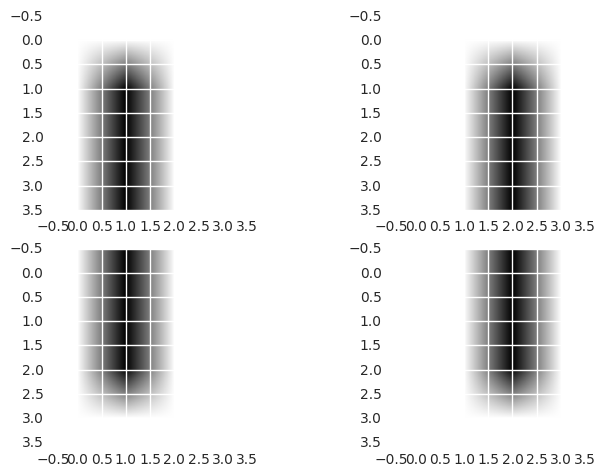

In [61]:
plt.subplot(2,2,1)
plt.imshow(np.reshape(Input[0][0], (4,4)))
plt.subplot(2,2,2)
plt.imshow(np.reshape(Input[0][1], (4,4)))
plt.subplot(2,2,3)
plt.imshow(np.reshape(Input[0][2], (4,4)))
plt.subplot(2,2,4)
plt.imshow(np.reshape(Input[0][3], (4,4)))

In [ ]:
# ncomputer.save(sess, "ckpts", "recurrent_controller_get_lrb_images_task.ckpt")

In [20]:
# # batch_x, batch_y = mnist.train.next_batch(bsize)
# # Input, Target_Output = get_im_sequence(batch_x, batch_y)
# Input, _, Target_Output = make_ims(bsize, size=im_size, splits=im_splits)

# l, o, v, _ = sess.run([
#     loss,
#     output,
#     memory_views, 
#     updt
# ], feed_dict={
#     ncomputer.input_data: Input,
#     ncomputer.target_output_final: Target_Output,
#     ncomputer.sequence_length: sequence_length
# })
# o

array([1])

In [ ]:

#TODO: VISUALIZE GRADIENTS AND MEMORY

















In [34]:
# print Target_Output
# plt.subplot(2,2,1)
# plt.imshow(np.reshape(Input[0][0], (4,4)))
# plt.subplot(2,2,2)
# plt.imshow(np.reshape(Input[0][1], (4,4)))
# plt.subplot(2,2,3)
# plt.imshow(np.reshape(Input[0][2], (4,4)))
# plt.subplot(2,2,4)
# plt.imshow(np.reshape(Input[0][3], (4,4)))